In [1]:
from library.common import Database, Core, clean_column_names
from pathlib import Path
import pandas as pd
import sys

max_p = 20
max_d = 20
max_q = 20
score = False
plot = True
save_models = True
last_year = 2019

if score:
    out_of_sample_size=10
else:
    out_of_sample_size=0

# Set up the filesystem
cwd = Path.cwd()
model_dir = cwd.parent/r'models'
param_dir = cwd.parent/r'data/processed'

# Set up for common features to use
core = Core()

# Set up for database access
db = Database()

db_table = 'master_dataset'
df = pd.read_sql(db_table, db.engine)
df = df.dropna(subset = ['iso_code']).copy()
df = df[~df['iso_code'].isin(core.excluded_features)].copy()
df = df.fillna(0)

In [2]:
def plot_ts(df, order, feature):
    print(__doc__)

    # Author: Taylor Smith <taylor.smith@alkaline-ml.com>

    import numpy as np
    import pmdarima as pm
    from pmdarima import model_selection
    from matplotlib import pyplot as plt

    print("pmdarima version: %s" % pm.__version__)

    # Load the data and split it into separate pieces
    y = df[feature]
    est = pm.ARIMA(order=order,
                   # seasonal_order=(0, 1, 1, 12),
                   suppress_warnings=True)
    cv = model_selection.SlidingWindowForecastCV(
        # window_size=10,
        # step=8,
        # h=4
    )
    predictions = model_selection.cross_val_predict(
        est, y, cv=cv, verbose=0, averaging="median")

    # plot the predictions over the original series
    x_axis = np.arange(y.shape[0])
    n_test = predictions.shape[0]
    plt.figure(figsize=(20, 10))
    plt.plot(x_axis, y, alpha=0.75, c='b')
    plt.plot(x_axis[-n_test:], predictions, alpha=0.5, c='r')  # Forecasts
    plt.title(f"Cross-validated {feature}")

    plt.show()

In [3]:
import pmdarima as pm
import pickle

# Select the data needed for the time series analysis
selected_features = core.regression_features

# reduce the dataset based on the last year specified
dataset = df[df.year.le(last_year)].copy()
forecast_param = {'last_period': dataset['year'].max()}
dataset = dataset[selected_features].copy()
print(selected_features)

# store the forecast param into the pickle file
# Setup path to store forecast parameters pickle files
full_path = param_dir/'params_forecast_params.pkl'
full_path = full_path.as_posix()
with open(full_path, 'wb') as pkl:
    pickle.dump(forecast_param, pkl)

# Fill NAs wtih zero
dataset = dataset.fillna(0)

['iso_code', 'year', 'co2', 'consumption_co2', 'trade_co2', 'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'total_ghg', 'methane', 'nitrous_oxide', 'population', 'gdp', 'primary_energy_consumption', 'un_population', 'current_gdp', 'constant_gdp', 'manufacturing_gdp', 'medium_to_high_tech_percent', 'export', 'import', 'urban_population_percent', 'merchandise_export', 'merchandise_import', 'manufacturer_export_share', 'manufacturer_export', 'co2_emission_electricity', 'co2_emission_building', 'co2_emission_manufacturing', 'co2_emission_other_fuel', 'co2_emission_fugitive', 'co2_emission_transport', 'co2_emission_energy_subtotal', 'co2_emission_bunkers', 'co2_emission_industrial_process', 'manufacturing_percent', 'medium_to_high_tech_gdp', 'trade_openness', 'share_of_merchandise_export', 'share_of_merchandise_import', 'industrial_gdp', 'iea_primary_energy_consumption', 'renewable_energy_consumption', 'coal_consumption', 'oil_con

model-global-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


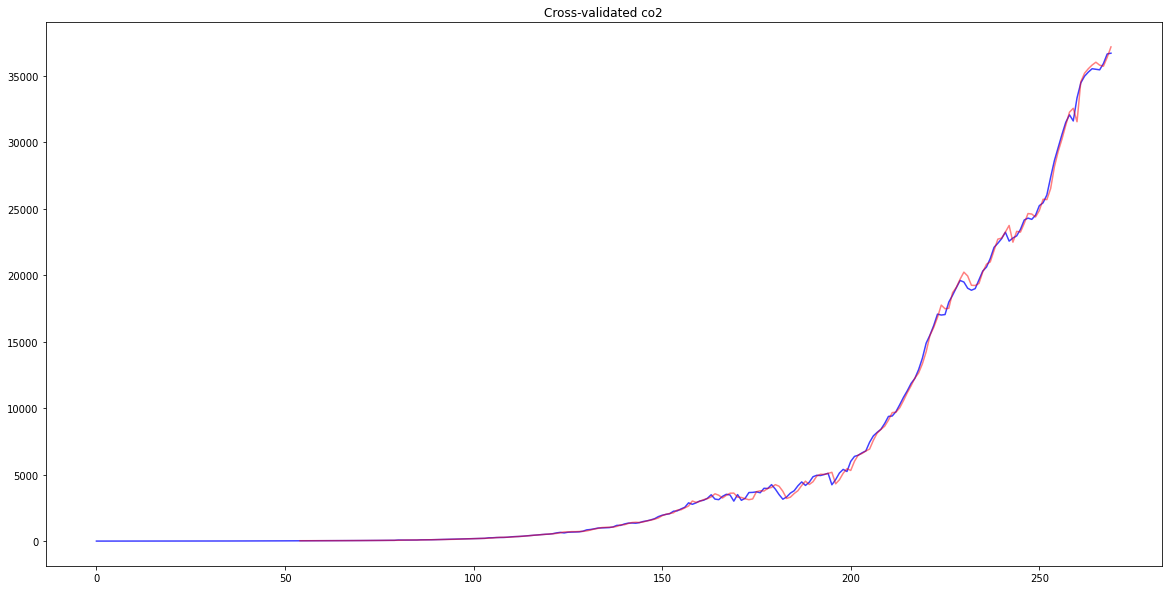

model-global-consumption_co2.pkl COMPLETED
PLOTTING consumption_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


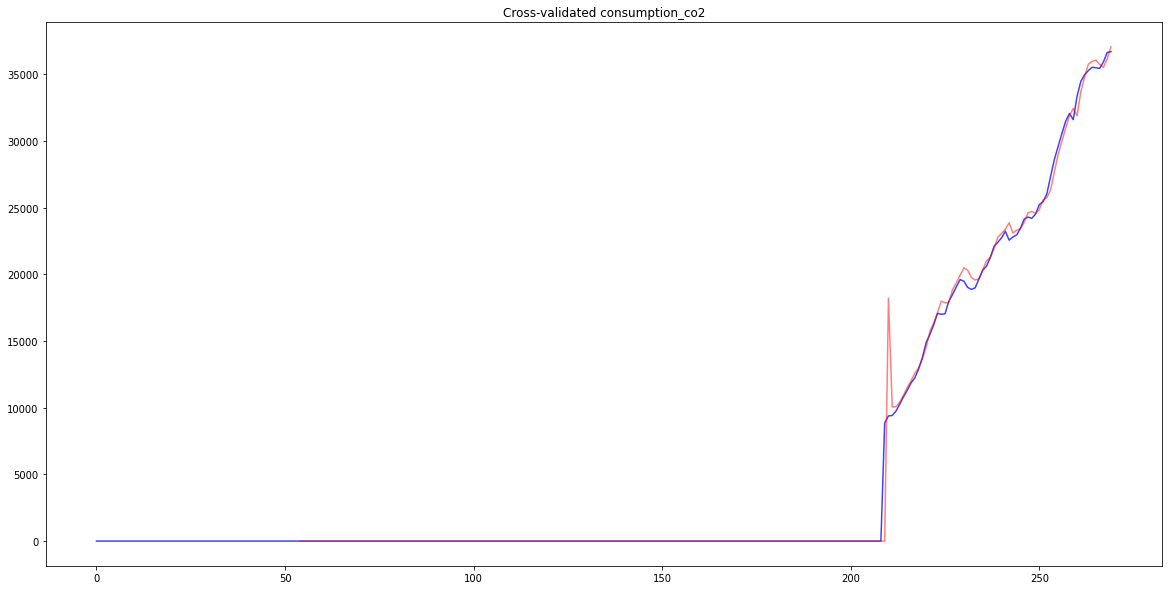

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


model-global-trade_co2.pkl COMPLETED
PLOTTING trade_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


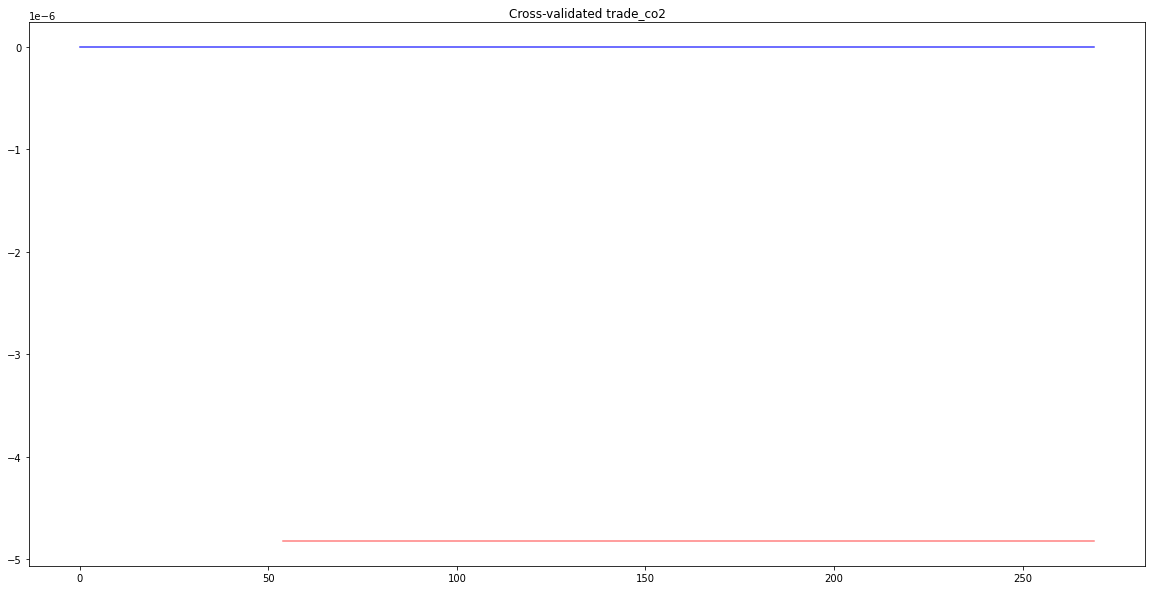

model-global-co2_per_unit_energy.pkl COMPLETED
PLOTTING co2_per_unit_energy
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


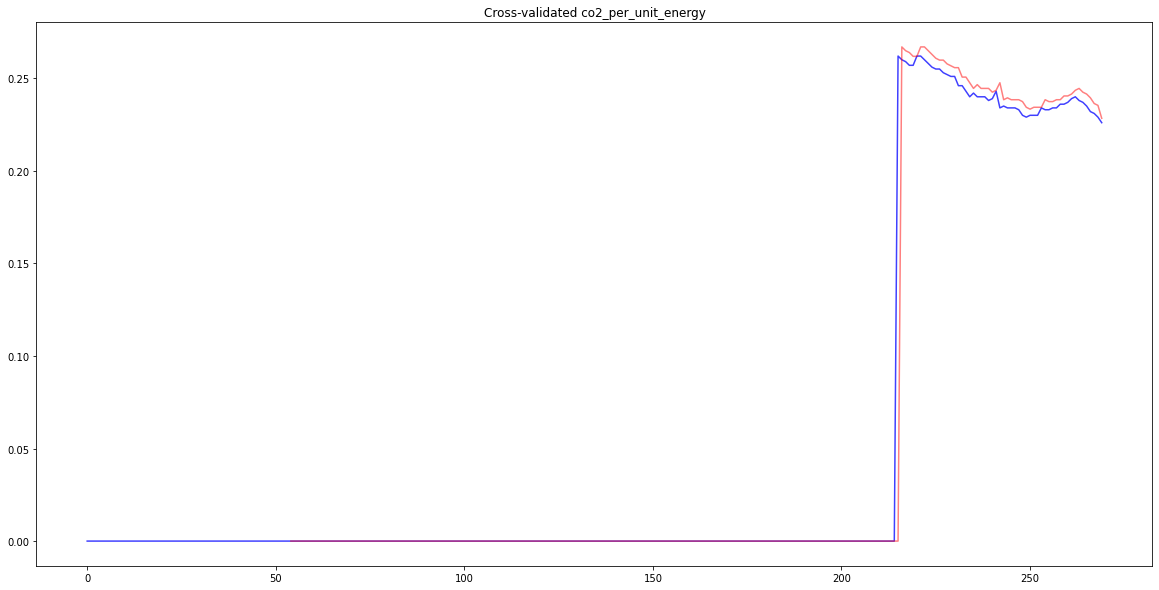

model-global-coal_co2.pkl COMPLETED
PLOTTING coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


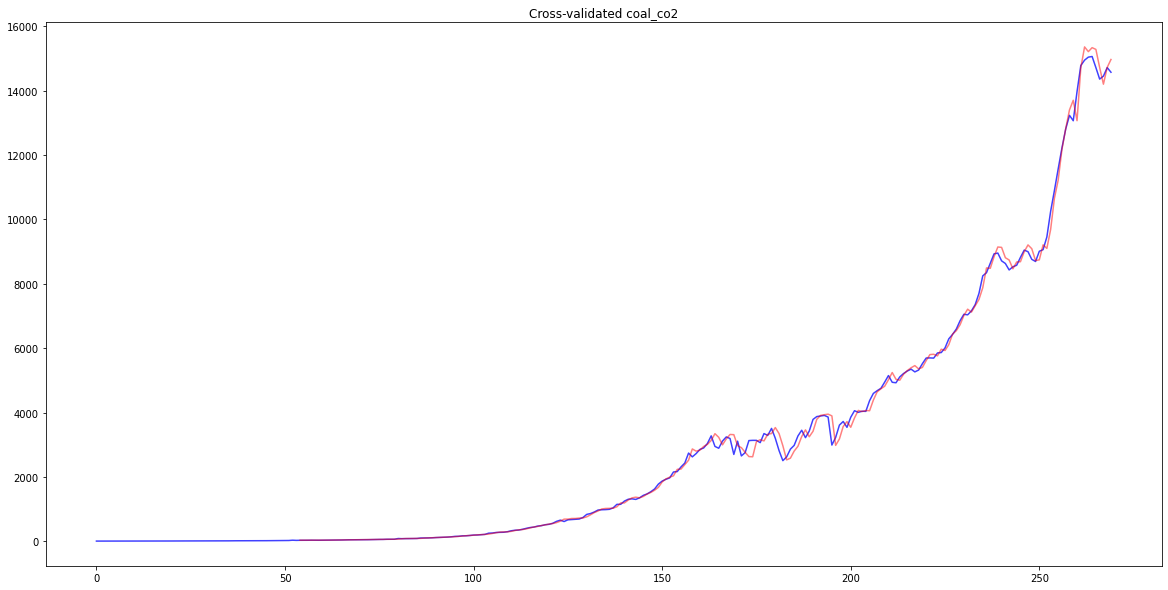

model-global-cement_co2.pkl COMPLETED
PLOTTING cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


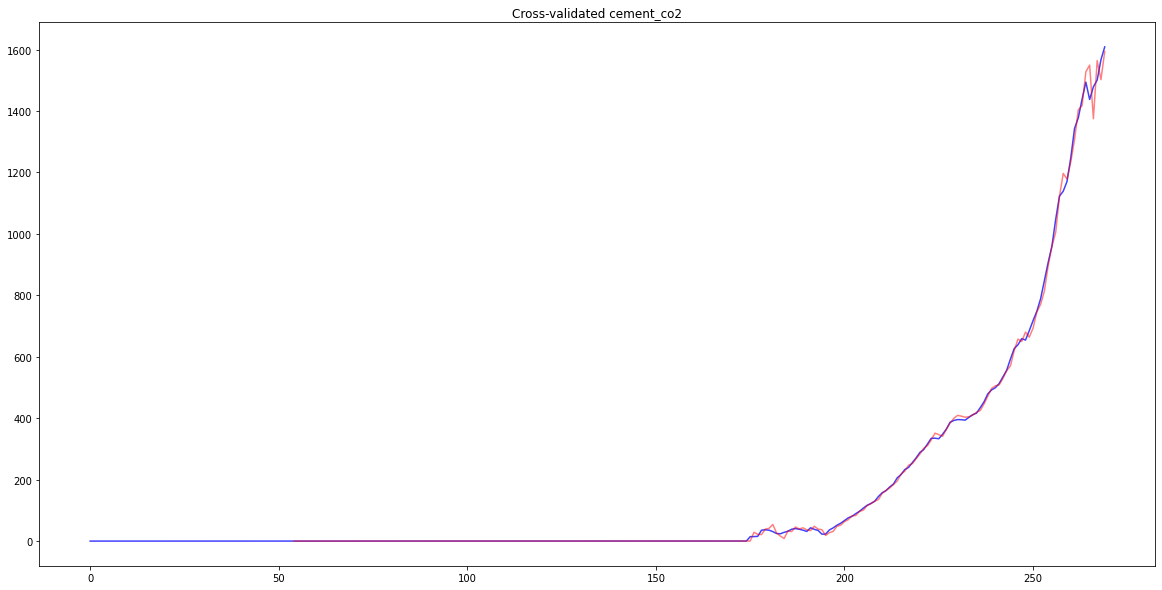

model-global-flaring_co2.pkl COMPLETED
PLOTTING flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


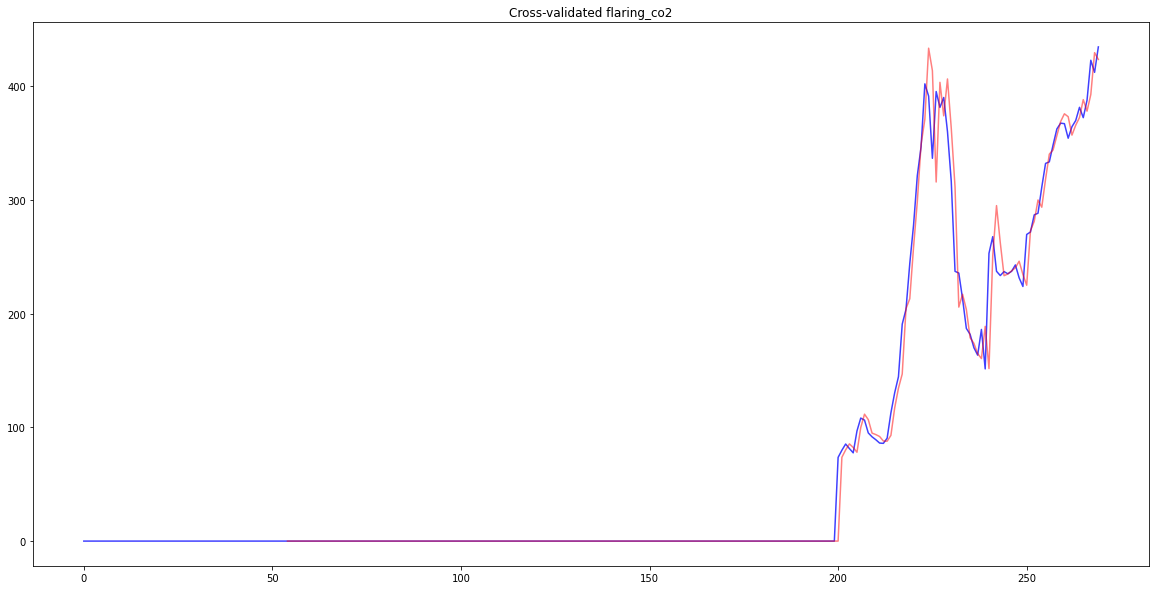

model-global-gas_co2.pkl COMPLETED
PLOTTING gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


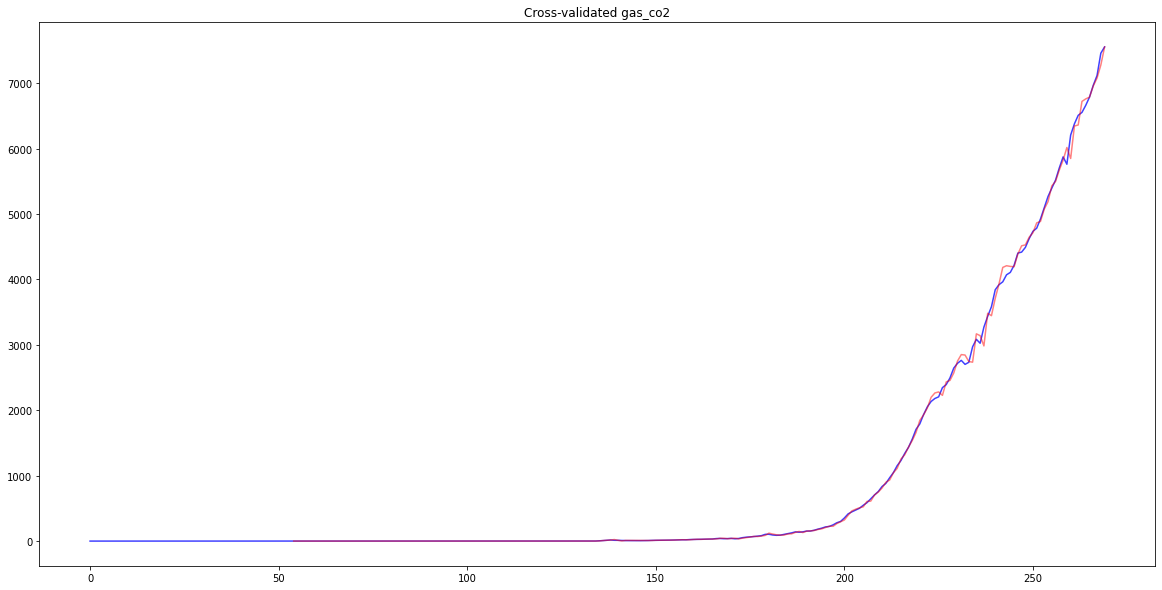

model-global-oil_co2.pkl COMPLETED
PLOTTING oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


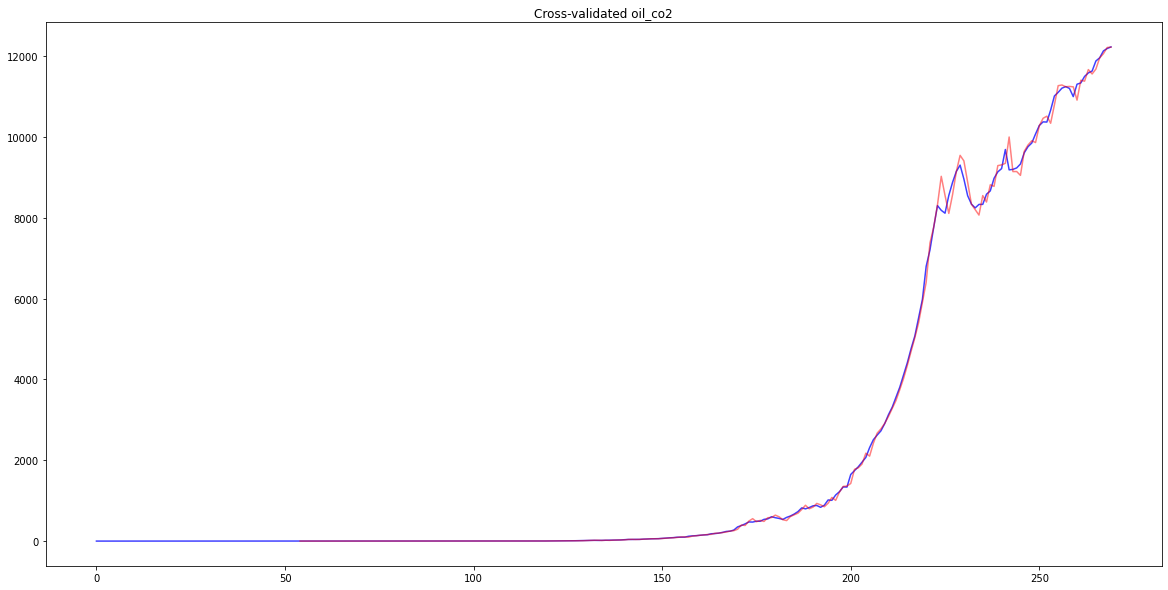

model-global-other_industry_co2.pkl COMPLETED
PLOTTING other_industry_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


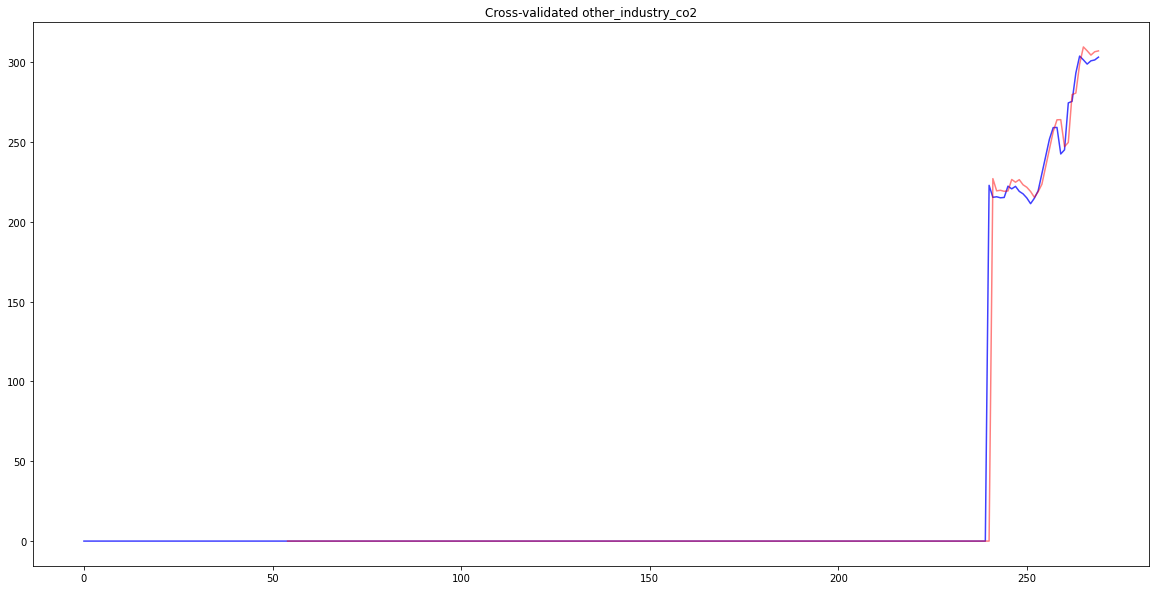

model-global-total_ghg.pkl COMPLETED
PLOTTING total_ghg
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


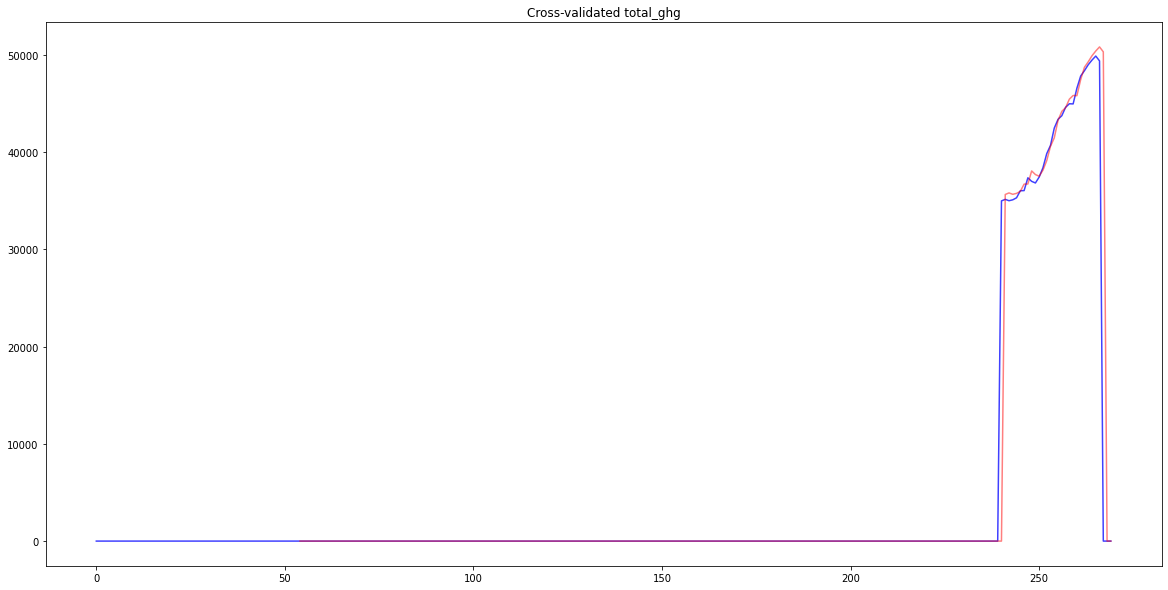

model-global-methane.pkl COMPLETED
PLOTTING methane
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


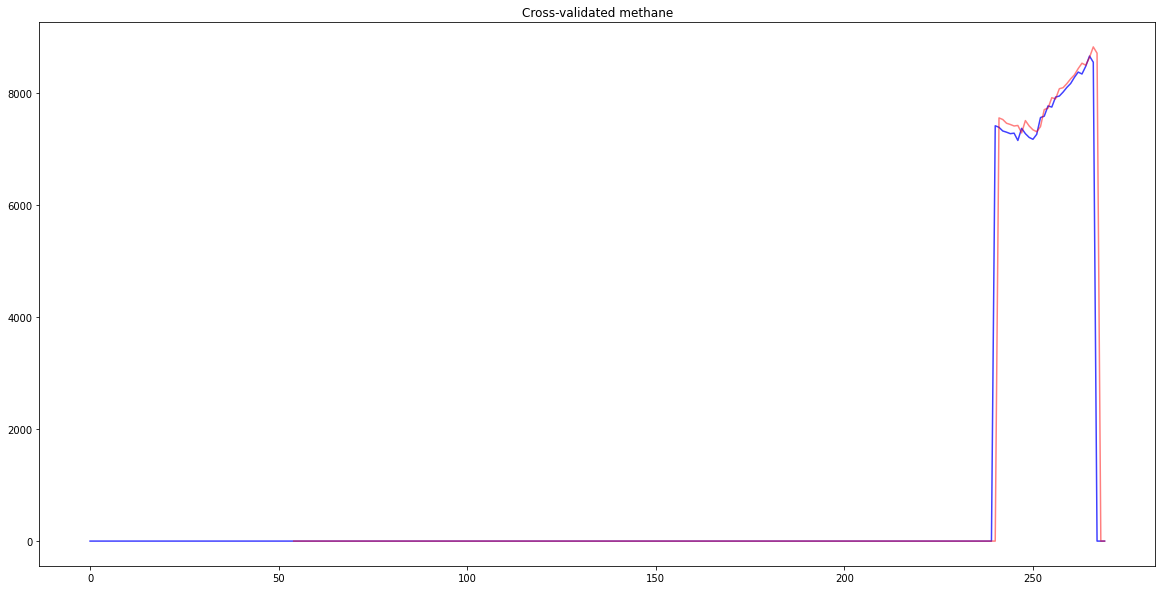

model-global-nitrous_oxide.pkl COMPLETED
PLOTTING nitrous_oxide
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


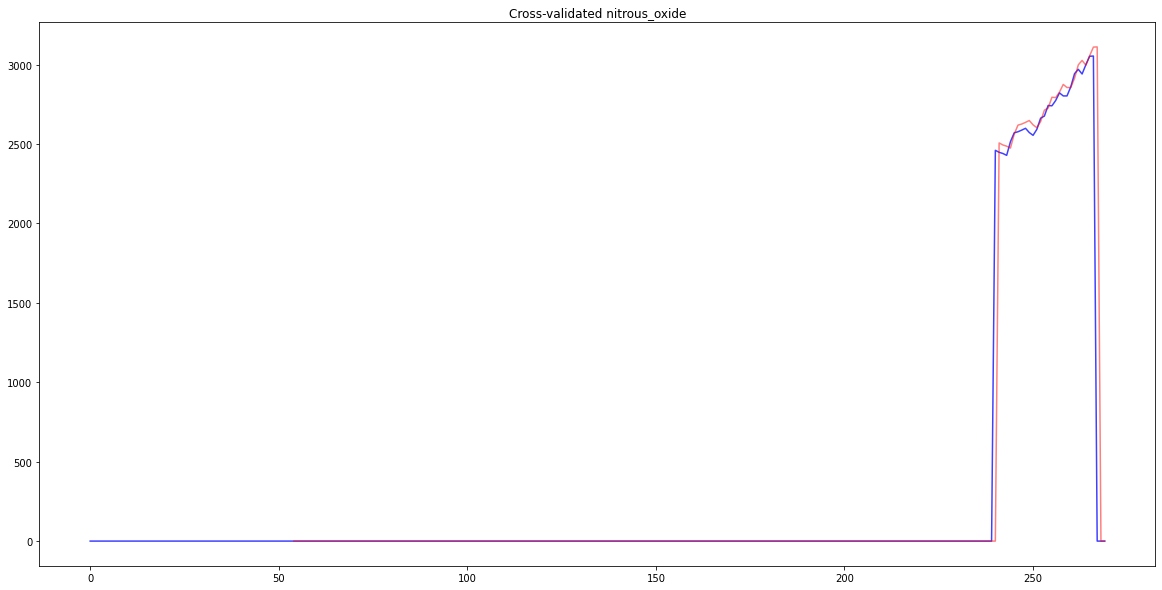

model-global-population.pkl COMPLETED
NOT ploting population
model-global-gdp.pkl COMPLETED
PLOTTING gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


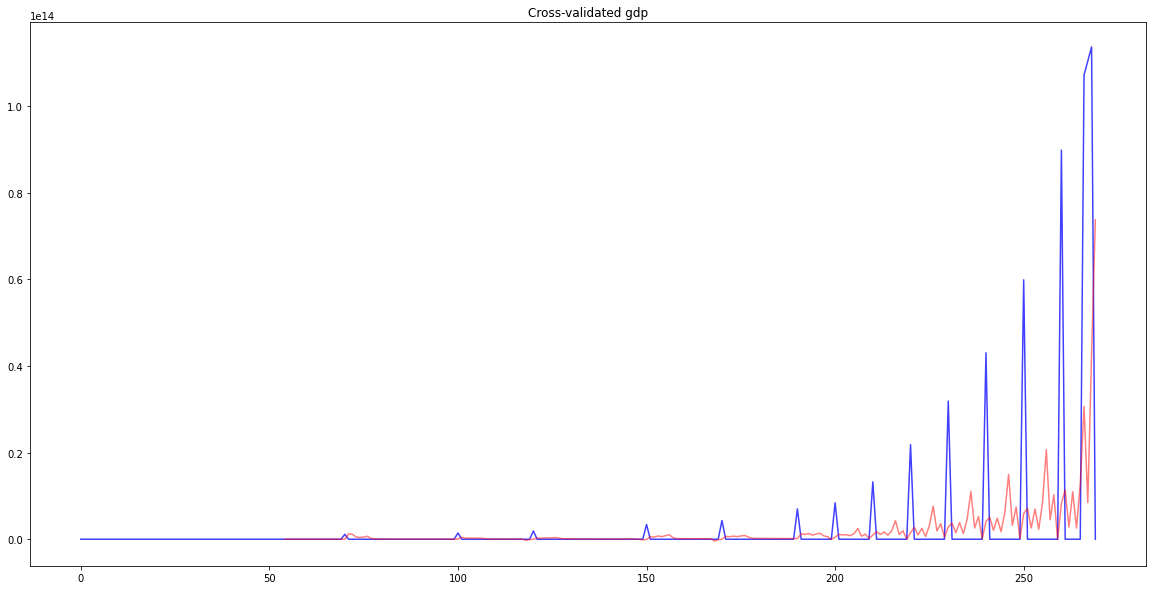

model-global-primary_energy_consumption.pkl COMPLETED
PLOTTING primary_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


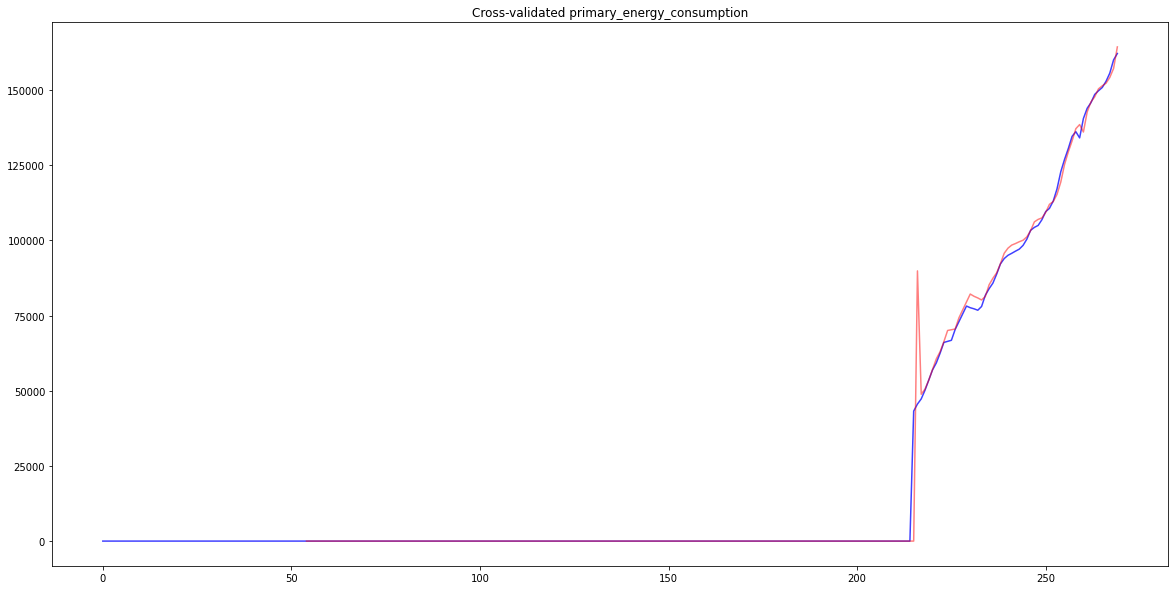

model-global-un_population.pkl COMPLETED
PLOTTING un_population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


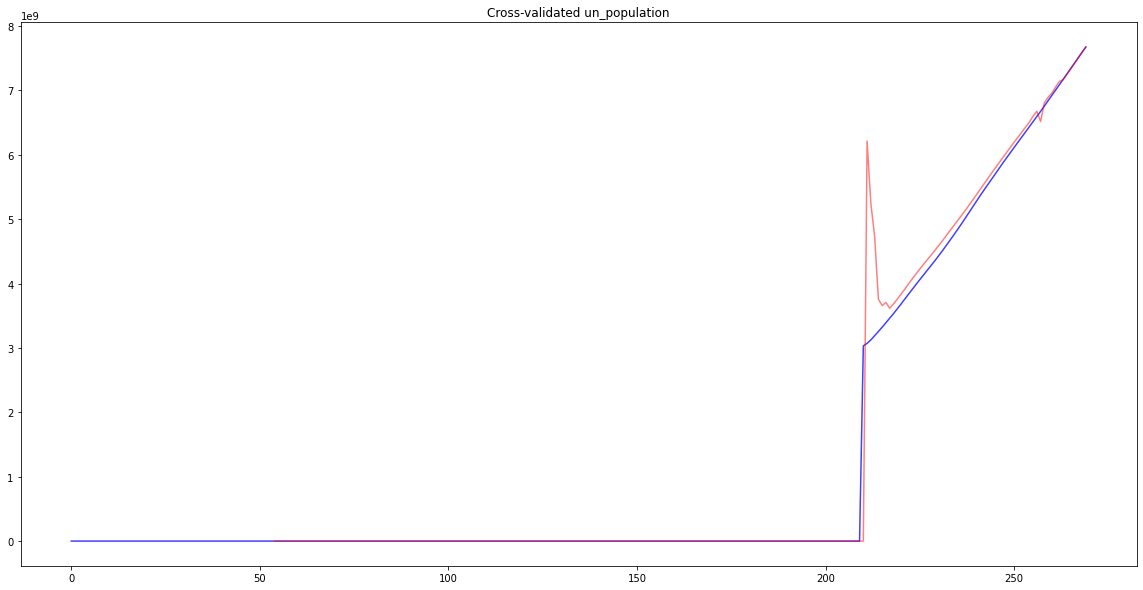

model-global-current_gdp.pkl COMPLETED
PLOTTING current_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


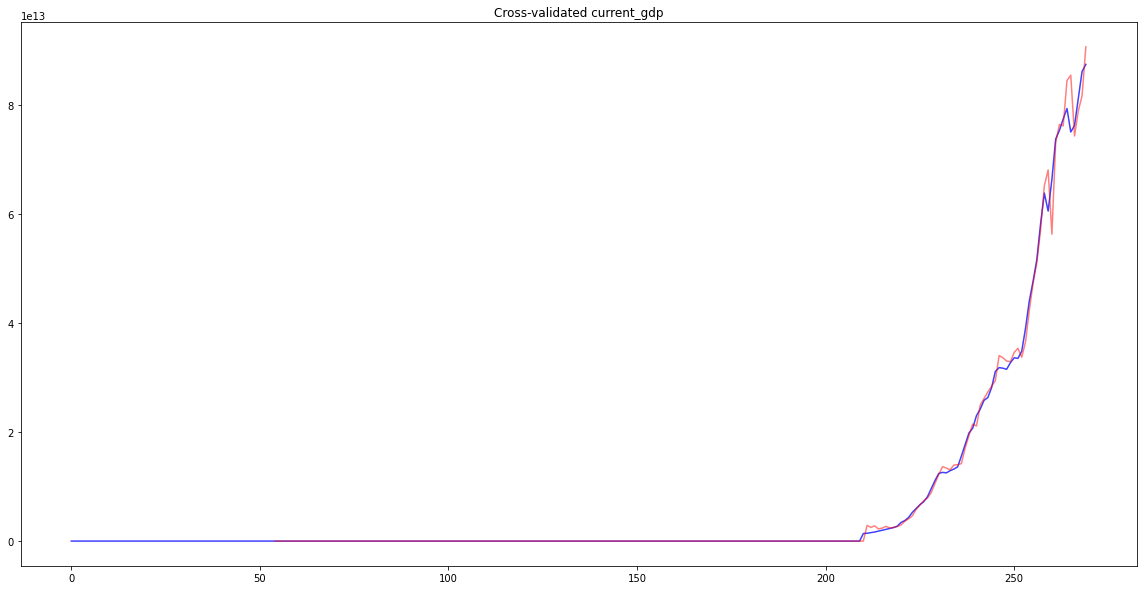

model-global-constant_gdp.pkl COMPLETED
PLOTTING constant_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


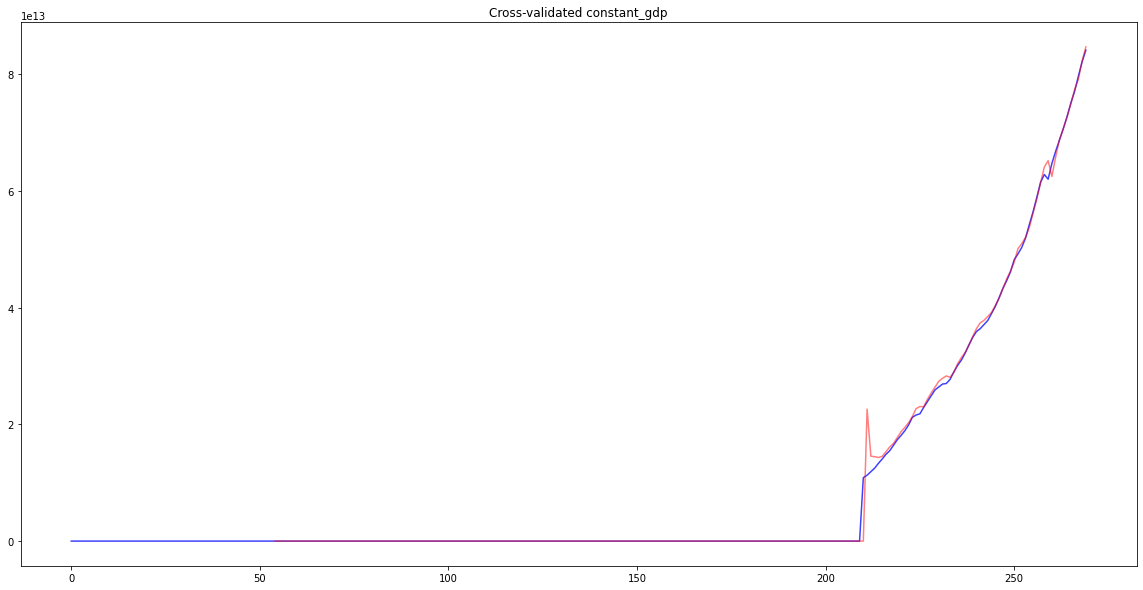

model-global-manufacturing_gdp.pkl COMPLETED
PLOTTING manufacturing_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


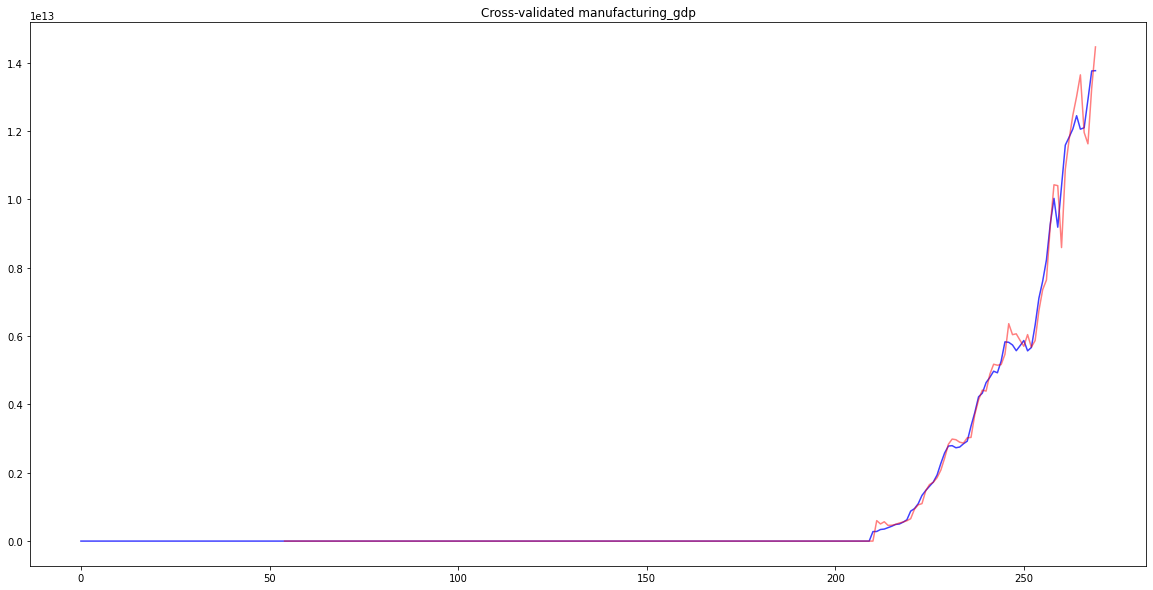

model-global-medium_to_high_tech_percent.pkl COMPLETED
PLOTTING medium_to_high_tech_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


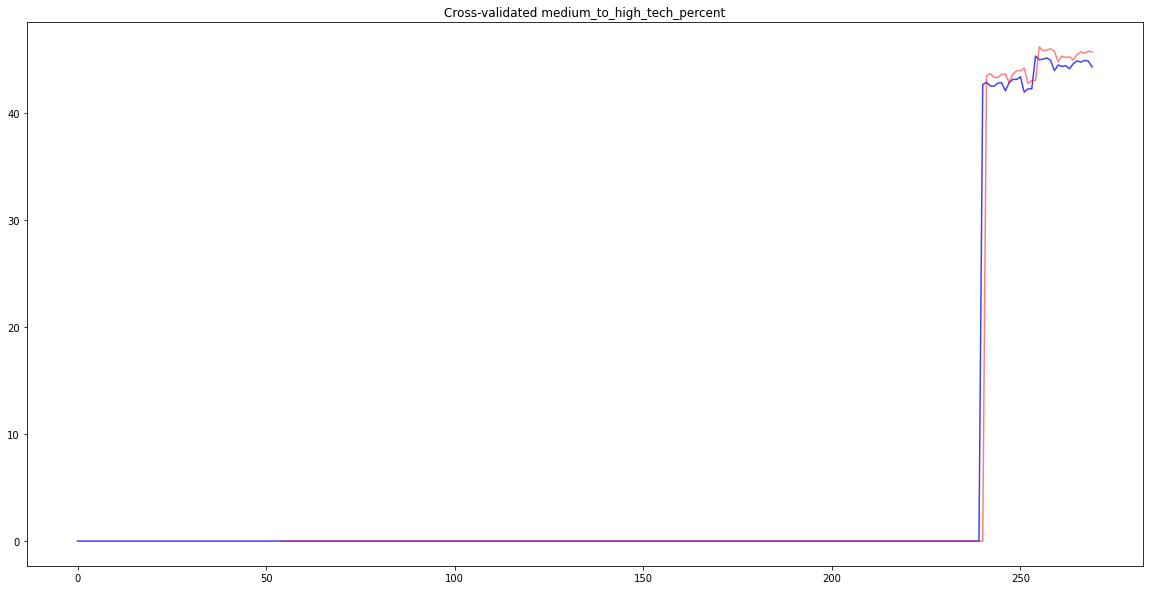

model-global-export.pkl COMPLETED
PLOTTING export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


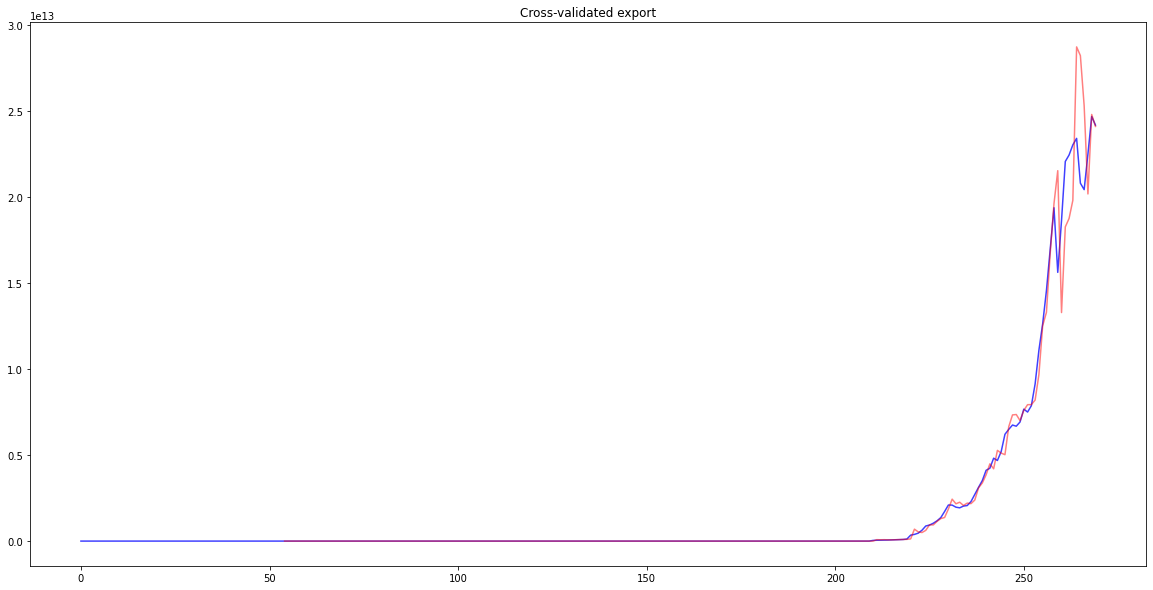

model-global-import.pkl COMPLETED
PLOTTING import
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


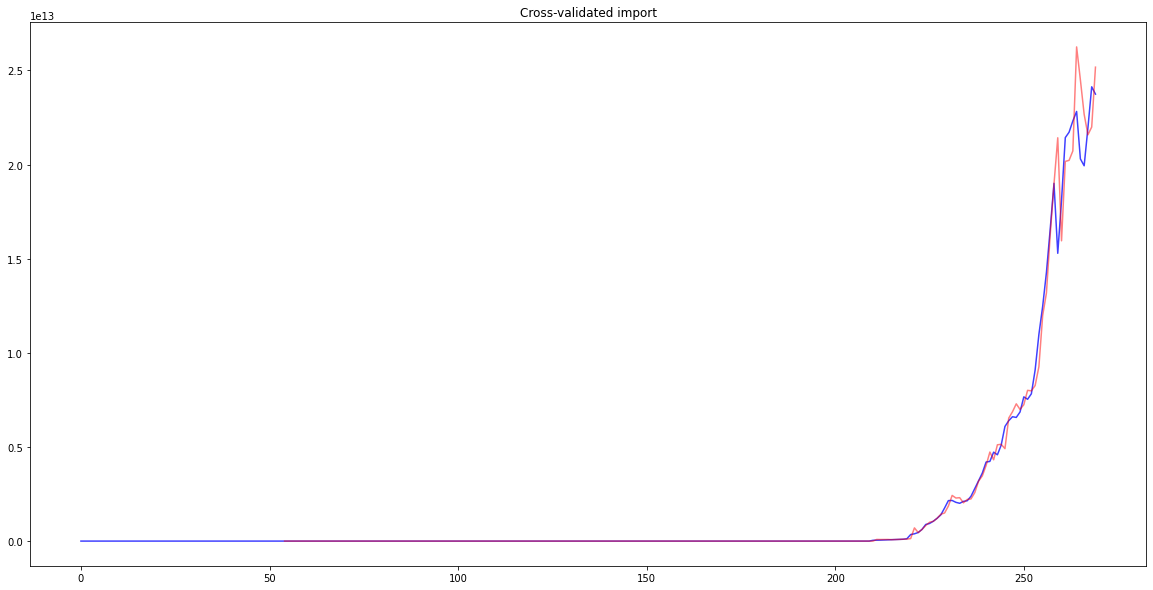

model-global-urban_population_percent.pkl COMPLETED
PLOTTING urban_population_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


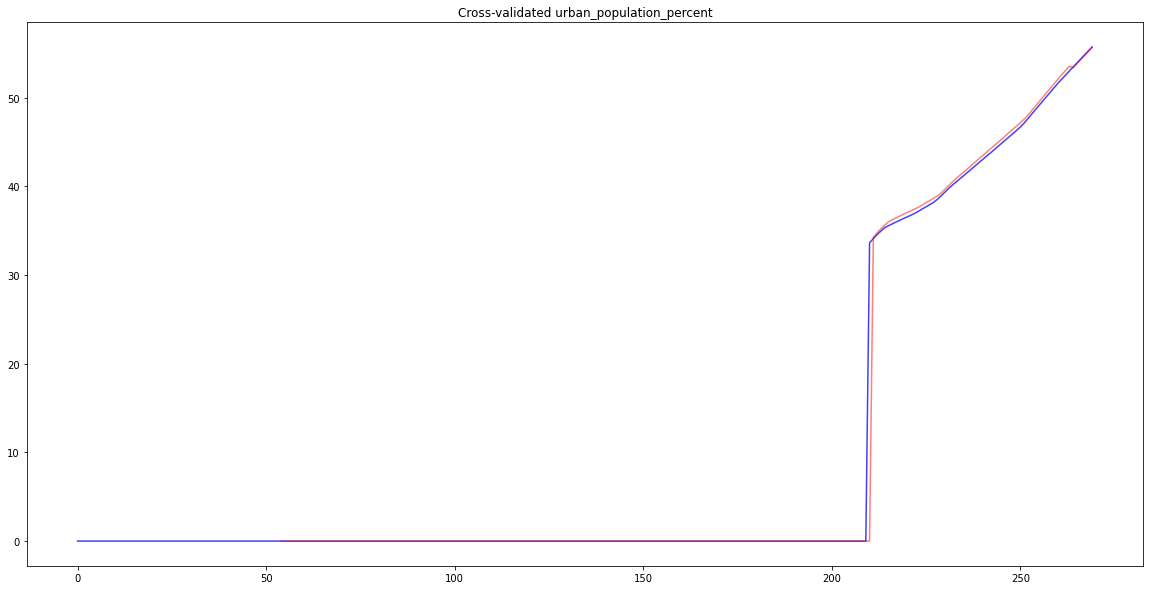

model-global-merchandise_export.pkl COMPLETED
PLOTTING merchandise_export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


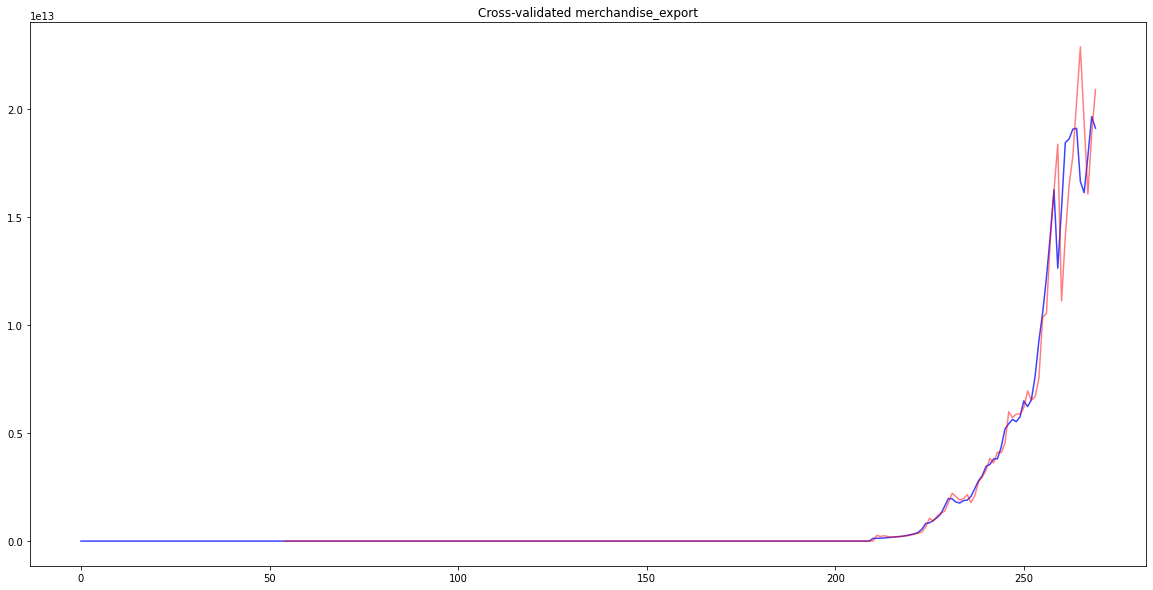

model-global-merchandise_import.pkl COMPLETED
PLOTTING merchandise_import
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


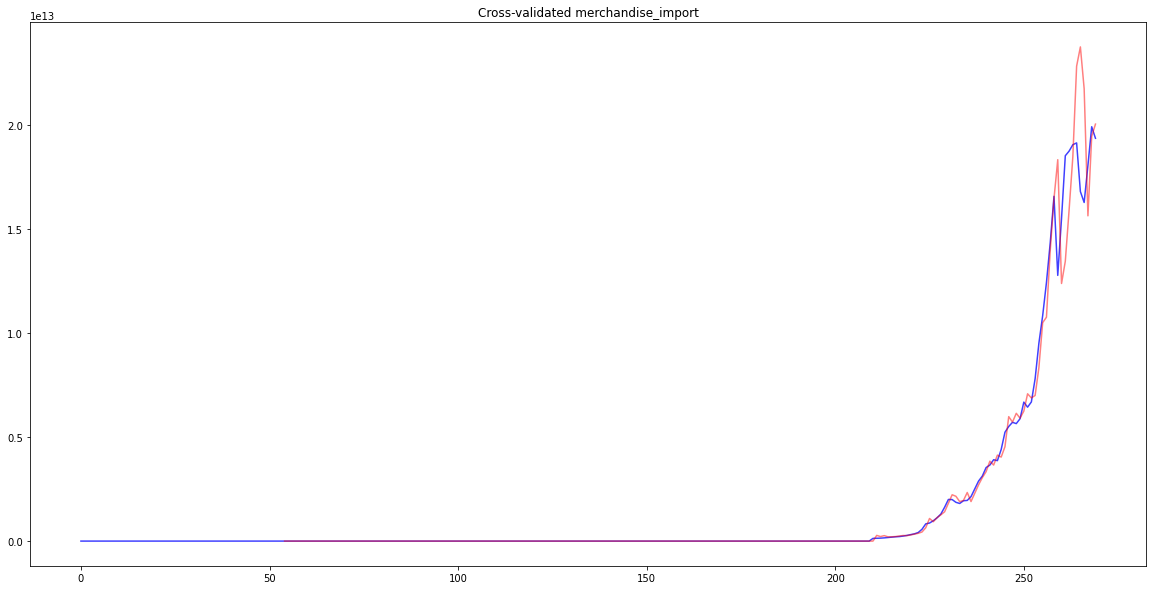

model-global-manufacturer_export_share.pkl COMPLETED
PLOTTING manufacturer_export_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


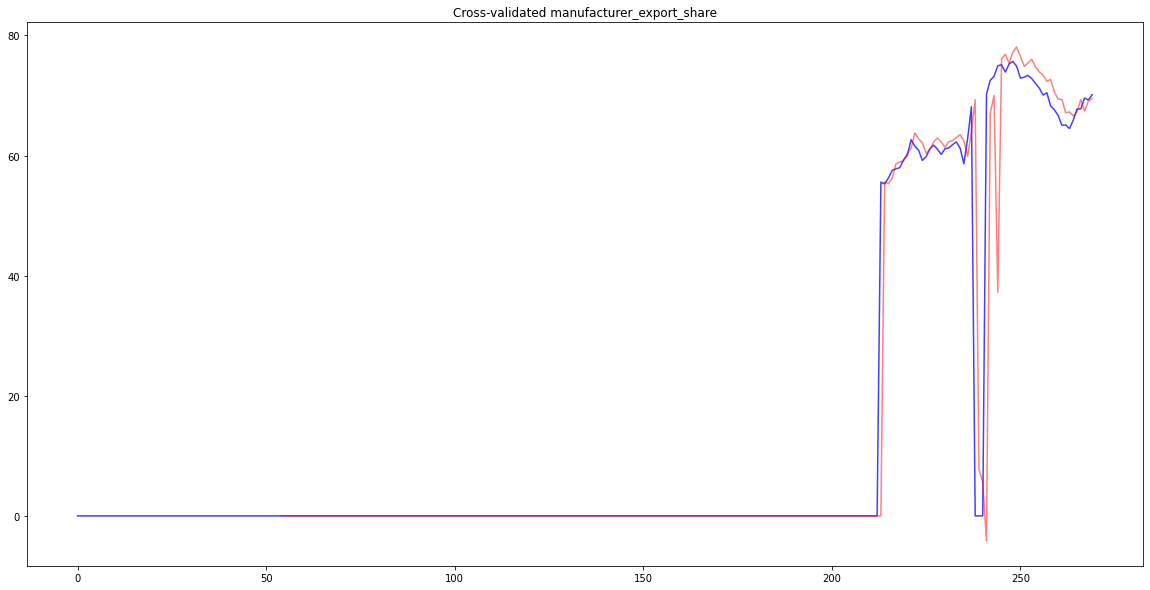

model-global-manufacturer_export.pkl COMPLETED
PLOTTING manufacturer_export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


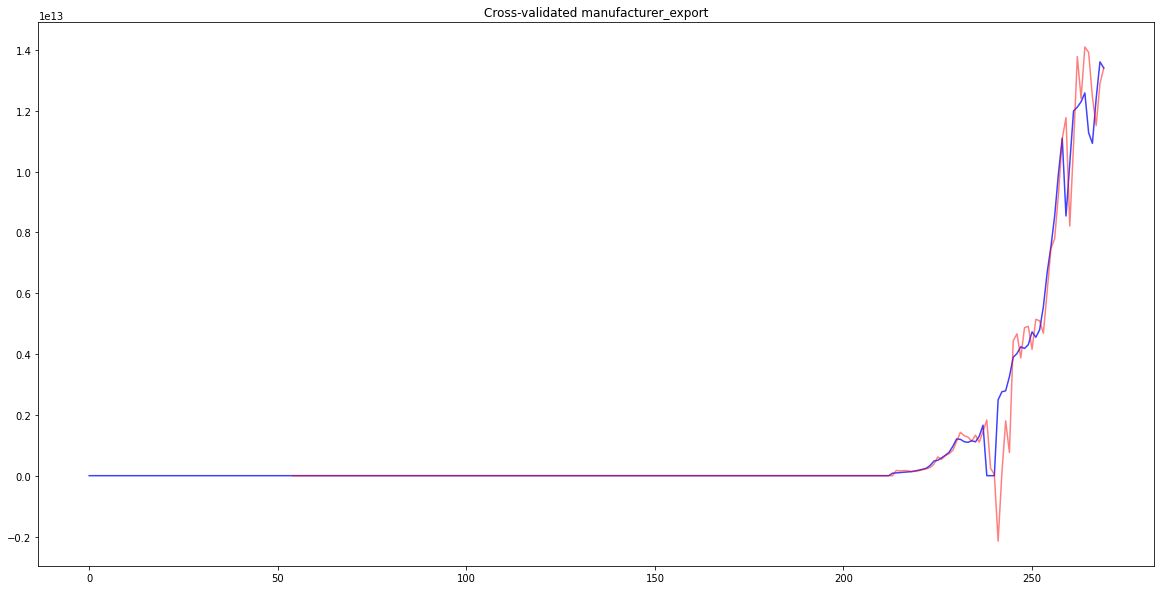

model-global-co2_emission_electricity.pkl COMPLETED
PLOTTING co2_emission_electricity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


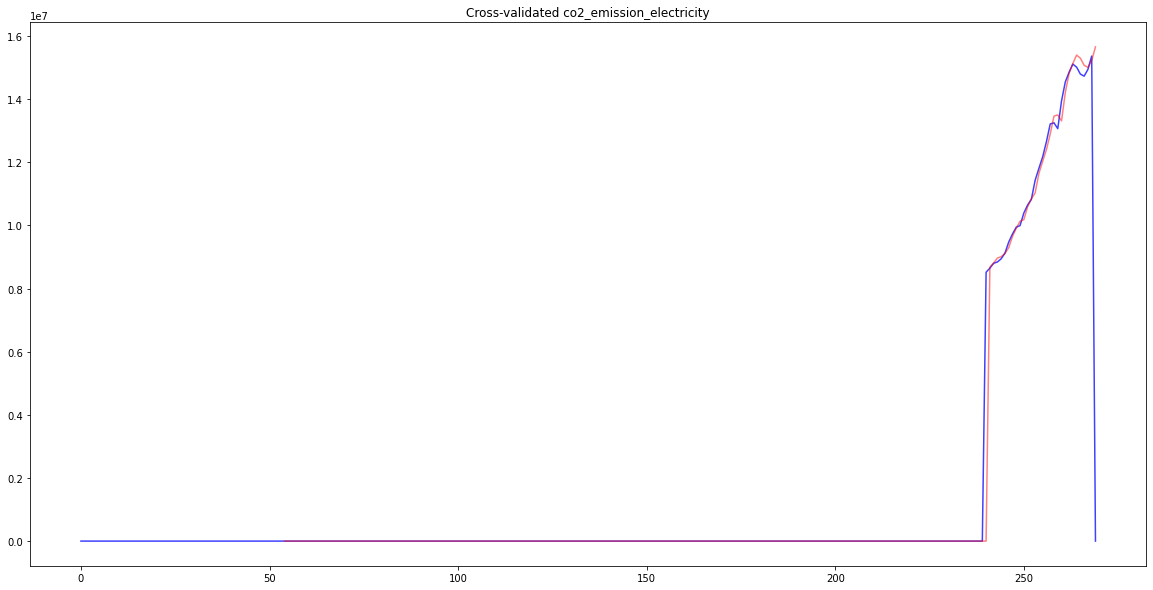

model-global-co2_emission_building.pkl COMPLETED
PLOTTING co2_emission_building
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


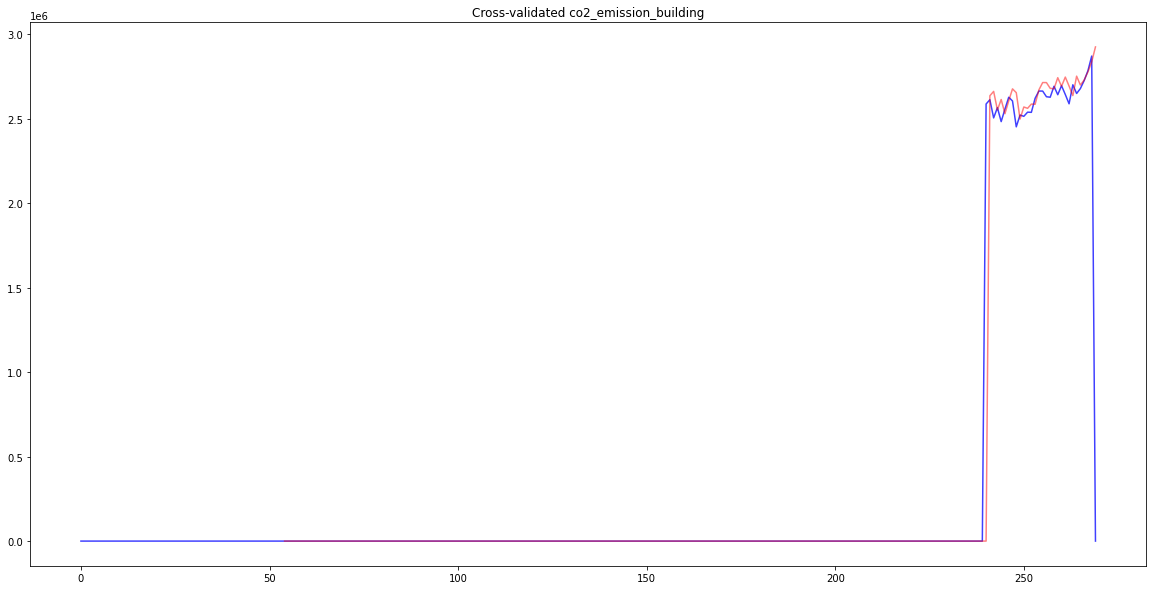

model-global-co2_emission_manufacturing.pkl COMPLETED
PLOTTING co2_emission_manufacturing
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


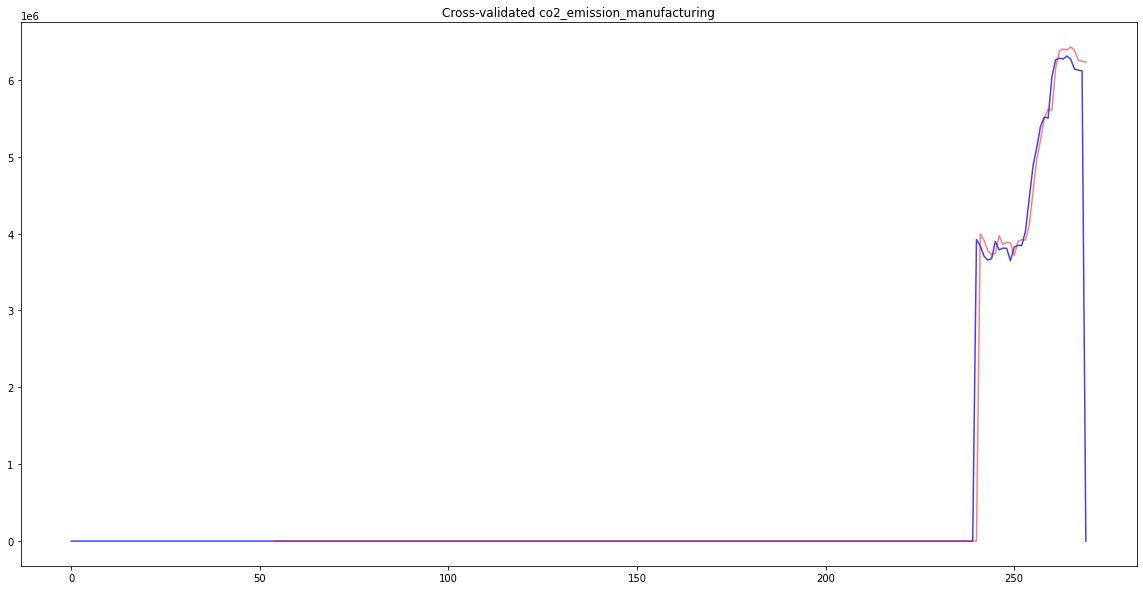

model-global-co2_emission_other_fuel.pkl COMPLETED
PLOTTING co2_emission_other_fuel
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


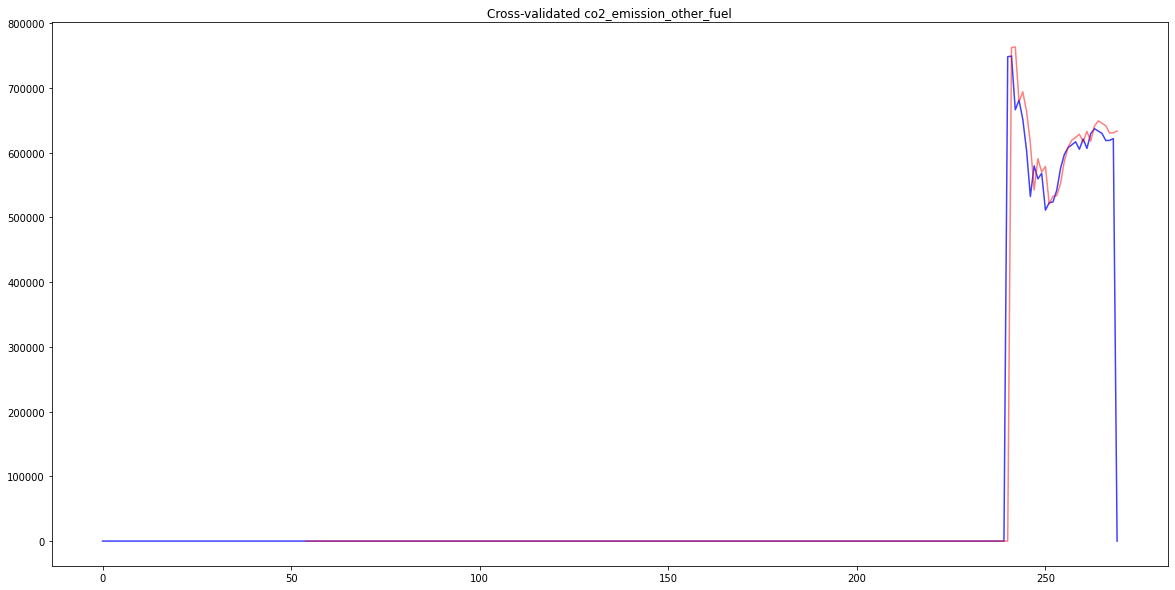

model-global-co2_emission_fugitive.pkl COMPLETED
PLOTTING co2_emission_fugitive
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


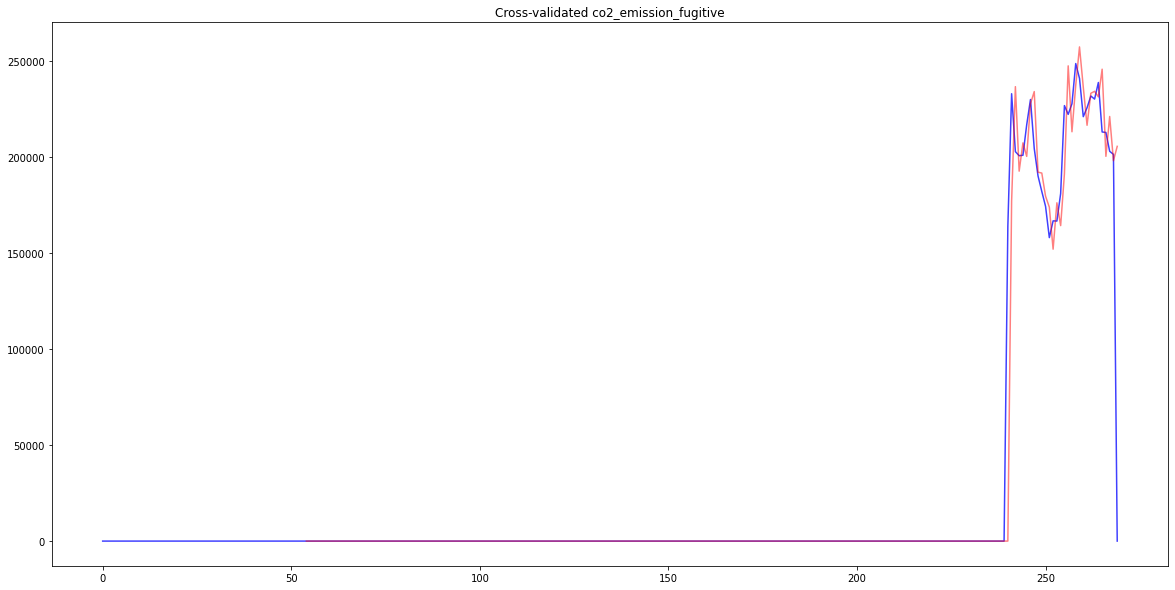

model-global-co2_emission_transport.pkl COMPLETED
PLOTTING co2_emission_transport
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


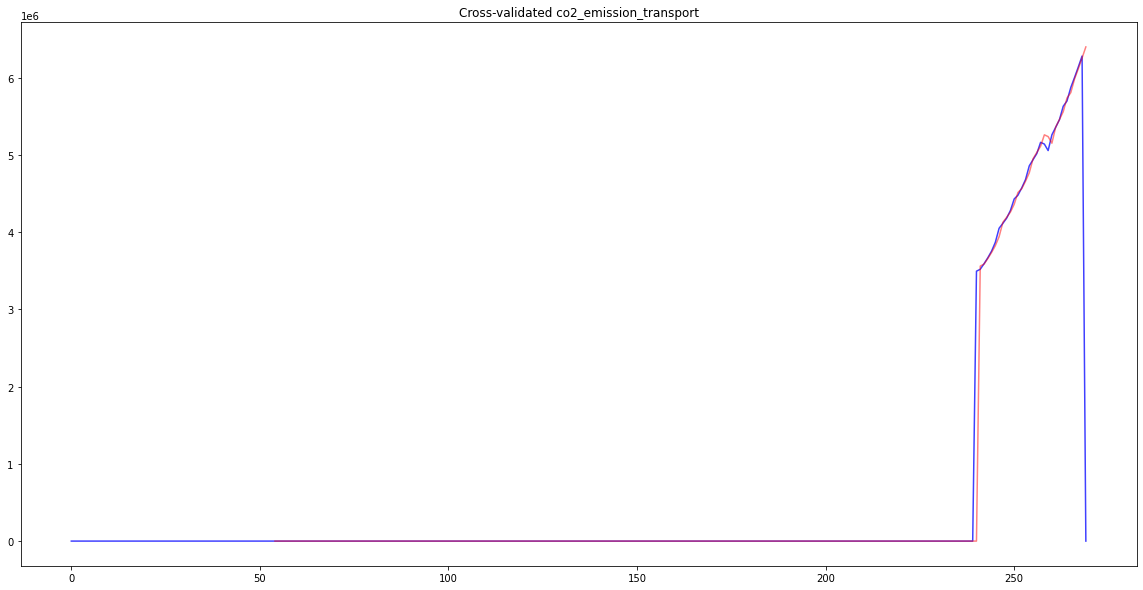

model-global-co2_emission_energy_subtotal.pkl COMPLETED
PLOTTING co2_emission_energy_subtotal
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


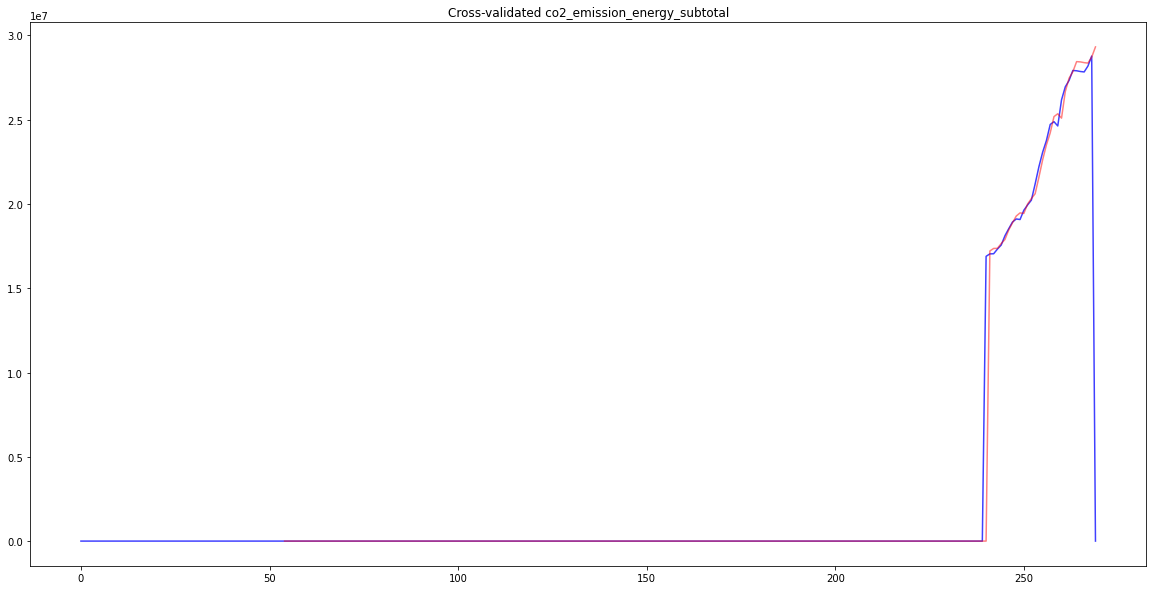

model-global-co2_emission_bunkers.pkl COMPLETED
PLOTTING co2_emission_bunkers
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


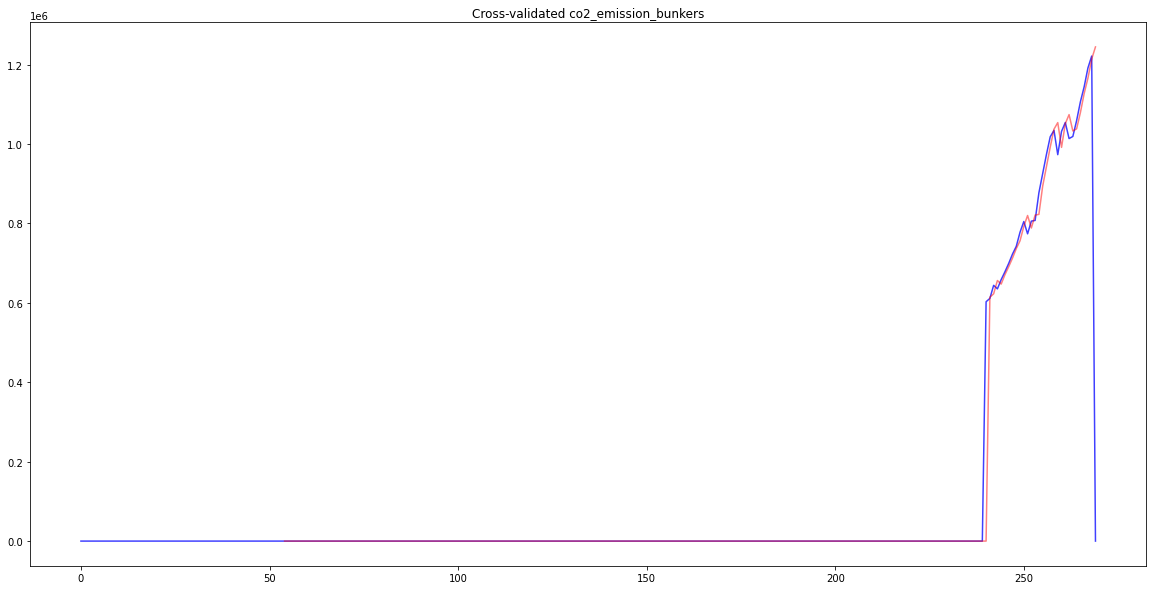

model-global-co2_emission_industrial_process.pkl COMPLETED
PLOTTING co2_emission_industrial_process
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


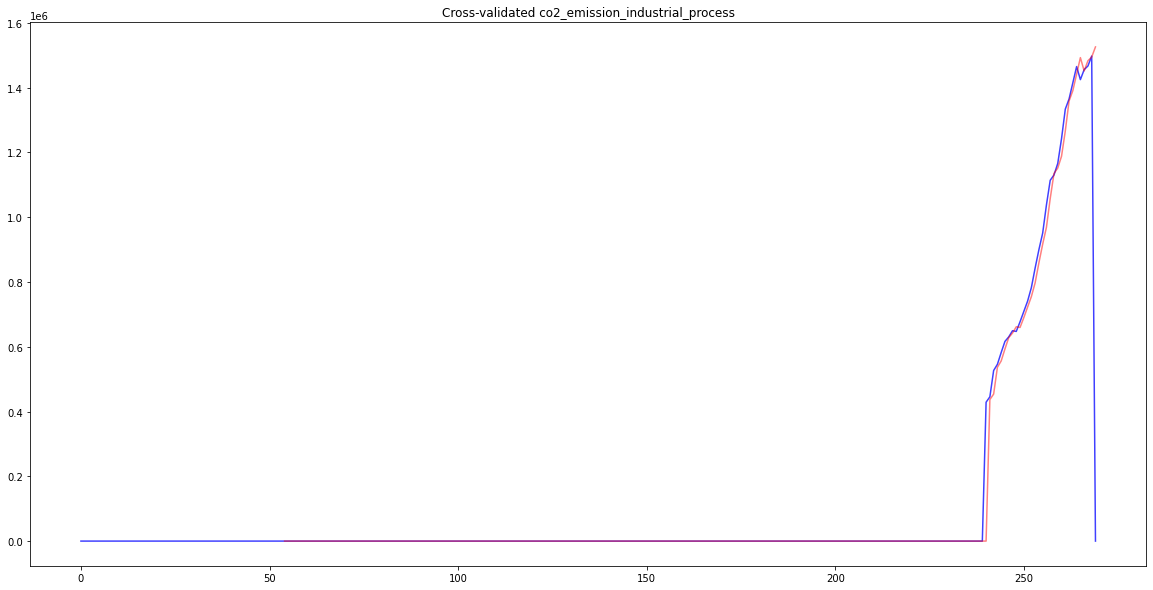

model-global-manufacturing_percent.pkl COMPLETED
PLOTTING manufacturing_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


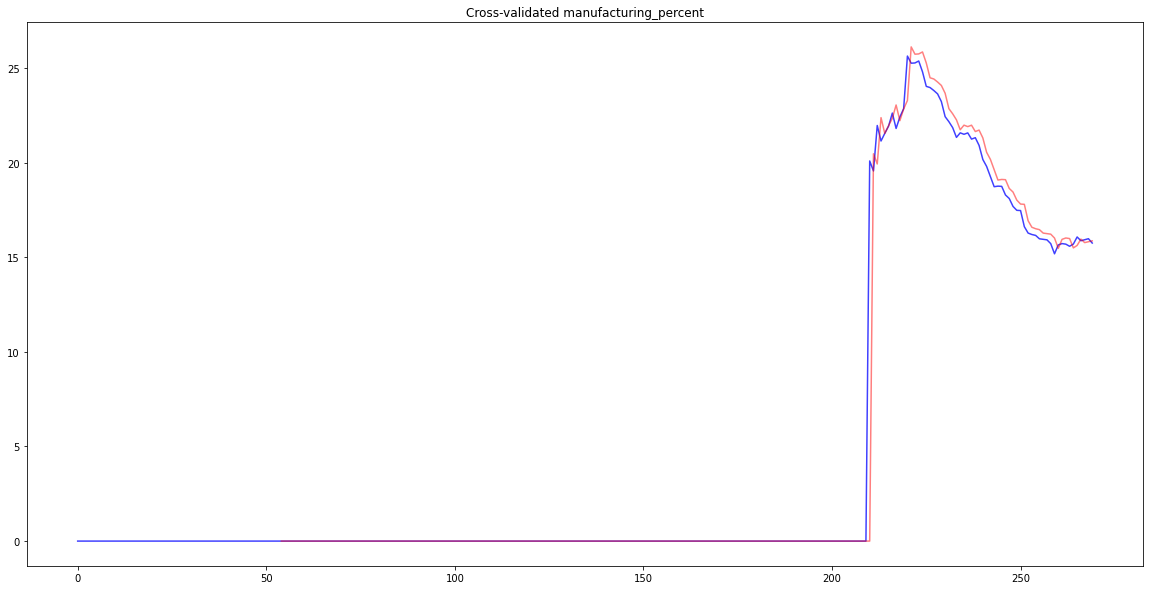

model-global-medium_to_high_tech_gdp.pkl COMPLETED
PLOTTING medium_to_high_tech_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


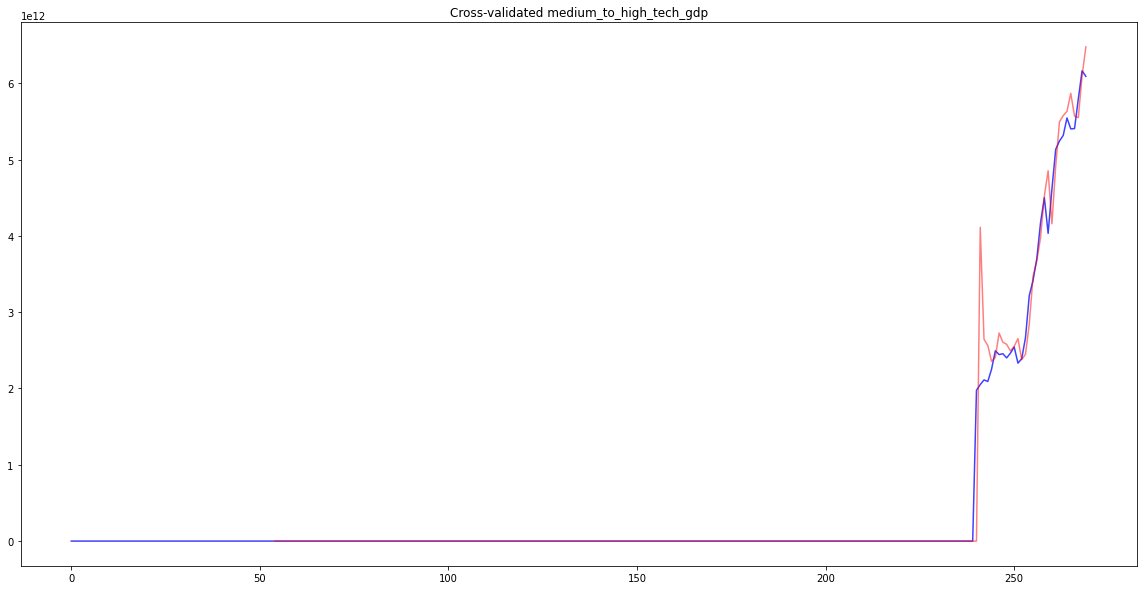

model-global-trade_openness.pkl COMPLETED
PLOTTING trade_openness
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


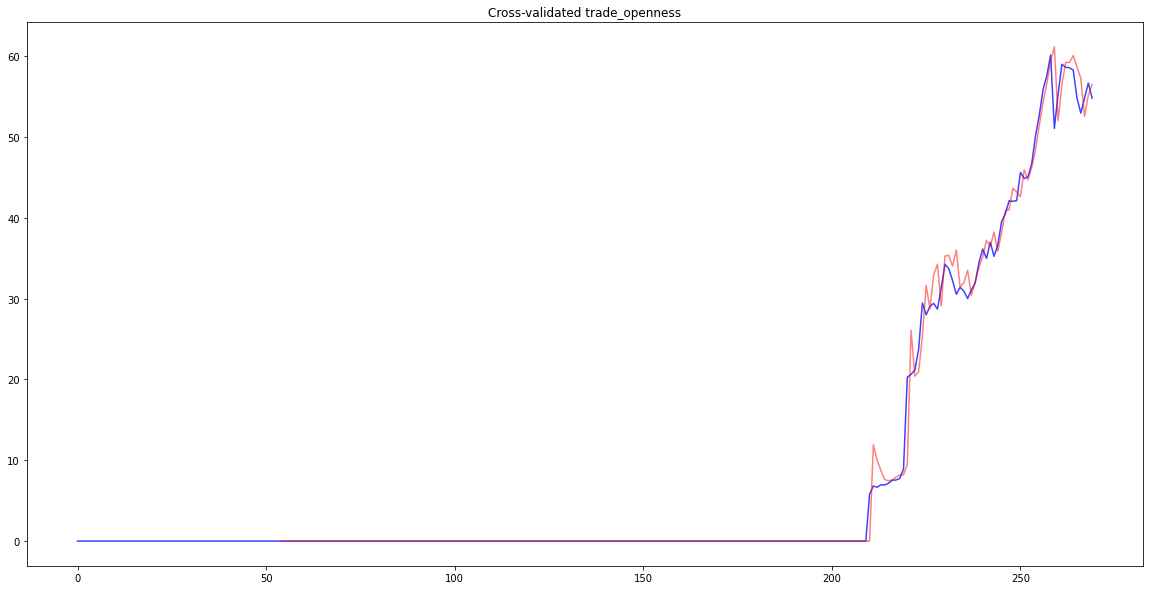

model-global-share_of_merchandise_export.pkl COMPLETED
PLOTTING share_of_merchandise_export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


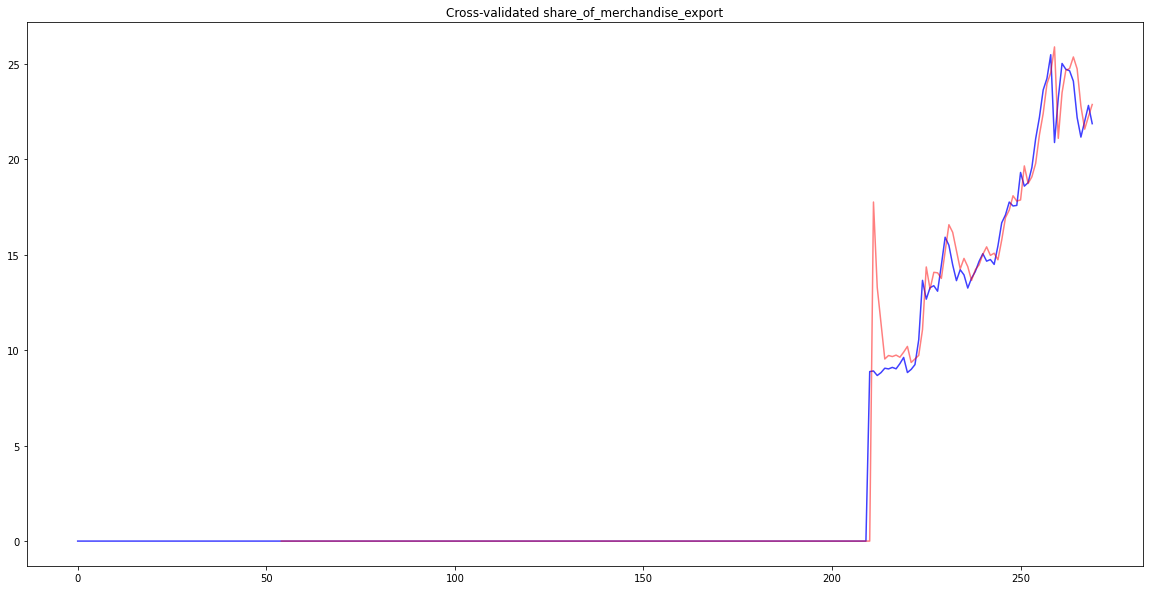

model-global-share_of_merchandise_import.pkl COMPLETED
PLOTTING share_of_merchandise_import
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


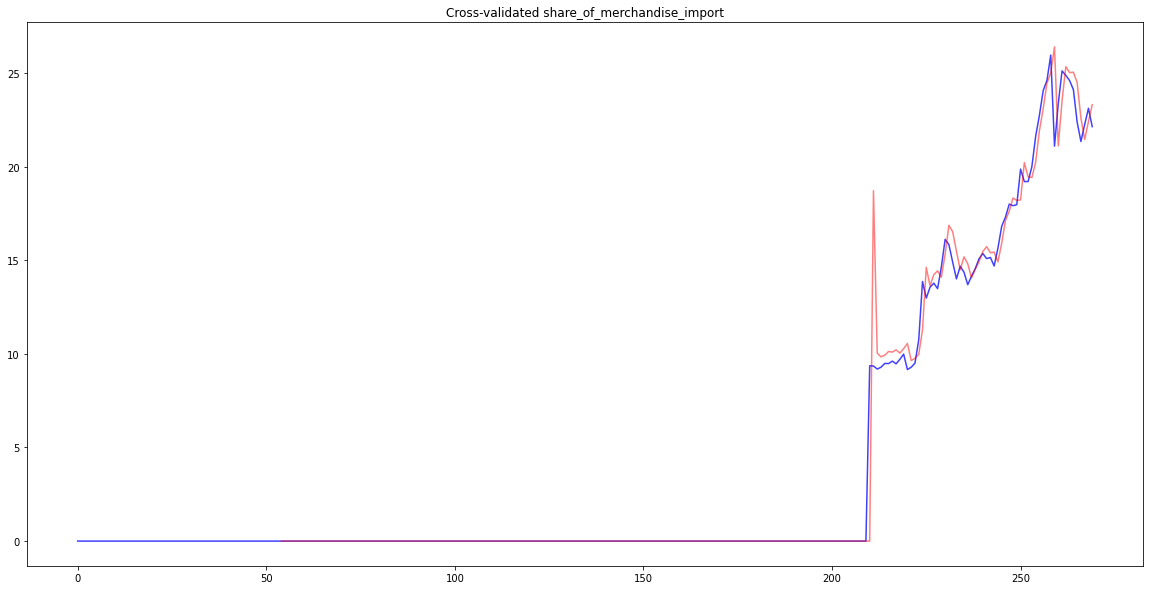

model-global-industrial_gdp.pkl COMPLETED
PLOTTING industrial_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


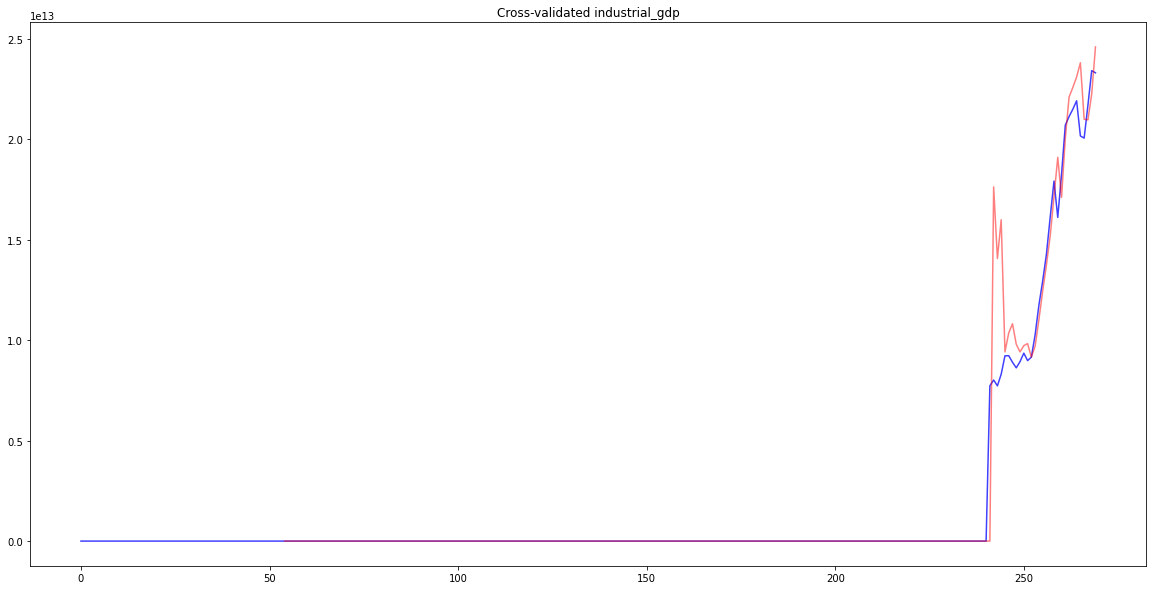

model-global-iea_primary_energy_consumption.pkl COMPLETED
PLOTTING iea_primary_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


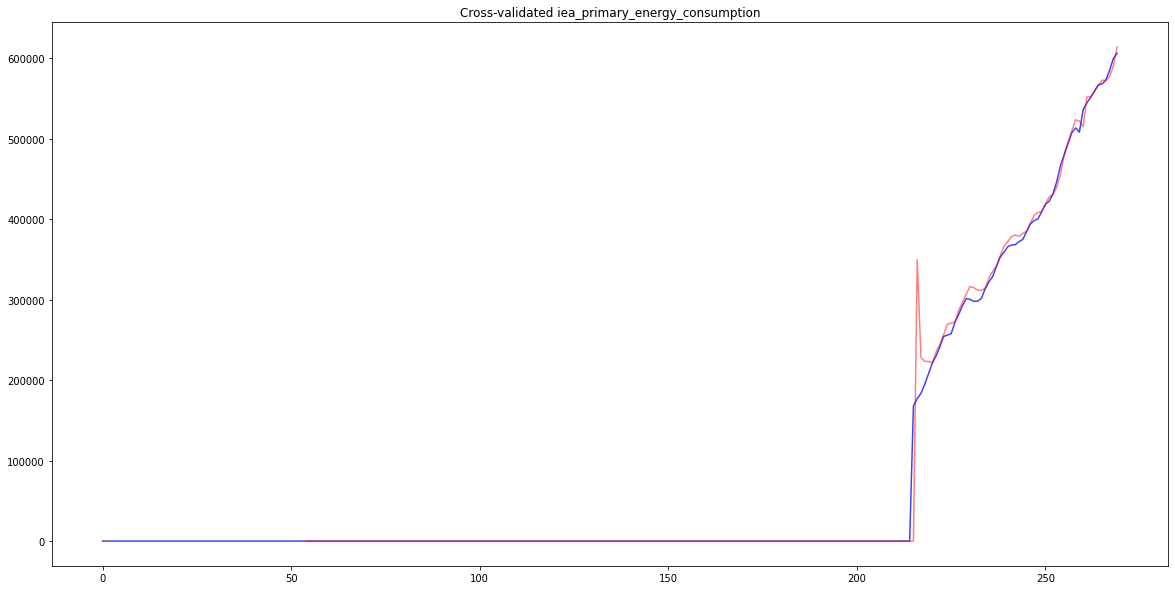

model-global-renewable_energy_consumption.pkl COMPLETED
PLOTTING renewable_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


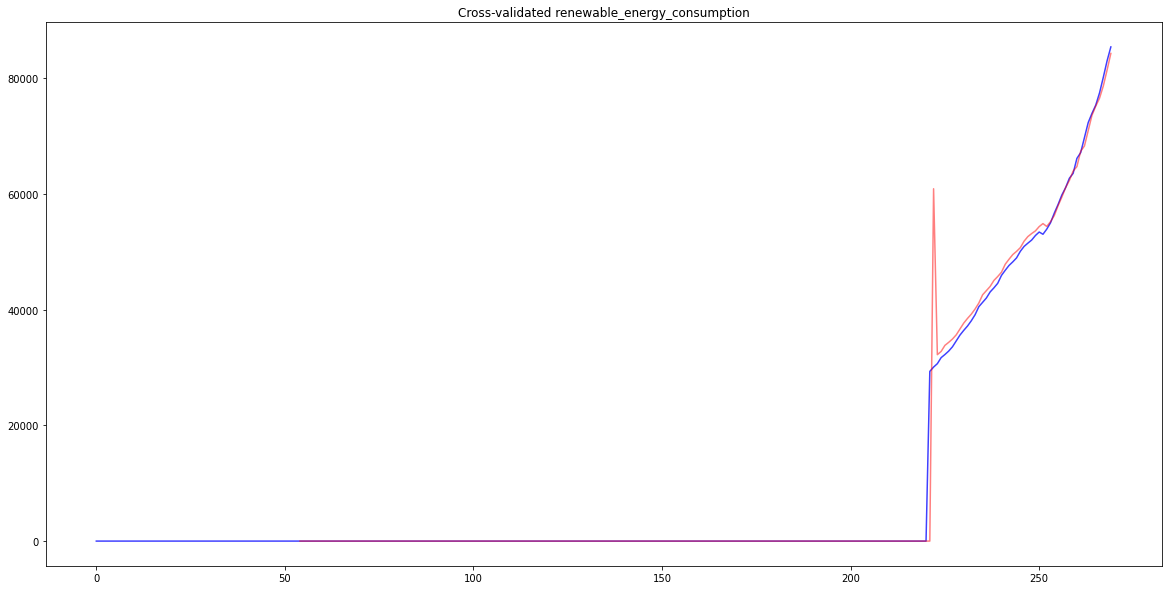

model-global-coal_consumption.pkl COMPLETED
PLOTTING coal_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


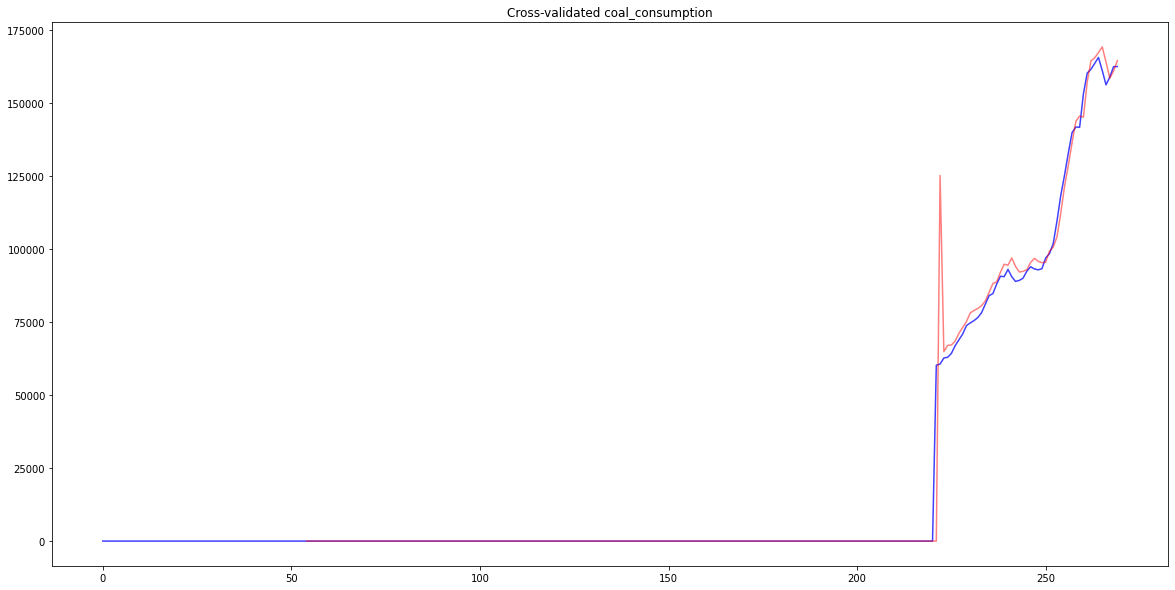

model-global-oil_consumption.pkl COMPLETED
PLOTTING oil_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


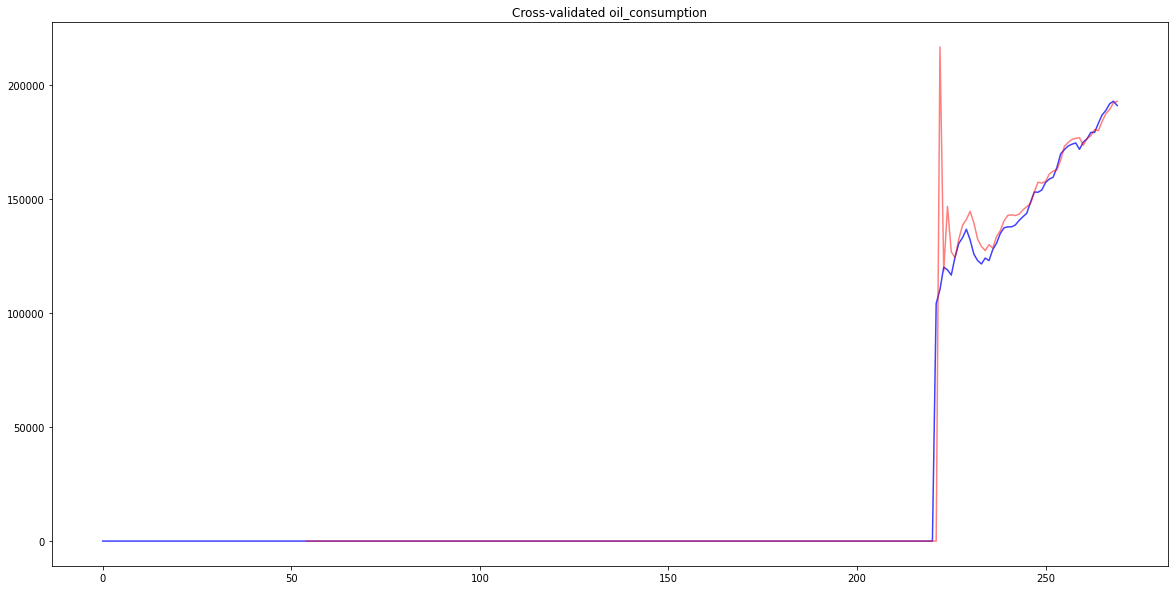

model-global-total_electricity_production.pkl COMPLETED
PLOTTING total_electricity_production
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


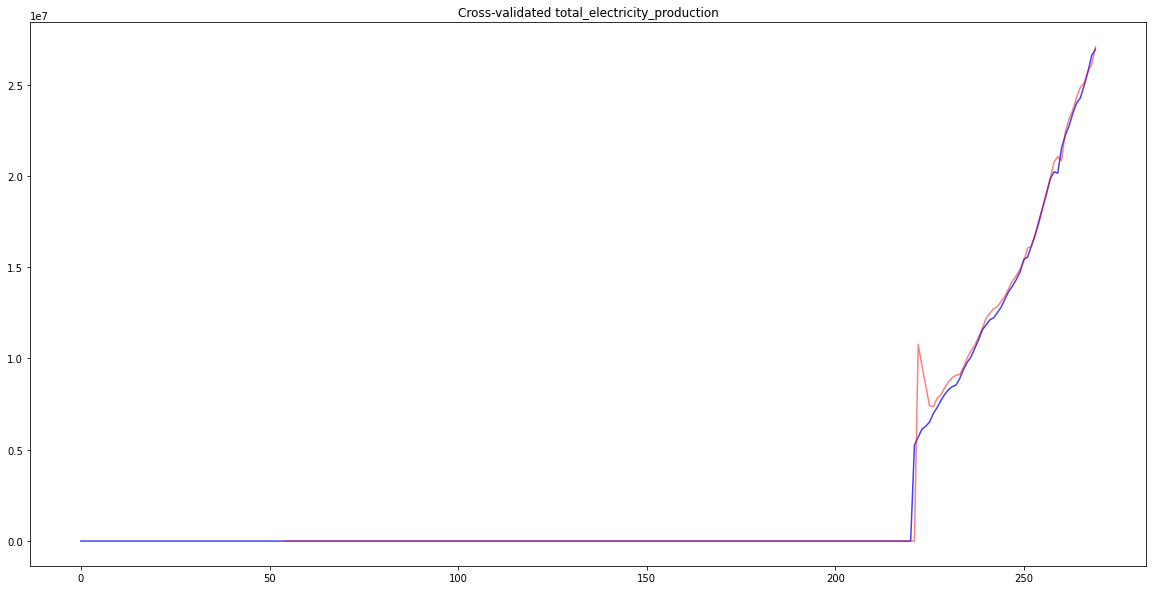

model-global-electricity_production_from_renewable.pkl COMPLETED
PLOTTING electricity_production_from_renewable
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


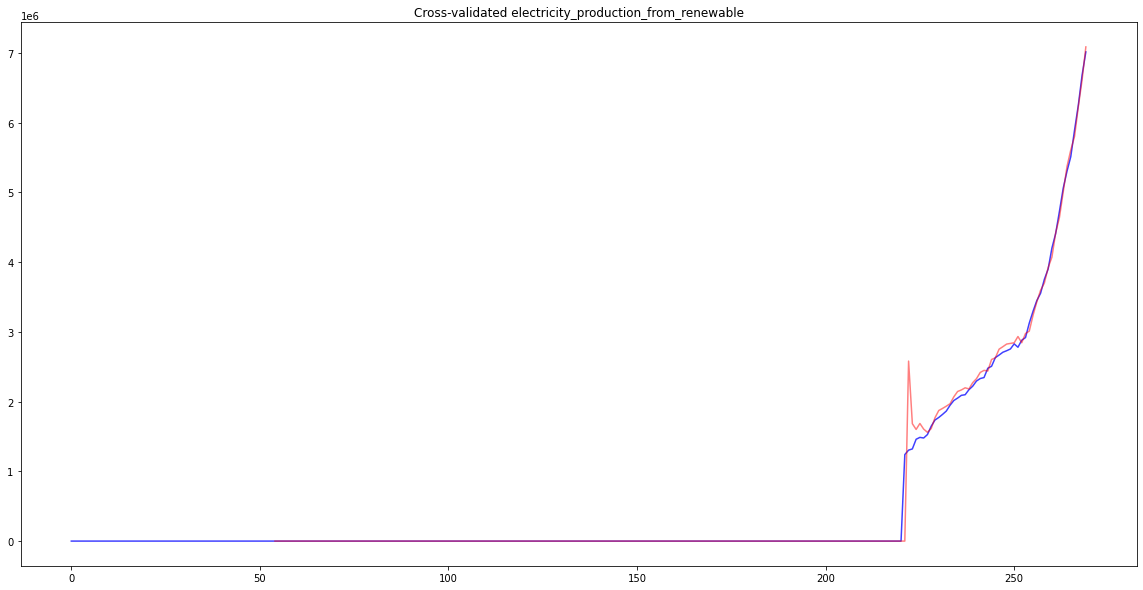

model-global-primary_energy_consumption_per_capita.pkl COMPLETED
PLOTTING primary_energy_consumption_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


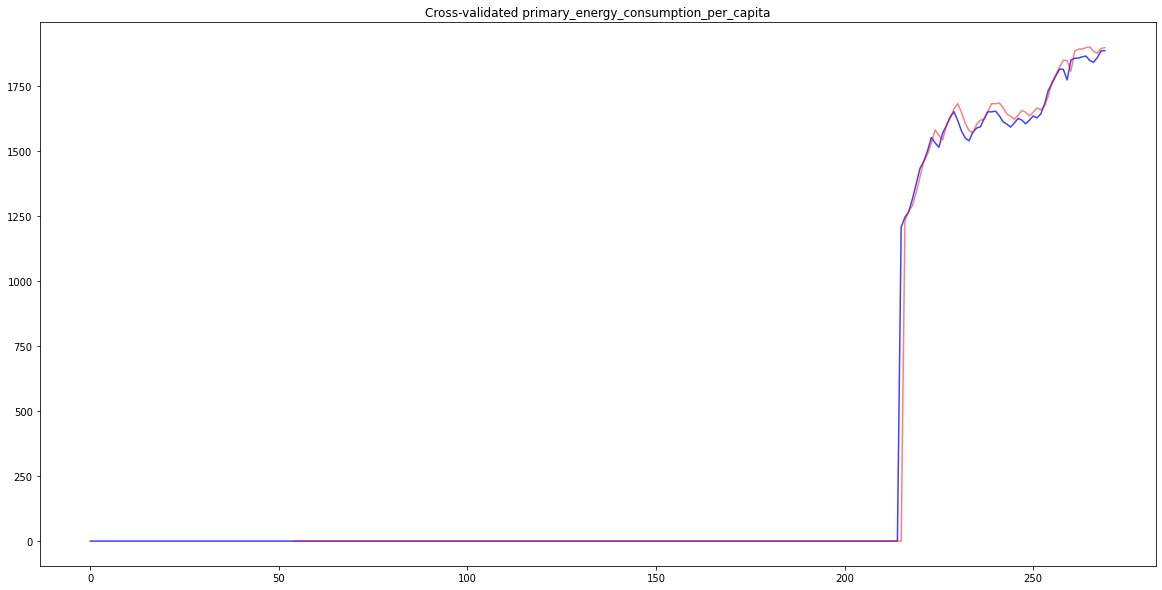

model-global-fossil_energy_consumption_share.pkl COMPLETED
PLOTTING fossil_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


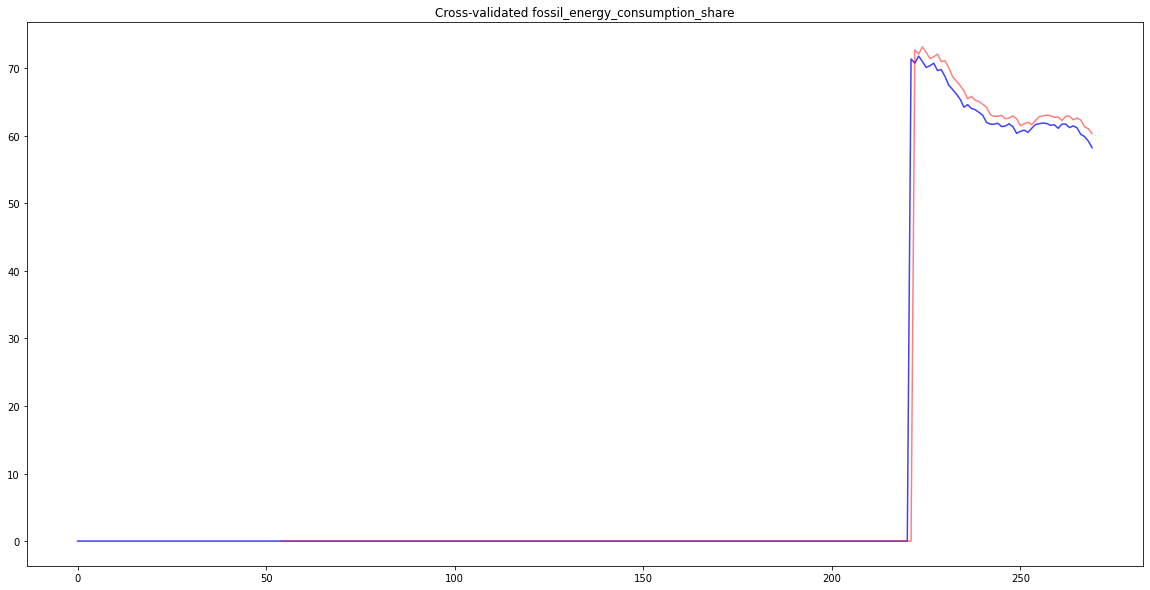

model-global-renewable_electricity_production_share.pkl COMPLETED
PLOTTING renewable_electricity_production_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


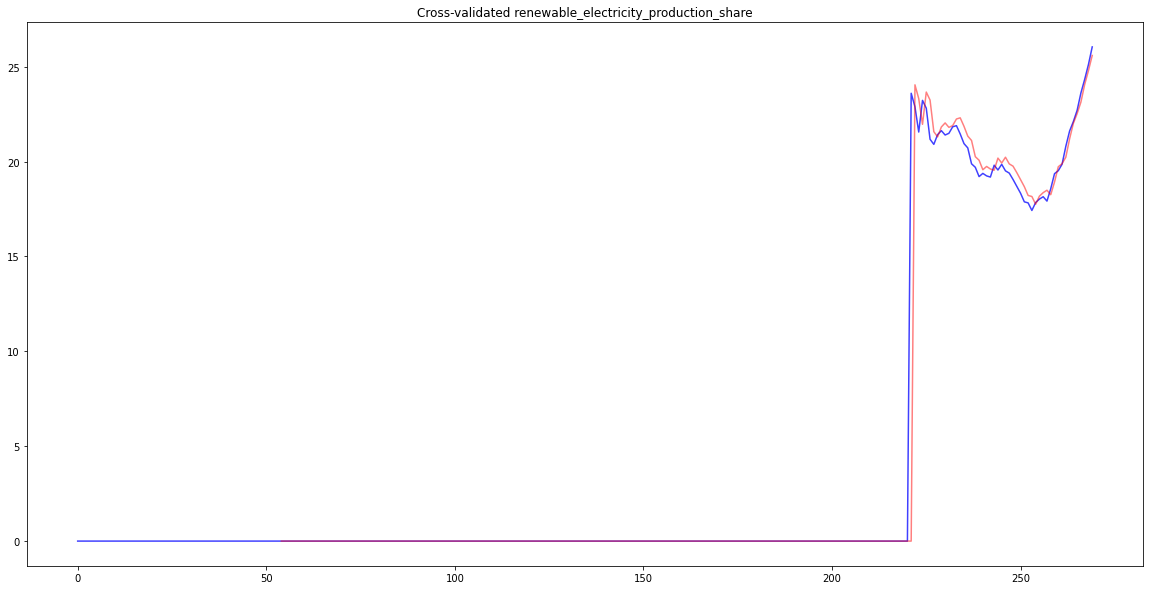

model-global-energy_intensity.pkl COMPLETED
PLOTTING energy_intensity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


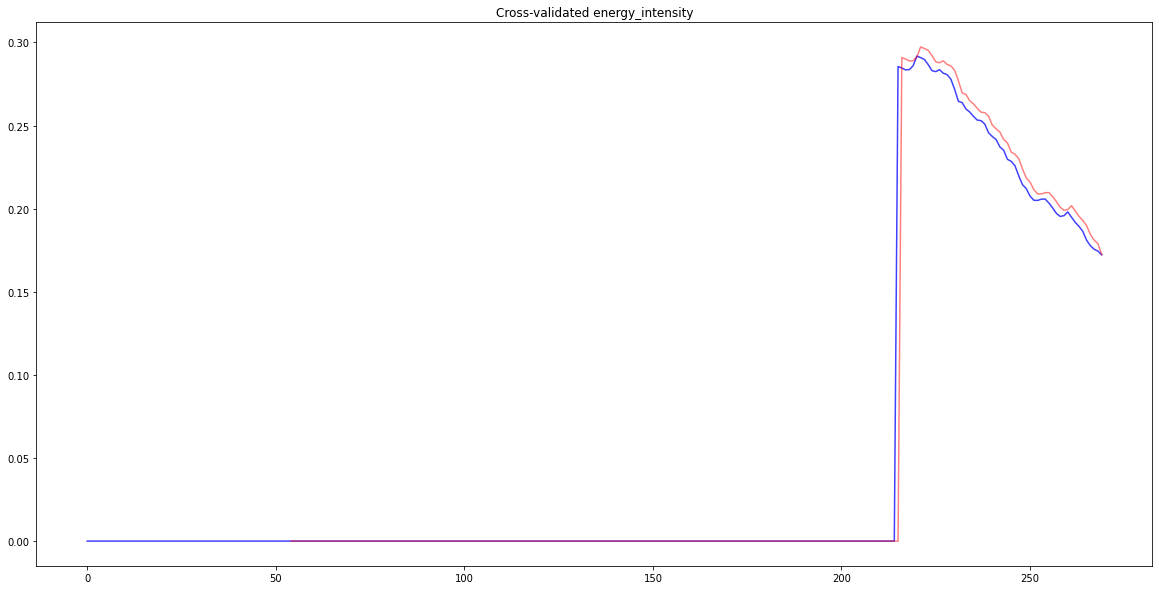

model-global-renewable_energy_consumption_share.pkl COMPLETED
PLOTTING renewable_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


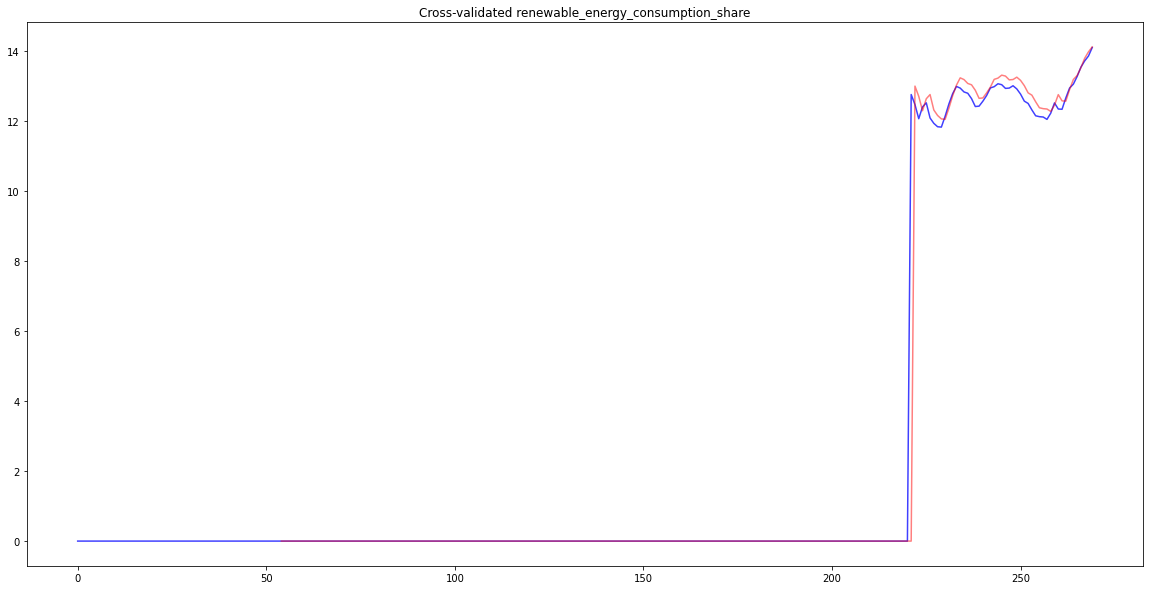

model-global-percent_of_environment_patent.pkl COMPLETED
PLOTTING percent_of_environment_patent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


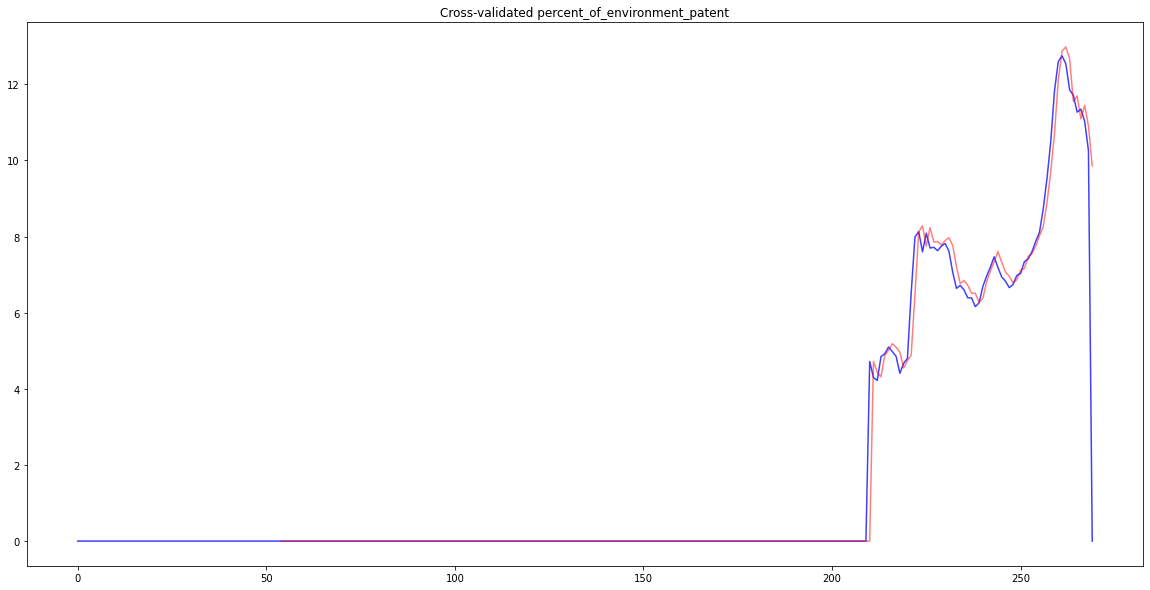

model-global-co2_growth_prct.pkl COMPLETED
PLOTTING co2_growth_prct
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


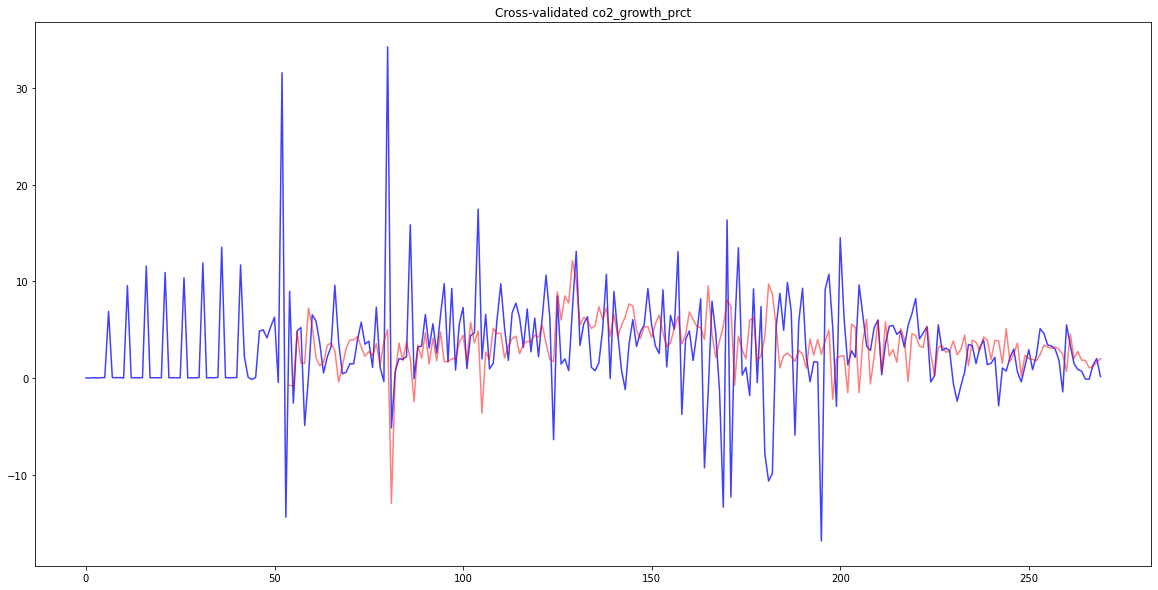

model-global-co2_growth_abs.pkl COMPLETED
PLOTTING co2_growth_abs
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


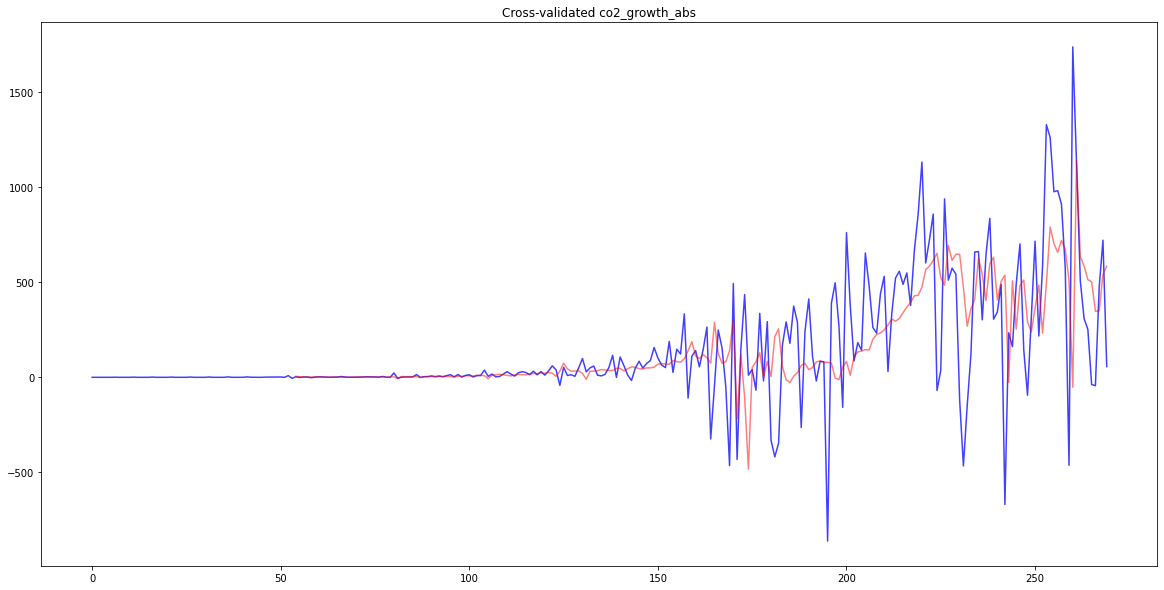

model-global-co2_per_capita.pkl COMPLETED
PLOTTING co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


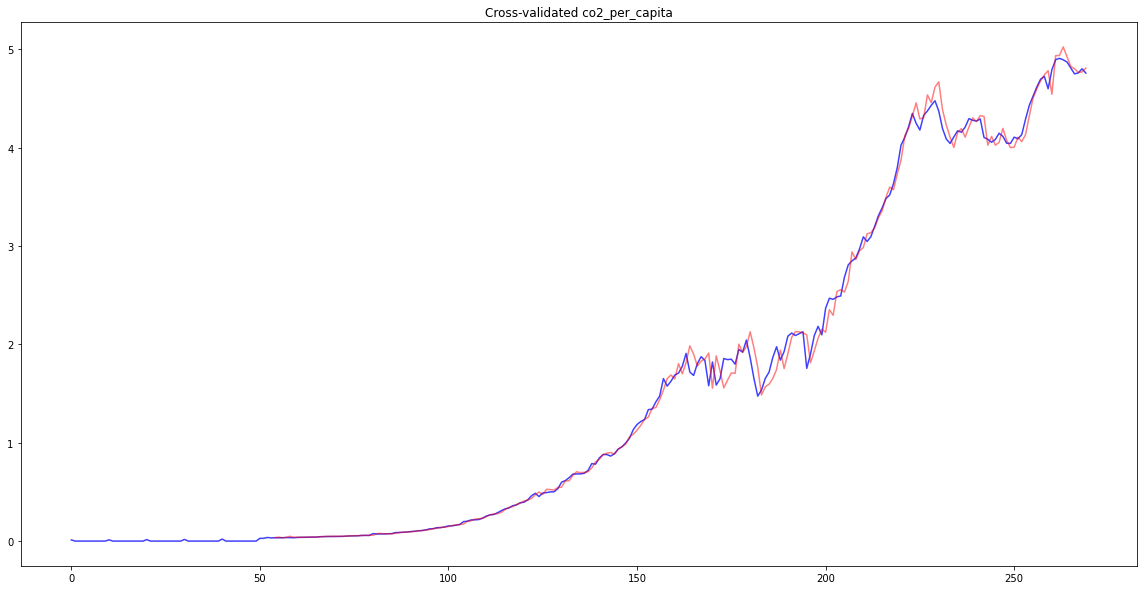

model-global-consumption_co2_per_capita.pkl COMPLETED
PLOTTING consumption_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


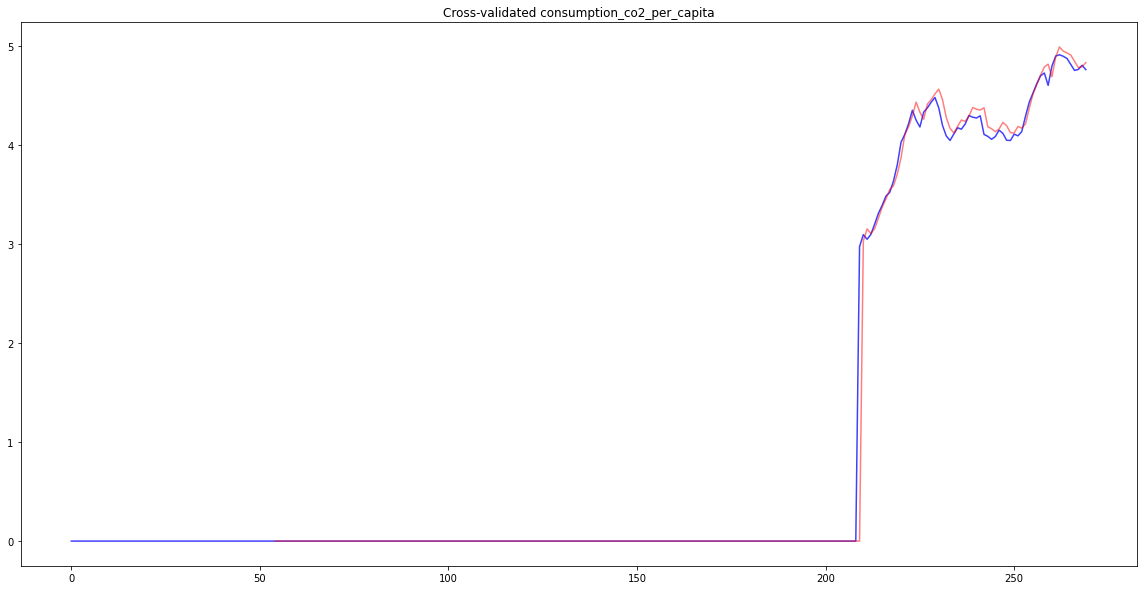

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


model-global-share_global_co2.pkl COMPLETED
PLOTTING share_global_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


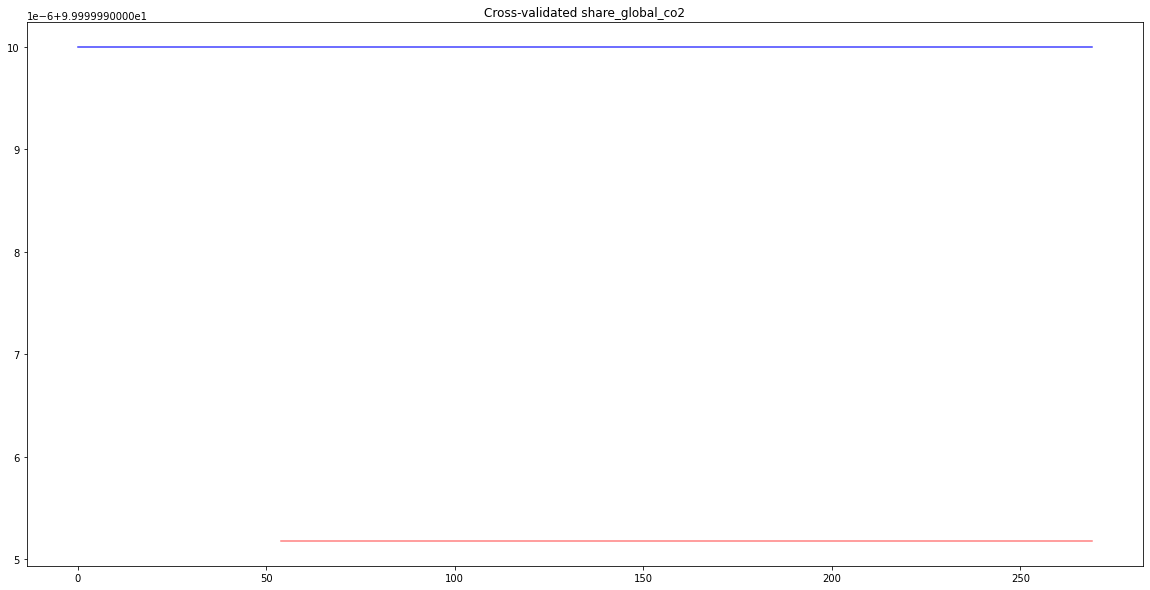

model-global-cumulative_co2.pkl COMPLETED
PLOTTING cumulative_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


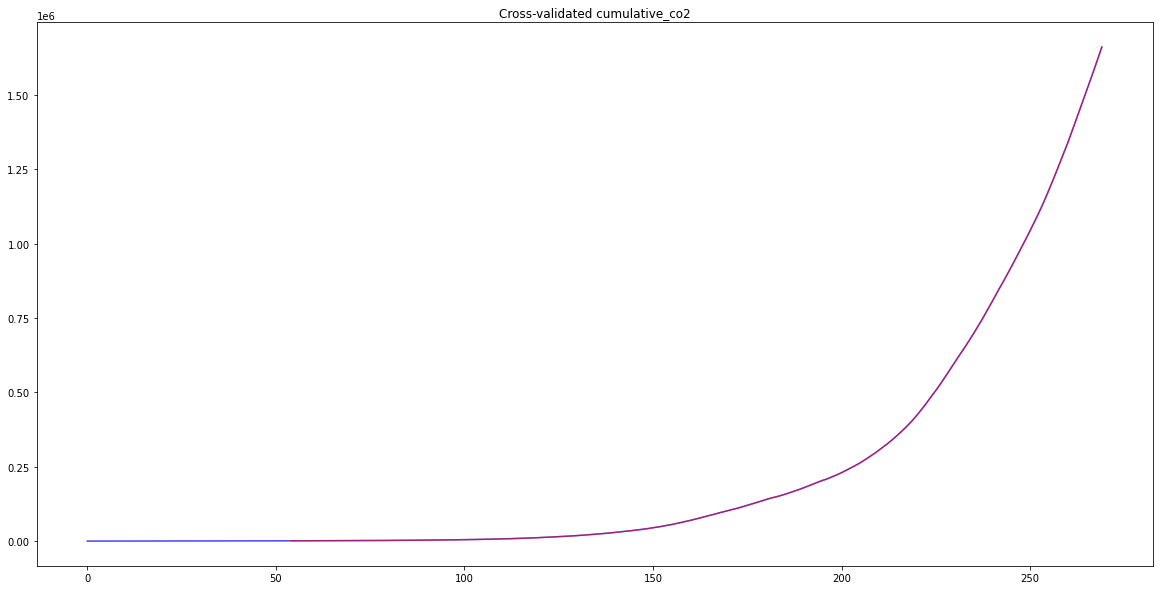

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


model-global-share_global_cumulative_co2.pkl COMPLETED
PLOTTING share_global_cumulative_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


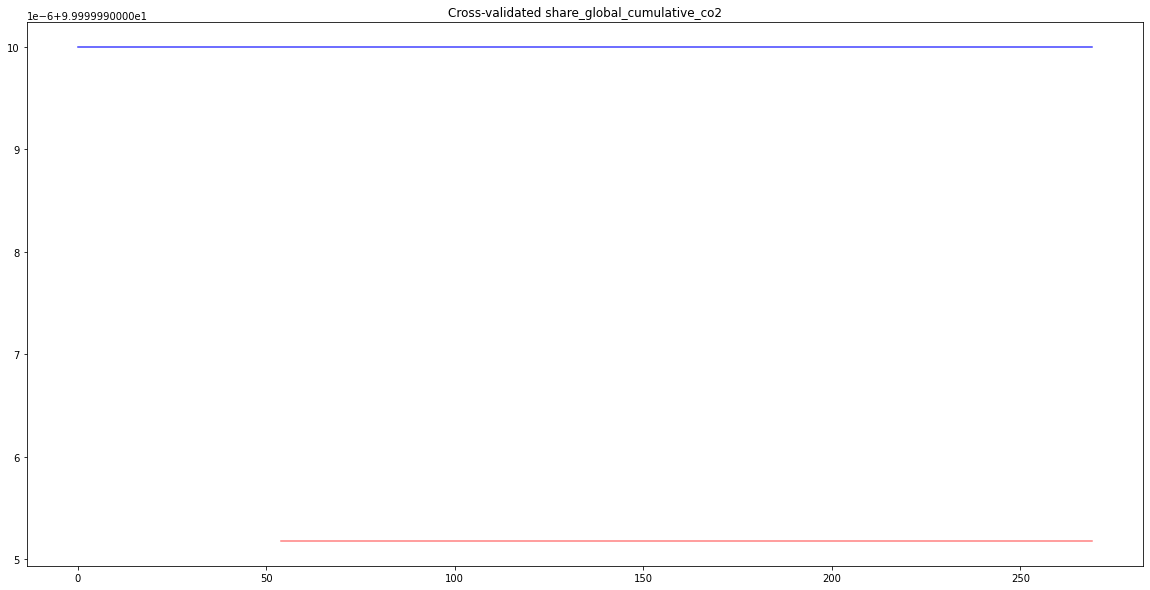

model-global-co2_per_gdp.pkl COMPLETED
PLOTTING co2_per_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


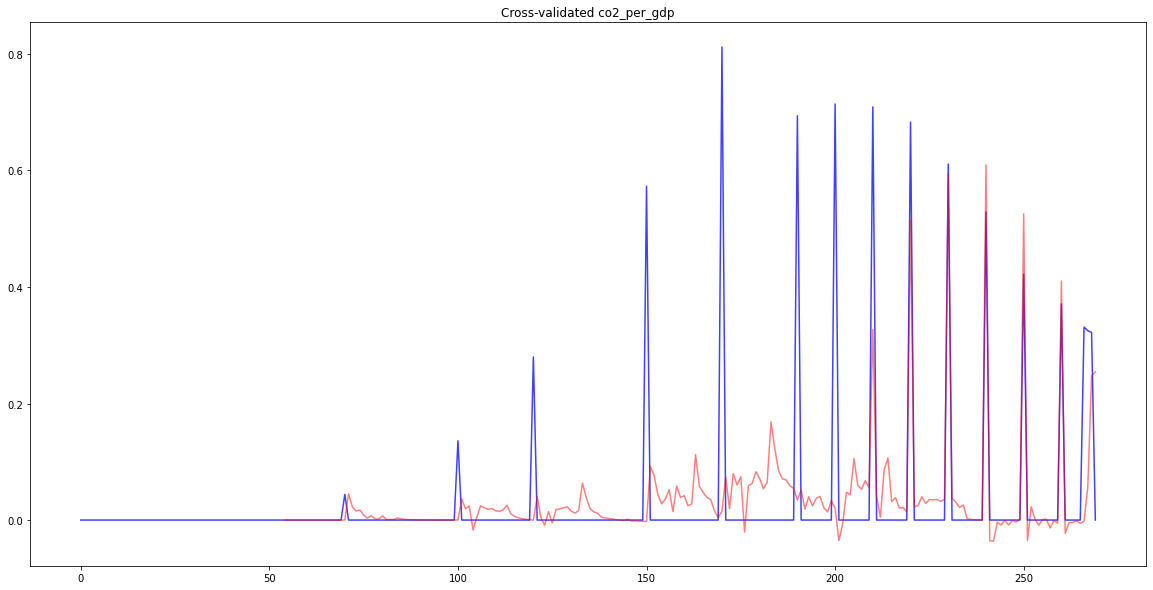

model-global-consumption_co2_per_gdp.pkl COMPLETED
PLOTTING consumption_co2_per_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


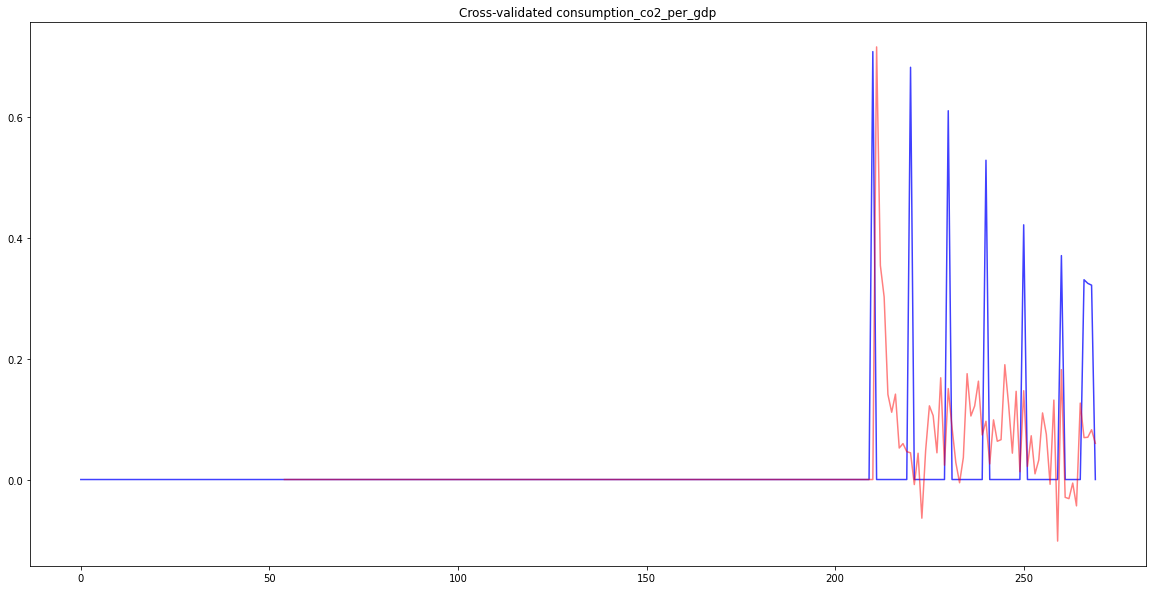

model-global-cement_co2_per_capita.pkl COMPLETED
PLOTTING cement_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


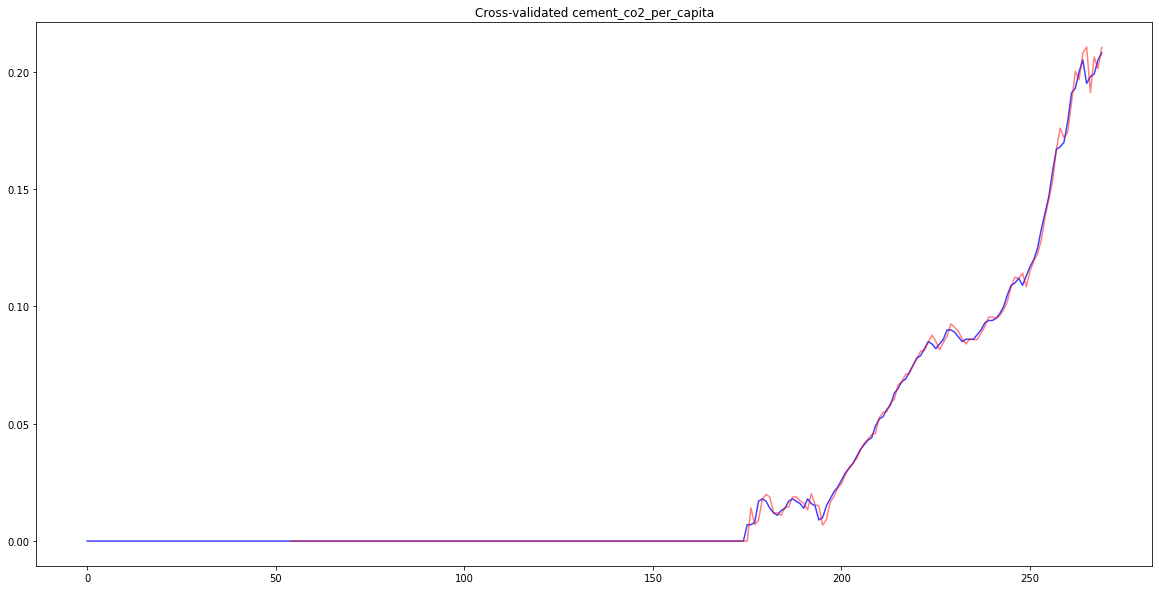

model-global-coal_co2_per_capita.pkl COMPLETED
PLOTTING coal_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


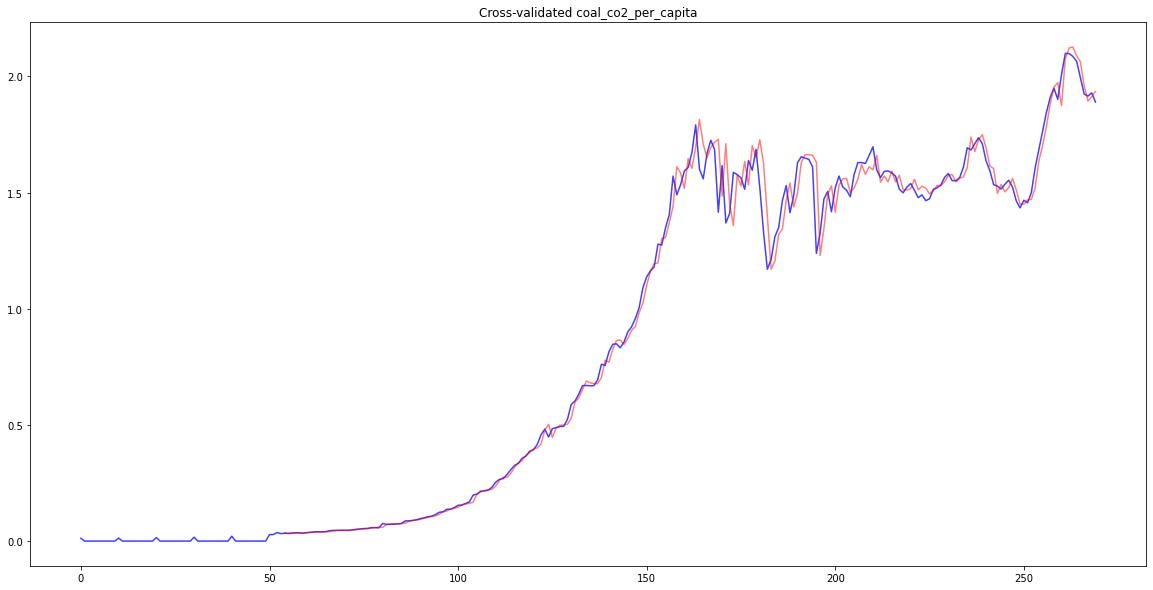

model-global-flaring_co2_per_capita.pkl COMPLETED
PLOTTING flaring_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


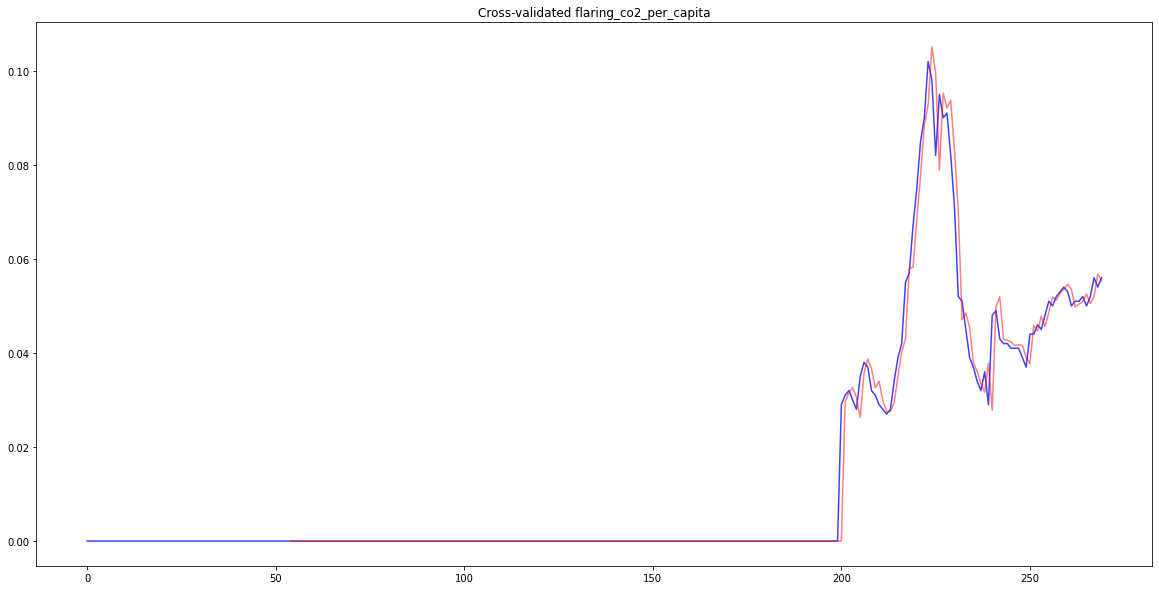

model-global-gas_co2_per_capita.pkl COMPLETED
PLOTTING gas_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


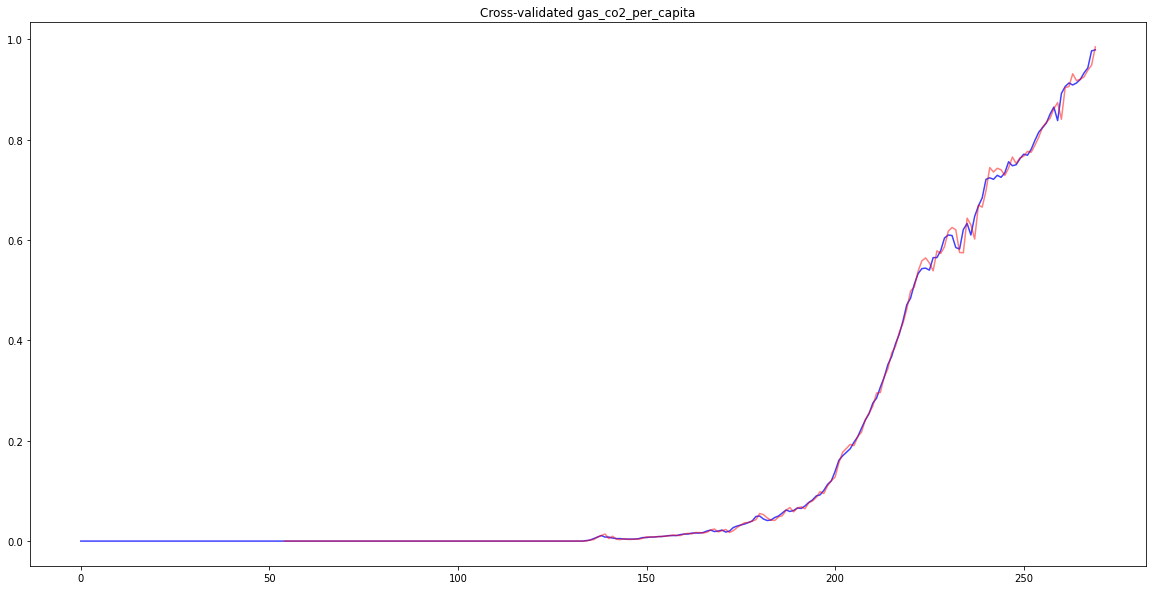

model-global-oil_co2_per_capita.pkl COMPLETED
PLOTTING oil_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


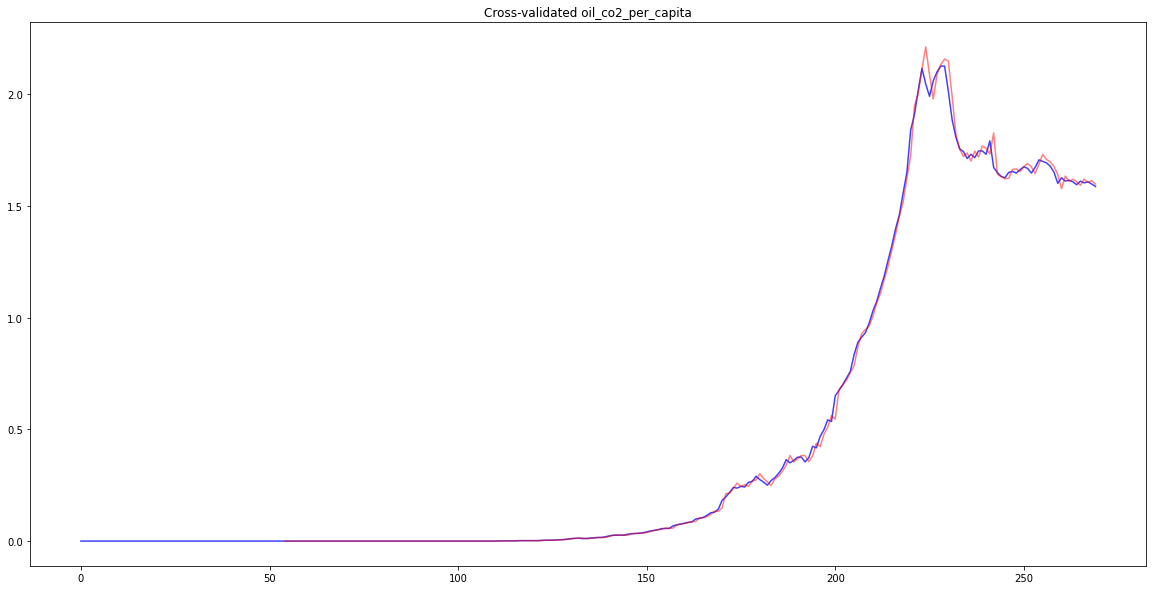

model-global-other_co2_per_capita.pkl COMPLETED
PLOTTING other_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


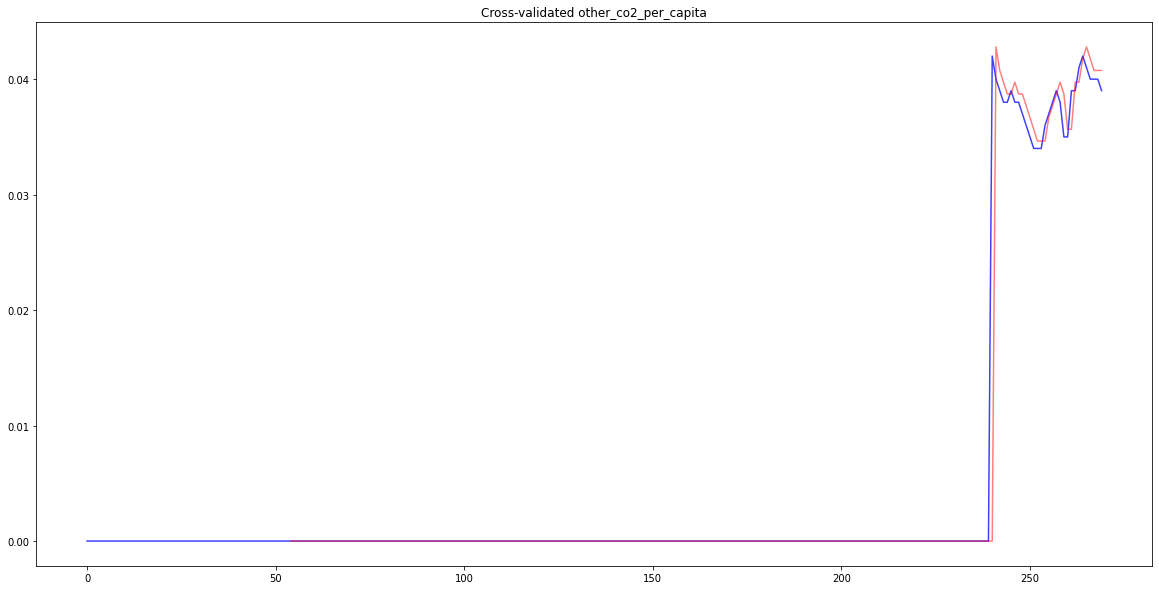

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


model-global-trade_co2_share.pkl COMPLETED
PLOTTING trade_co2_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


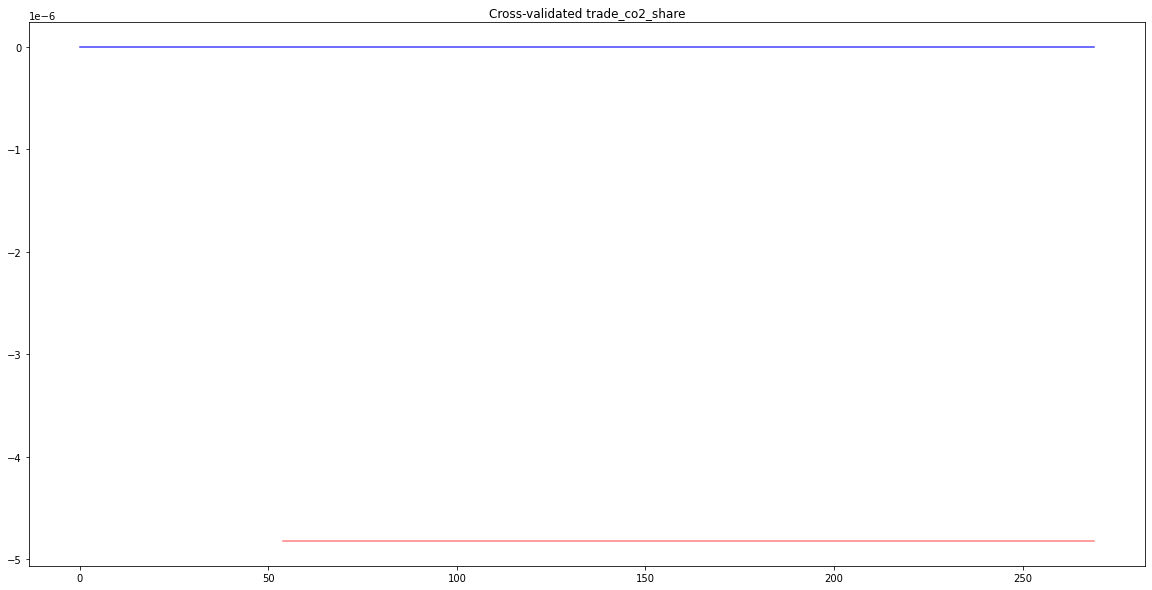

model-global-share_global_cement_co2.pkl COMPLETED
PLOTTING share_global_cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


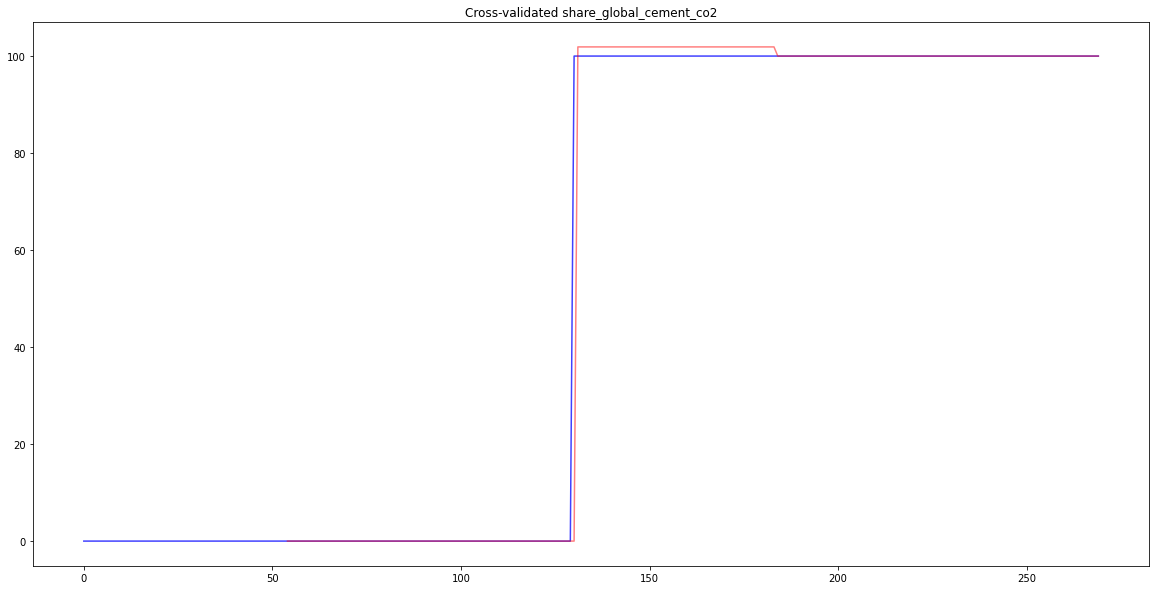

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


model-global-share_global_coal_co2.pkl COMPLETED
PLOTTING share_global_coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


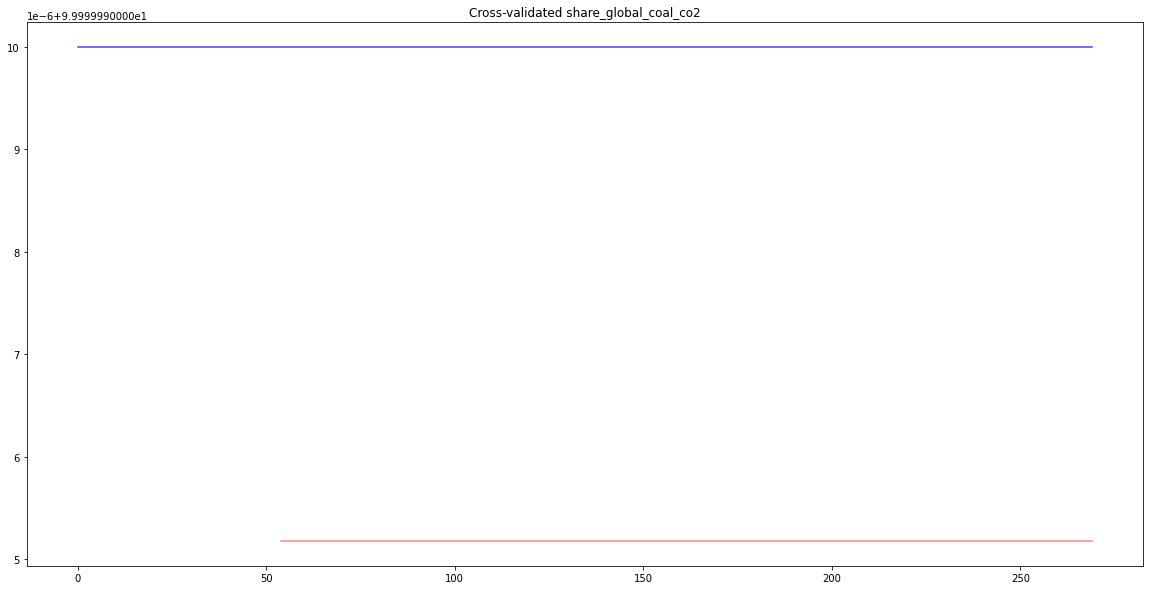

model-global-share_global_flaring_co2.pkl COMPLETED
PLOTTING share_global_flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


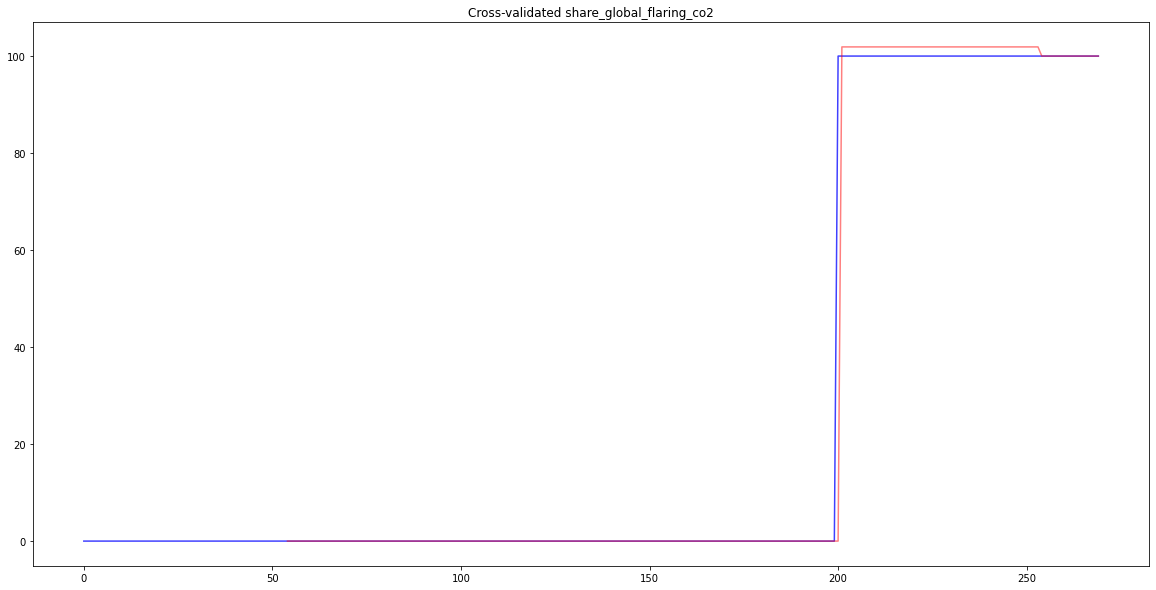

model-global-share_global_gas_co2.pkl COMPLETED
PLOTTING share_global_gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


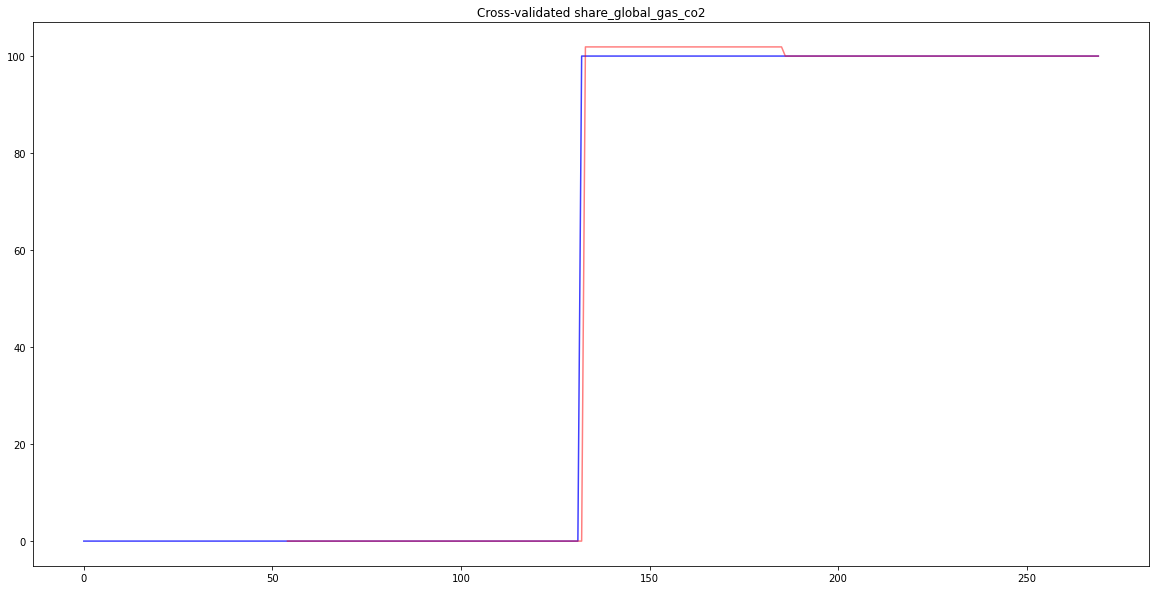

model-global-share_global_oil_co2.pkl COMPLETED
PLOTTING share_global_oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


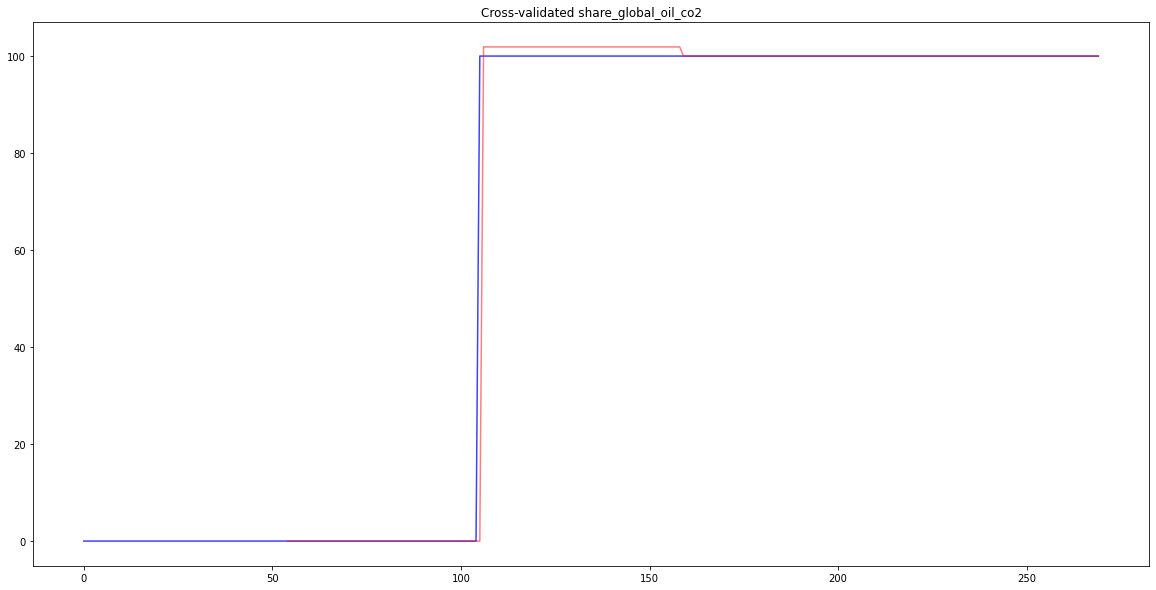

model-global-share_global_other_co2.pkl COMPLETED
PLOTTING share_global_other_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


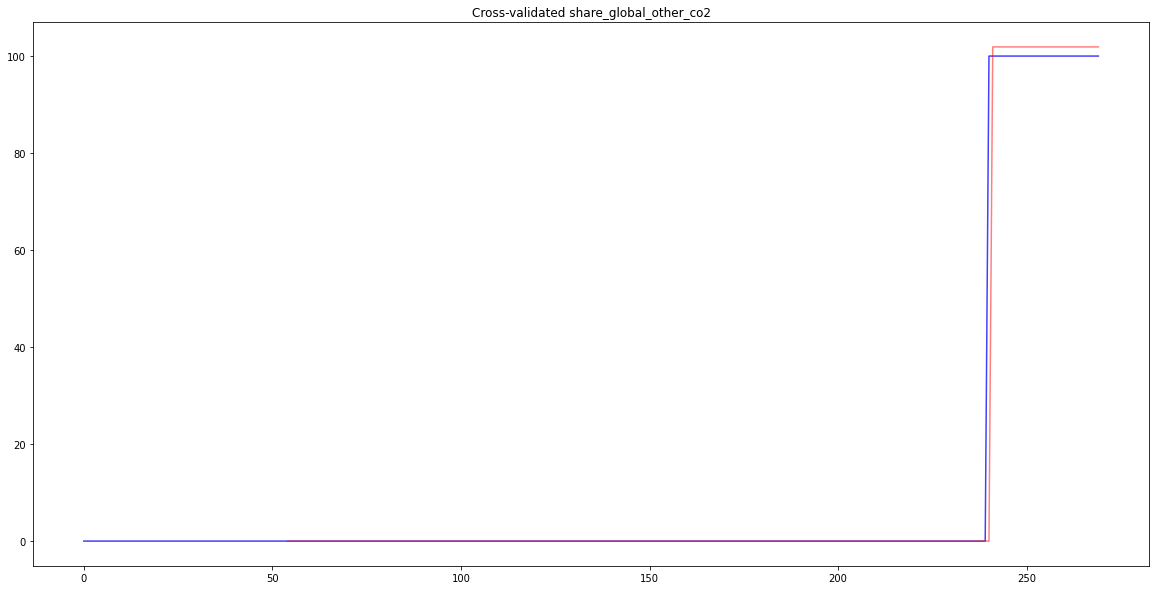

model-global-cumulative_cement_co2.pkl COMPLETED
PLOTTING cumulative_cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


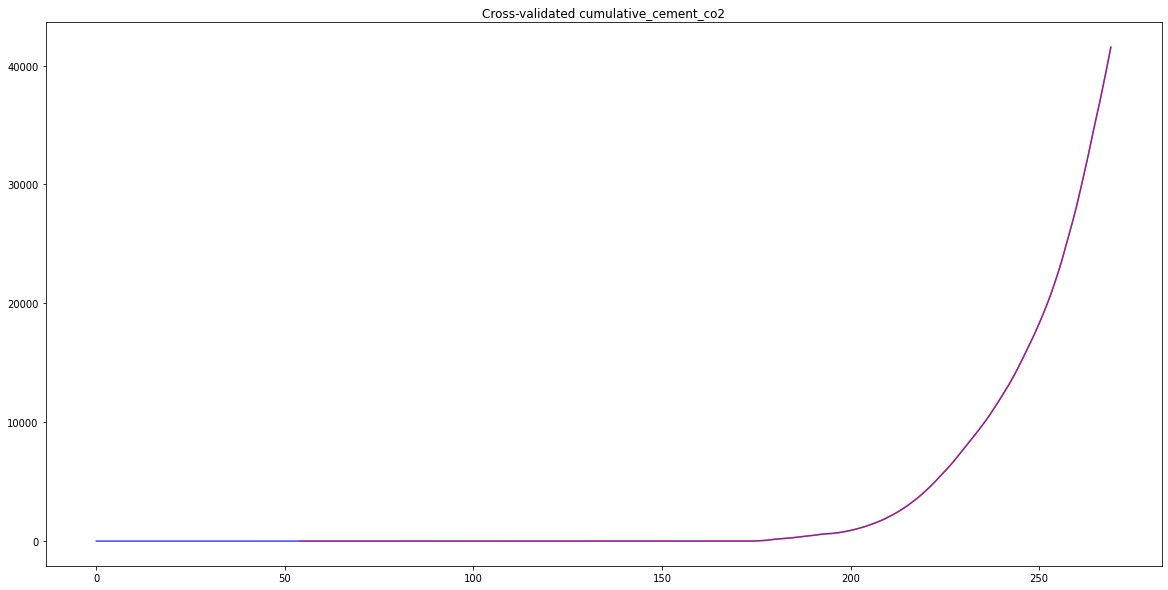

model-global-cumulative_coal_co2.pkl COMPLETED
PLOTTING cumulative_coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


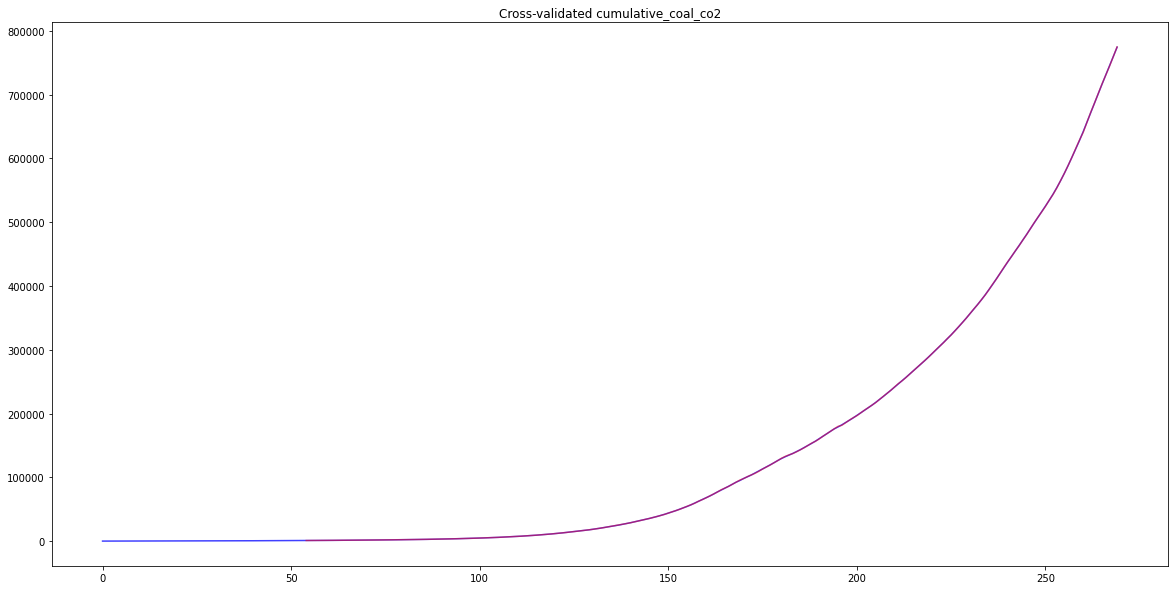

model-global-cumulative_flaring_co2.pkl COMPLETED
PLOTTING cumulative_flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


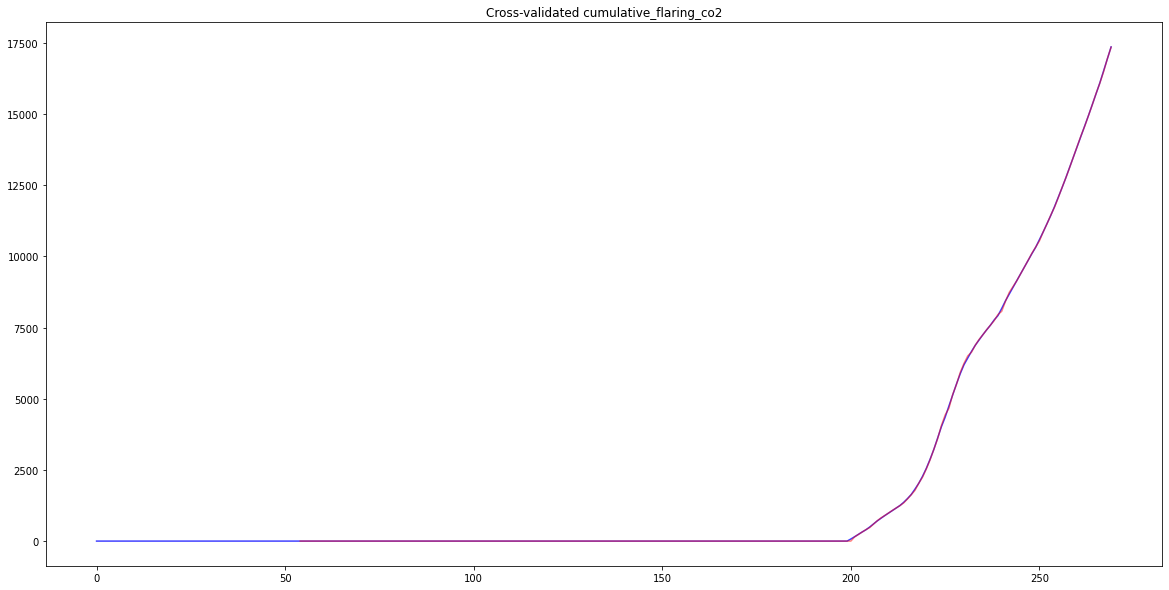

model-global-cumulative_gas_co2.pkl COMPLETED
PLOTTING cumulative_gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


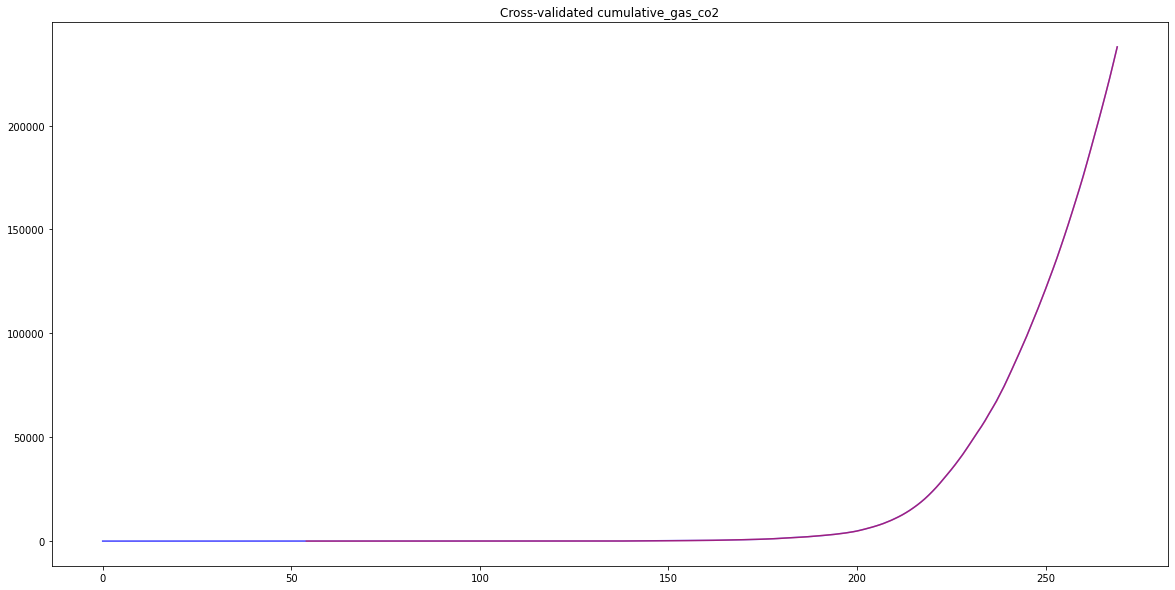

model-global-cumulative_oil_co2.pkl COMPLETED
PLOTTING cumulative_oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


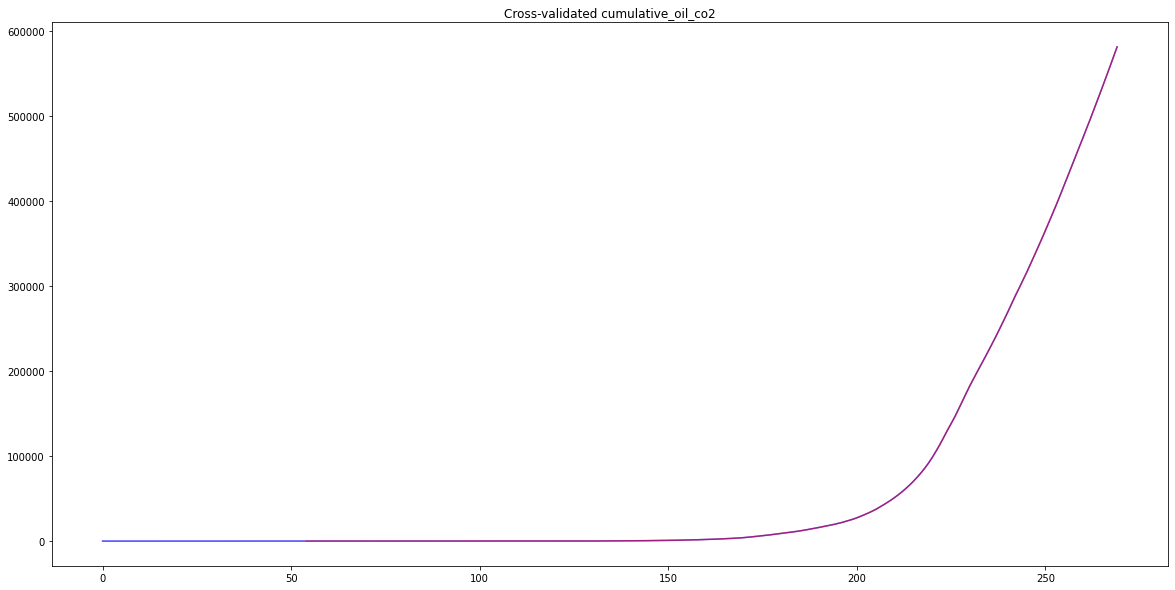

model-global-cumulative_other_co2.pkl COMPLETED
PLOTTING cumulative_other_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


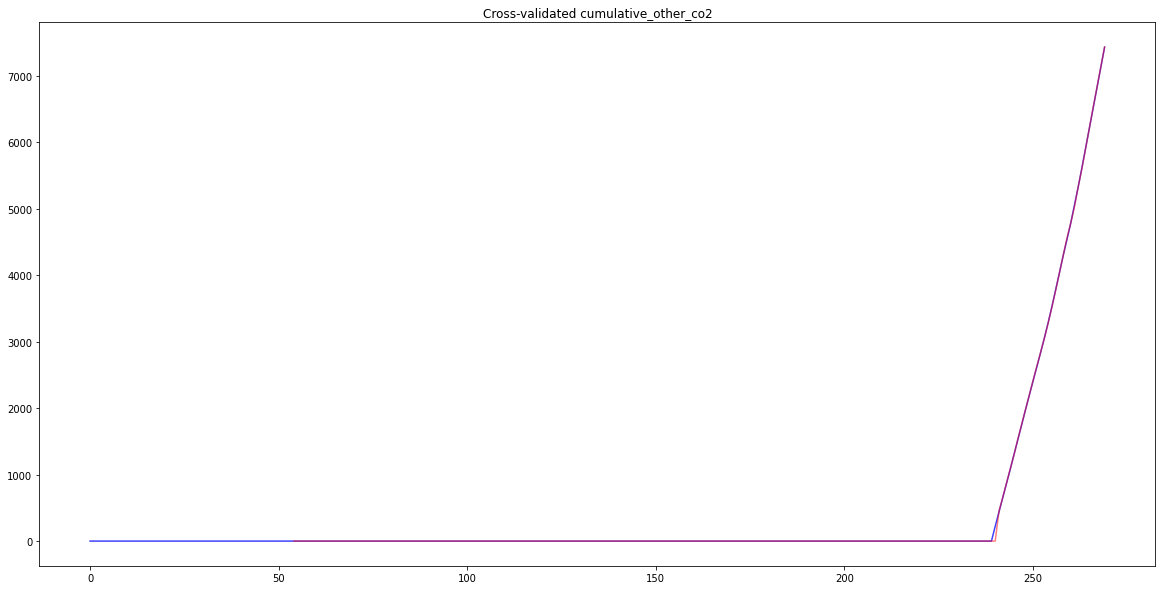

model-global-share_global_cumulative_cement_co2.pkl COMPLETED
PLOTTING share_global_cumulative_cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


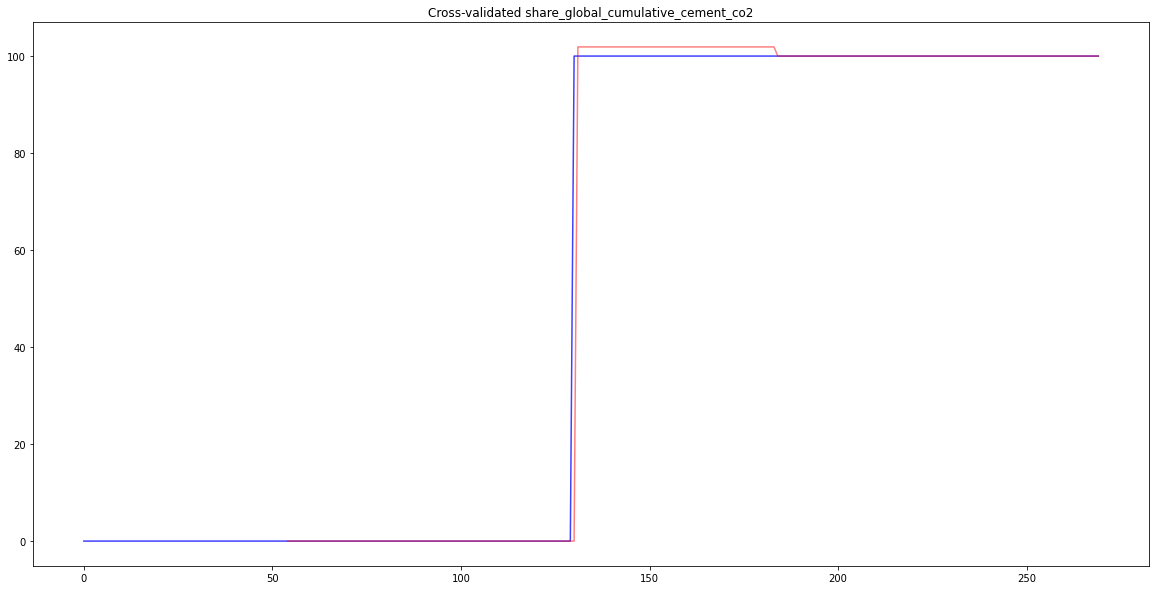

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


model-global-share_global_cumulative_coal_co2.pkl COMPLETED
PLOTTING share_global_cumulative_coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


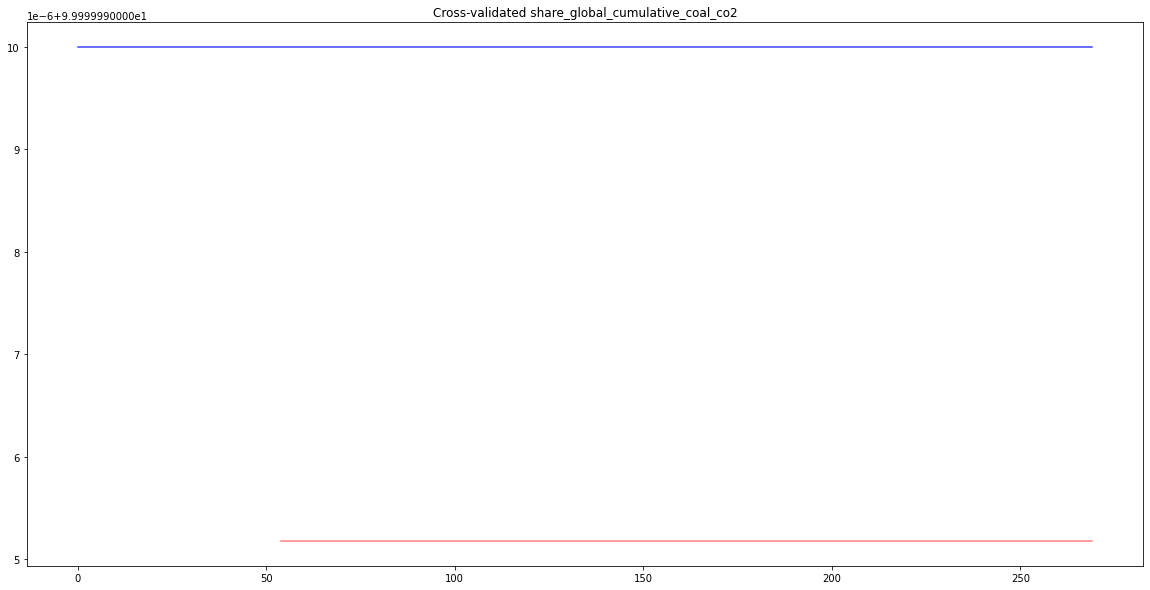

model-global-share_global_cumulative_flaring_co2.pkl COMPLETED
PLOTTING share_global_cumulative_flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


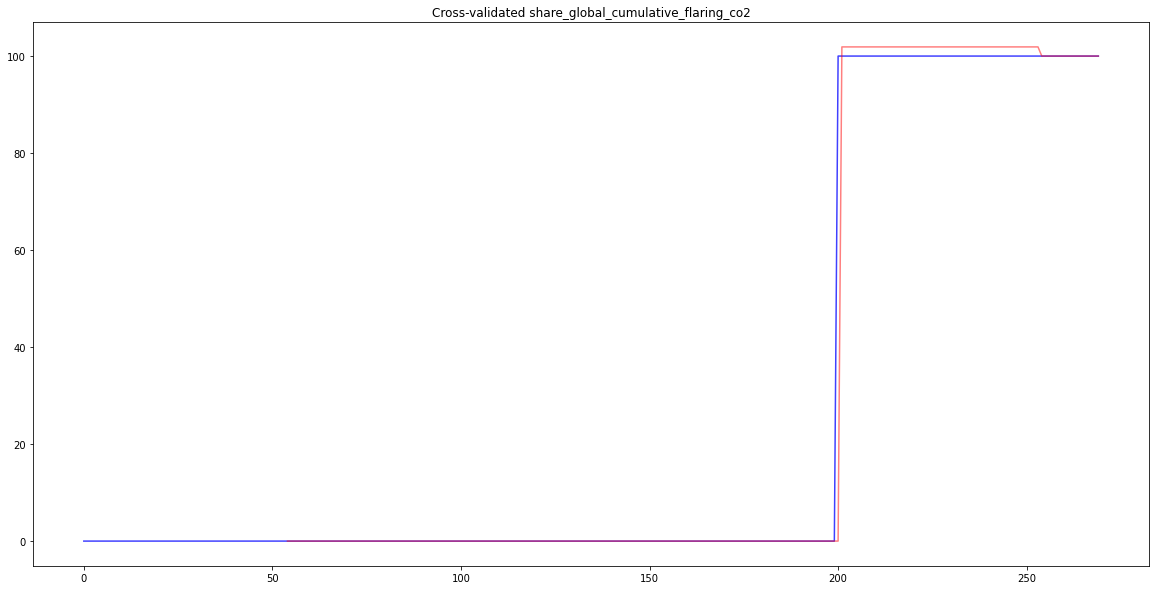

model-global-share_global_cumulative_gas_co2.pkl COMPLETED
PLOTTING share_global_cumulative_gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


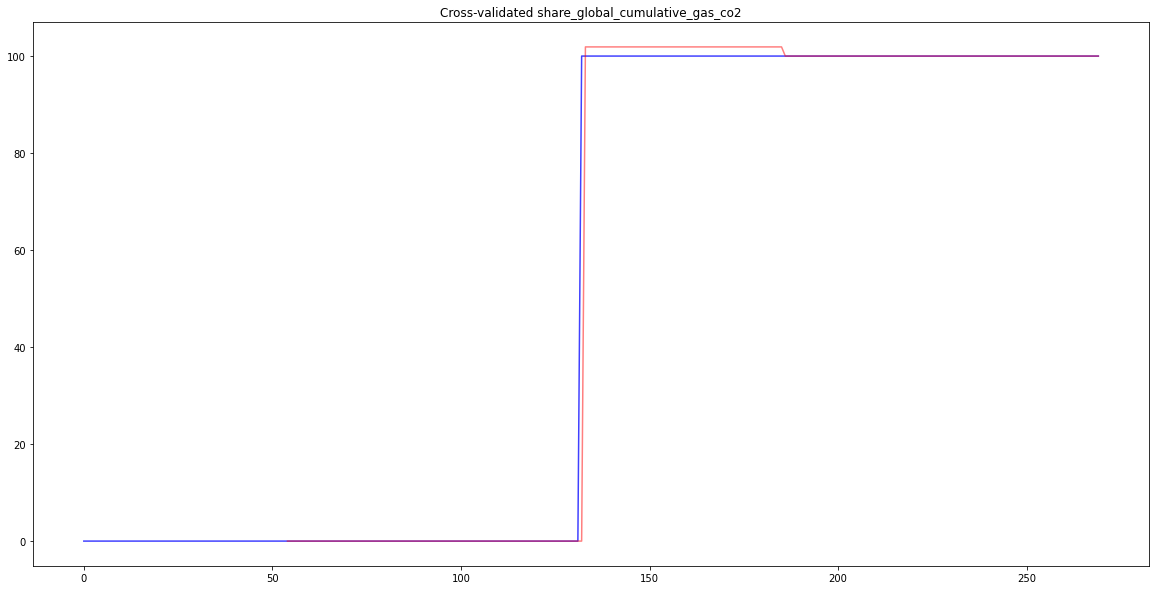

model-global-share_global_cumulative_oil_co2.pkl COMPLETED
PLOTTING share_global_cumulative_oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


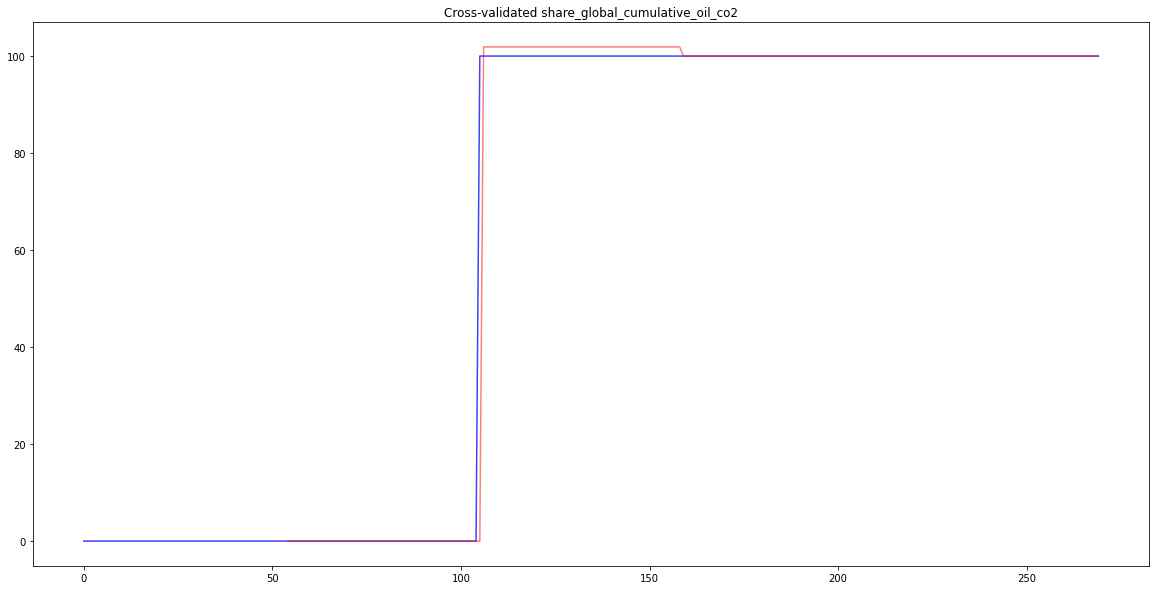

model-global-share_global_cumulative_other_co2.pkl COMPLETED
PLOTTING share_global_cumulative_other_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


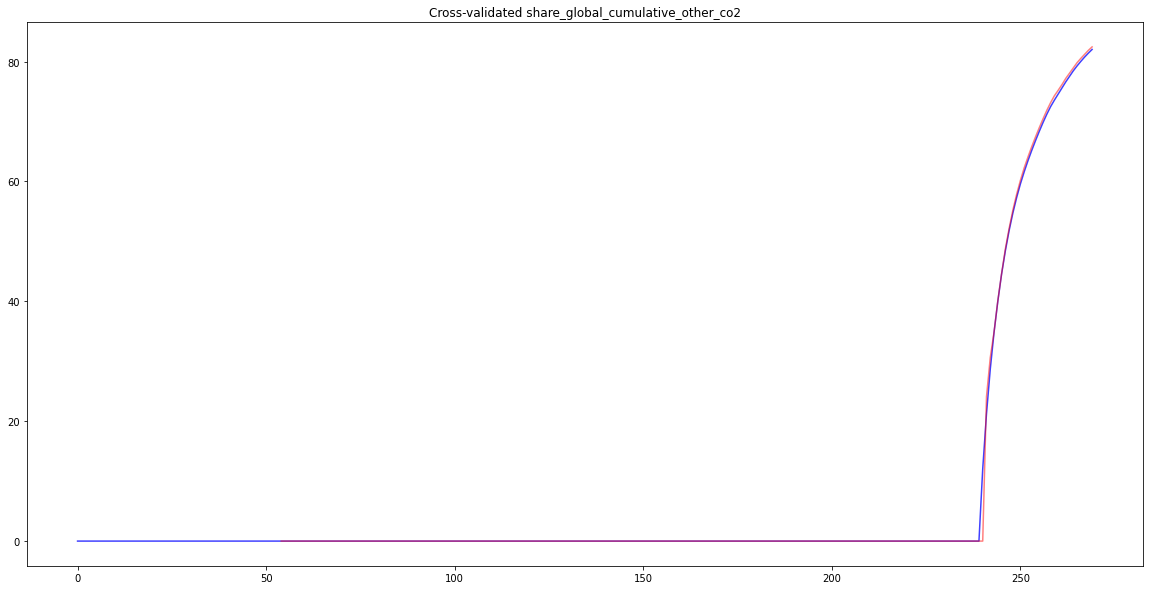

model-global-ghg_per_capita.pkl COMPLETED
PLOTTING ghg_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


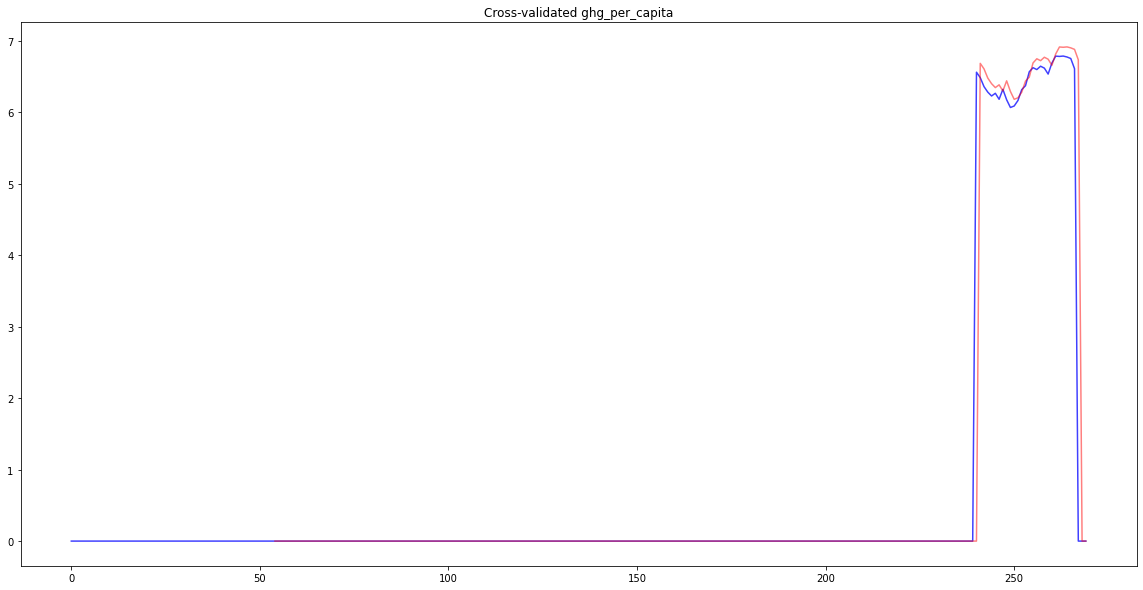

model-global-methane_per_capita.pkl COMPLETED
PLOTTING methane_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


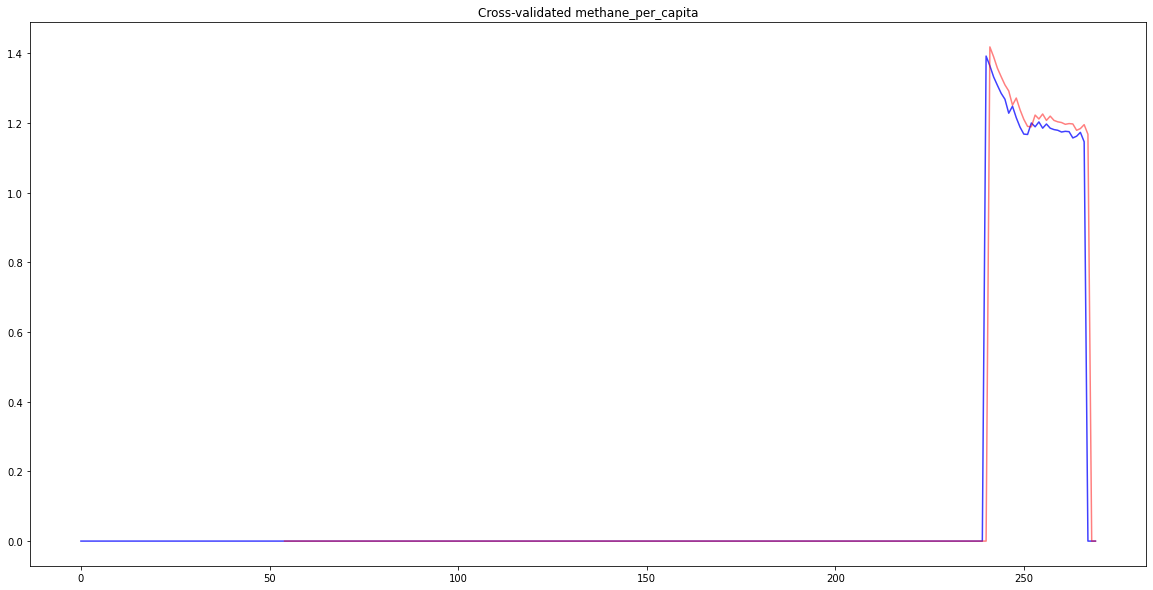

model-global-nitrous_oxide_per_capita.pkl COMPLETED
PLOTTING nitrous_oxide_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


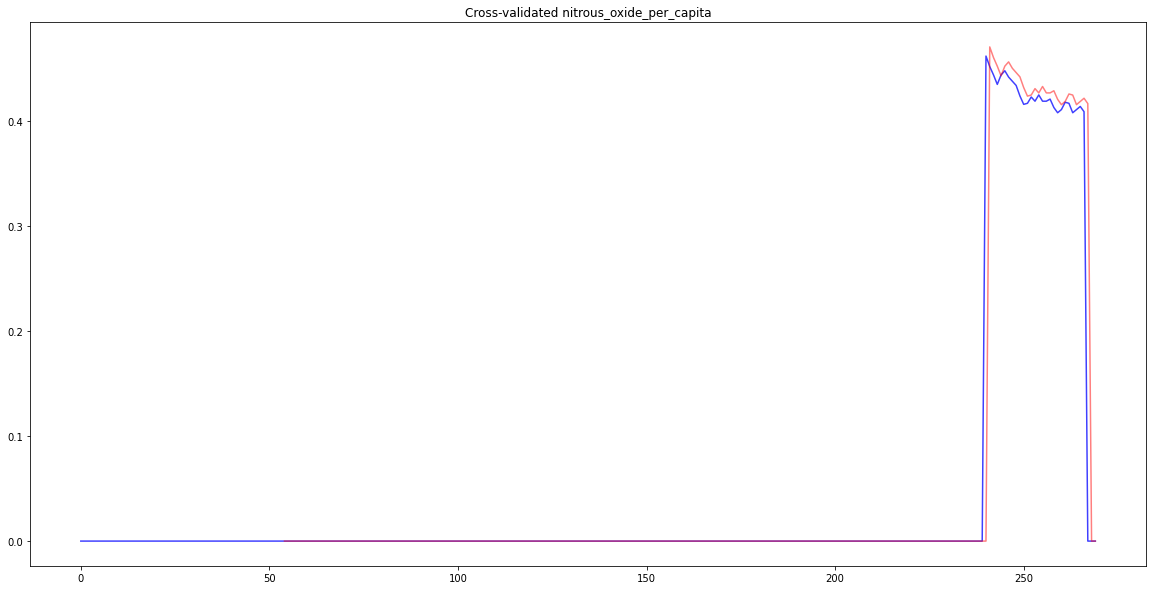

model-global-energy_per_capita.pkl COMPLETED
PLOTTING energy_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


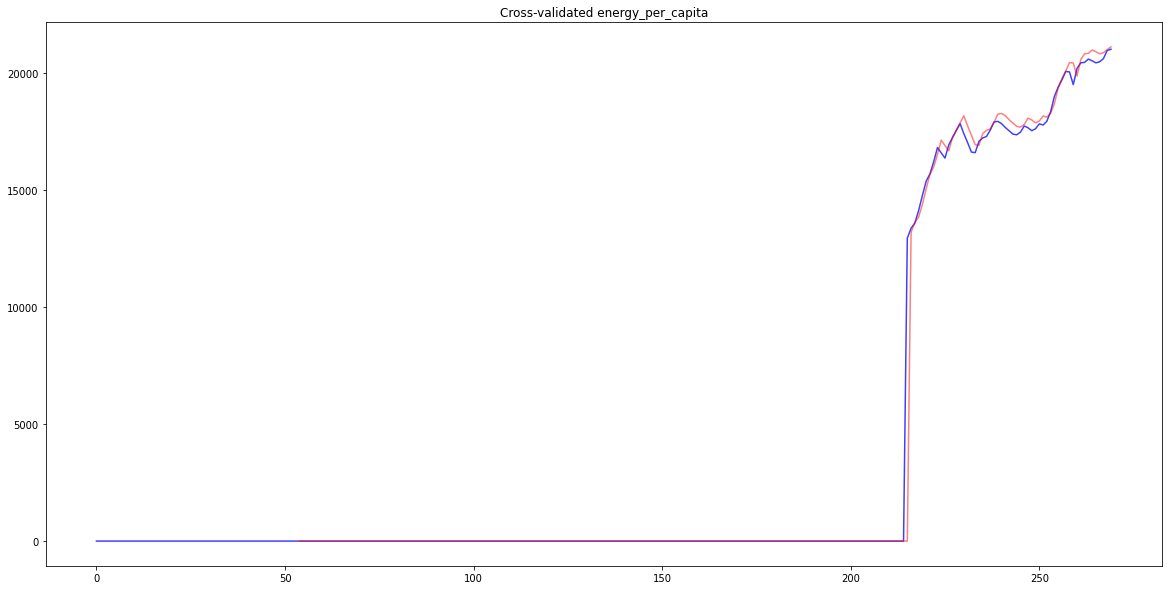

model-global-energy_per_gdp.pkl COMPLETED
PLOTTING energy_per_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


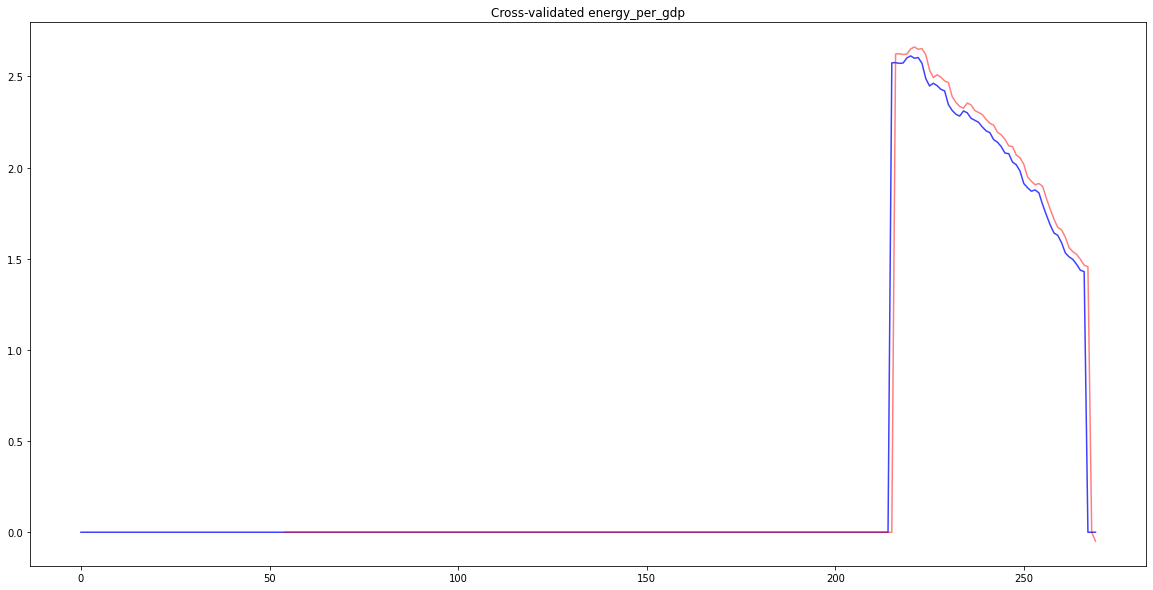

model-global-real_gdp_growth_percent.pkl COMPLETED
PLOTTING real_gdp_growth_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


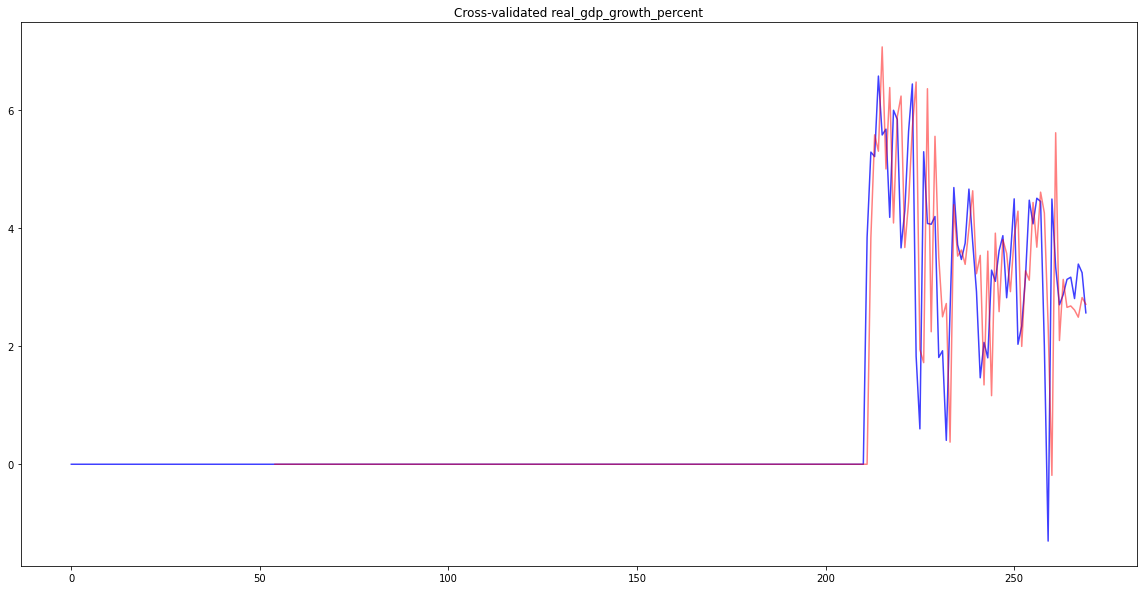

model-global-co2_emission_per_capita.pkl COMPLETED
PLOTTING co2_emission_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


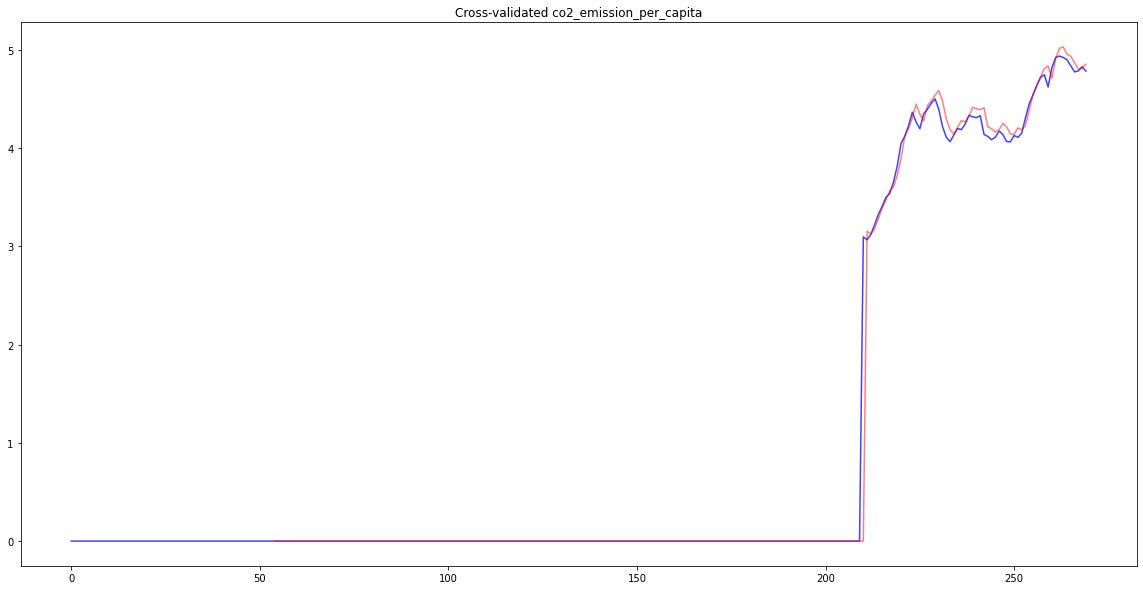

model-global-constant_gdp_per_capita.pkl COMPLETED
PLOTTING constant_gdp_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


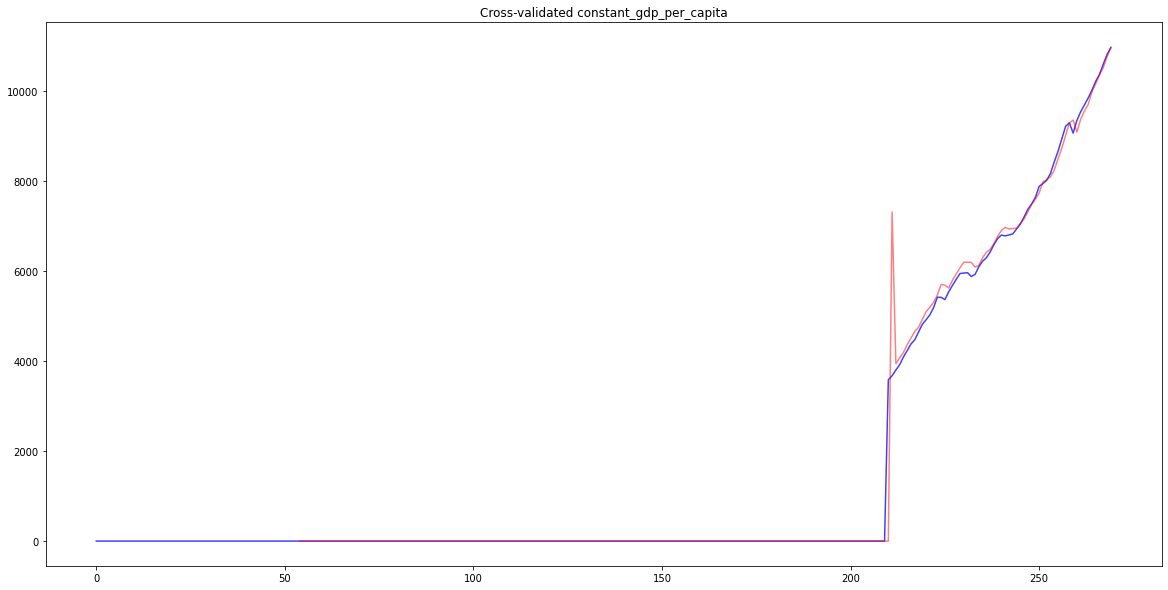

model-global-co2_emission_per_constant_gdp.pkl COMPLETED
PLOTTING co2_emission_per_constant_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


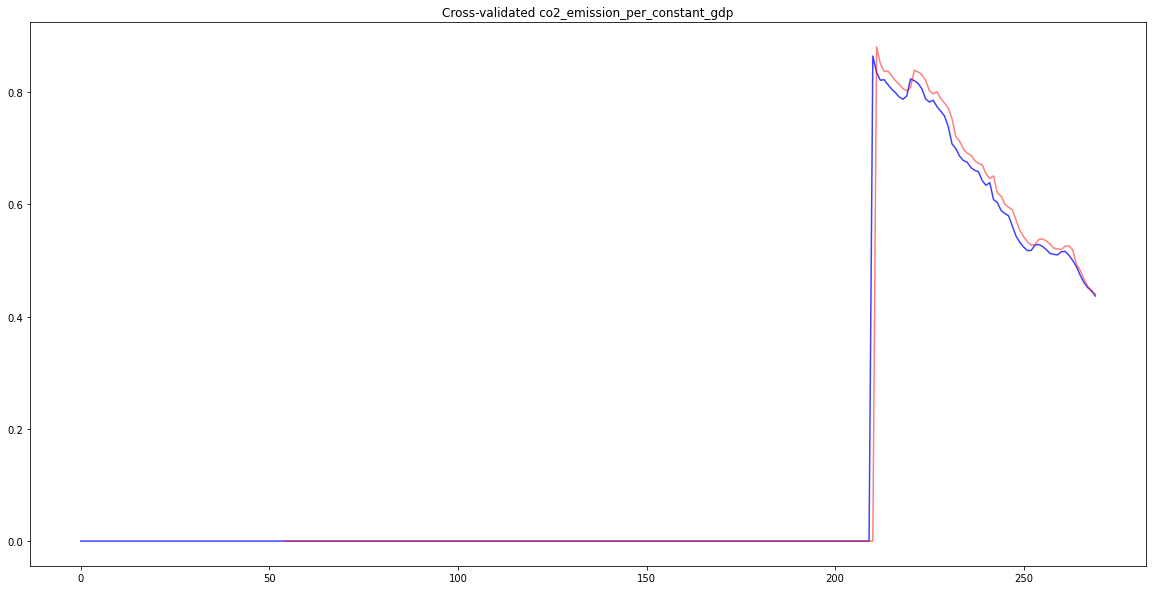

model-global-co2_country_share_percent.pkl COMPLETED
PLOTTING co2_country_share_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


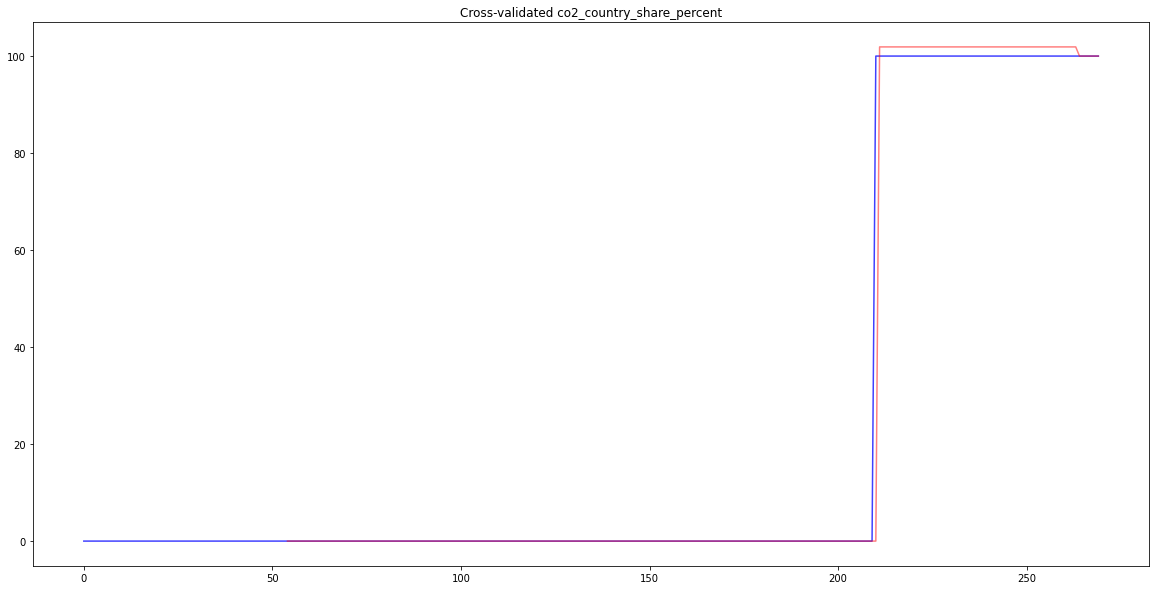

model-global-manufacturing_country_share_percent.pkl COMPLETED
PLOTTING manufacturing_country_share_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


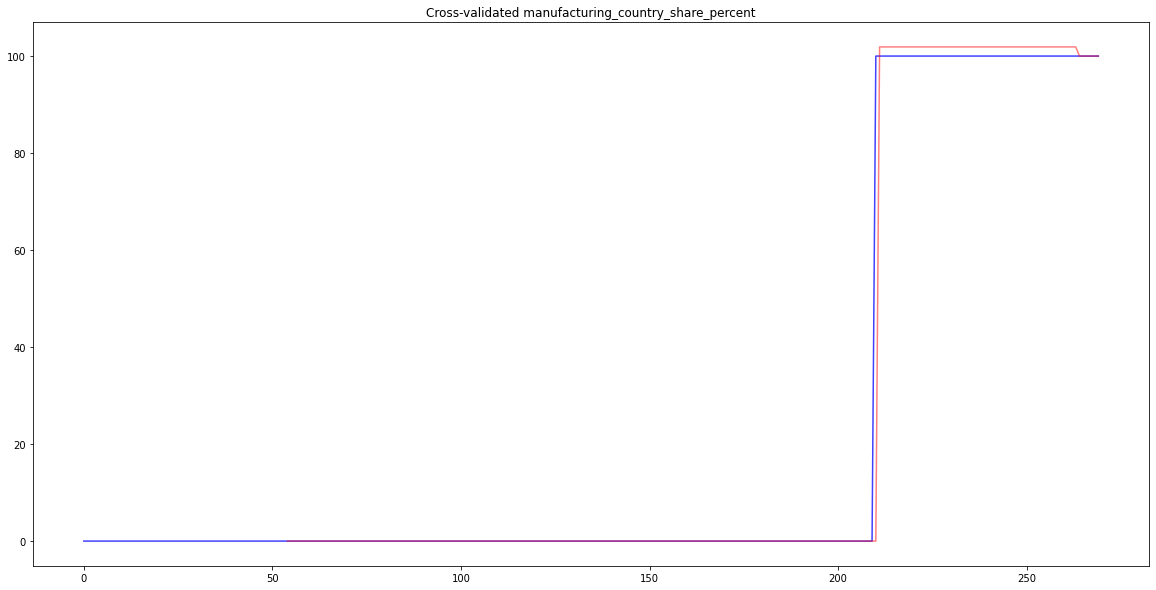

model-usa-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


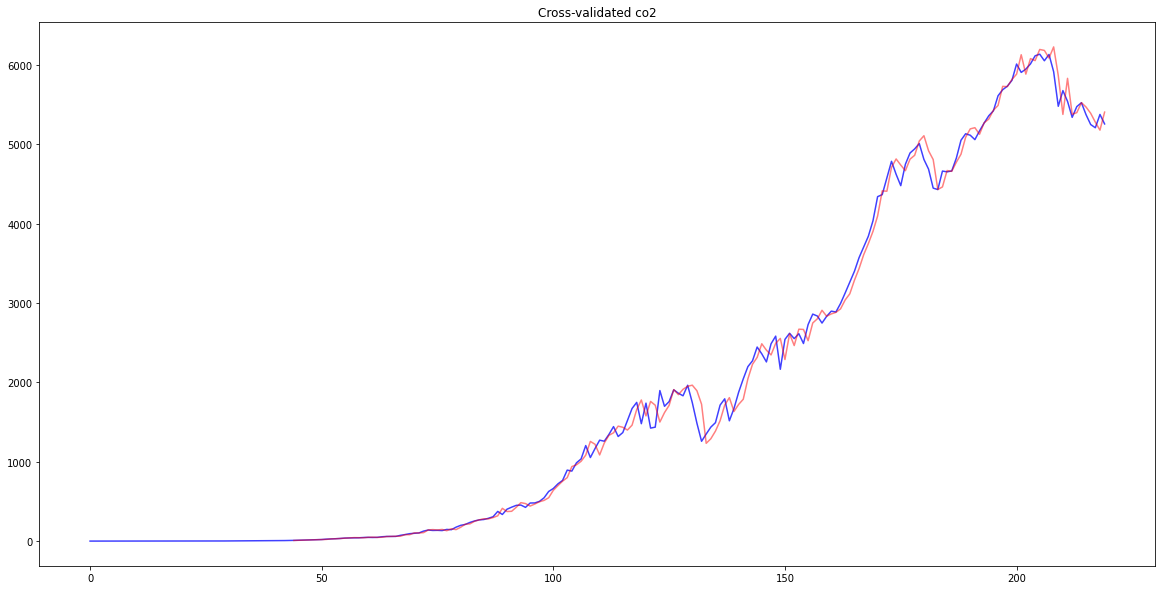

model-usa-consumption_co2.pkl COMPLETED
PLOTTING consumption_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


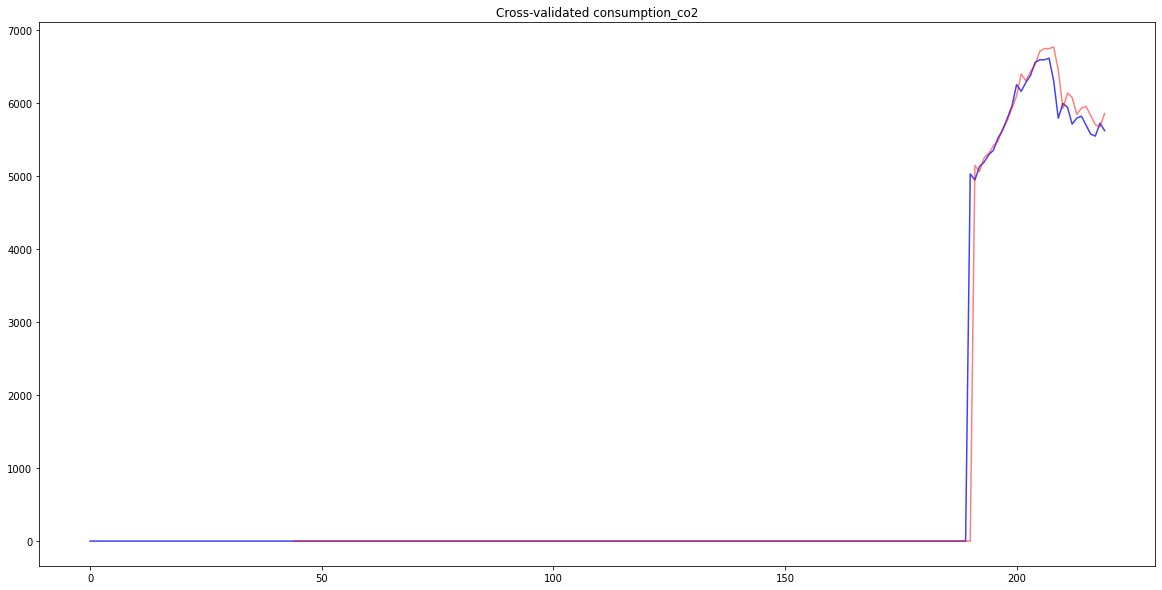

model-usa-trade_co2.pkl COMPLETED
PLOTTING trade_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


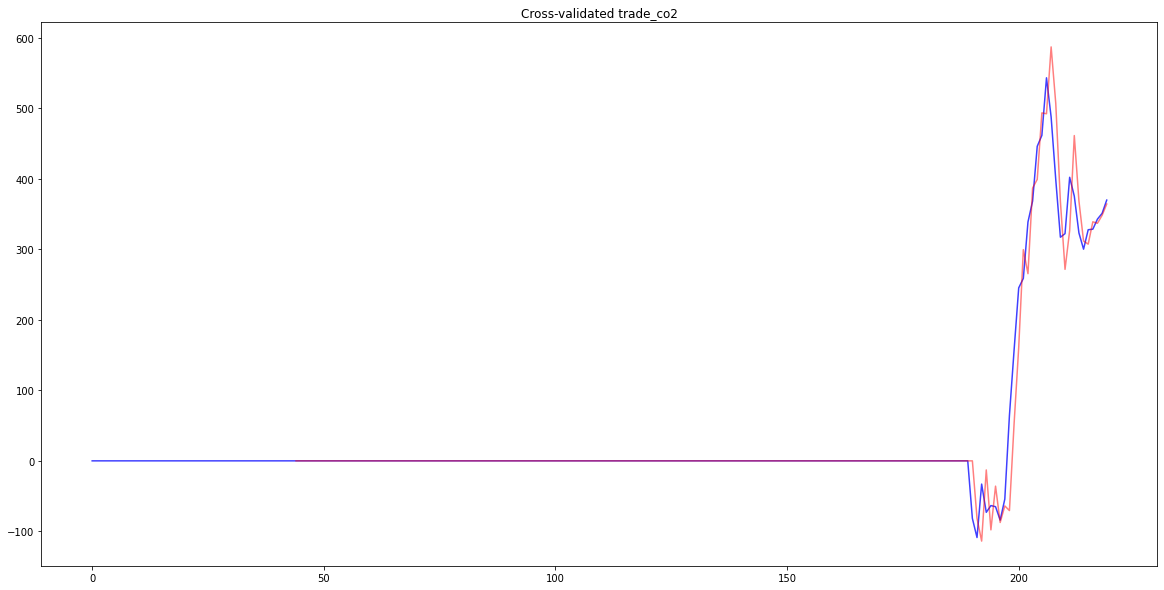

model-usa-co2_per_unit_energy.pkl COMPLETED
PLOTTING co2_per_unit_energy
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


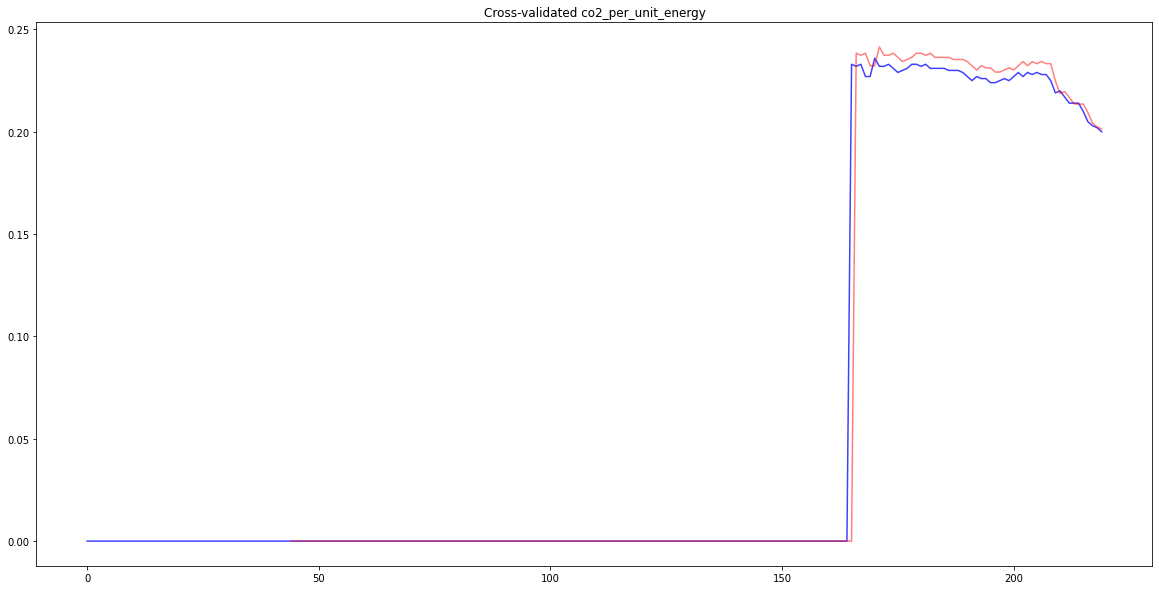

model-usa-coal_co2.pkl COMPLETED
PLOTTING coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


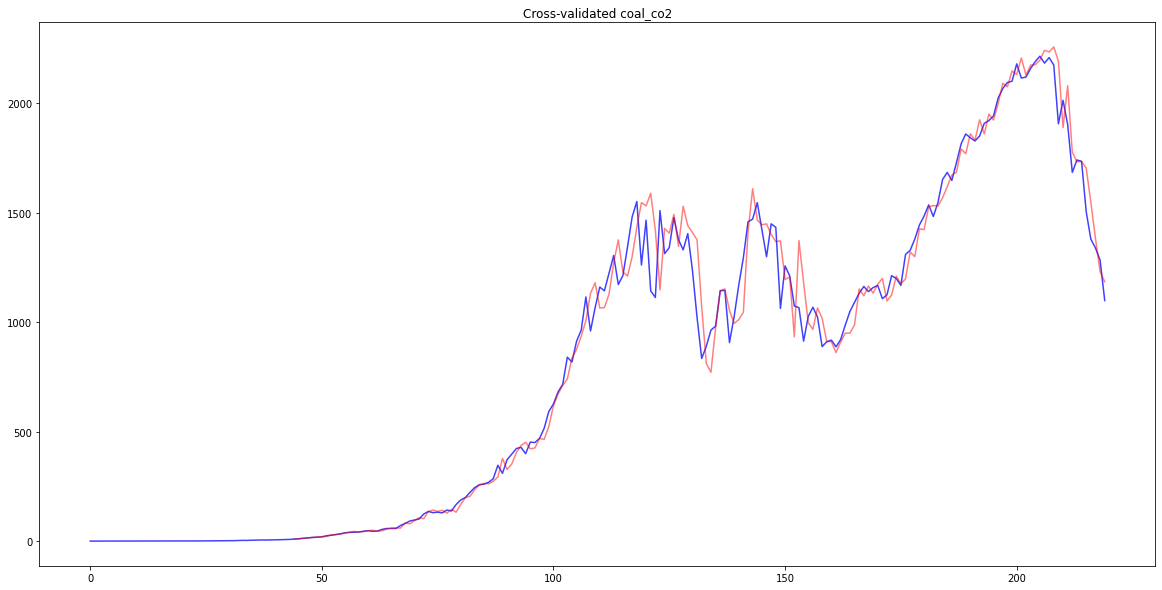

model-usa-cement_co2.pkl COMPLETED
PLOTTING cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


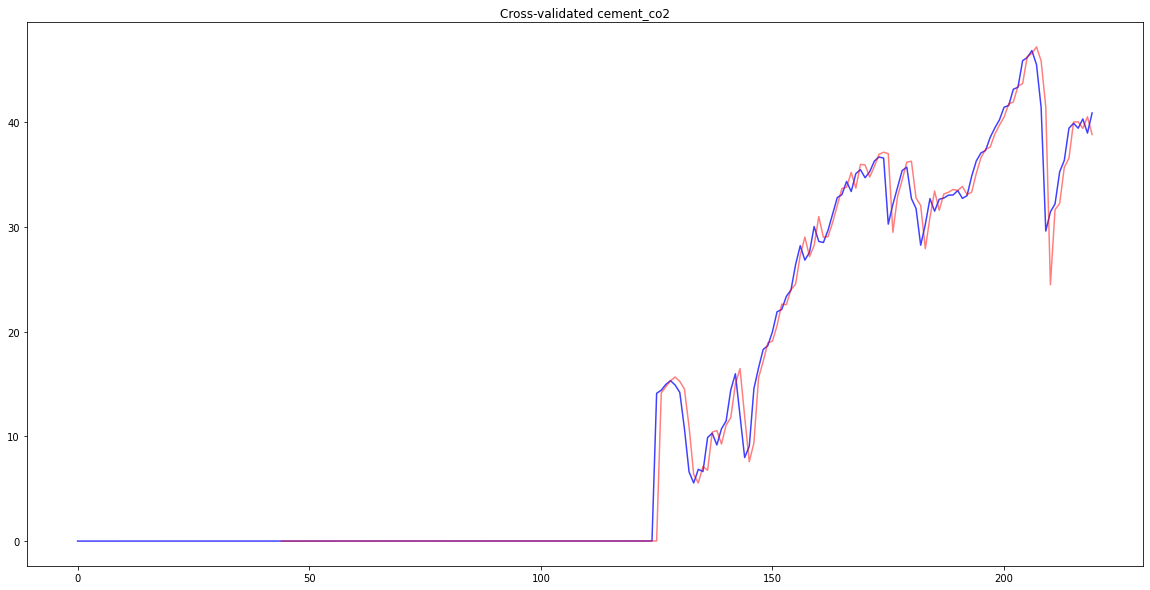

model-usa-flaring_co2.pkl COMPLETED
PLOTTING flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


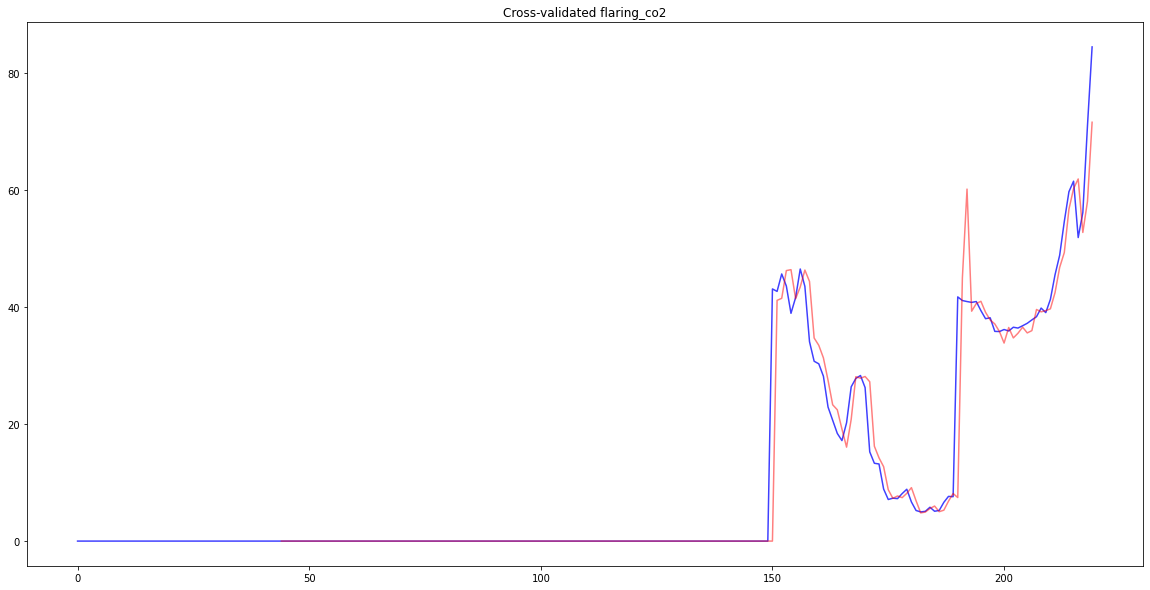

model-usa-gas_co2.pkl COMPLETED
PLOTTING gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


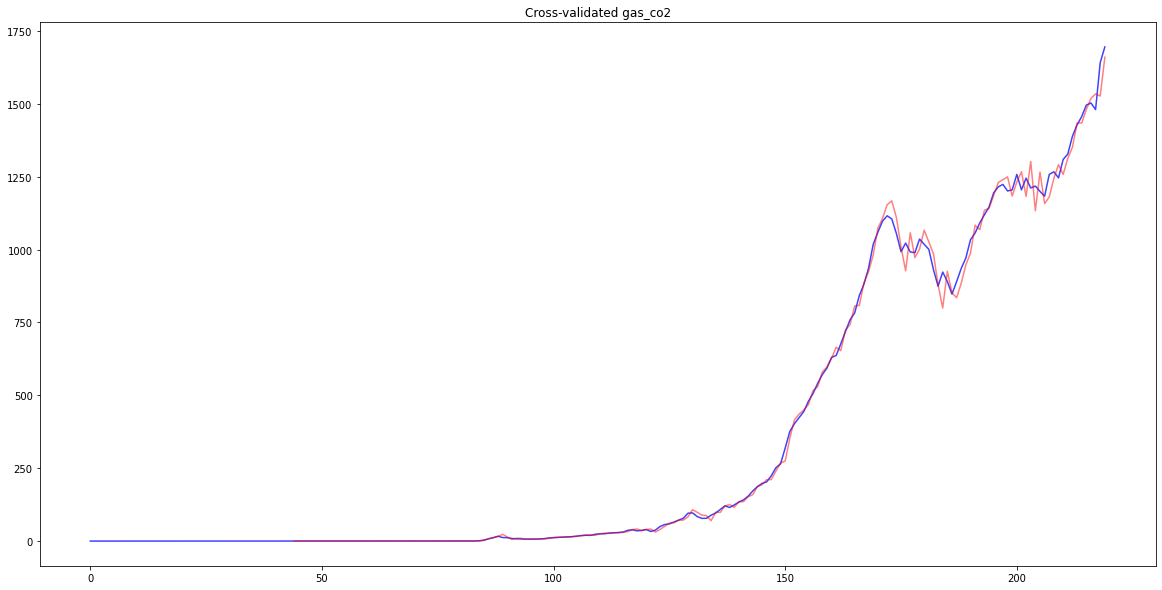

model-usa-oil_co2.pkl COMPLETED
PLOTTING oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


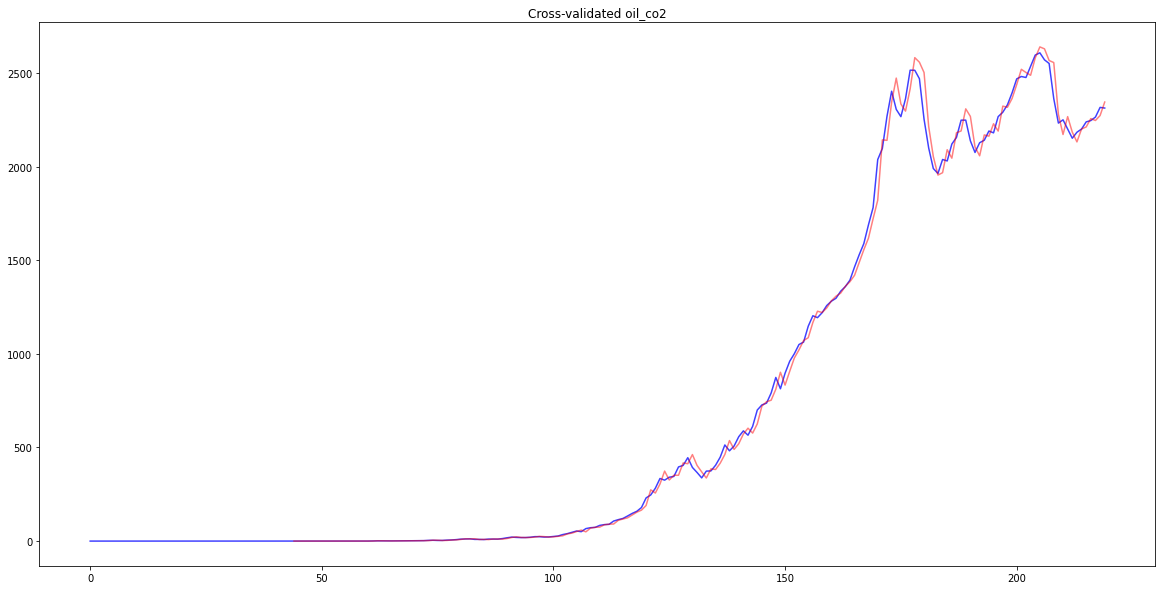

model-usa-other_industry_co2.pkl COMPLETED
PLOTTING other_industry_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


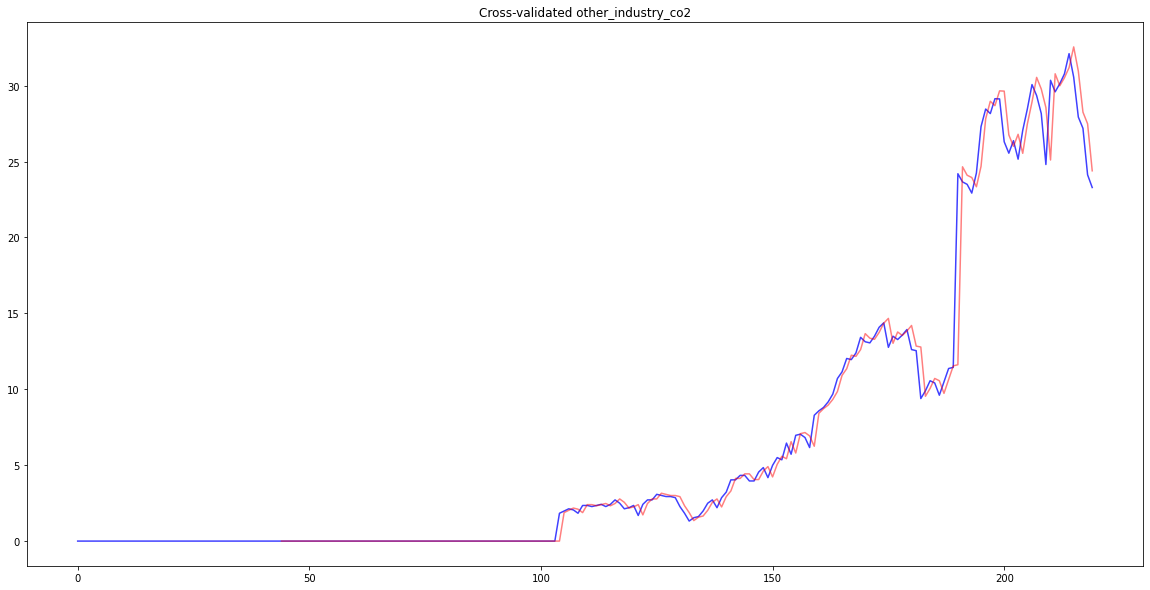

model-usa-total_ghg.pkl COMPLETED
PLOTTING total_ghg
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


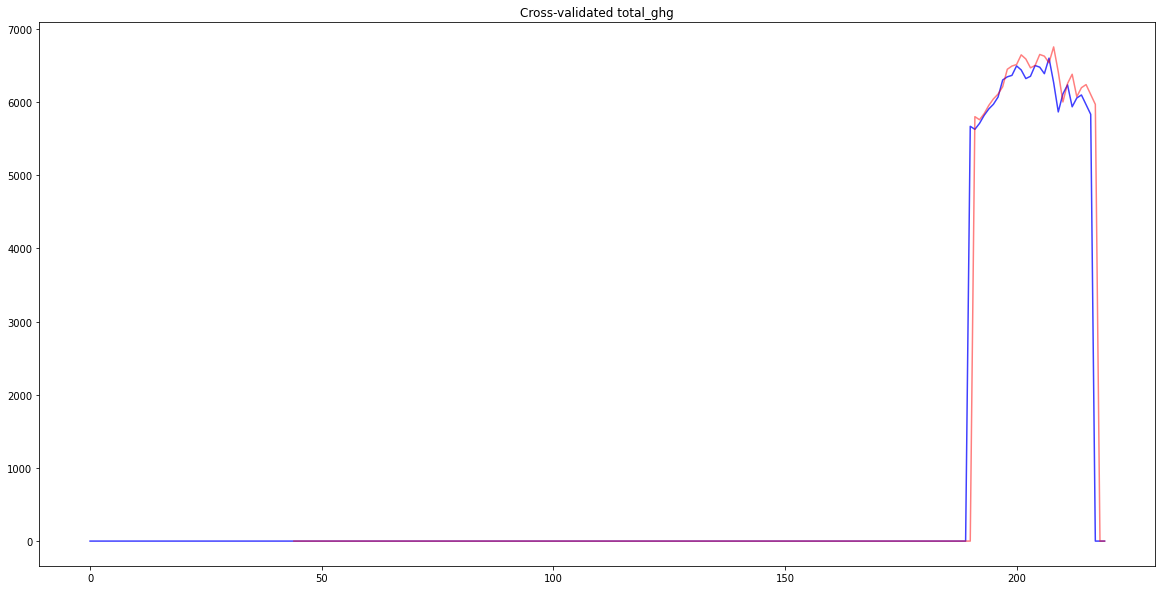

model-usa-methane.pkl COMPLETED
PLOTTING methane
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


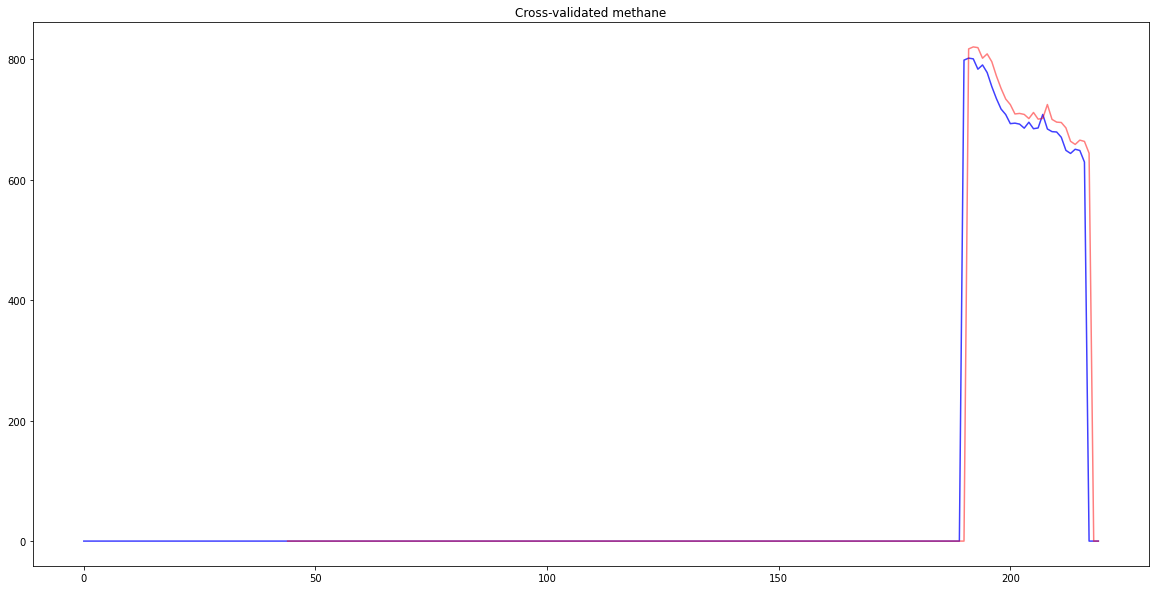

model-usa-nitrous_oxide.pkl COMPLETED
PLOTTING nitrous_oxide
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


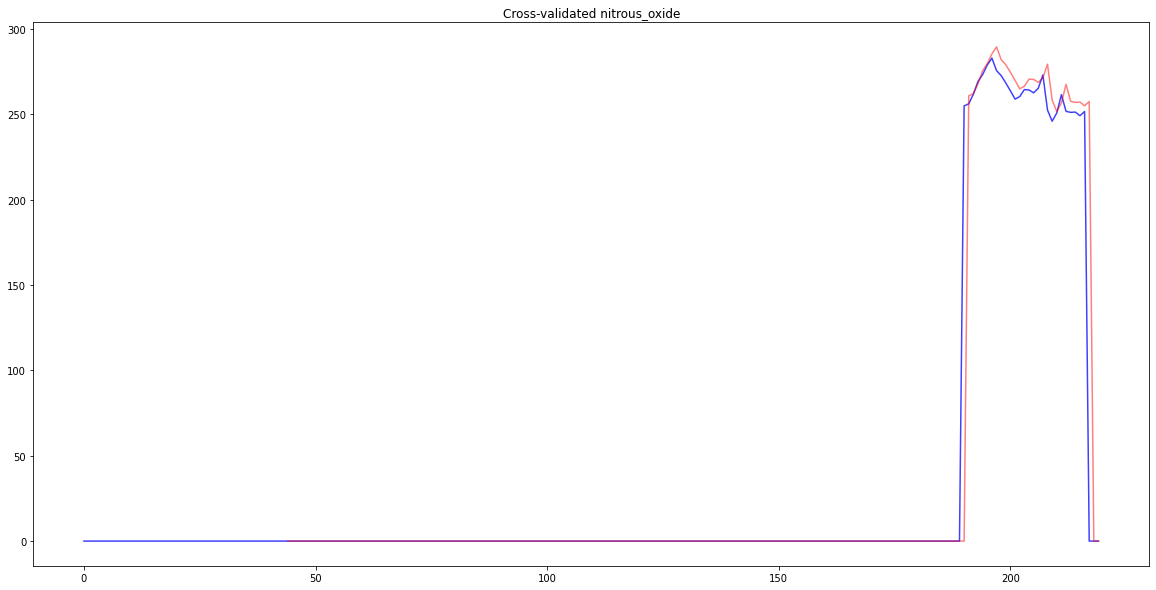

model-usa-population.pkl COMPLETED
NOT ploting population
model-usa-gdp.pkl COMPLETED
PLOTTING gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


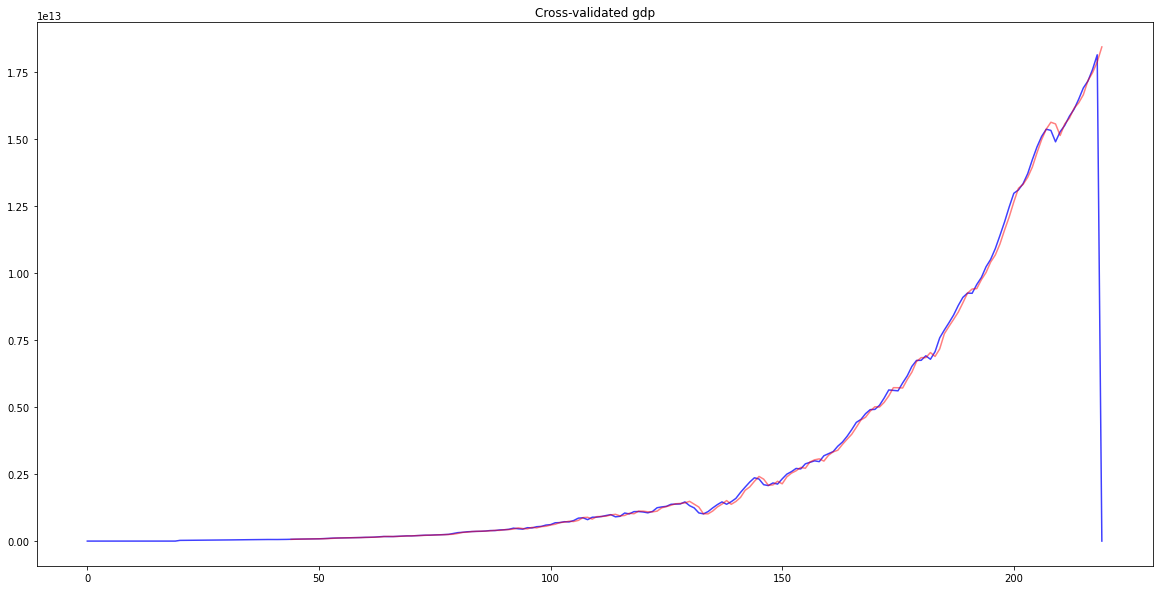

model-usa-primary_energy_consumption.pkl COMPLETED
PLOTTING primary_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


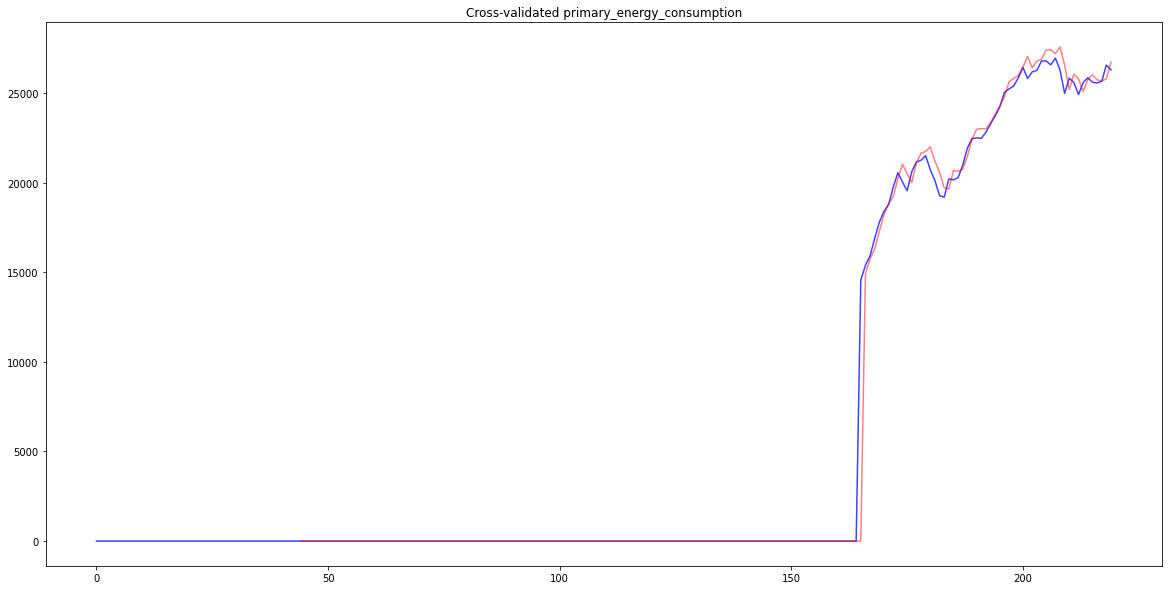

model-usa-un_population.pkl COMPLETED
PLOTTING un_population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


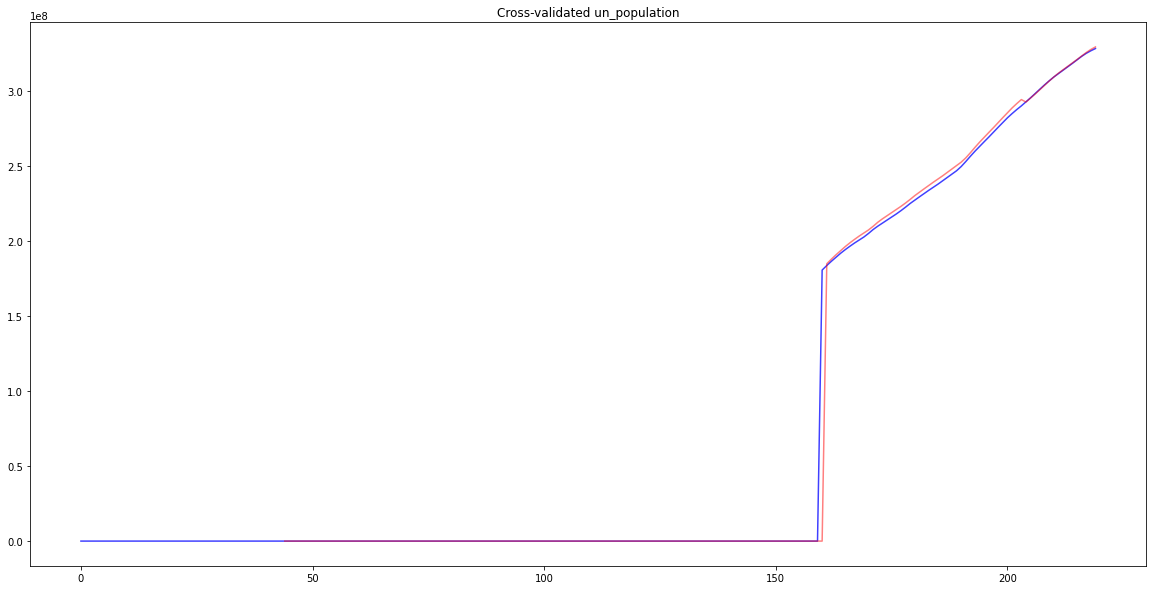

model-usa-current_gdp.pkl COMPLETED
PLOTTING current_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


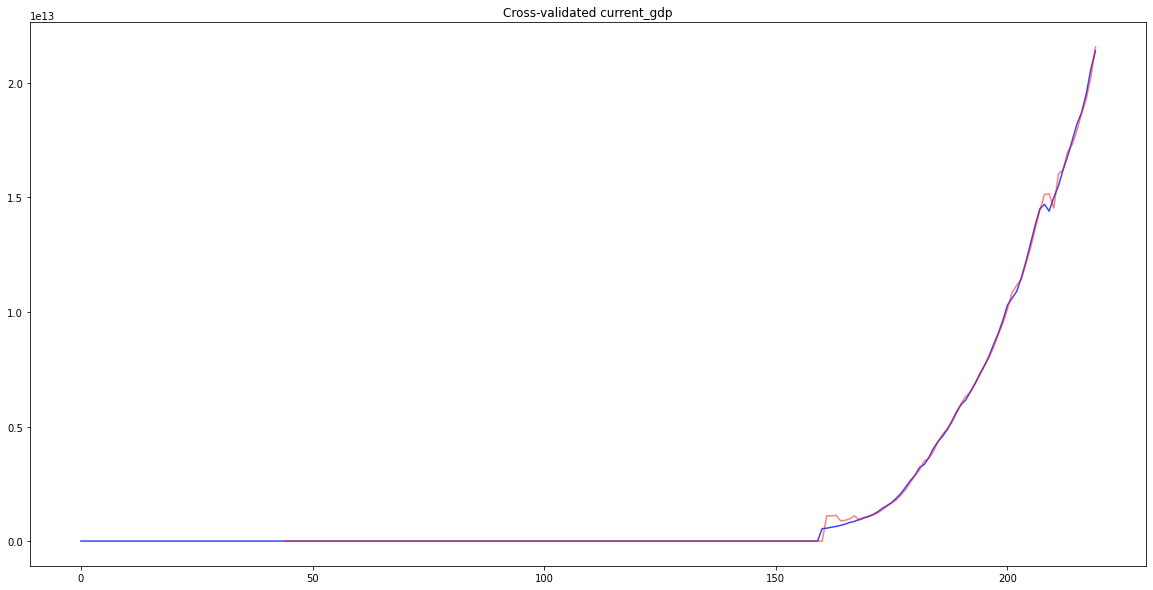

model-usa-constant_gdp.pkl COMPLETED
PLOTTING constant_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


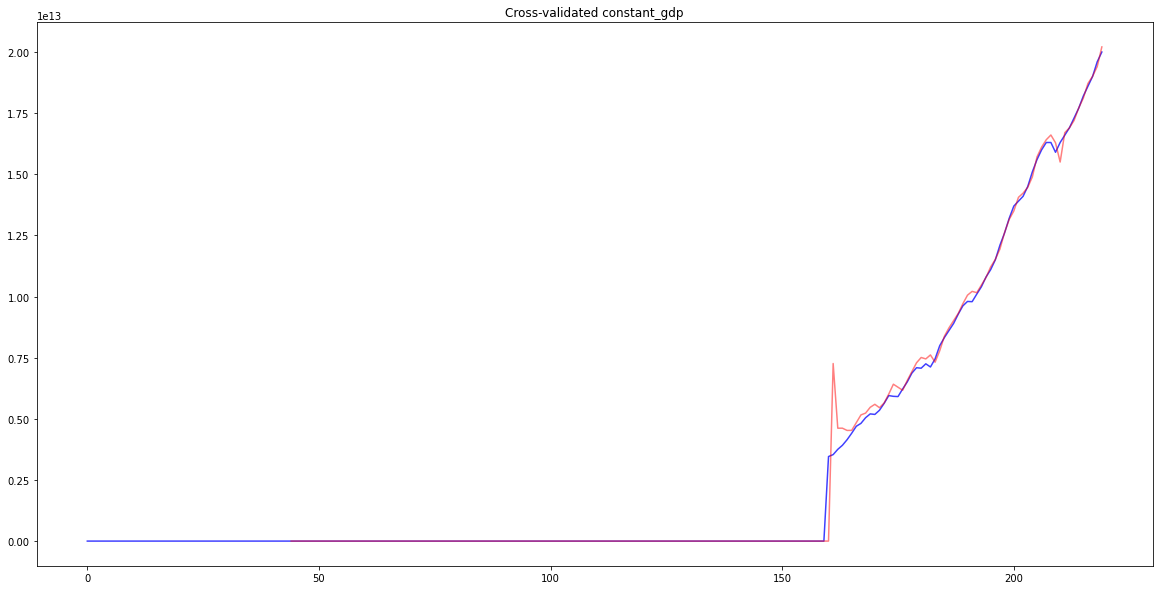

model-usa-manufacturing_gdp.pkl COMPLETED
PLOTTING manufacturing_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


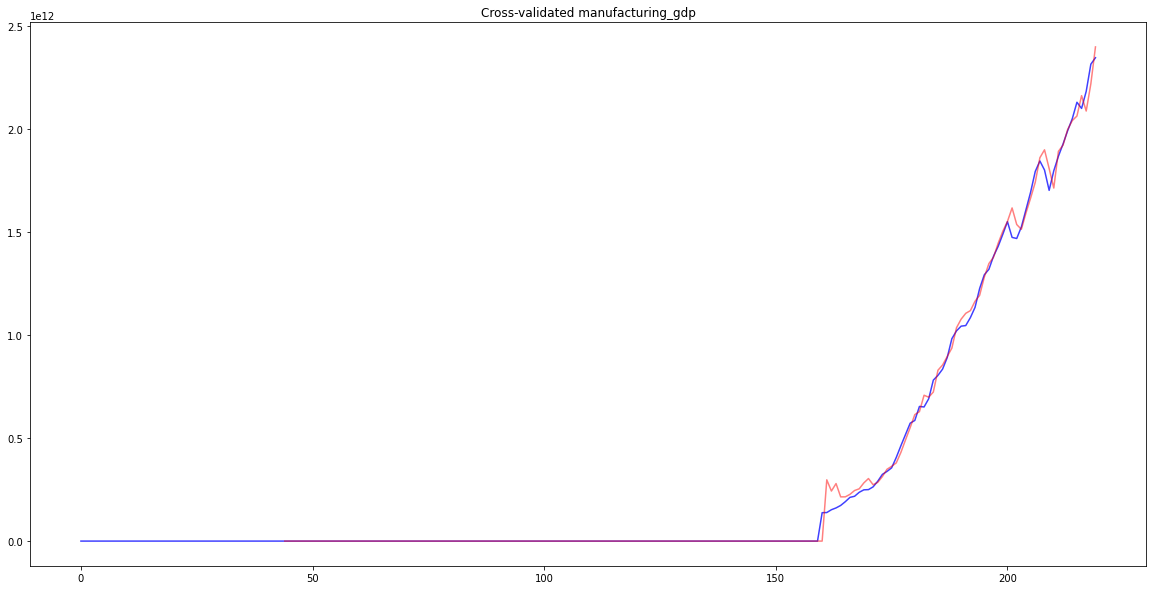

model-usa-medium_to_high_tech_percent.pkl COMPLETED
PLOTTING medium_to_high_tech_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


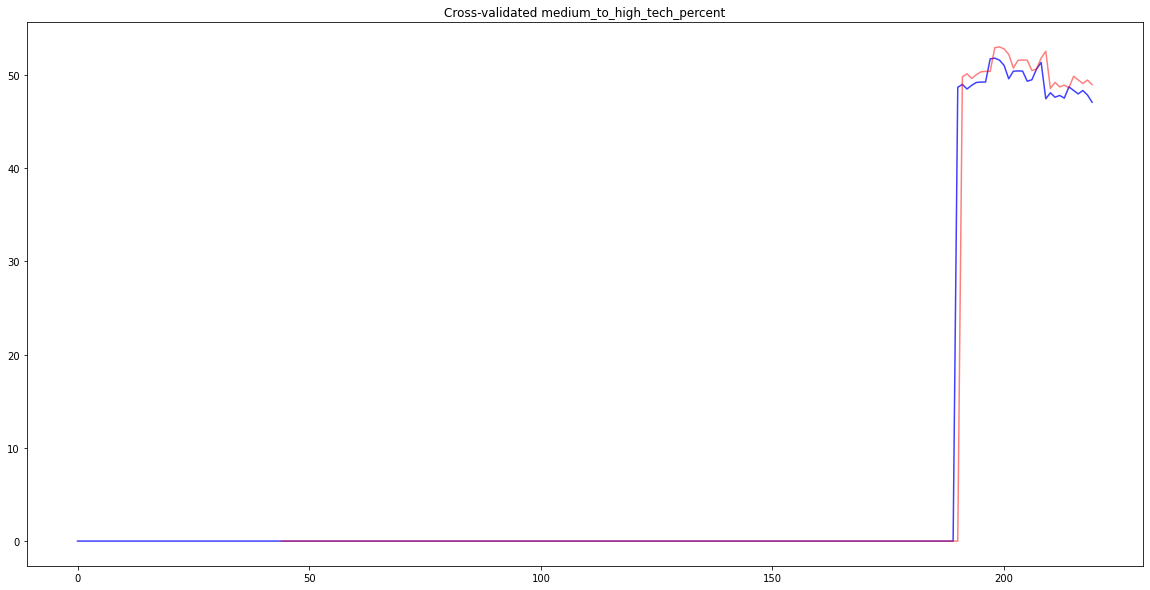

model-usa-export.pkl COMPLETED
PLOTTING export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


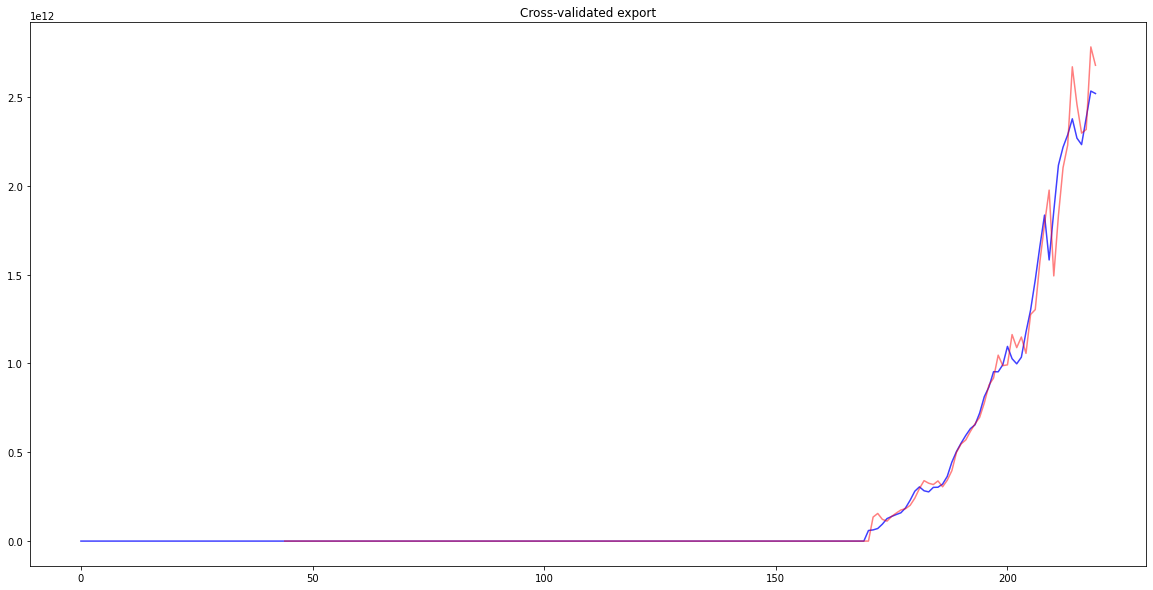

model-usa-import.pkl COMPLETED
PLOTTING import
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


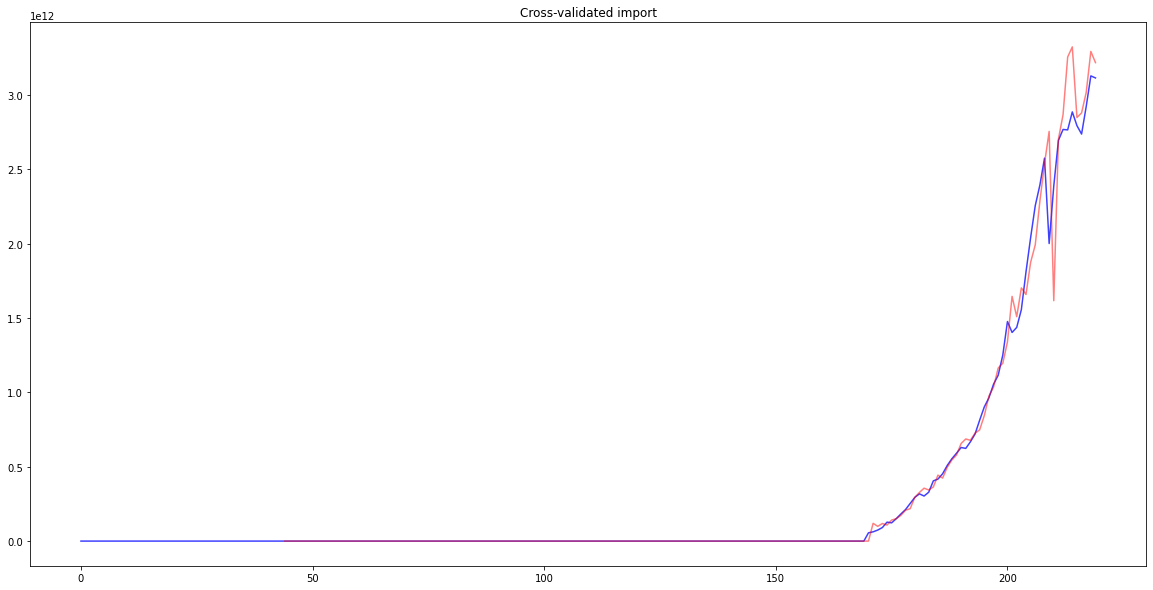

model-usa-urban_population_percent.pkl COMPLETED
PLOTTING urban_population_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


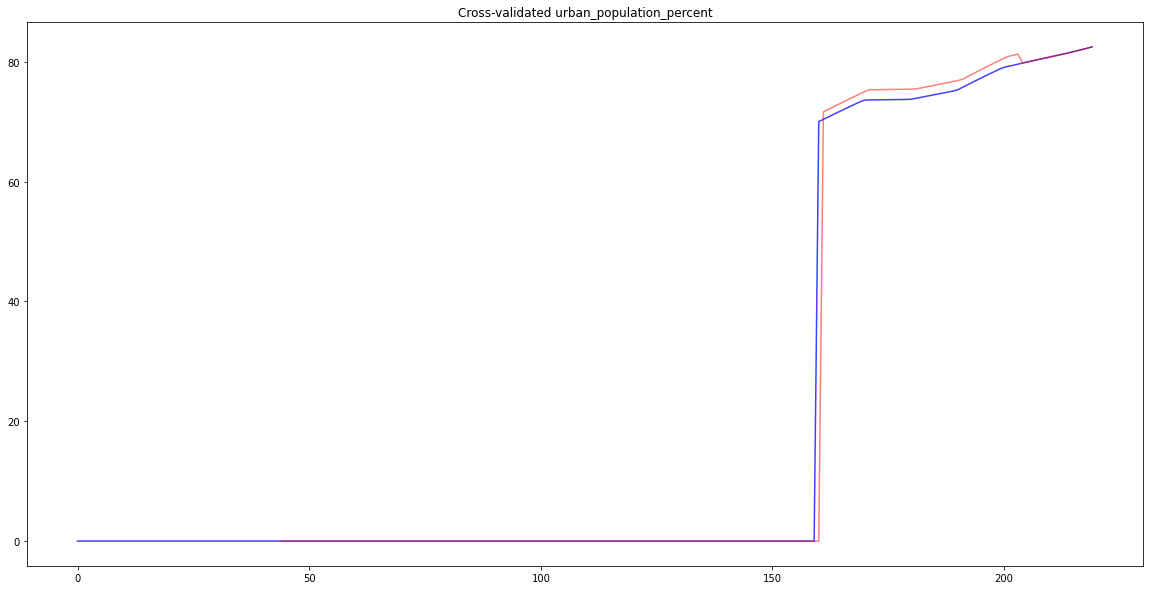

model-usa-merchandise_export.pkl COMPLETED
PLOTTING merchandise_export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


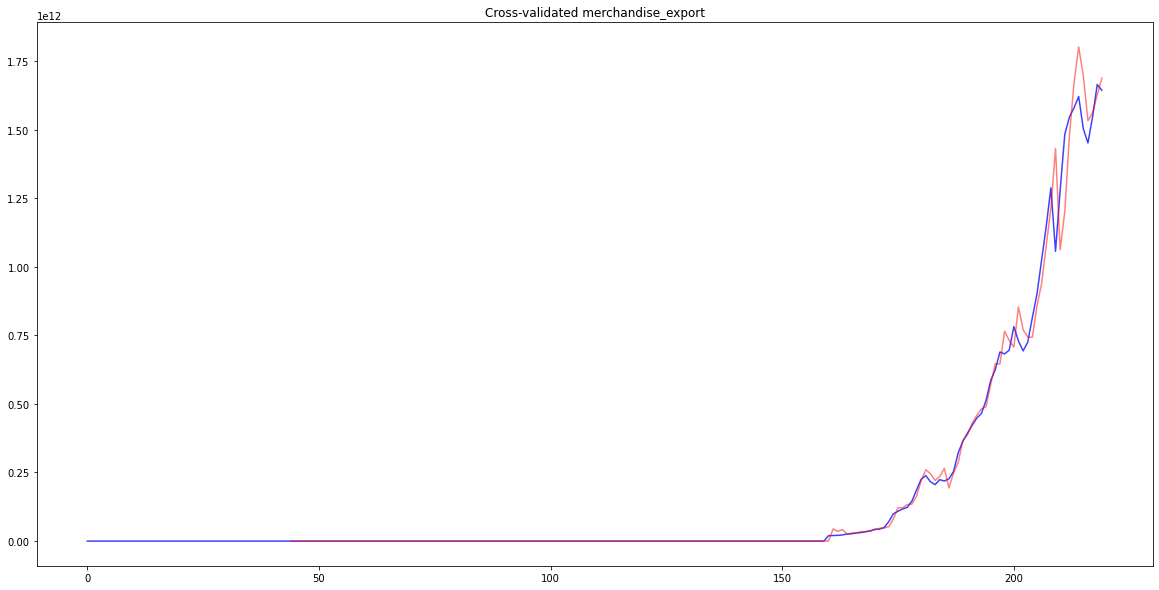

model-usa-merchandise_import.pkl COMPLETED
PLOTTING merchandise_import
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


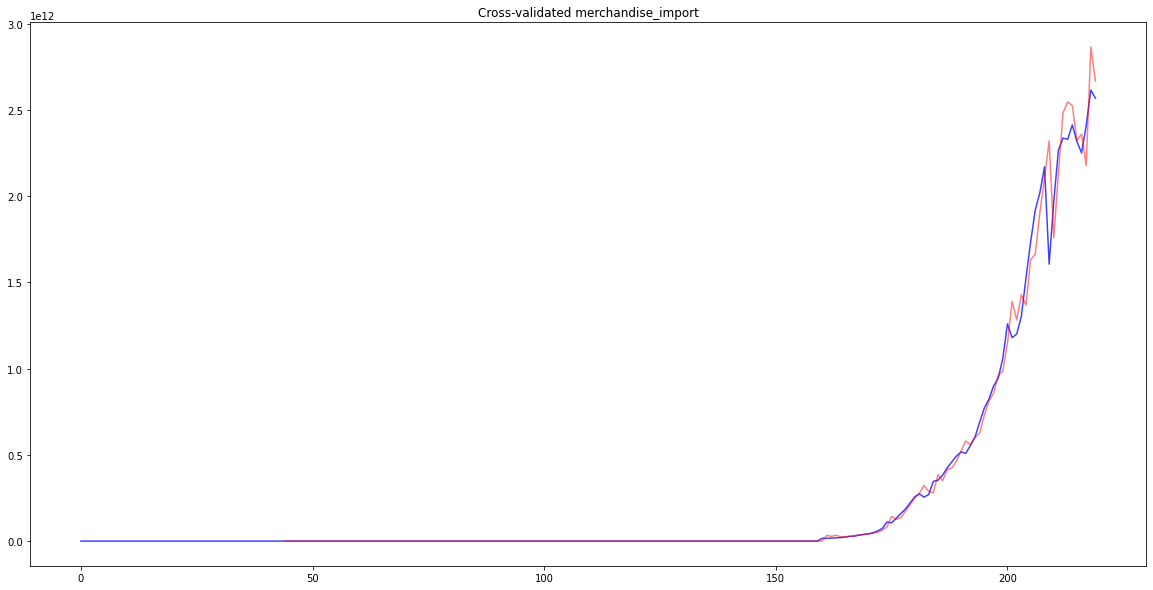

model-usa-manufacturer_export_share.pkl COMPLETED
PLOTTING manufacturer_export_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


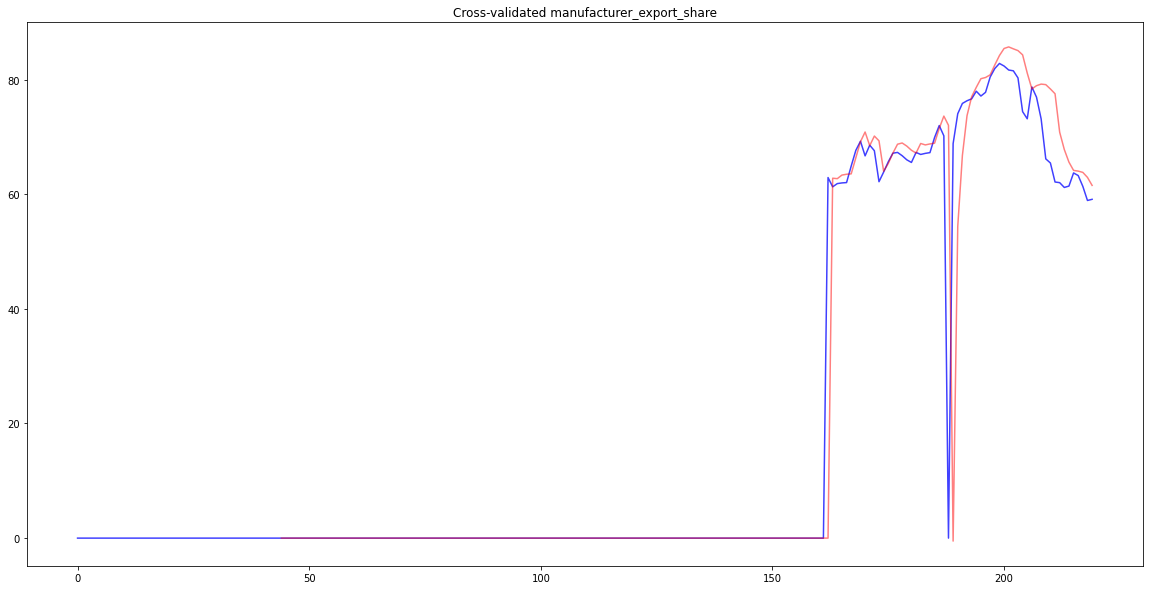

model-usa-manufacturer_export.pkl COMPLETED
PLOTTING manufacturer_export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


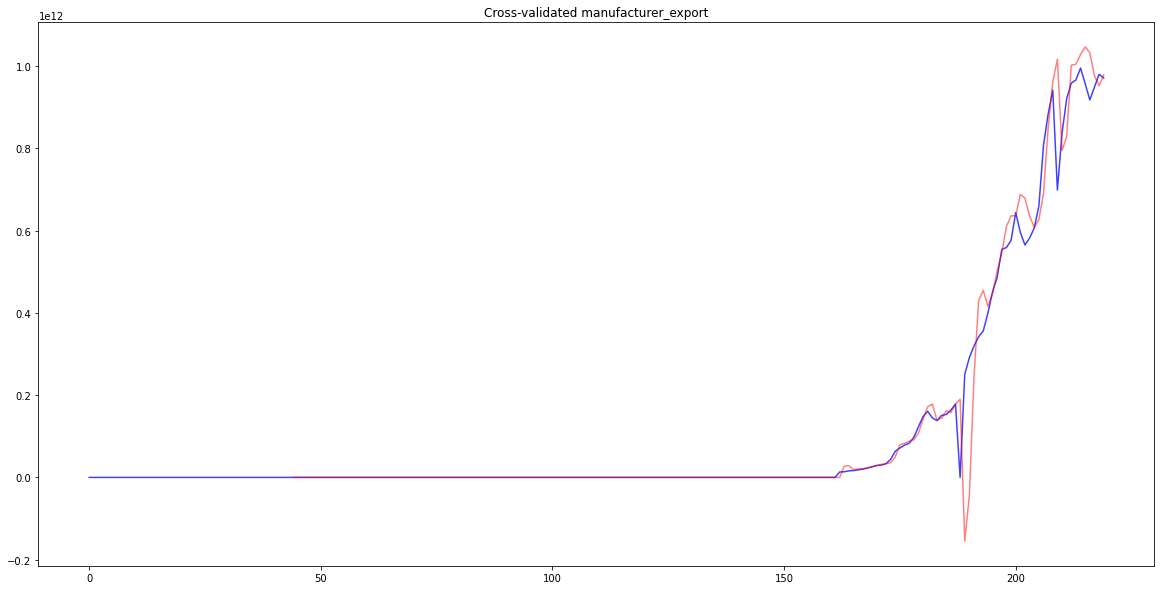

model-usa-co2_emission_electricity.pkl COMPLETED
PLOTTING co2_emission_electricity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


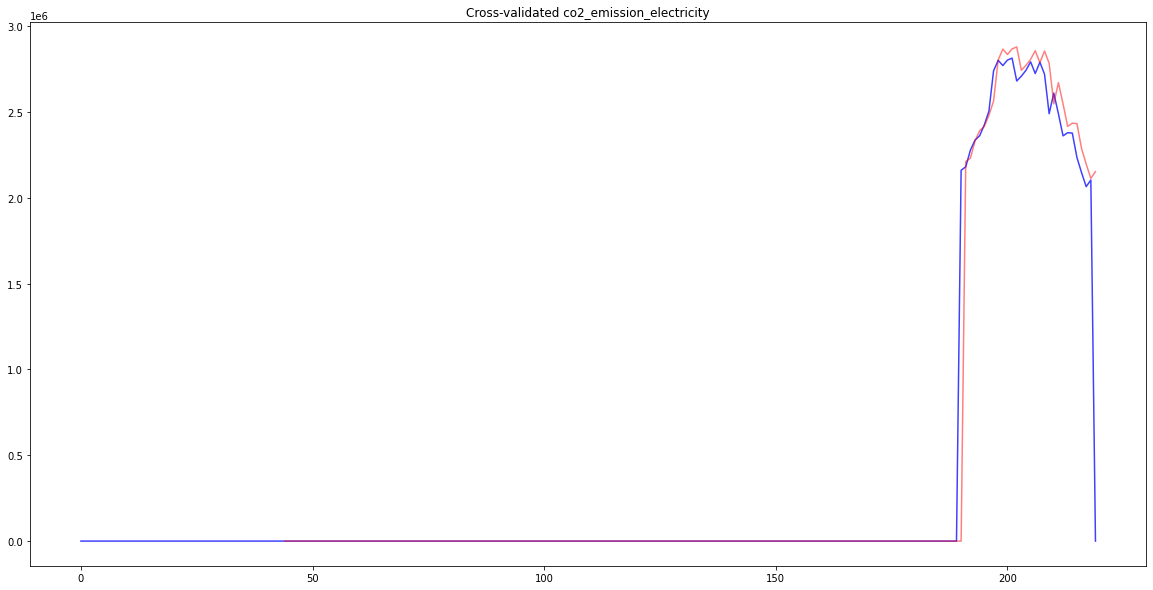

model-usa-co2_emission_building.pkl COMPLETED
PLOTTING co2_emission_building
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


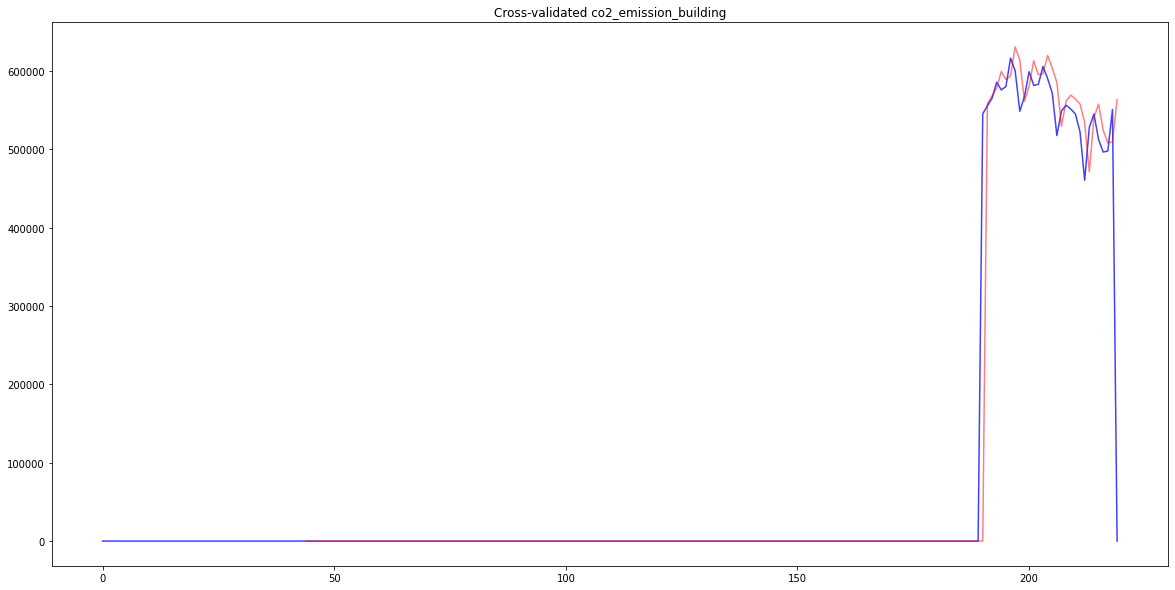

model-usa-co2_emission_manufacturing.pkl COMPLETED
PLOTTING co2_emission_manufacturing
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


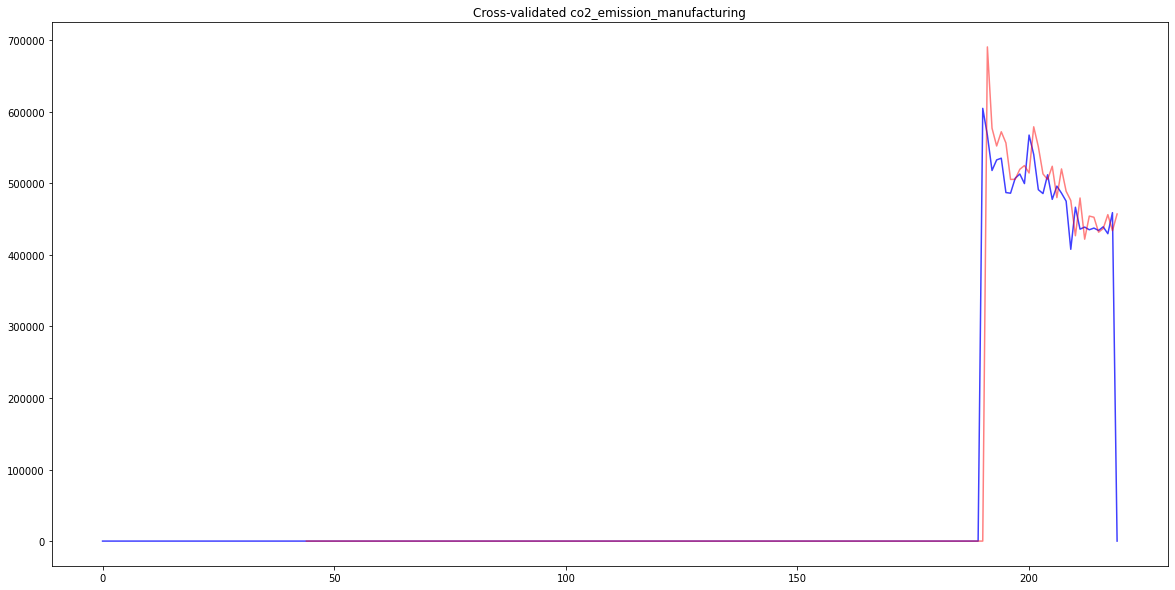

model-usa-co2_emission_other_fuel.pkl COMPLETED
PLOTTING co2_emission_other_fuel
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


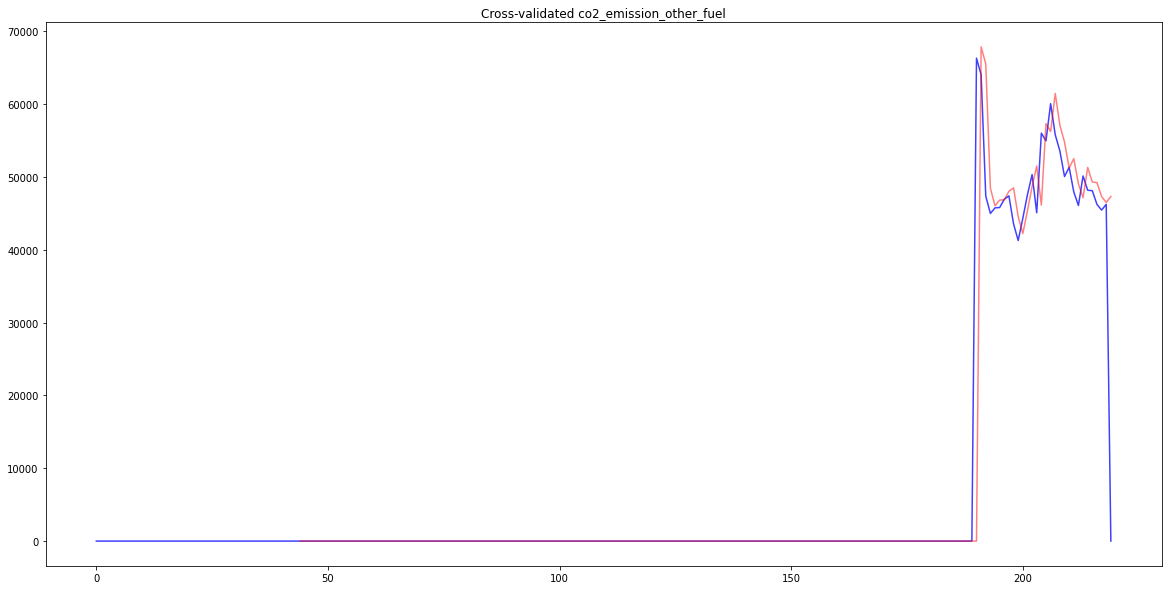

model-usa-co2_emission_fugitive.pkl COMPLETED
PLOTTING co2_emission_fugitive
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


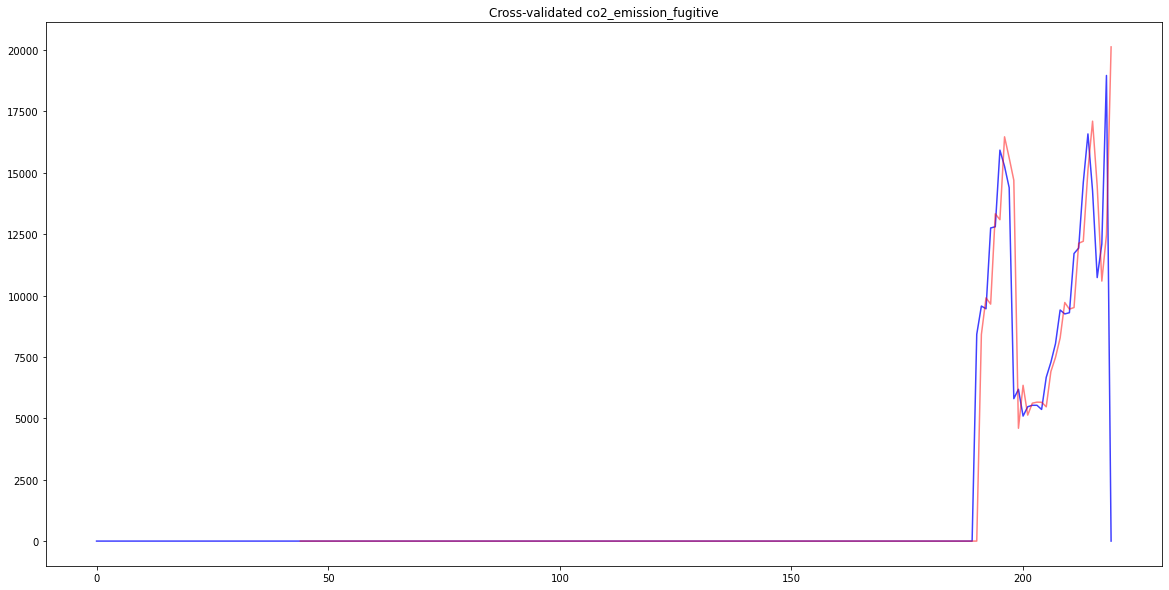

model-usa-co2_emission_transport.pkl COMPLETED
PLOTTING co2_emission_transport
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


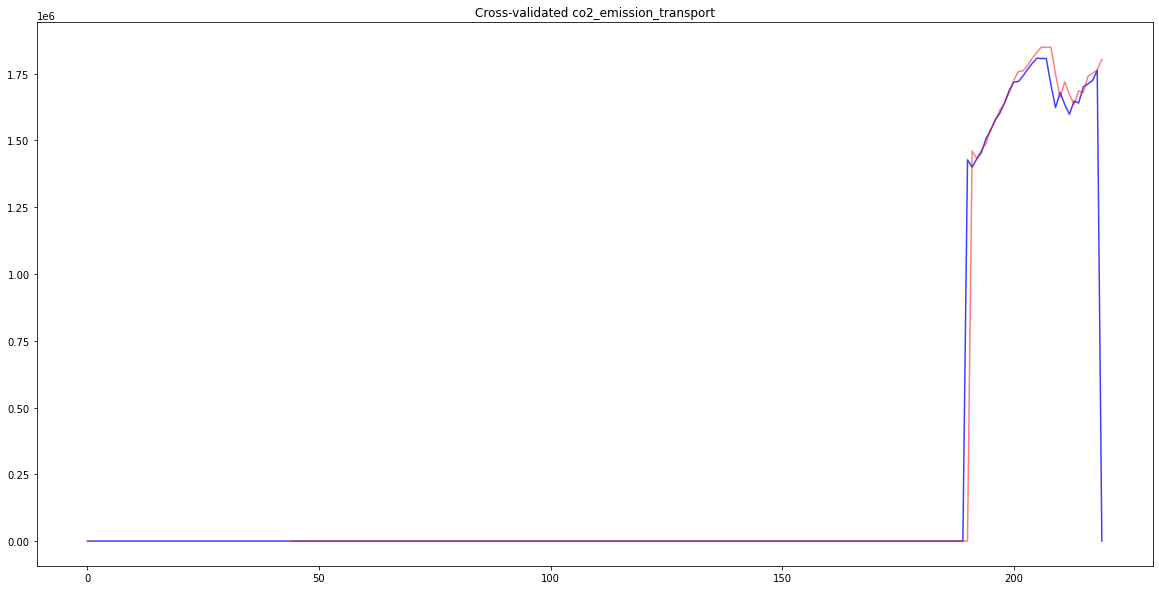

model-usa-co2_emission_energy_subtotal.pkl COMPLETED
PLOTTING co2_emission_energy_subtotal
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


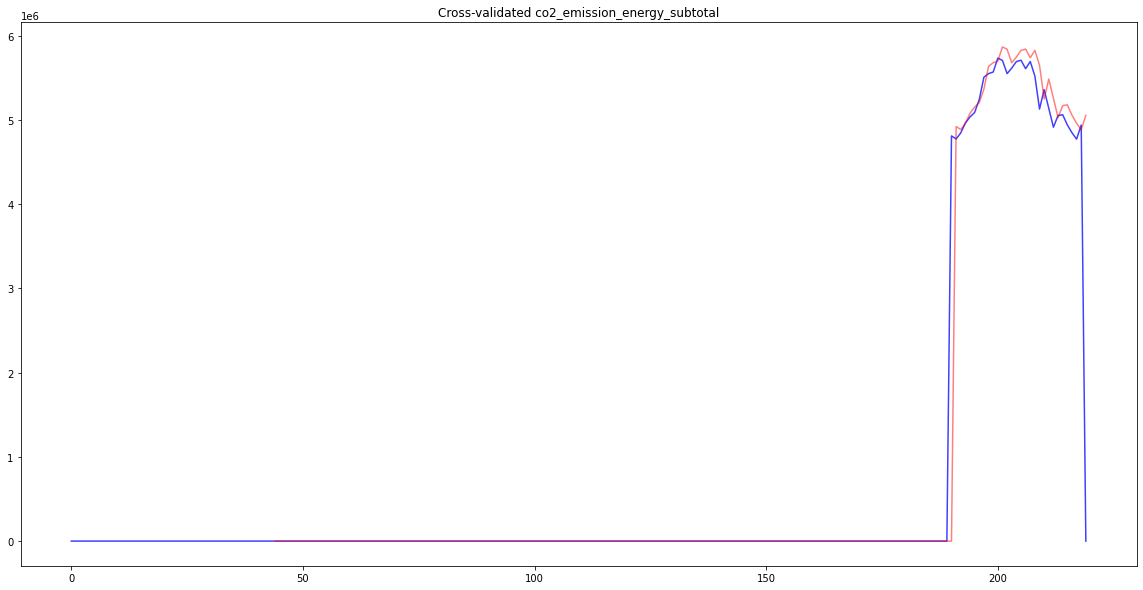

model-usa-co2_emission_bunkers.pkl COMPLETED
PLOTTING co2_emission_bunkers
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


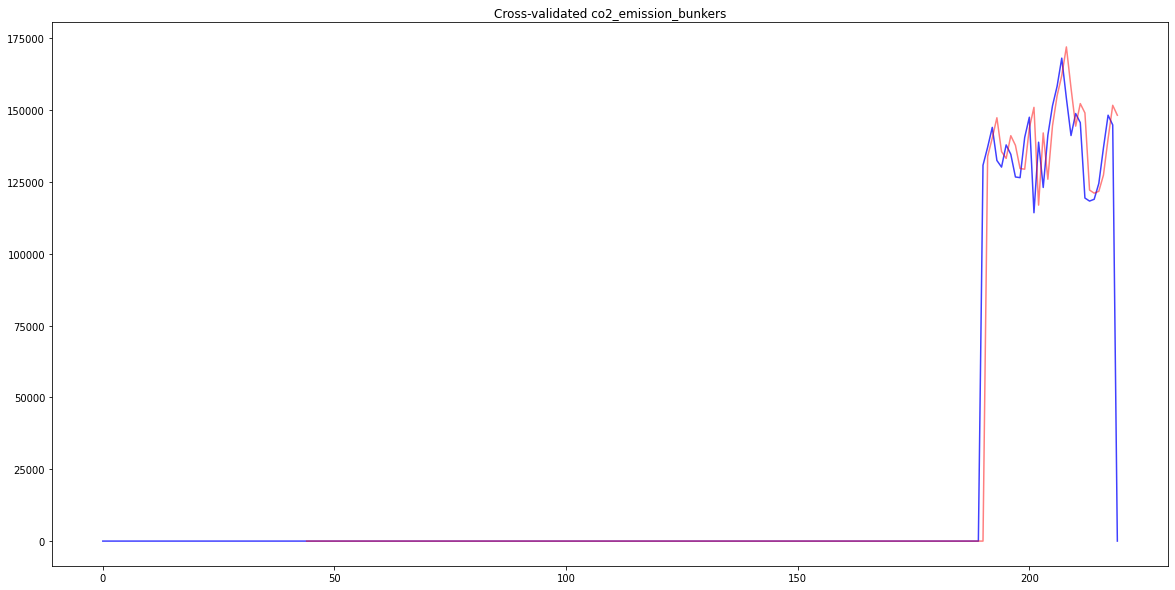

model-usa-co2_emission_industrial_process.pkl COMPLETED
PLOTTING co2_emission_industrial_process
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


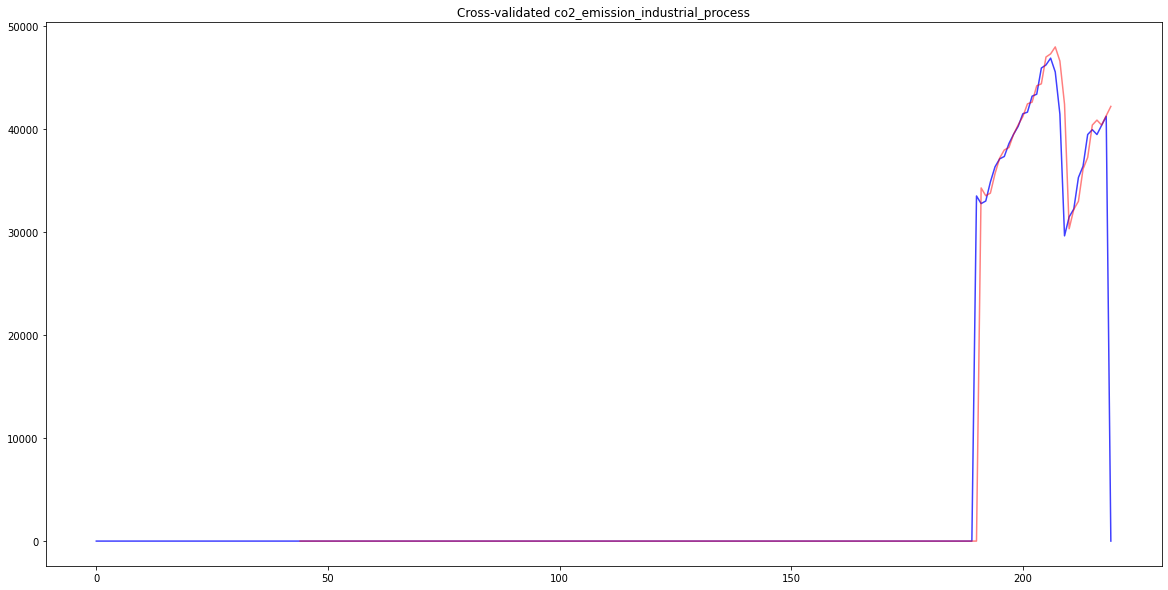

model-usa-manufacturing_percent.pkl COMPLETED
PLOTTING manufacturing_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


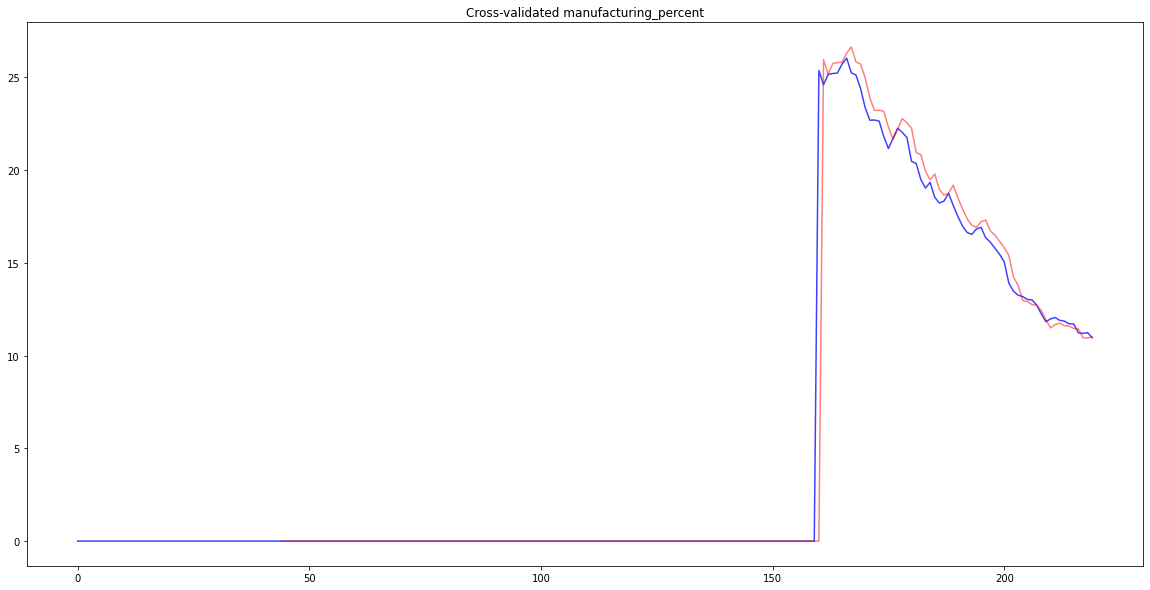

model-usa-medium_to_high_tech_gdp.pkl COMPLETED
PLOTTING medium_to_high_tech_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


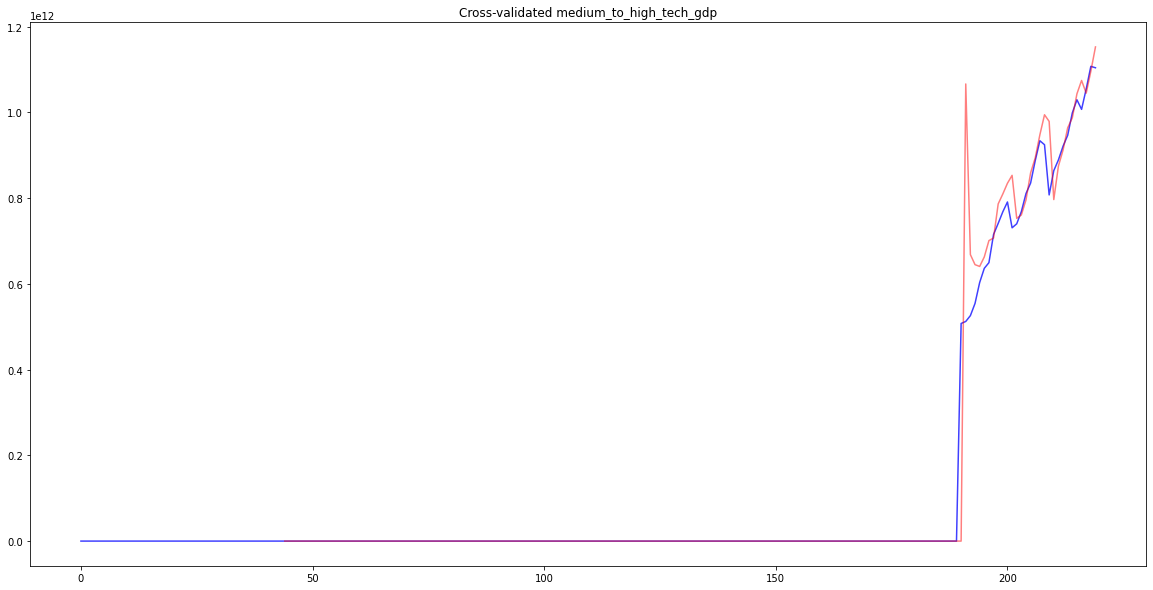

model-usa-trade_openness.pkl COMPLETED
PLOTTING trade_openness
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


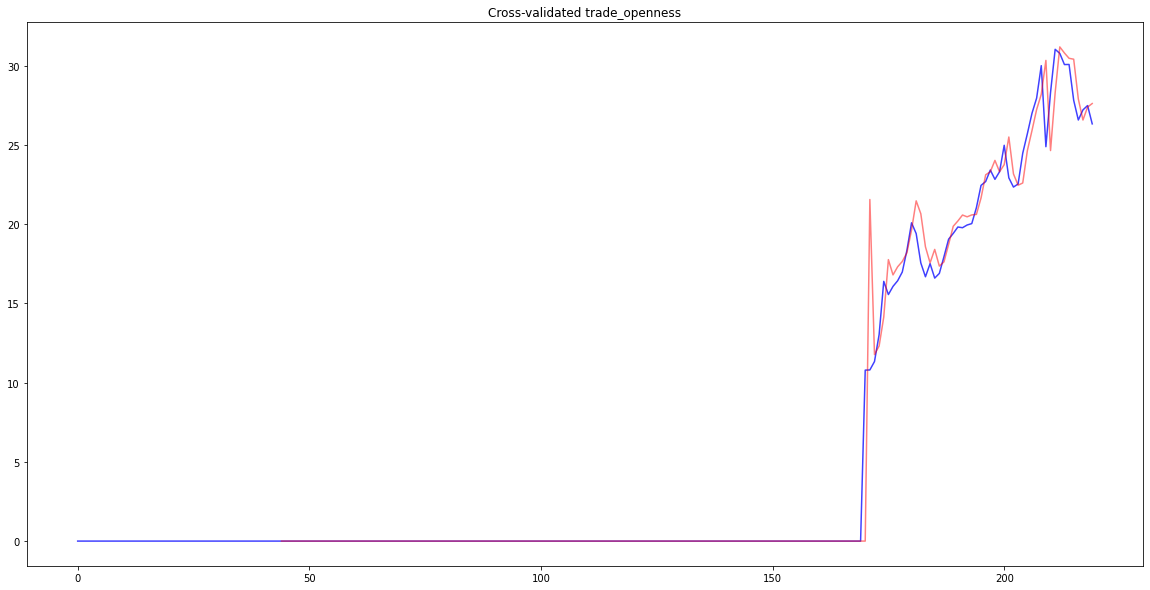

model-usa-share_of_merchandise_export.pkl COMPLETED
PLOTTING share_of_merchandise_export
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


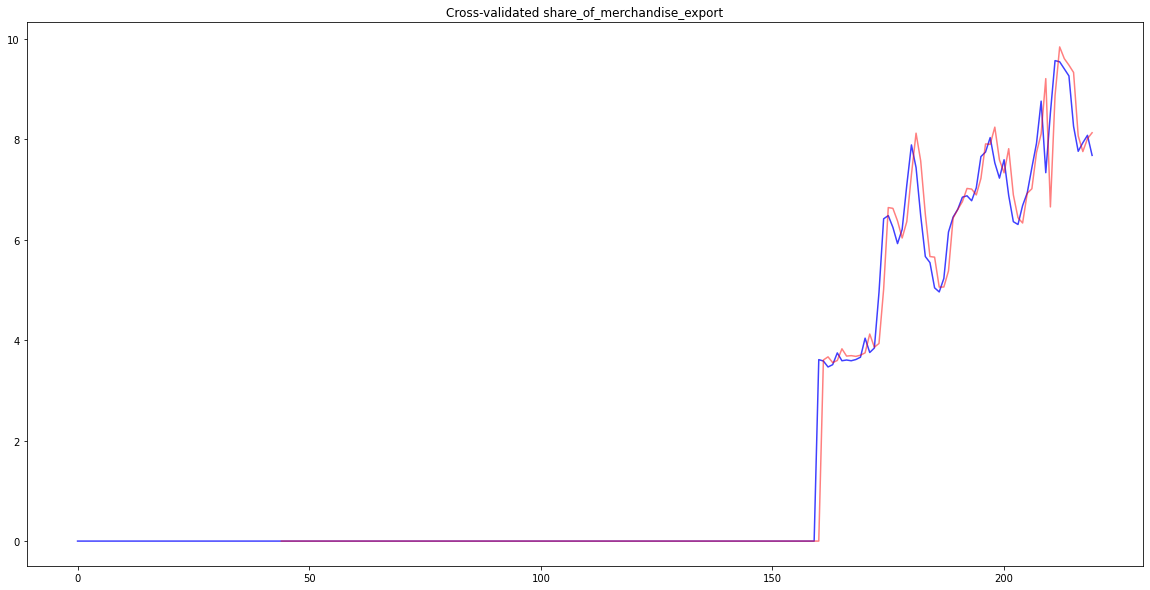

model-usa-share_of_merchandise_import.pkl COMPLETED
PLOTTING share_of_merchandise_import
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


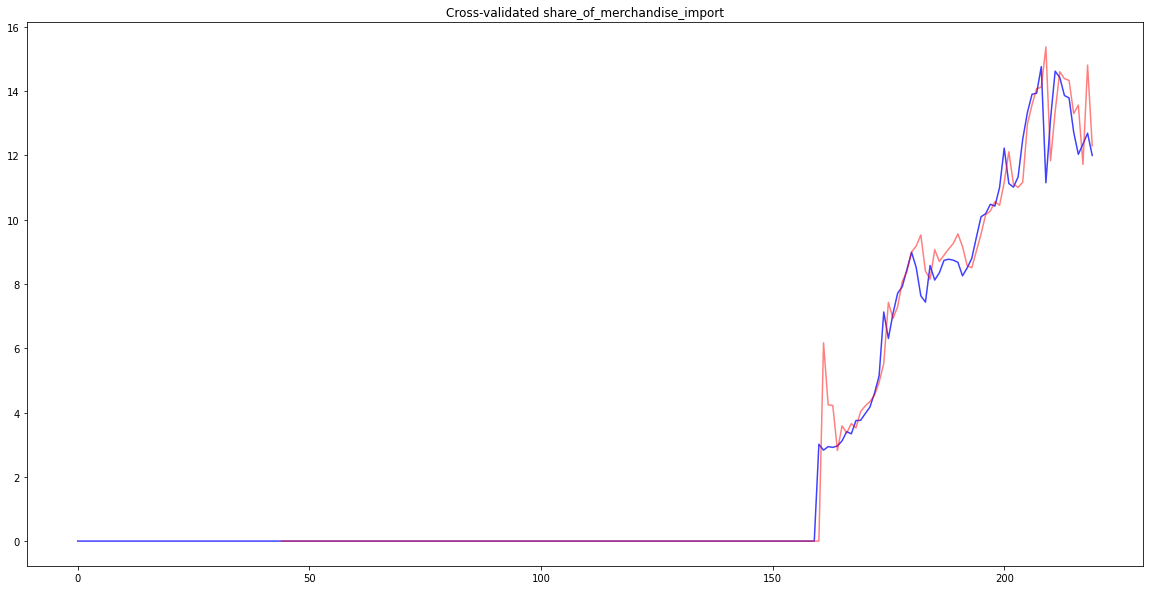

model-usa-industrial_gdp.pkl COMPLETED
PLOTTING industrial_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


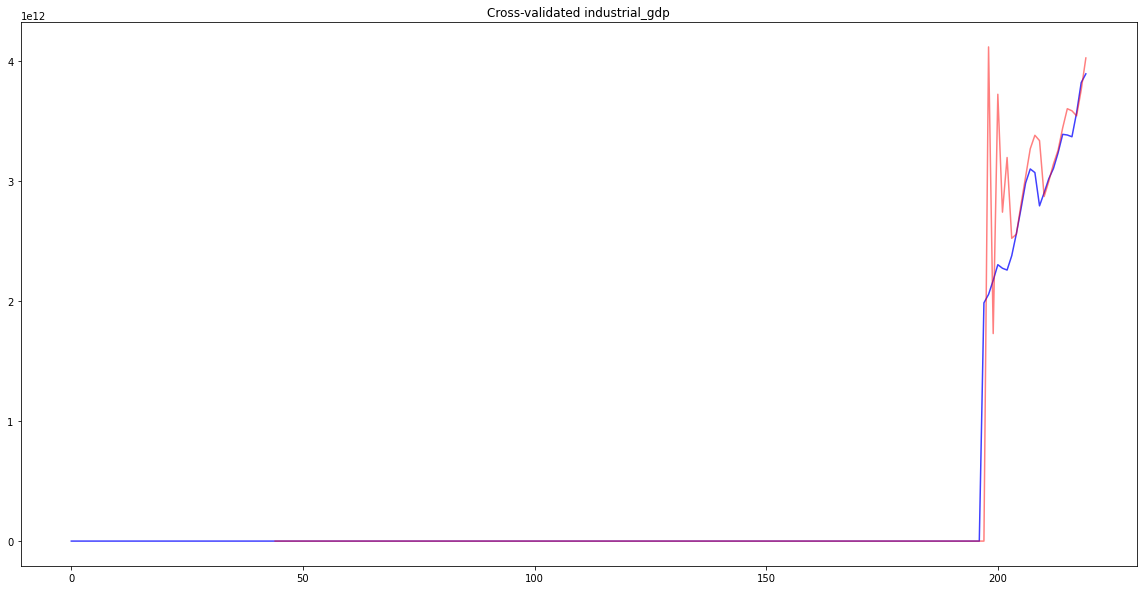

model-usa-iea_primary_energy_consumption.pkl COMPLETED
PLOTTING iea_primary_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


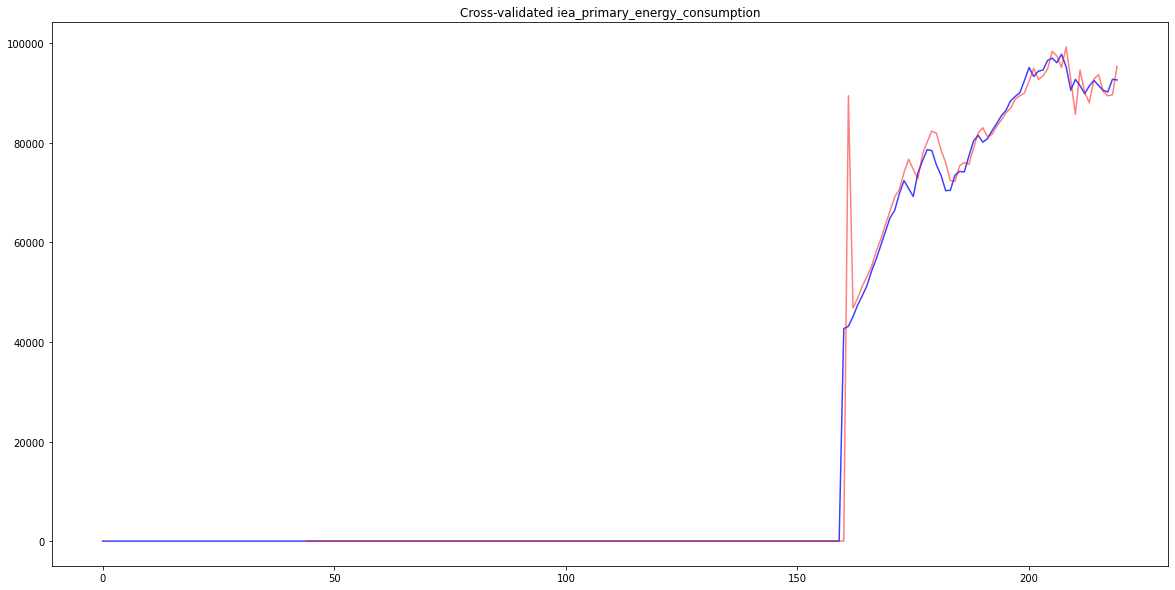

model-usa-renewable_energy_consumption.pkl COMPLETED
PLOTTING renewable_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


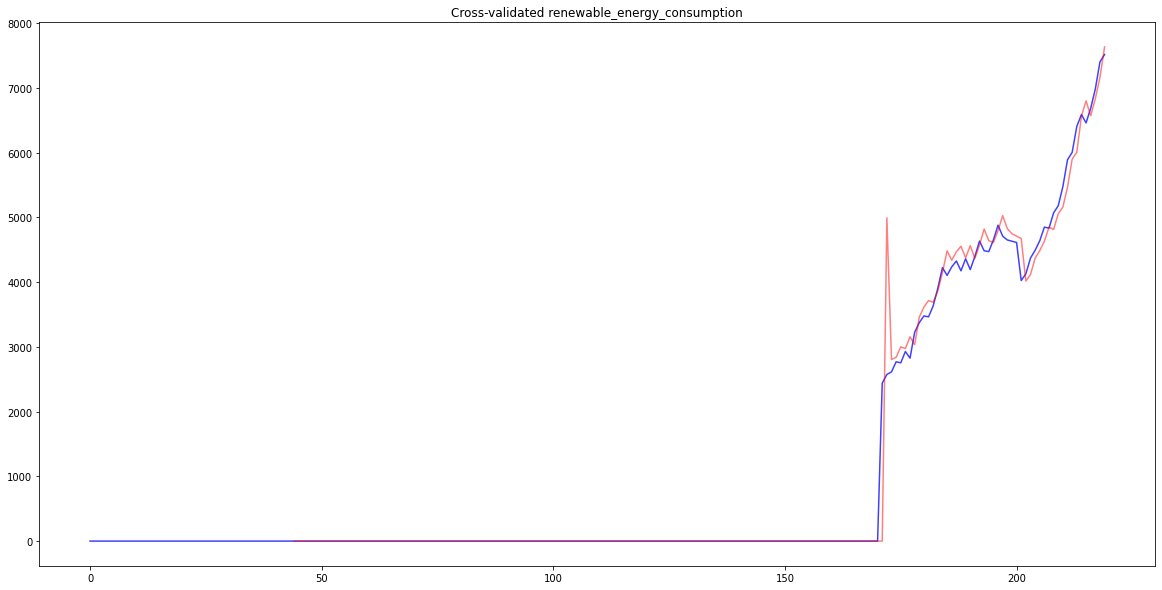

model-usa-coal_consumption.pkl COMPLETED
PLOTTING coal_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


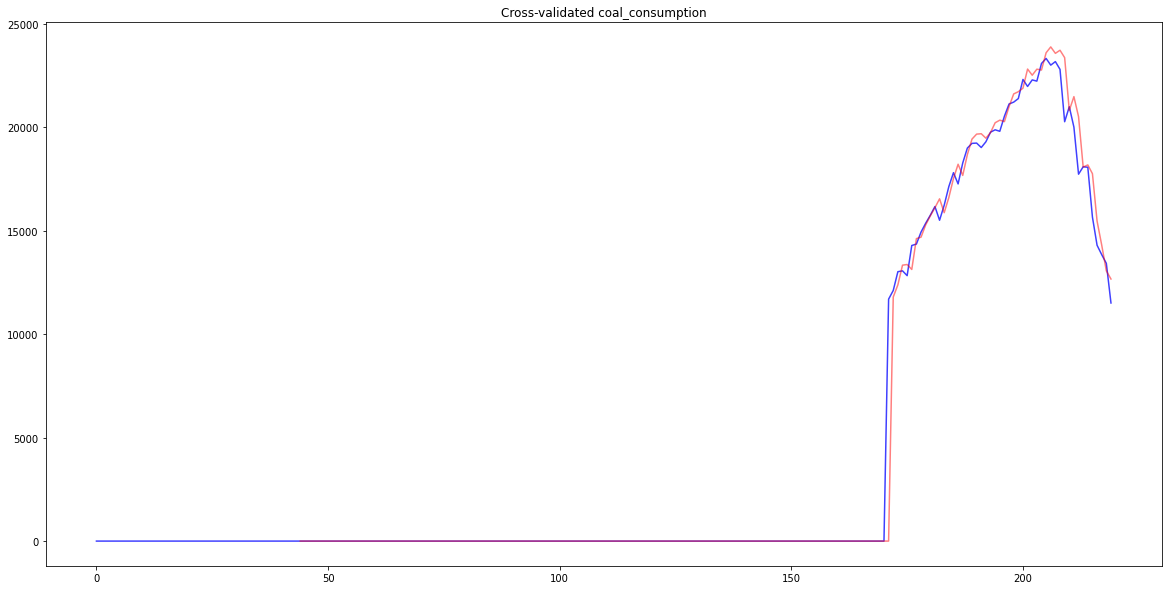

model-usa-oil_consumption.pkl COMPLETED
PLOTTING oil_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


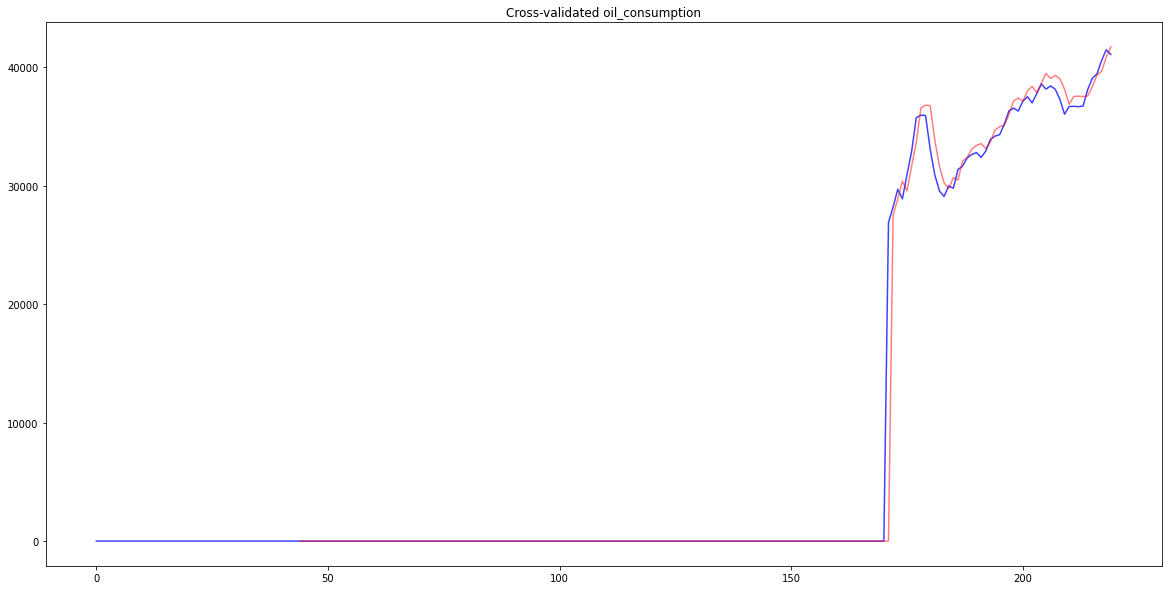

model-usa-total_electricity_production.pkl COMPLETED
PLOTTING total_electricity_production
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


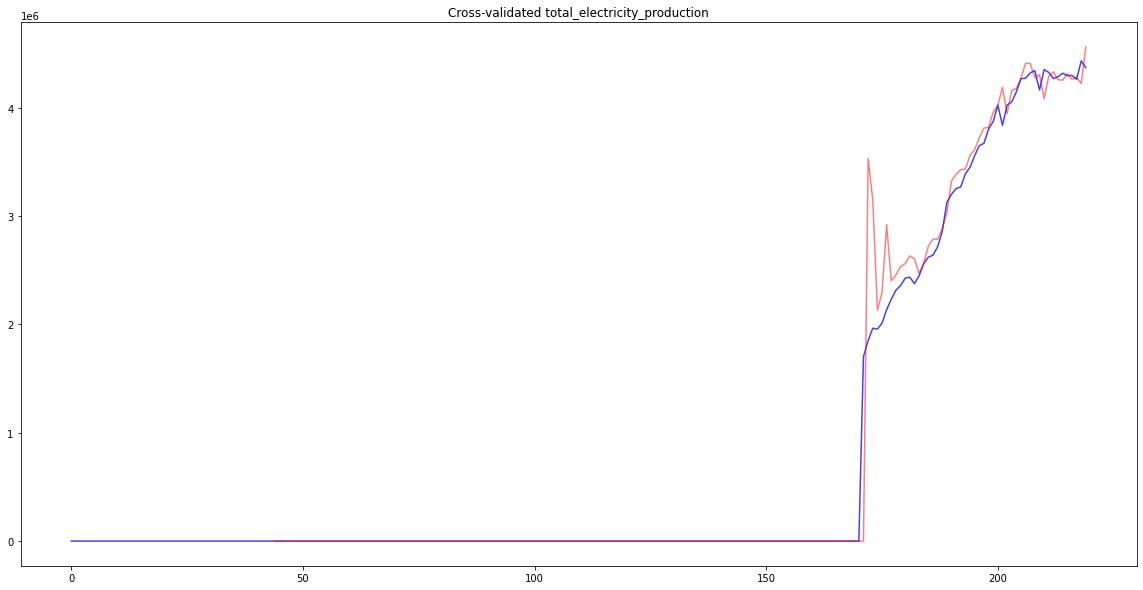

model-usa-electricity_production_from_renewable.pkl COMPLETED
PLOTTING electricity_production_from_renewable
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


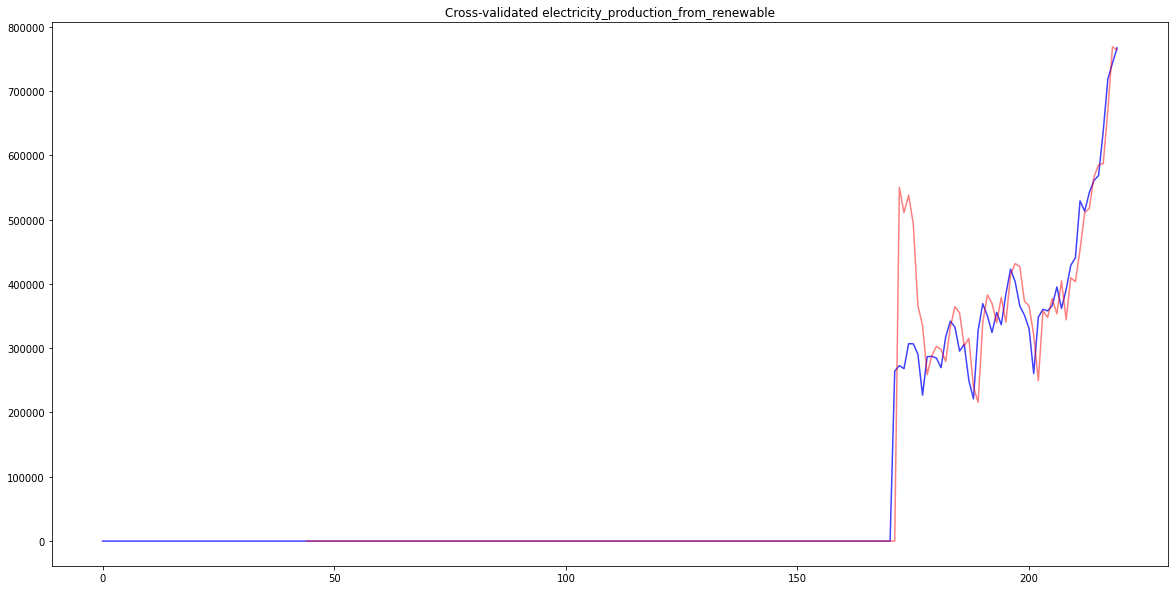

model-usa-primary_energy_consumption_per_capita.pkl COMPLETED
PLOTTING primary_energy_consumption_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


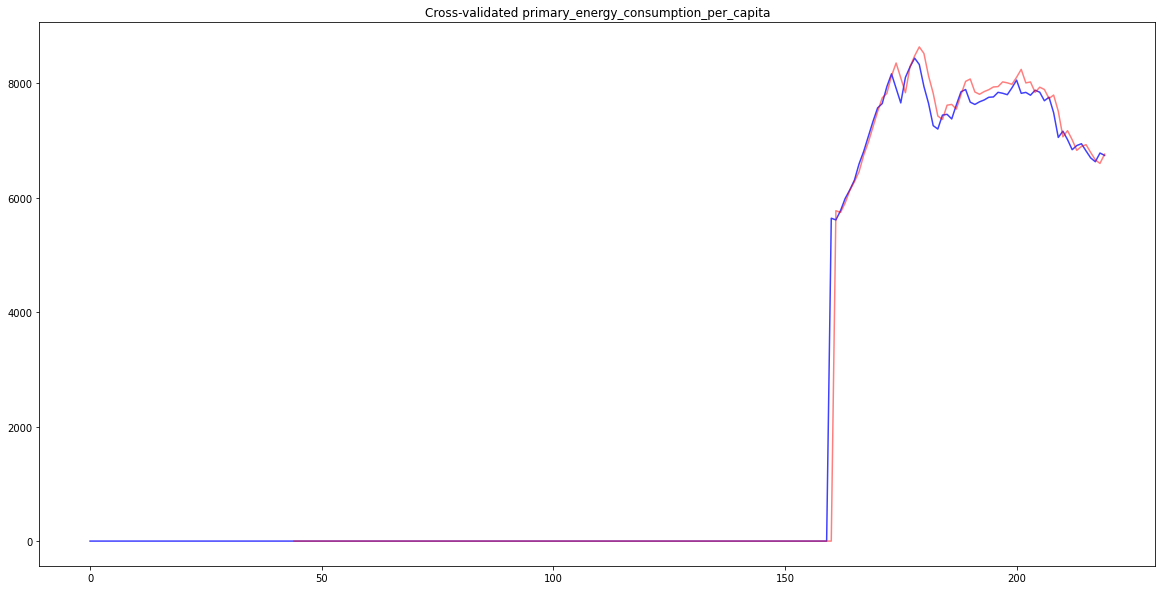

model-usa-fossil_energy_consumption_share.pkl COMPLETED
PLOTTING fossil_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


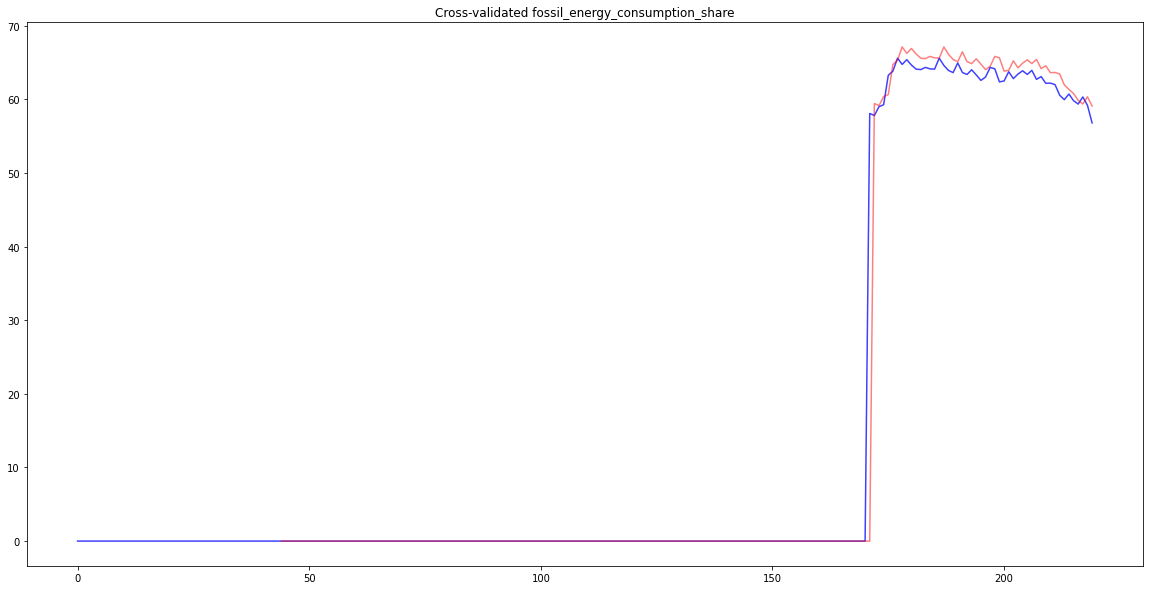

model-usa-renewable_electricity_production_share.pkl COMPLETED
PLOTTING renewable_electricity_production_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


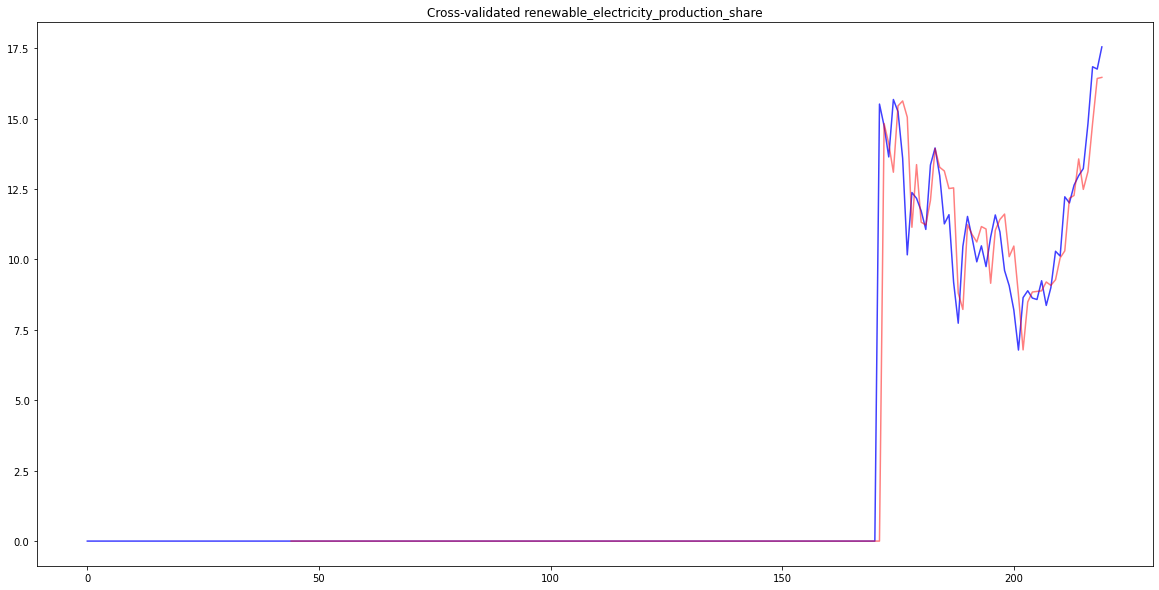

model-usa-energy_intensity.pkl COMPLETED
PLOTTING energy_intensity
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


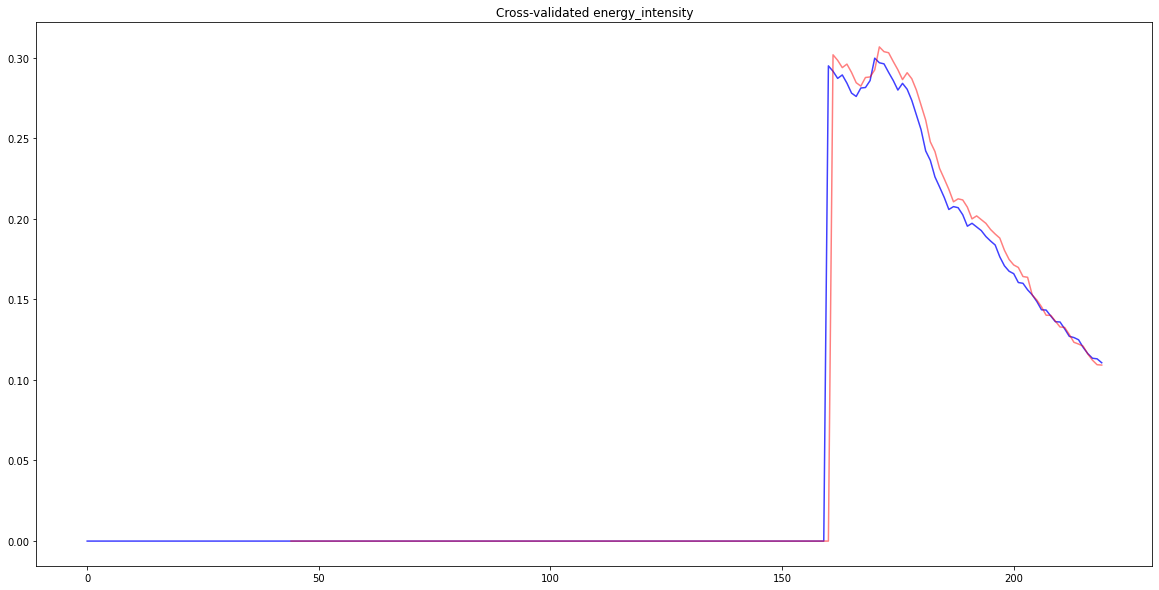

model-usa-renewable_energy_consumption_share.pkl COMPLETED
PLOTTING renewable_energy_consumption_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


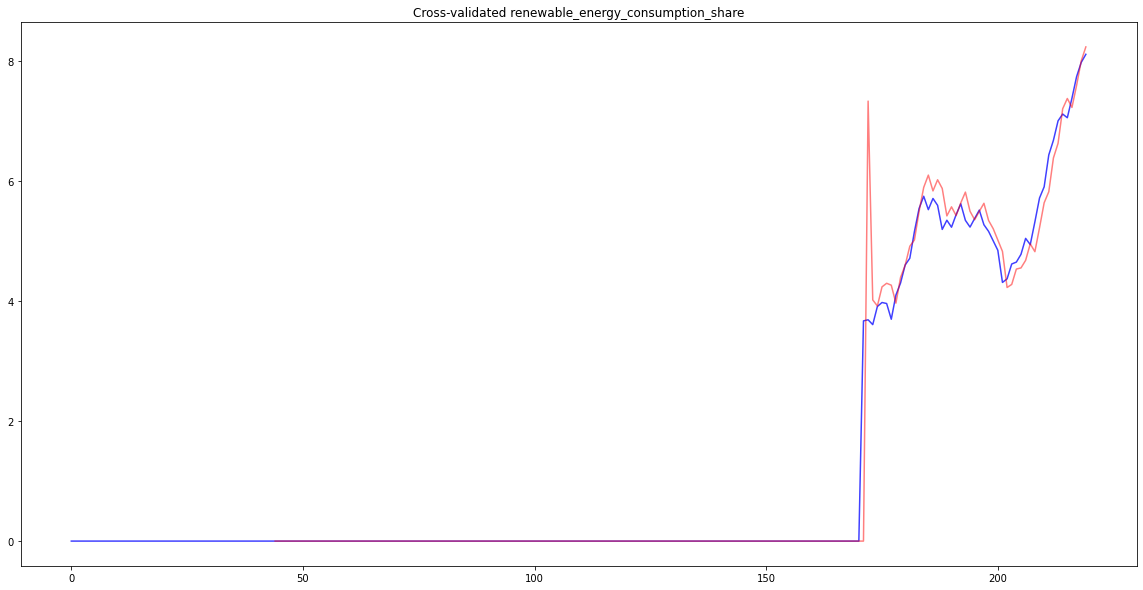

model-usa-percent_of_environment_patent.pkl COMPLETED
PLOTTING percent_of_environment_patent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


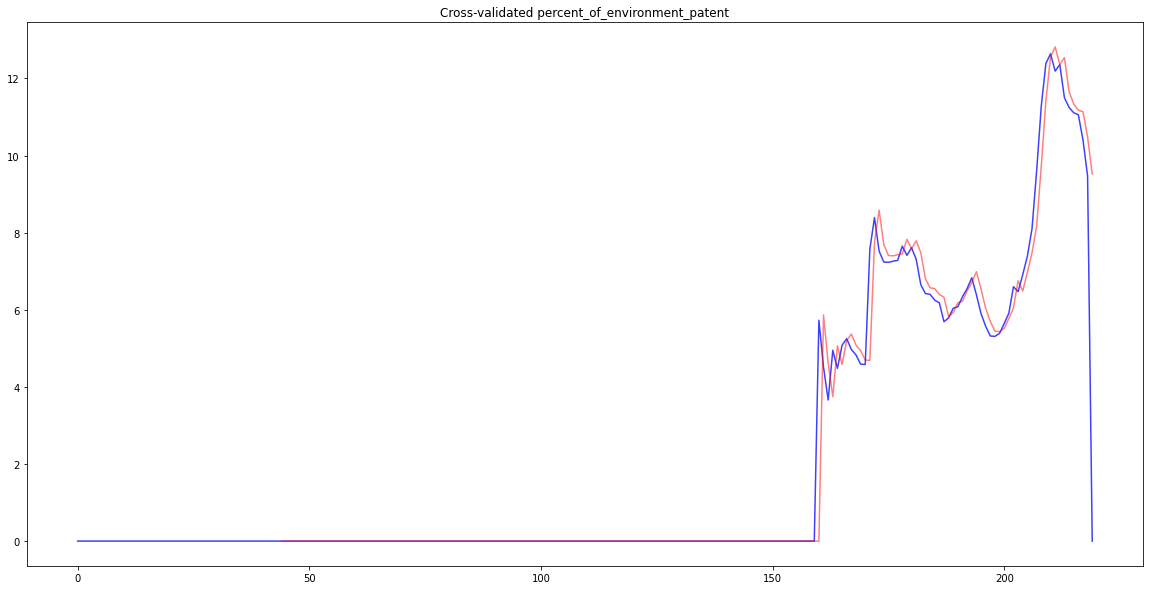

model-usa-co2_growth_prct.pkl COMPLETED
PLOTTING co2_growth_prct
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


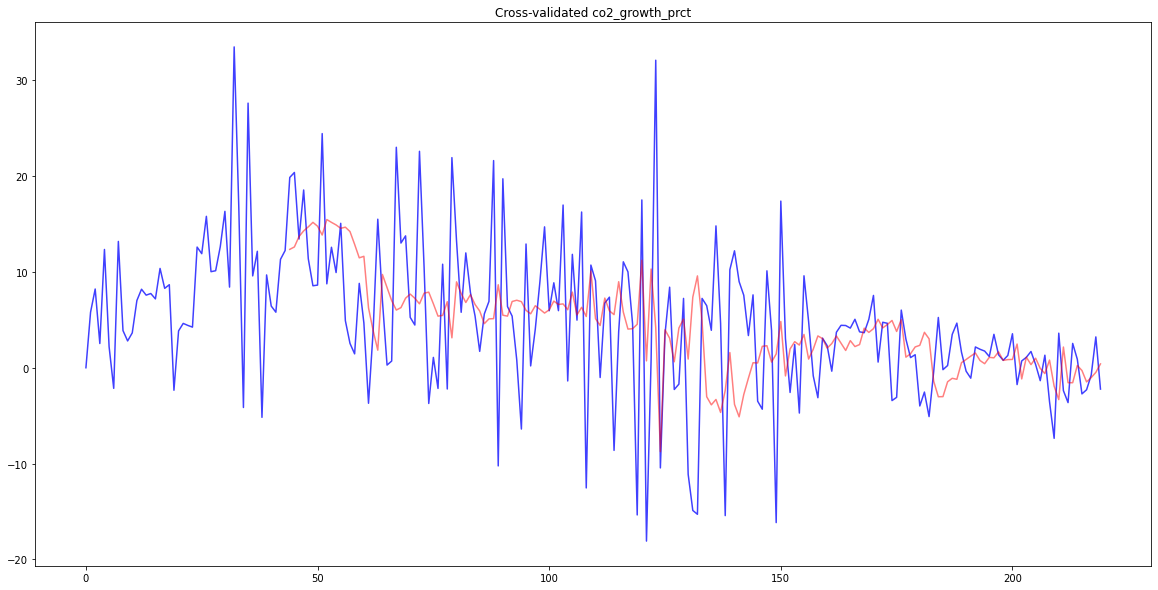

model-usa-co2_growth_abs.pkl COMPLETED
PLOTTING co2_growth_abs
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


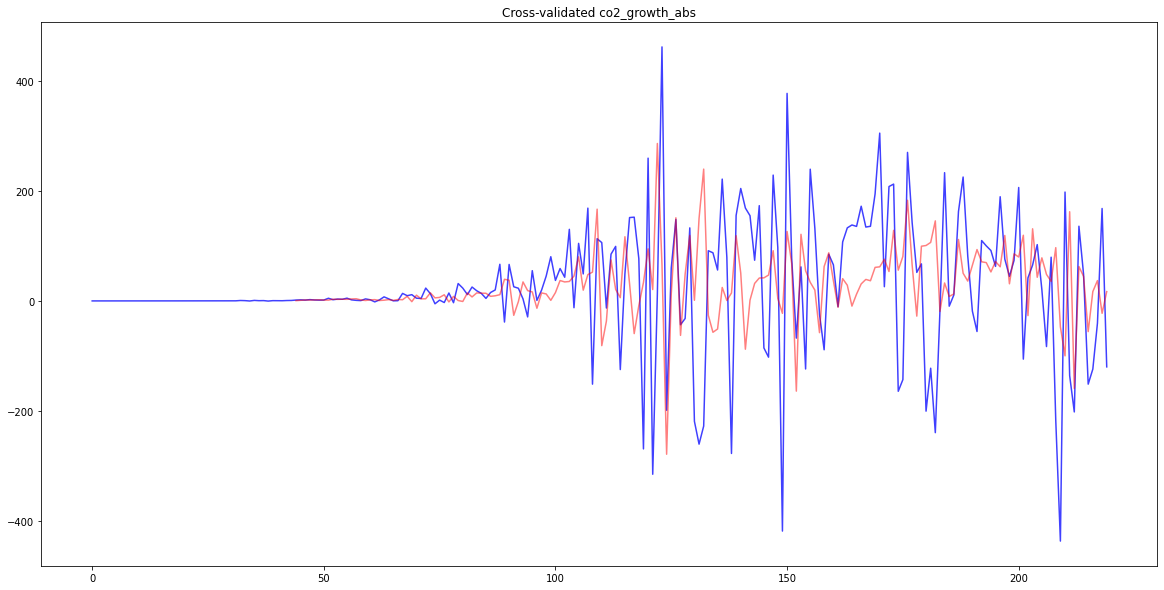

model-usa-co2_per_capita.pkl COMPLETED
PLOTTING co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


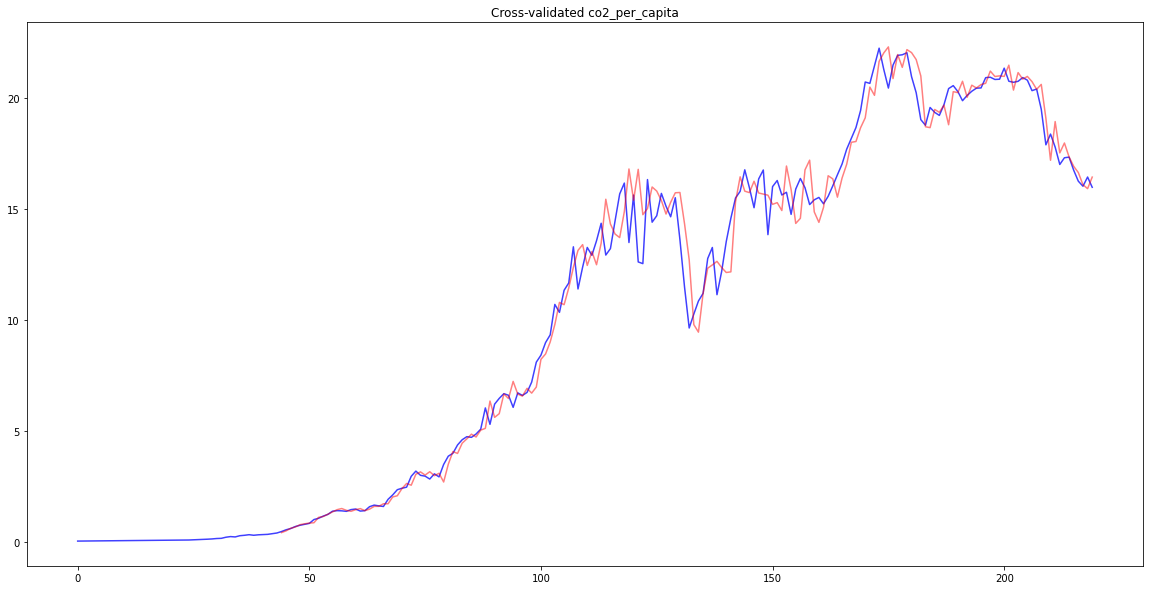

model-usa-consumption_co2_per_capita.pkl COMPLETED
PLOTTING consumption_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


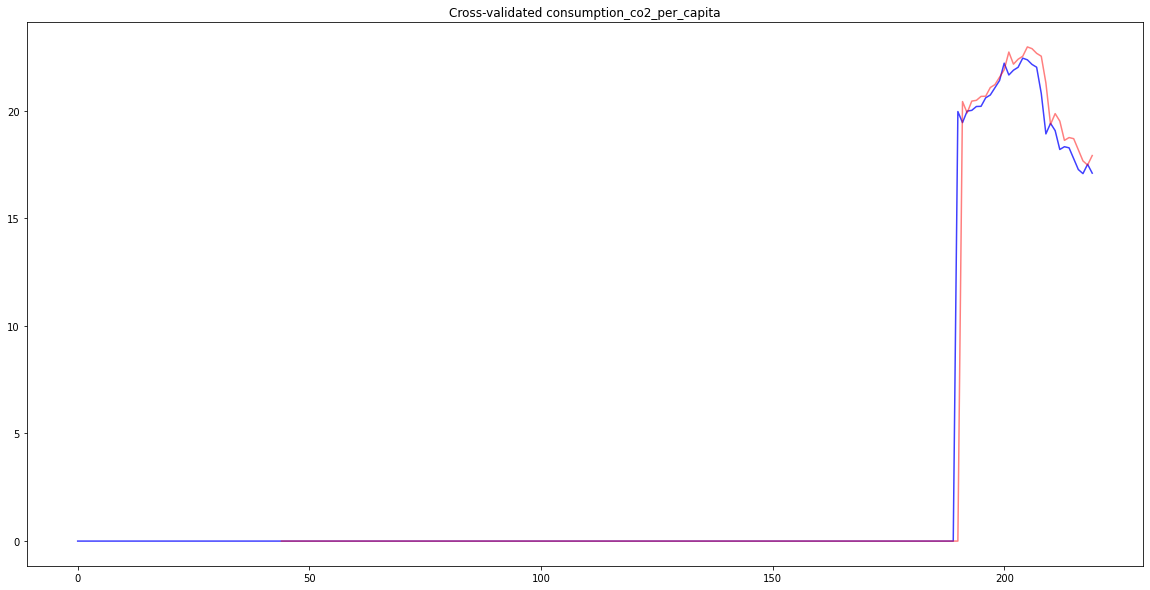

model-usa-share_global_co2.pkl COMPLETED
PLOTTING share_global_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


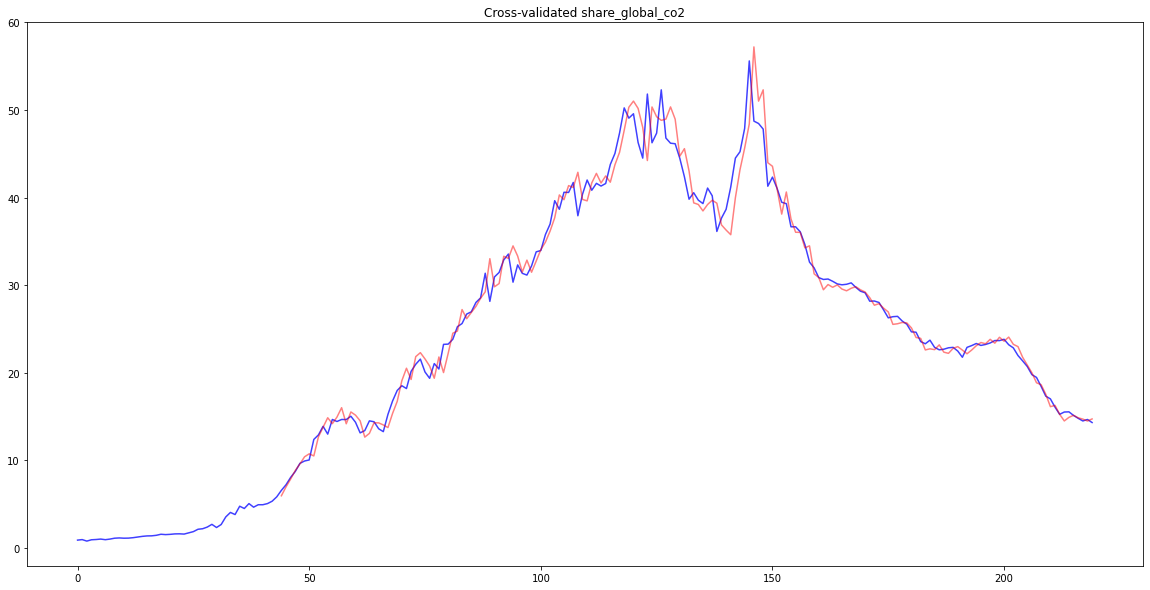

model-usa-cumulative_co2.pkl COMPLETED
PLOTTING cumulative_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


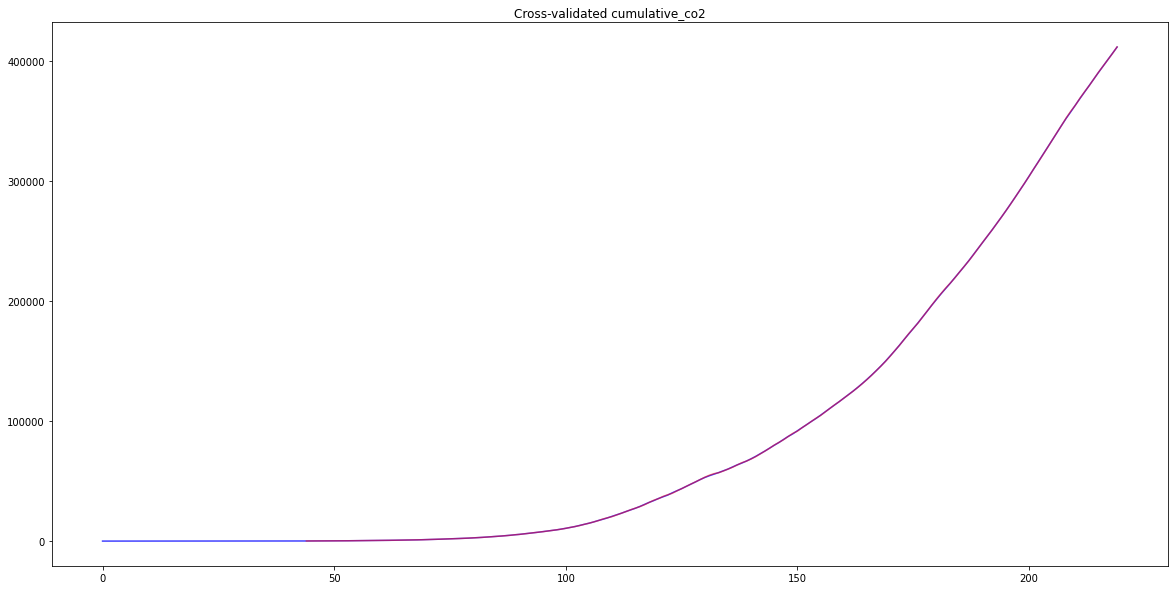

model-usa-share_global_cumulative_co2.pkl COMPLETED
PLOTTING share_global_cumulative_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


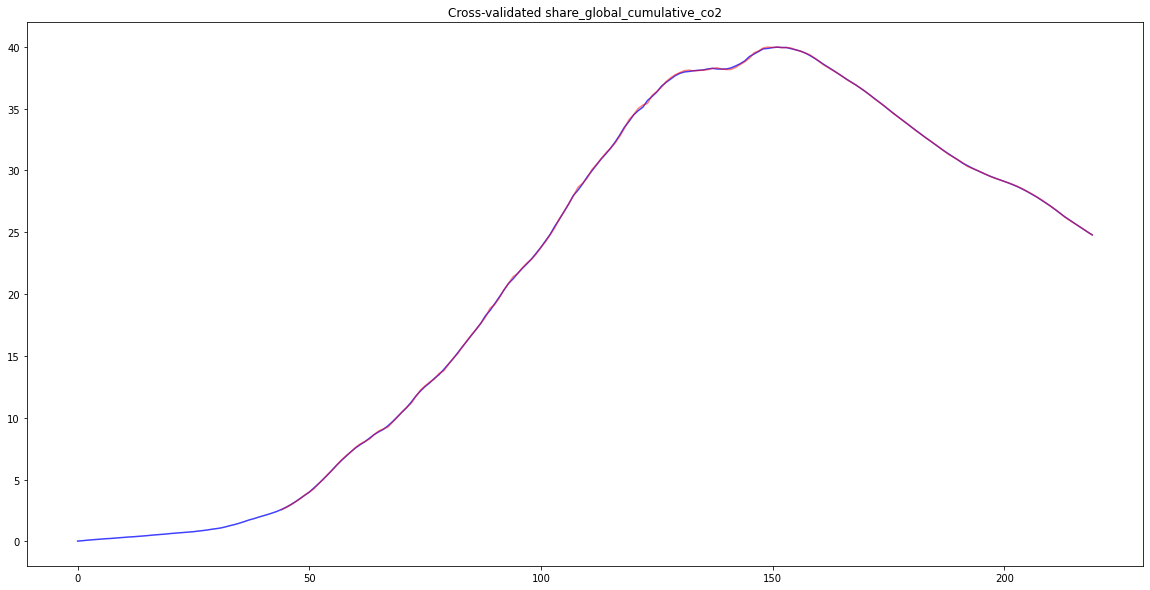

model-usa-co2_per_gdp.pkl COMPLETED
PLOTTING co2_per_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


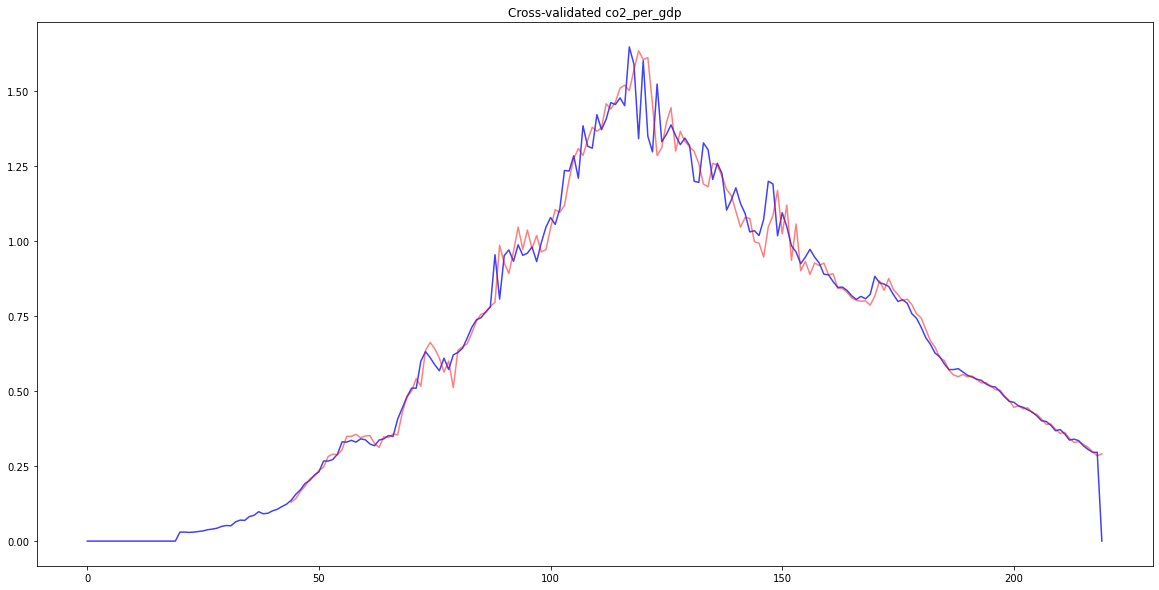

model-usa-consumption_co2_per_gdp.pkl COMPLETED
PLOTTING consumption_co2_per_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


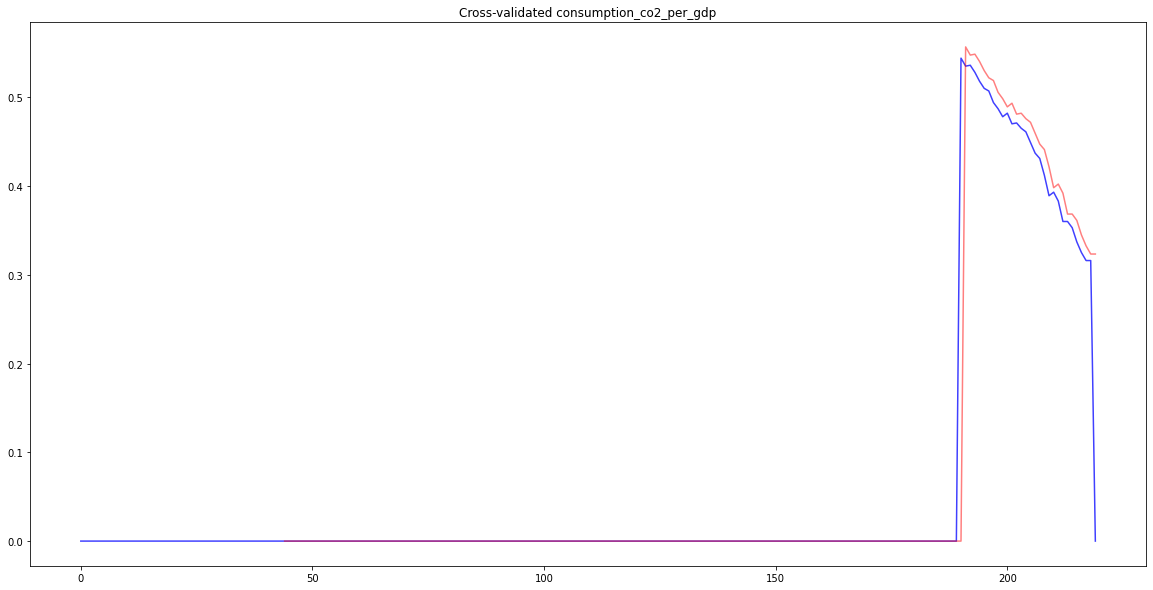

model-usa-cement_co2_per_capita.pkl COMPLETED
PLOTTING cement_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


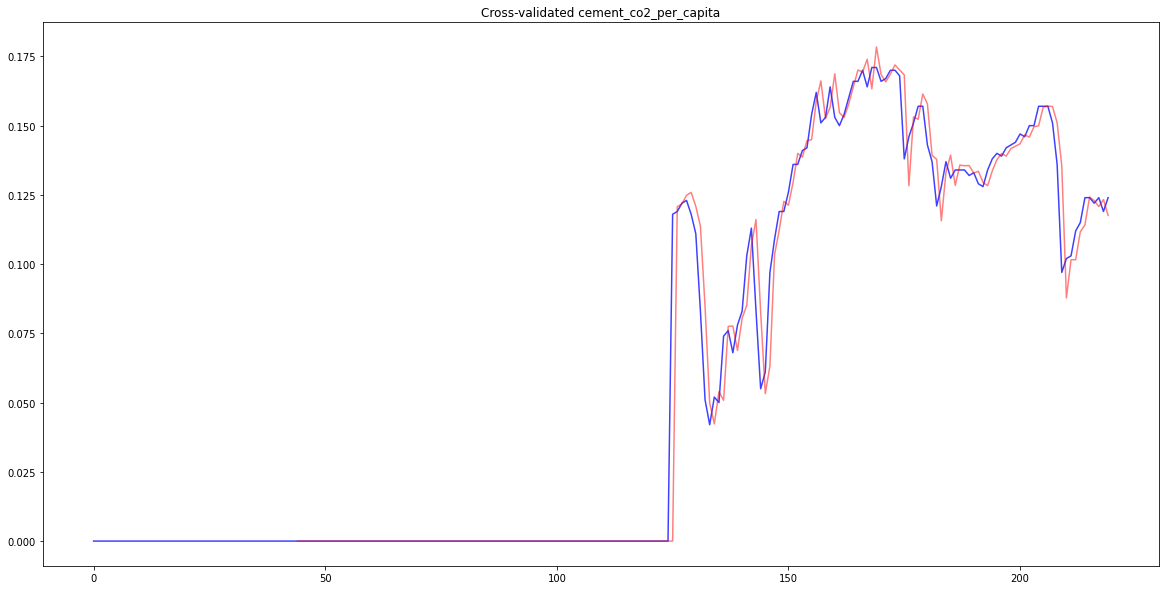

model-usa-coal_co2_per_capita.pkl COMPLETED
PLOTTING coal_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


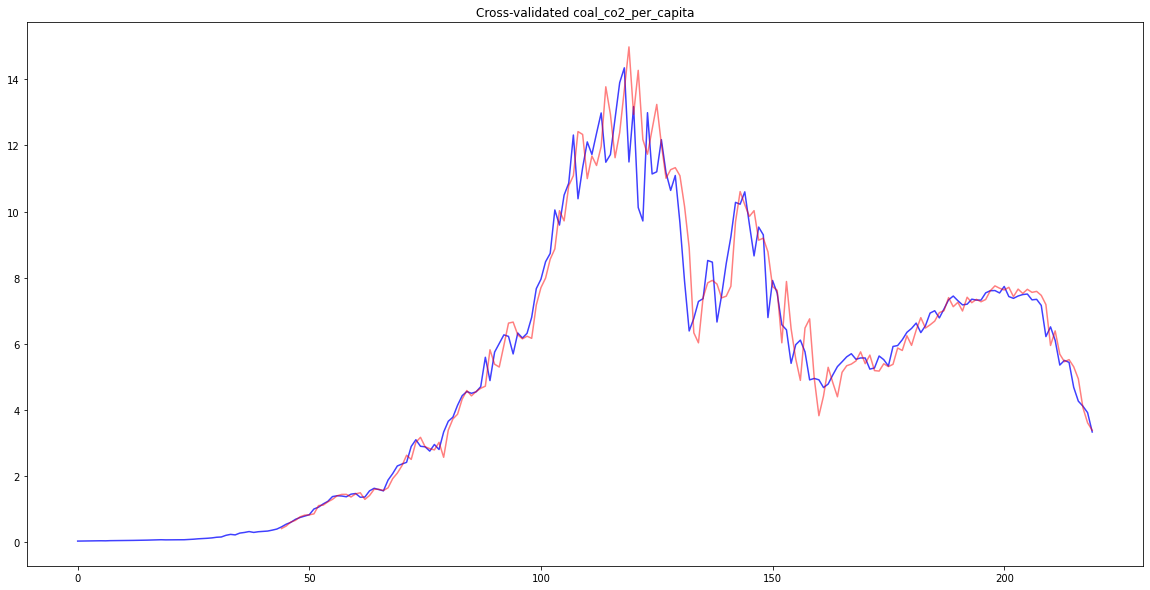

model-usa-flaring_co2_per_capita.pkl COMPLETED
PLOTTING flaring_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


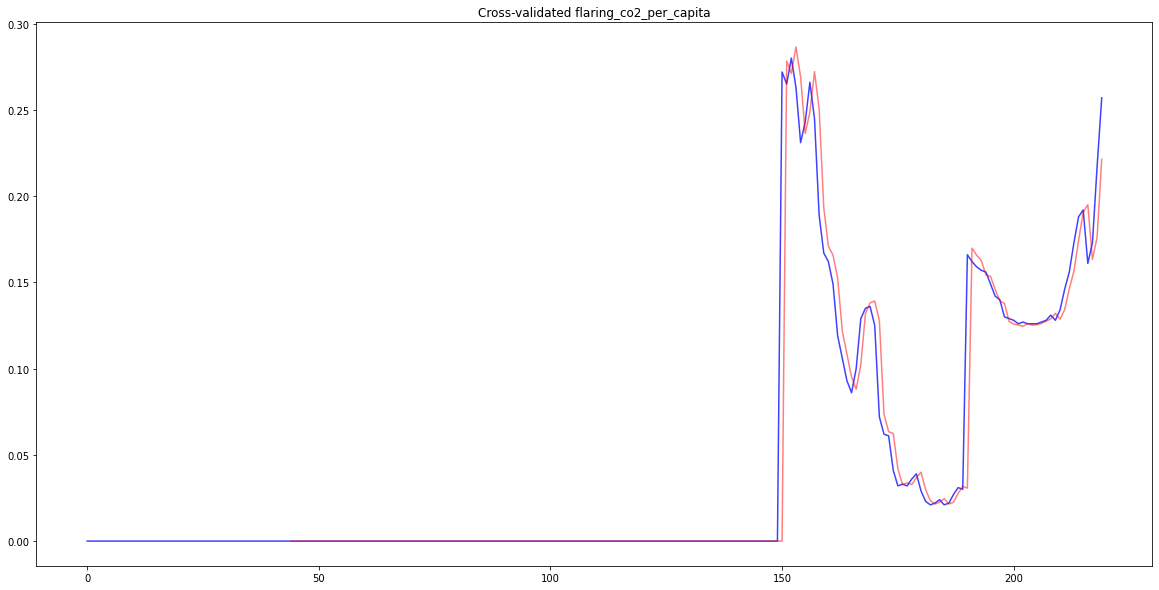

model-usa-gas_co2_per_capita.pkl COMPLETED
PLOTTING gas_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


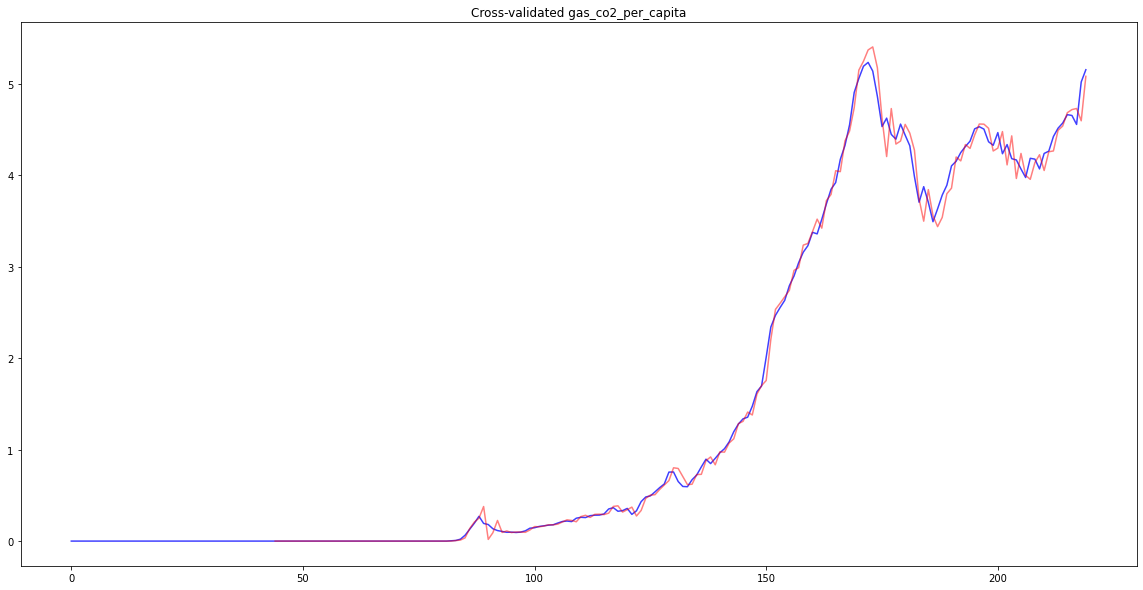

model-usa-oil_co2_per_capita.pkl COMPLETED
PLOTTING oil_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


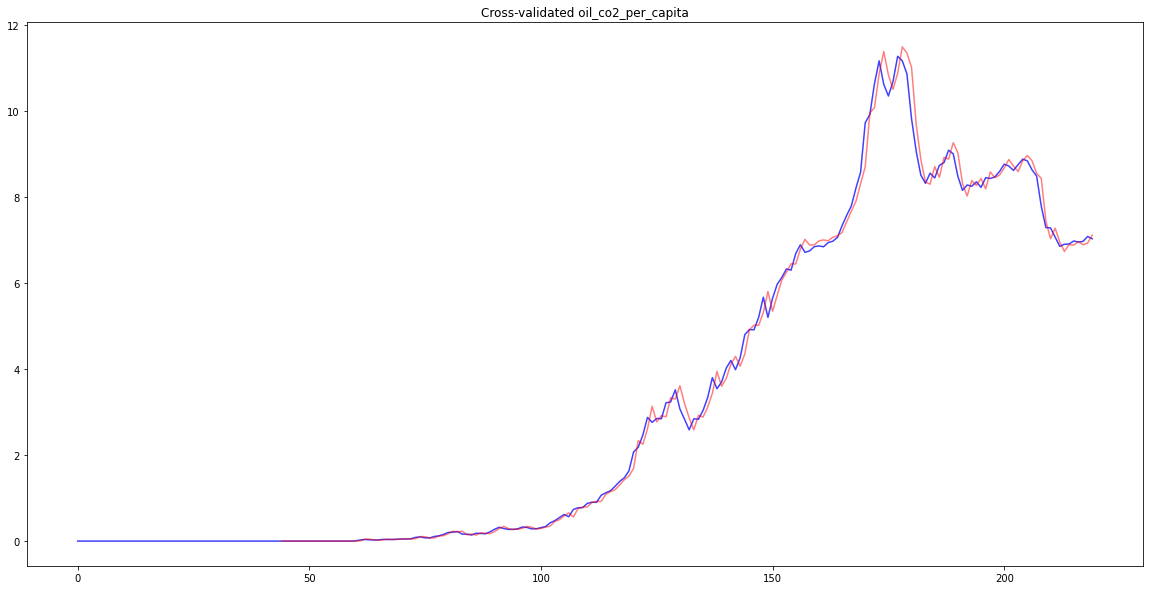

model-usa-other_co2_per_capita.pkl COMPLETED
PLOTTING other_co2_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


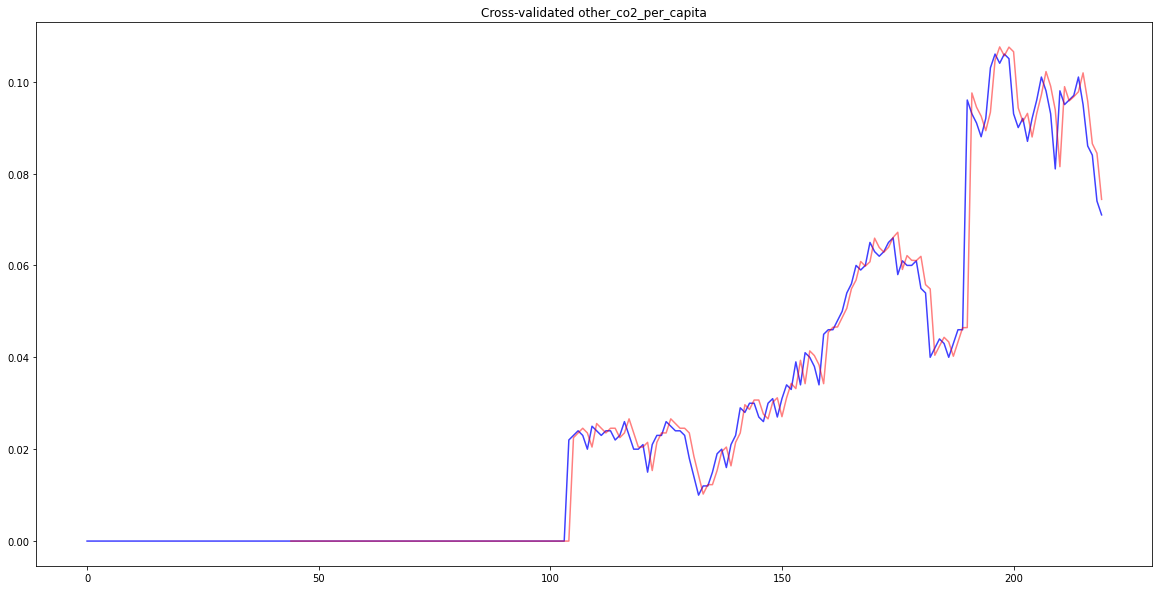

model-usa-trade_co2_share.pkl COMPLETED
PLOTTING trade_co2_share
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


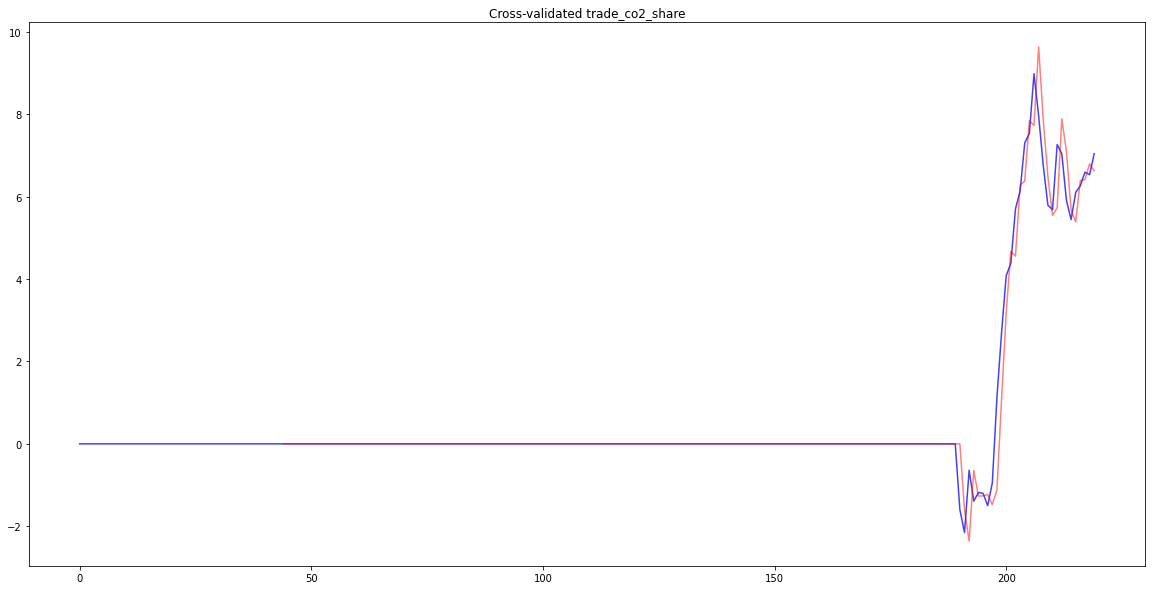

model-usa-share_global_cement_co2.pkl COMPLETED
PLOTTING share_global_cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


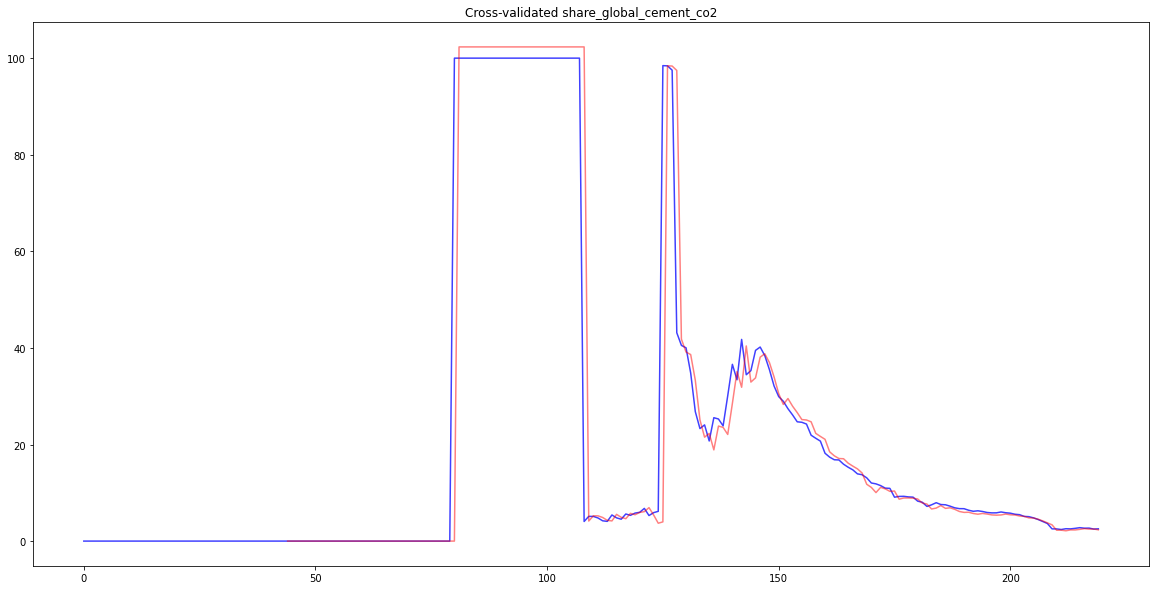

model-usa-share_global_coal_co2.pkl COMPLETED
PLOTTING share_global_coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


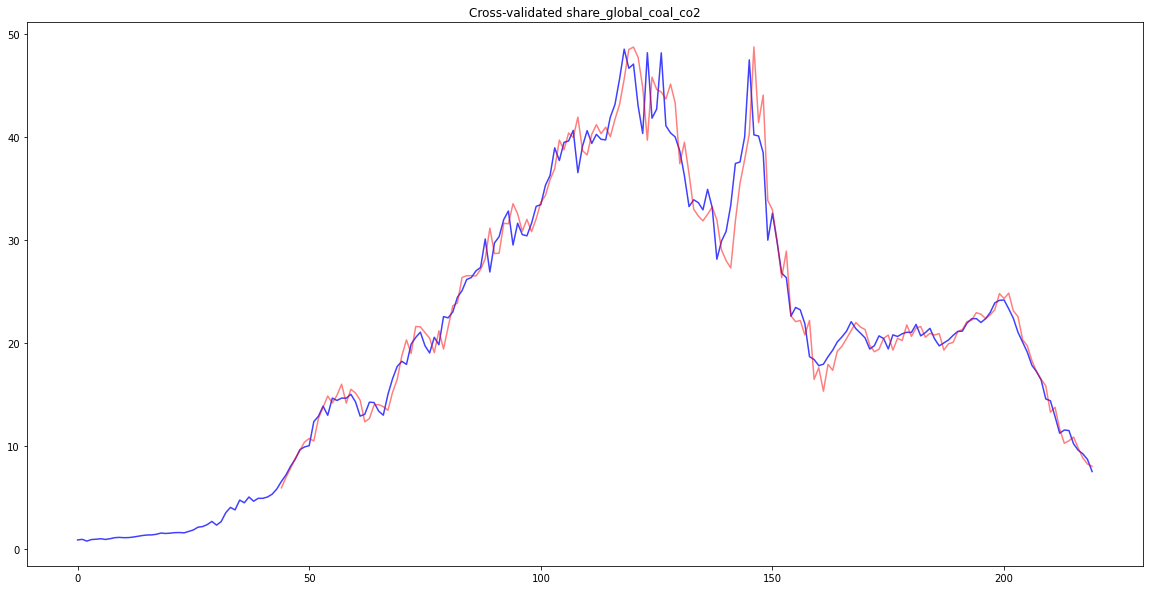

model-usa-share_global_flaring_co2.pkl COMPLETED
PLOTTING share_global_flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


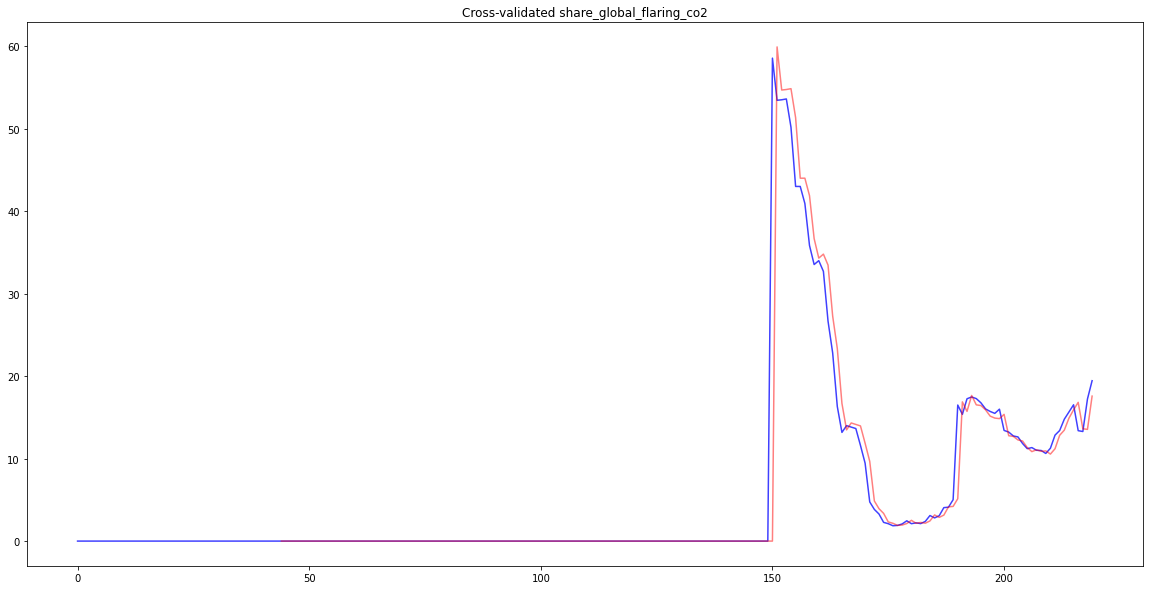

model-usa-share_global_gas_co2.pkl COMPLETED
PLOTTING share_global_gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


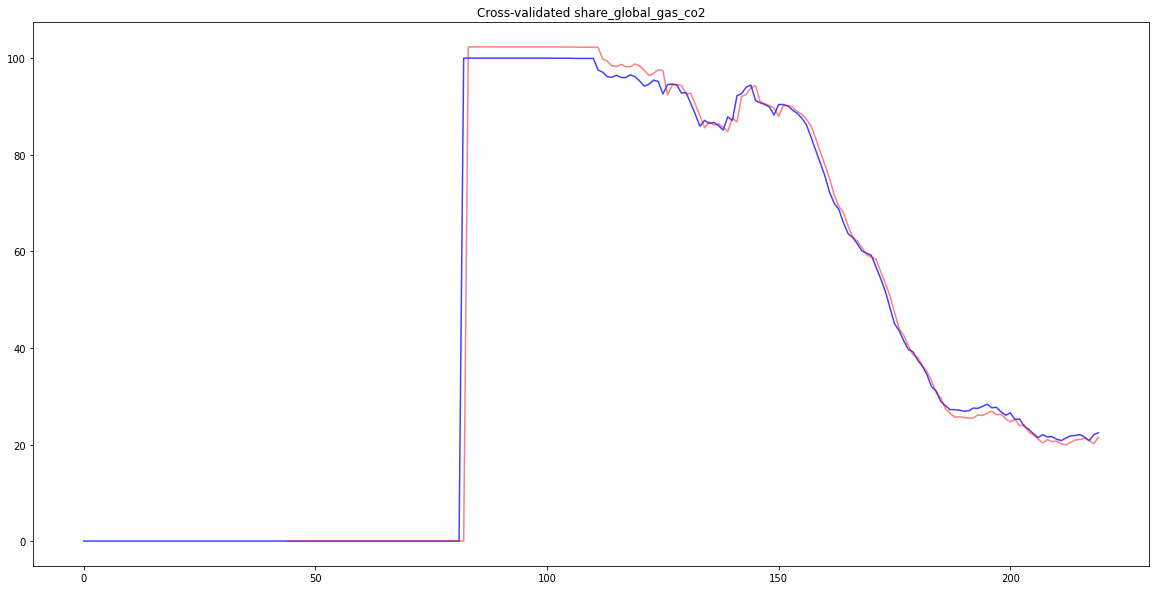

model-usa-share_global_oil_co2.pkl COMPLETED
PLOTTING share_global_oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


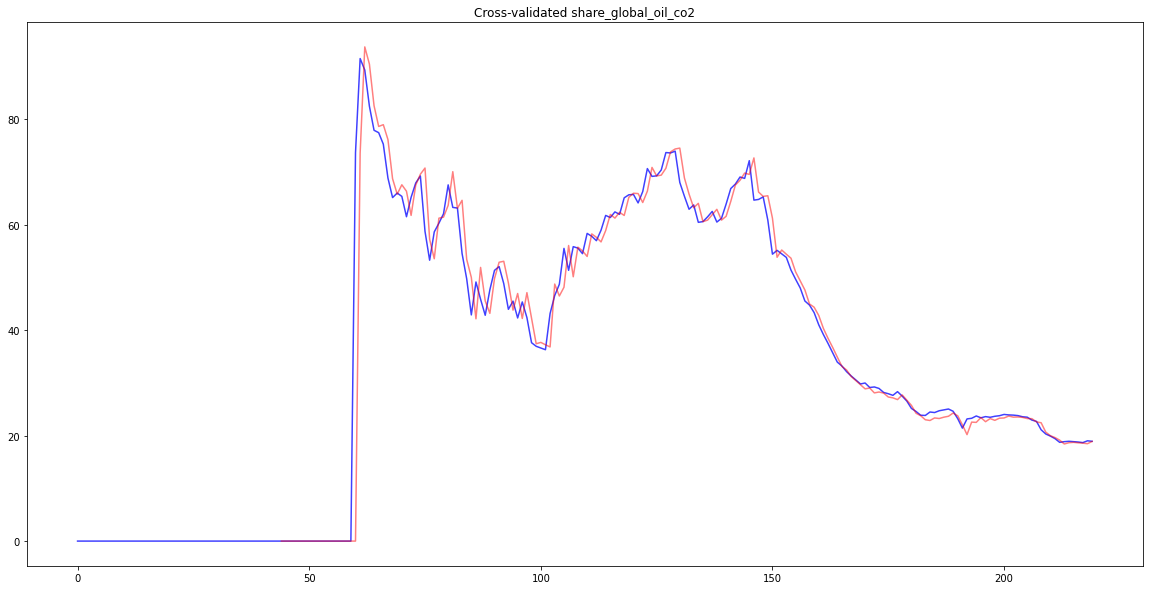

model-usa-share_global_other_co2.pkl COMPLETED
PLOTTING share_global_other_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


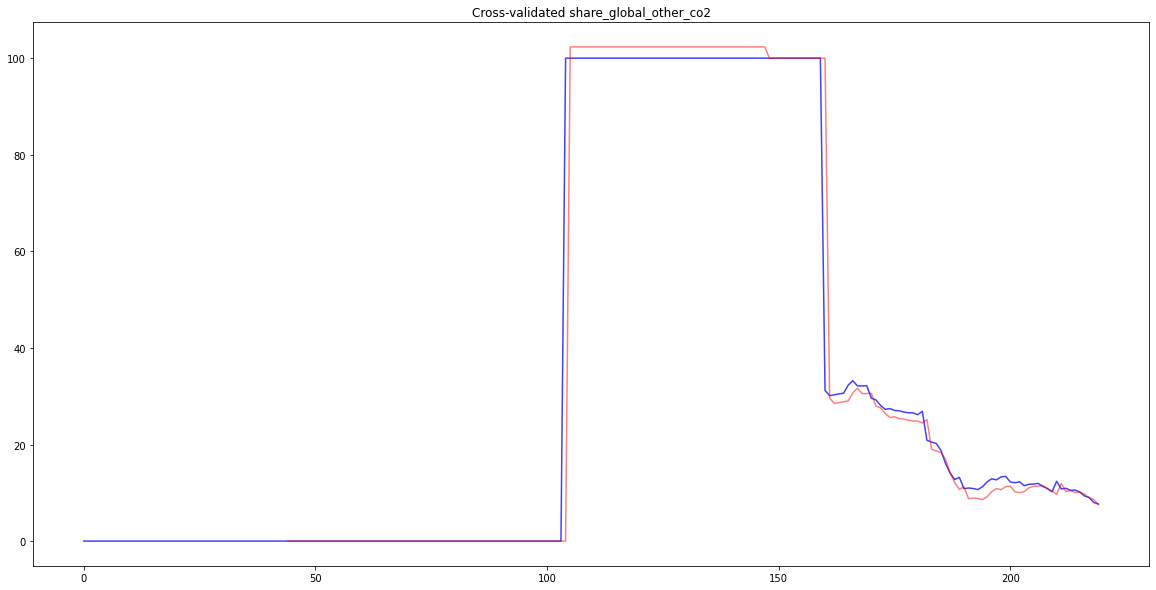

model-usa-cumulative_cement_co2.pkl COMPLETED
PLOTTING cumulative_cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


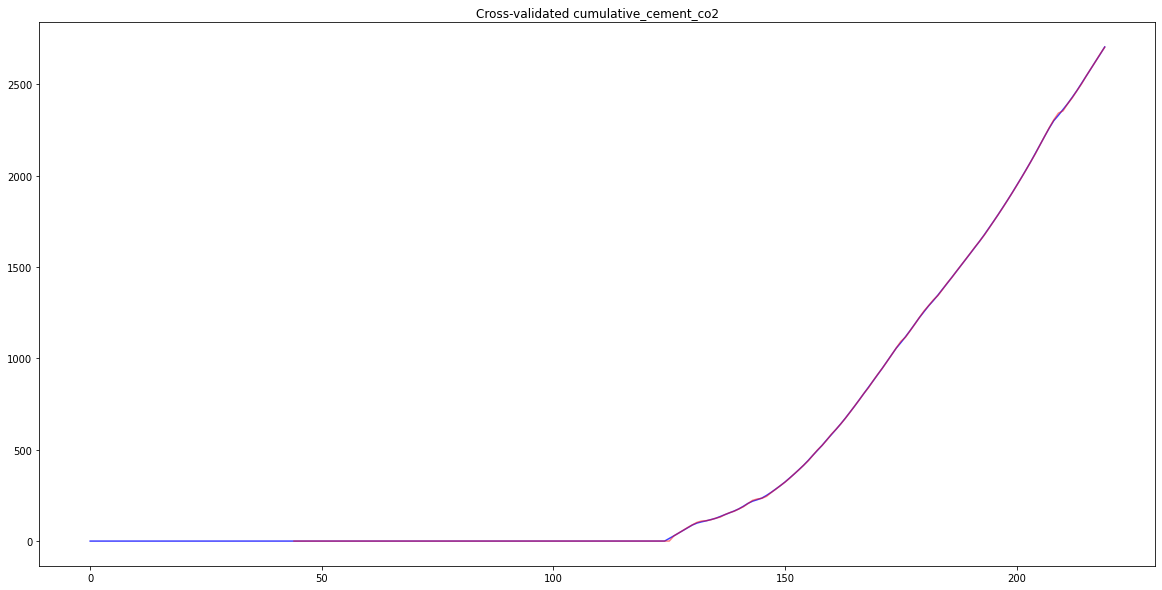

model-usa-cumulative_coal_co2.pkl COMPLETED
PLOTTING cumulative_coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


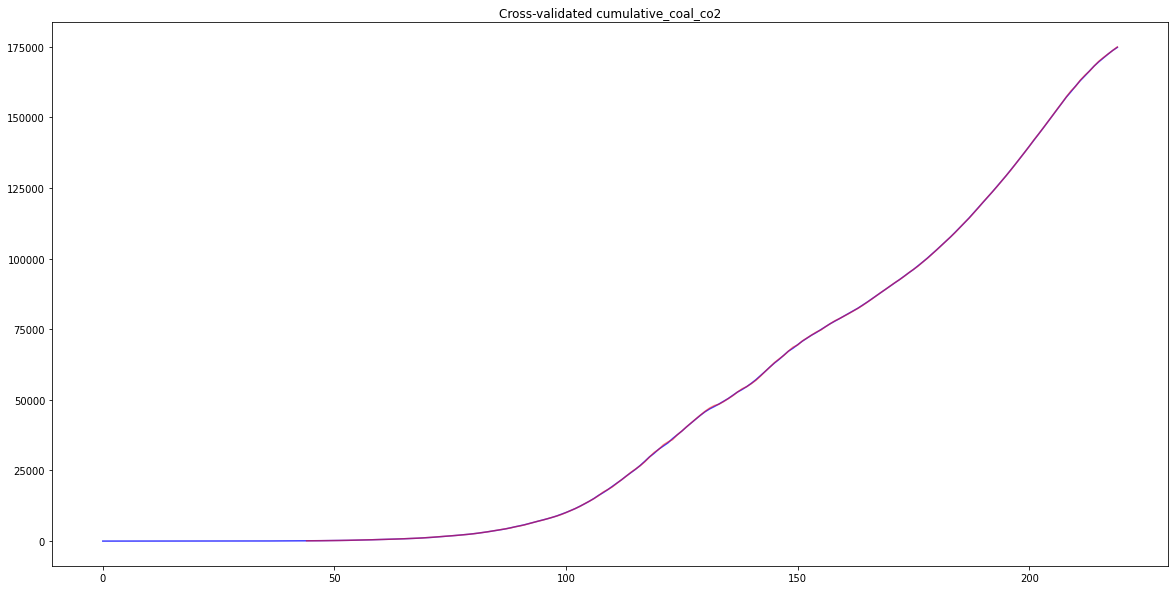

model-usa-cumulative_flaring_co2.pkl COMPLETED
PLOTTING cumulative_flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


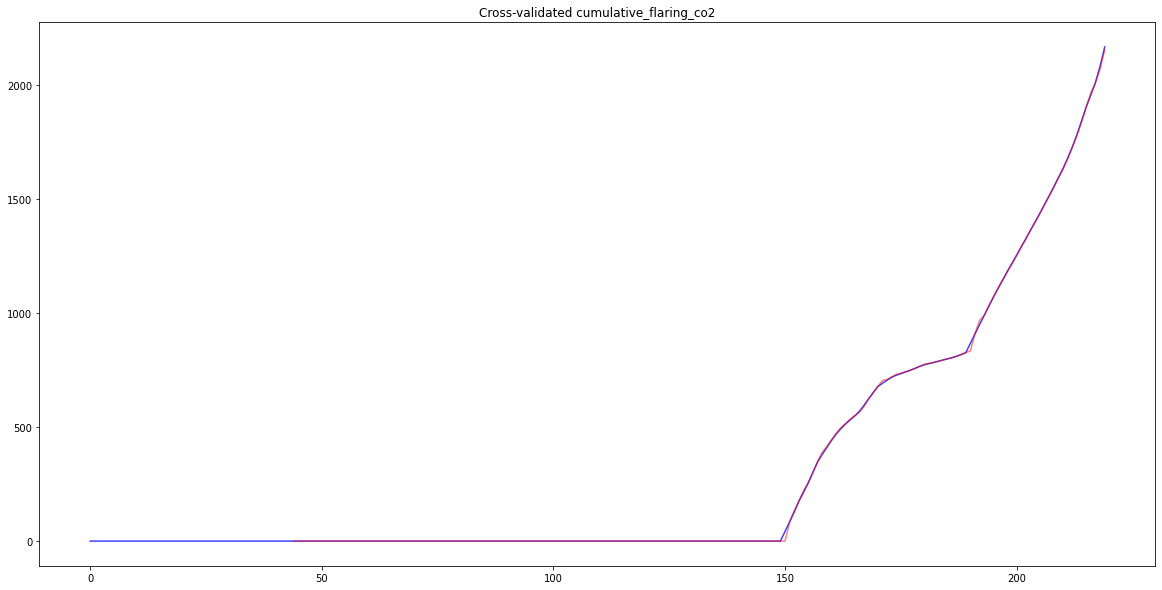

model-usa-cumulative_gas_co2.pkl COMPLETED
PLOTTING cumulative_gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


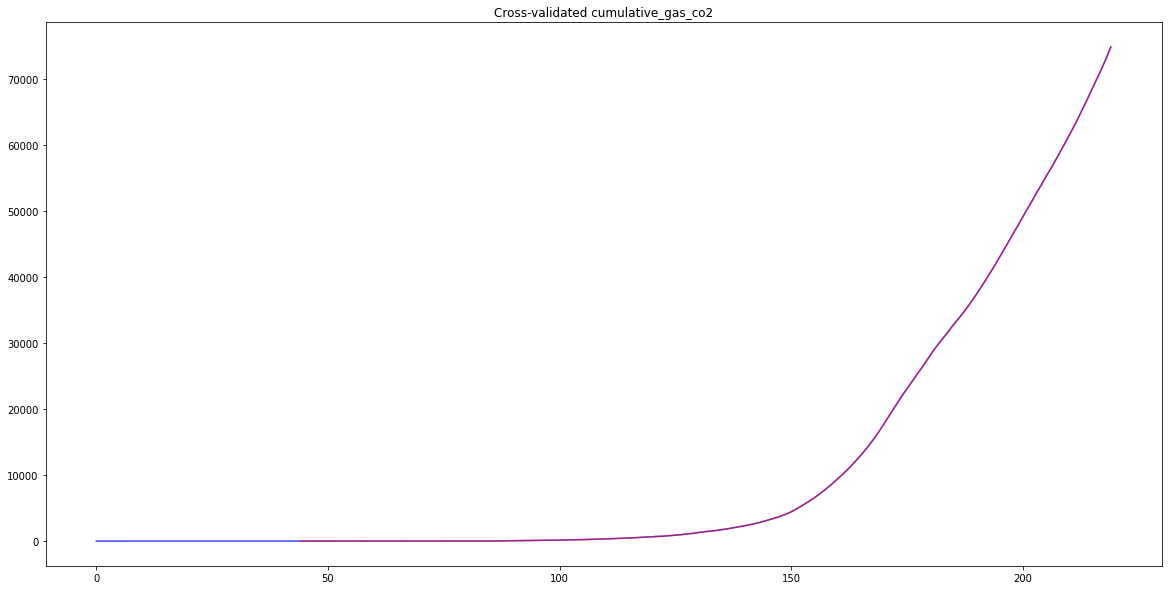

model-usa-cumulative_oil_co2.pkl COMPLETED
PLOTTING cumulative_oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


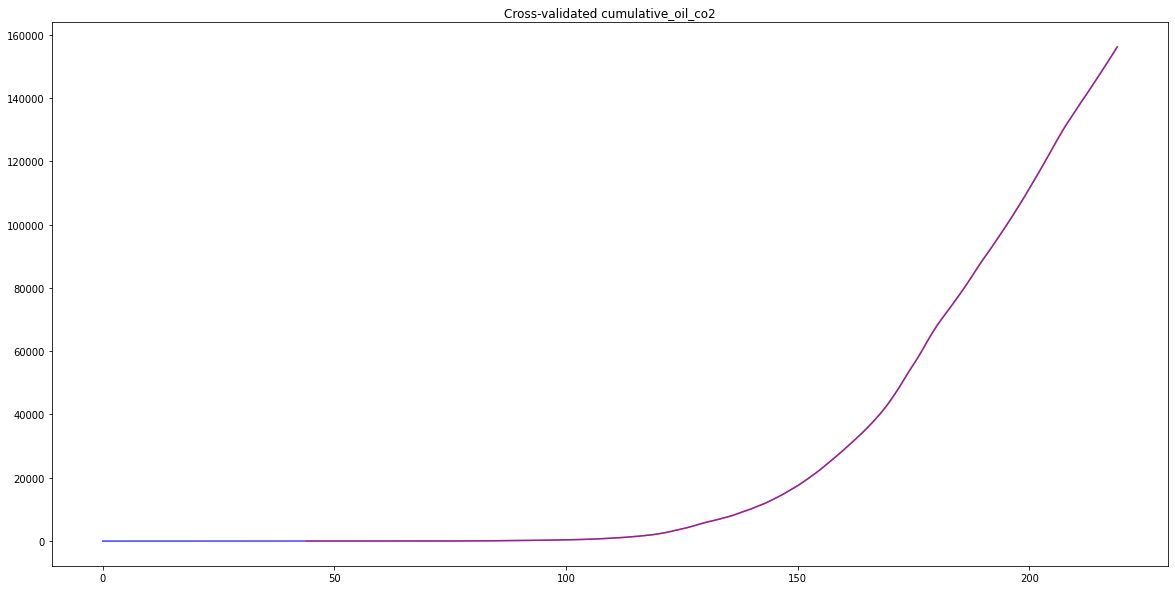

model-usa-cumulative_other_co2.pkl COMPLETED
PLOTTING cumulative_other_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


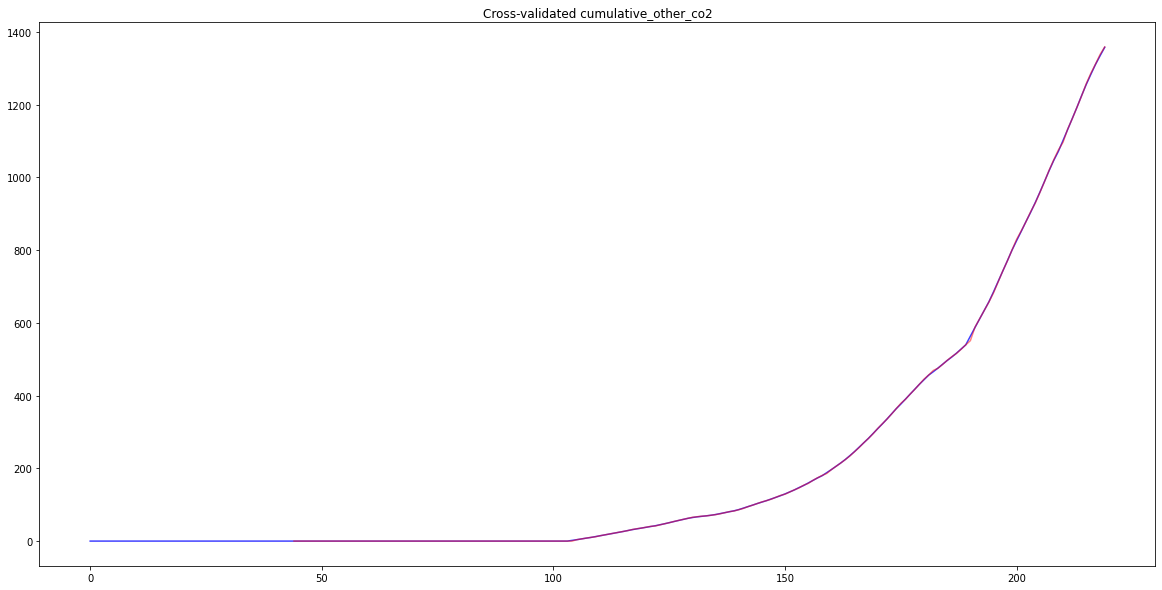

model-usa-share_global_cumulative_cement_co2.pkl COMPLETED
PLOTTING share_global_cumulative_cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


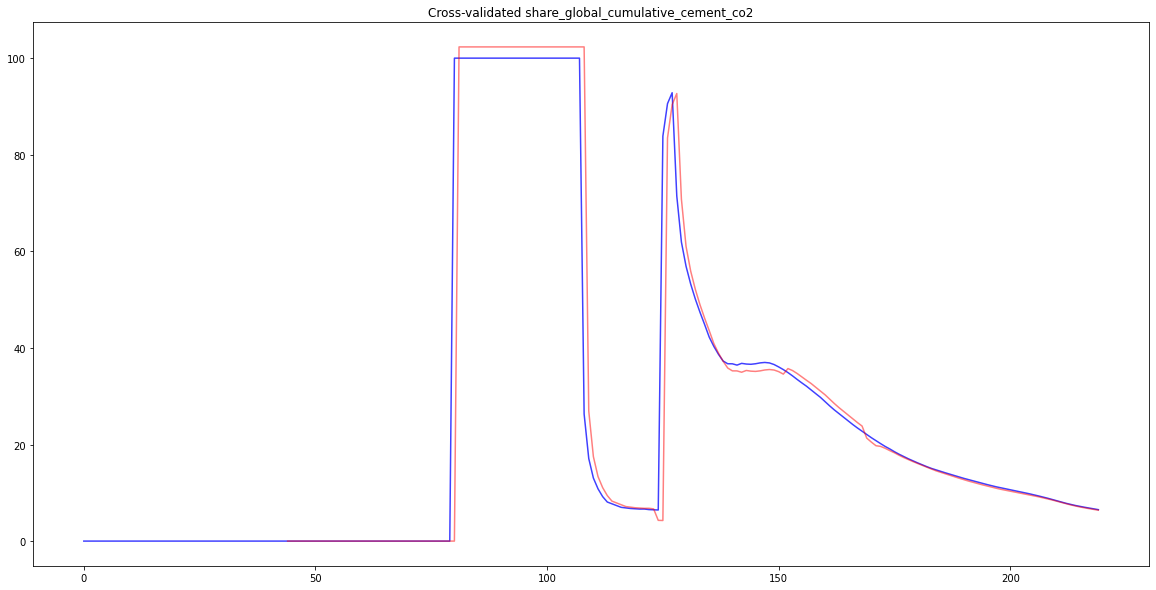

model-usa-share_global_cumulative_coal_co2.pkl COMPLETED
PLOTTING share_global_cumulative_coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


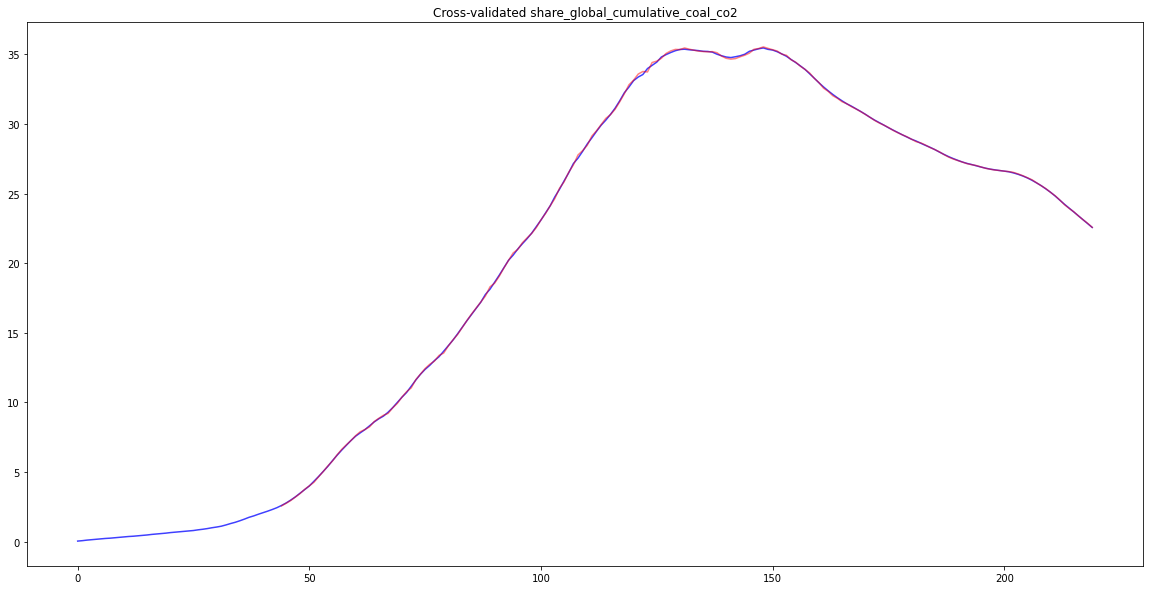

model-usa-share_global_cumulative_flaring_co2.pkl COMPLETED
PLOTTING share_global_cumulative_flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


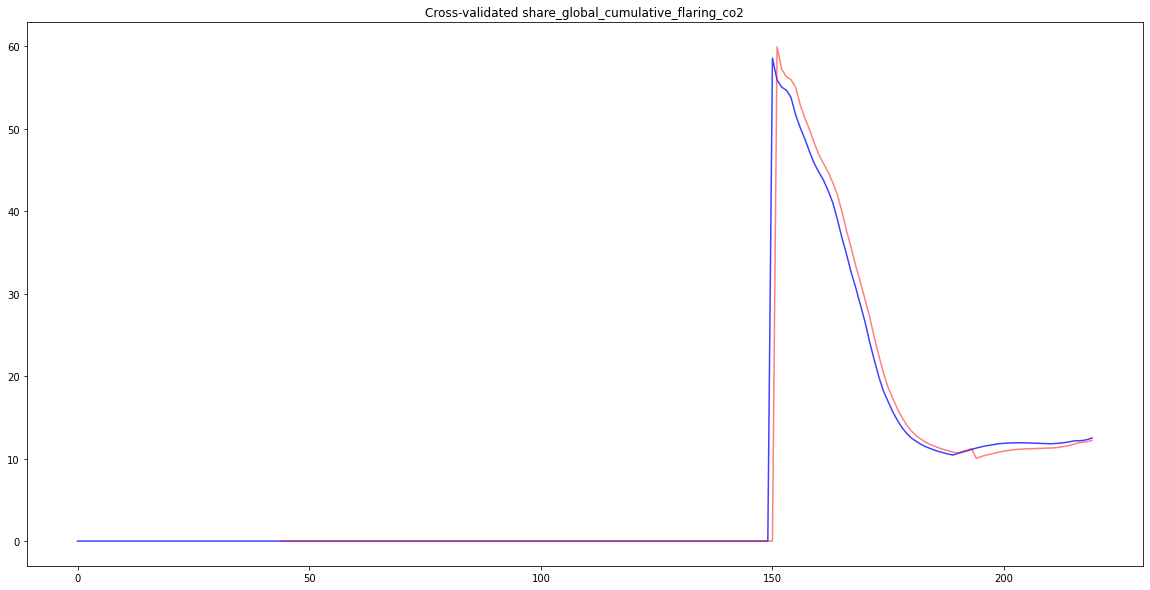

model-usa-share_global_cumulative_gas_co2.pkl COMPLETED
PLOTTING share_global_cumulative_gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


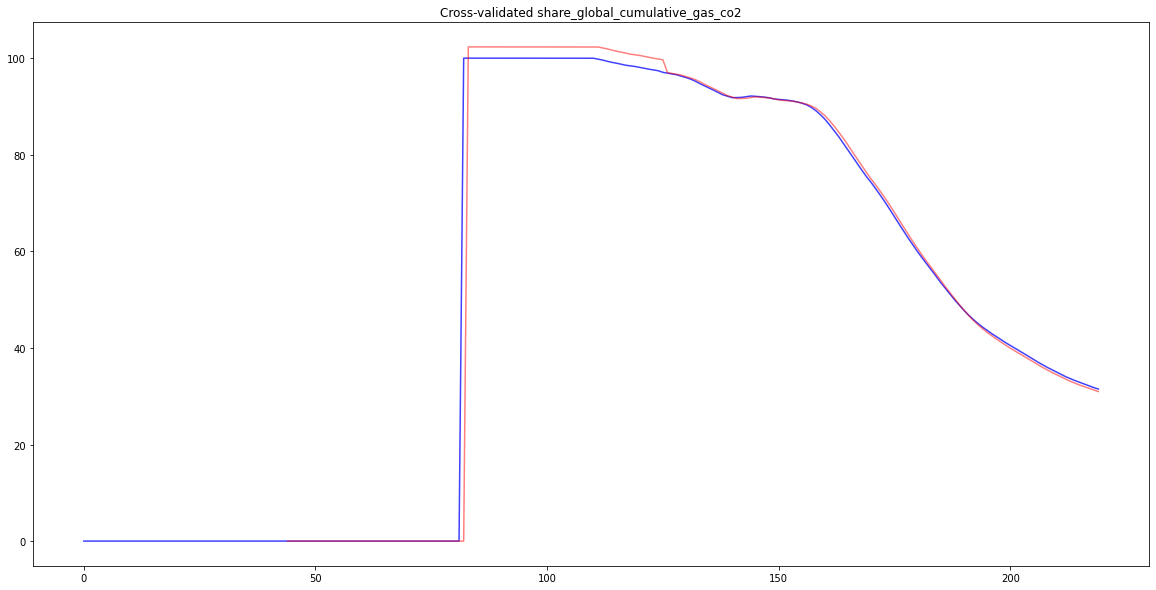

model-usa-share_global_cumulative_oil_co2.pkl COMPLETED
PLOTTING share_global_cumulative_oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


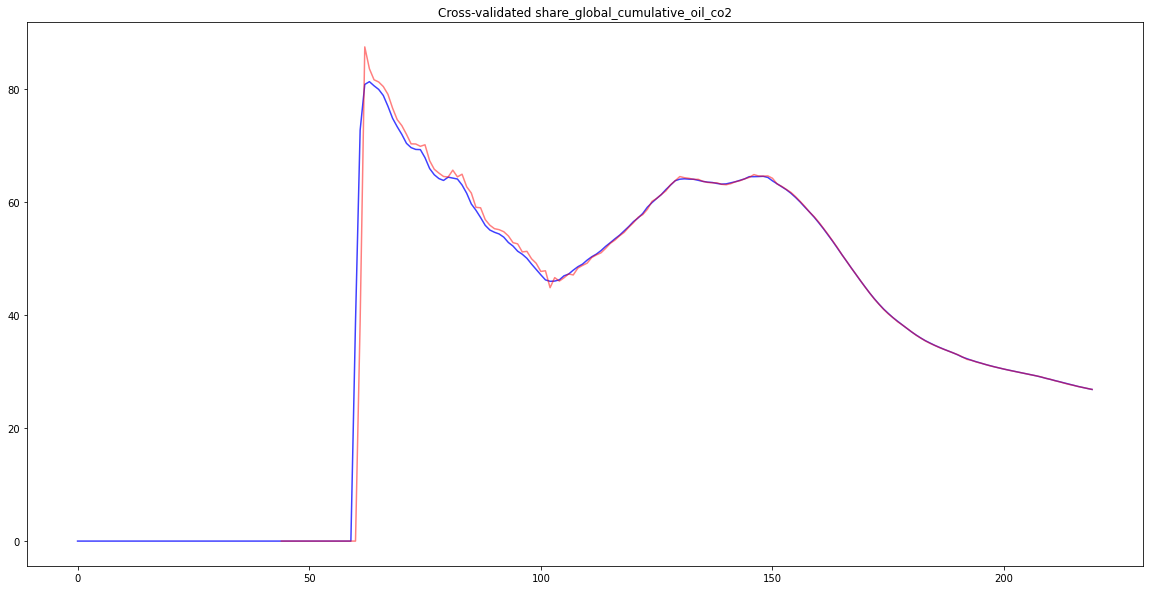

model-usa-share_global_cumulative_other_co2.pkl COMPLETED
PLOTTING share_global_cumulative_other_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


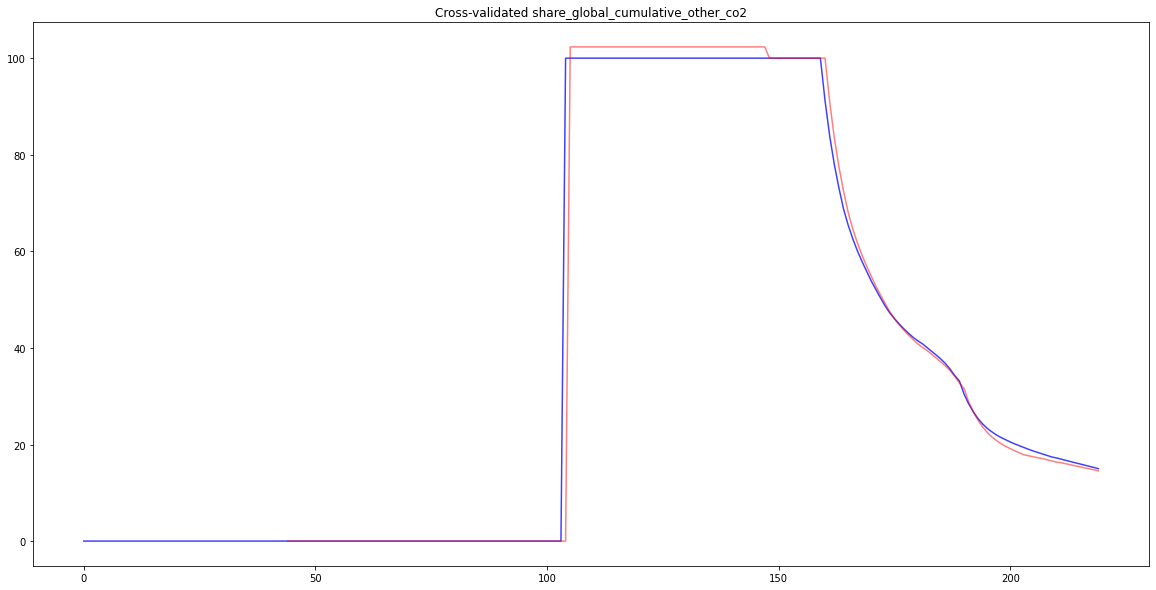

model-usa-ghg_per_capita.pkl COMPLETED
PLOTTING ghg_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


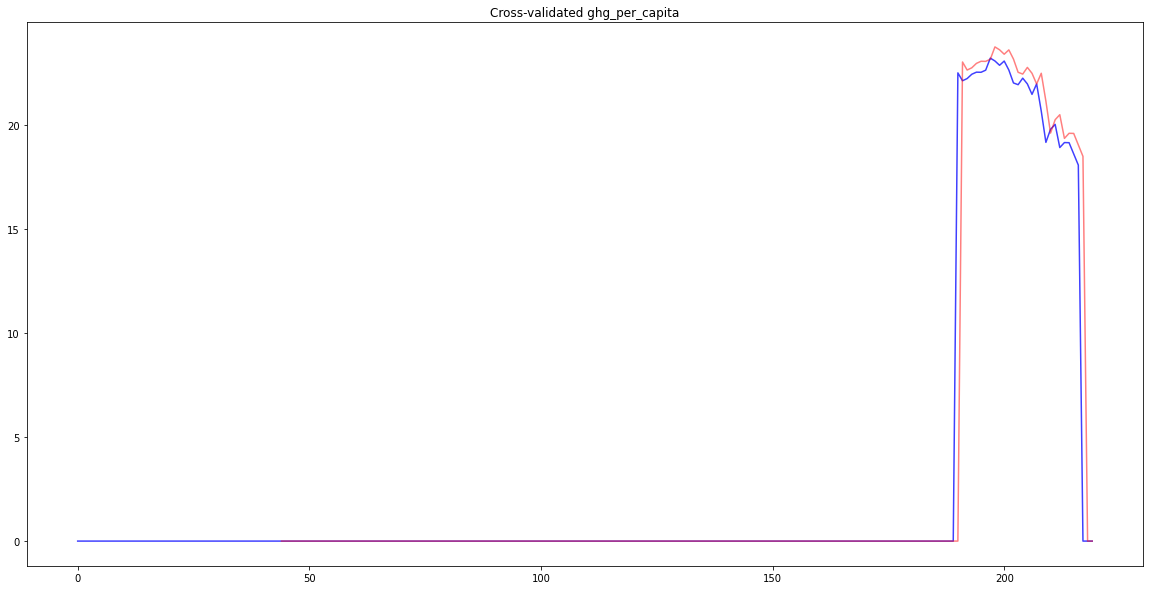

model-usa-methane_per_capita.pkl COMPLETED
PLOTTING methane_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


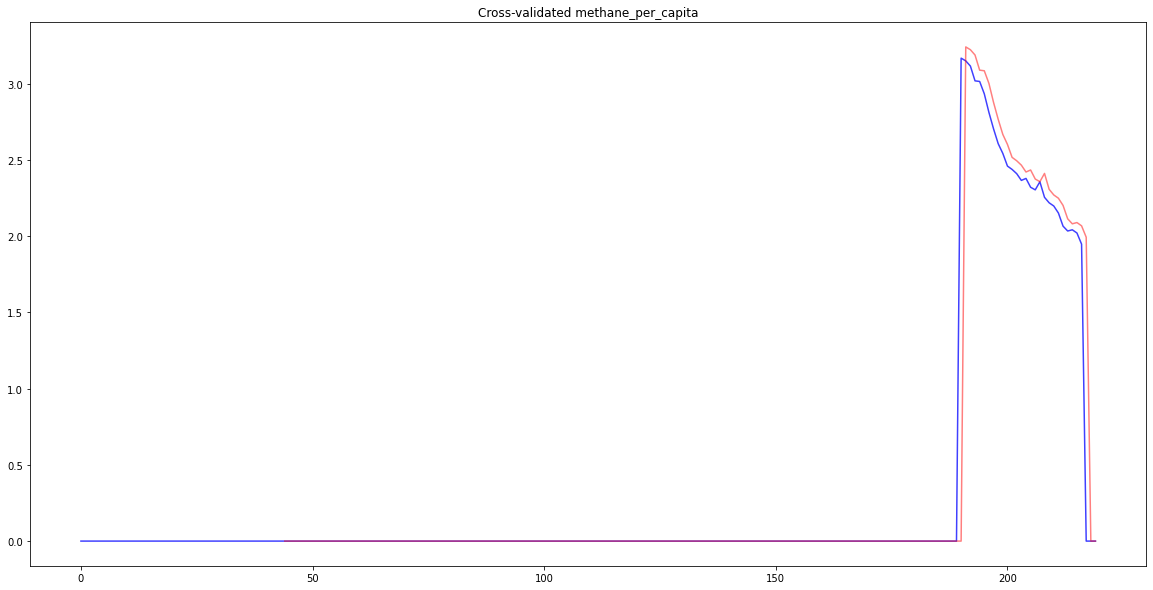

model-usa-nitrous_oxide_per_capita.pkl COMPLETED
PLOTTING nitrous_oxide_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


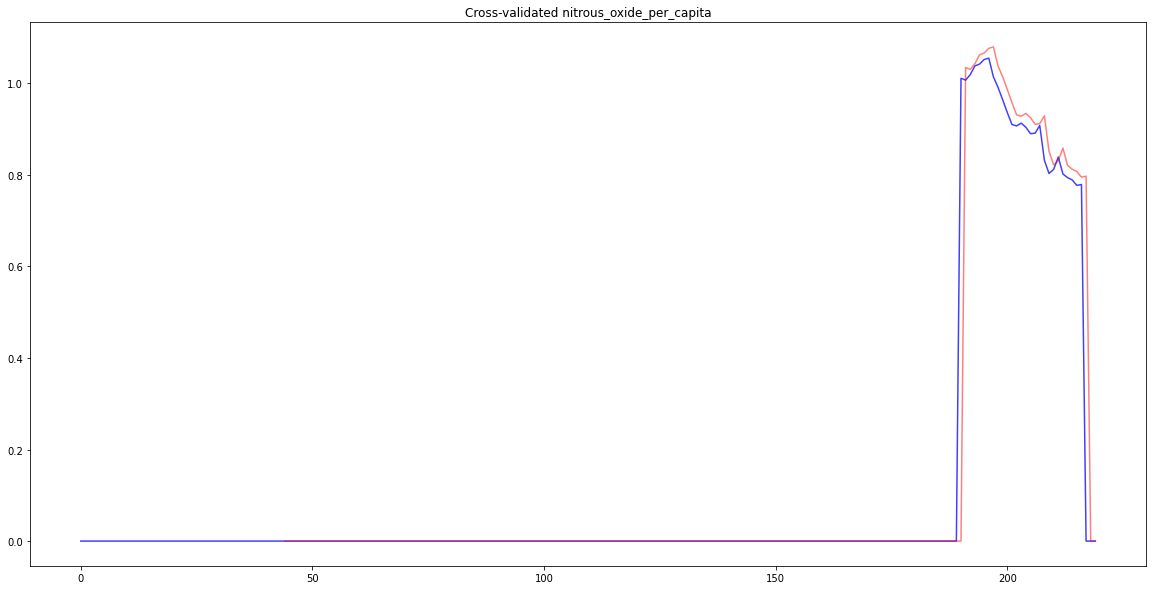

model-usa-energy_per_capita.pkl COMPLETED
PLOTTING energy_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


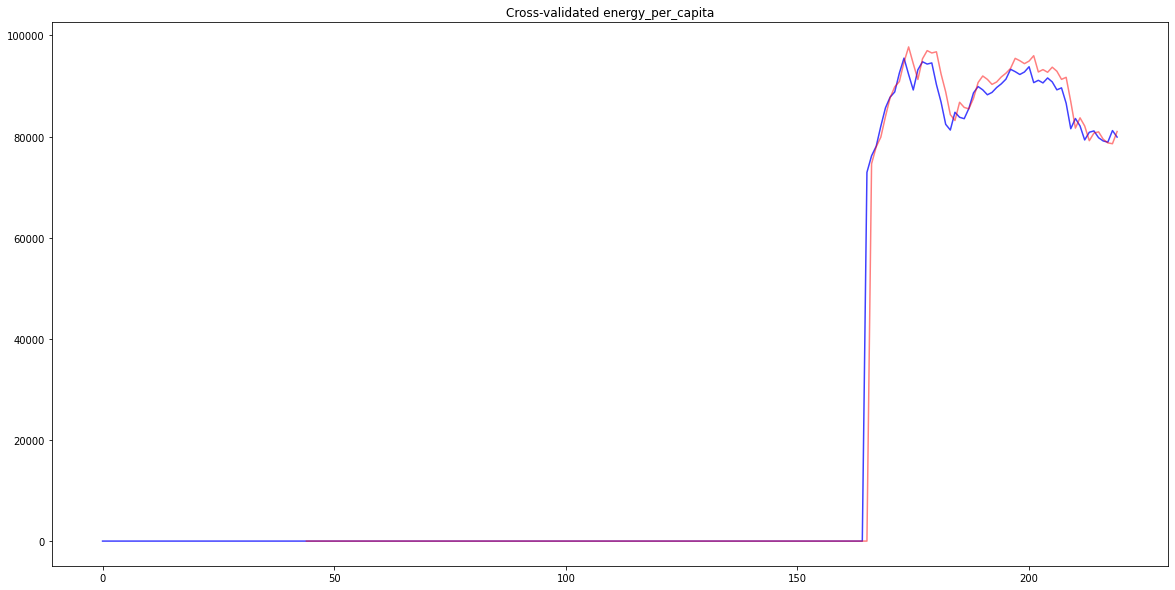

model-usa-energy_per_gdp.pkl COMPLETED
PLOTTING energy_per_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


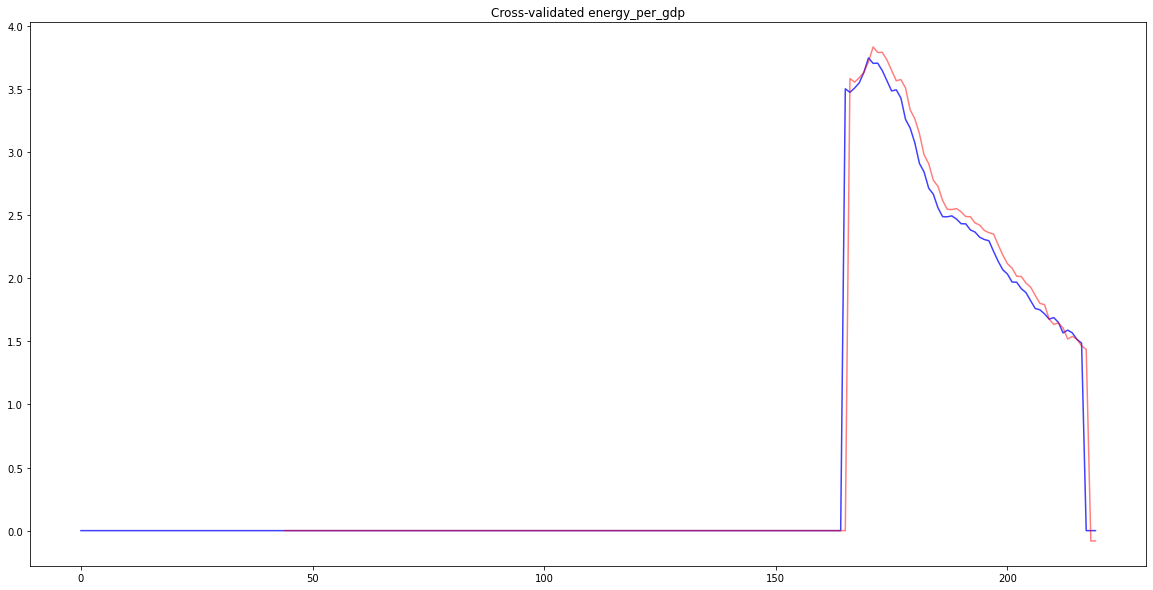

model-usa-real_gdp_growth_percent.pkl COMPLETED
PLOTTING real_gdp_growth_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


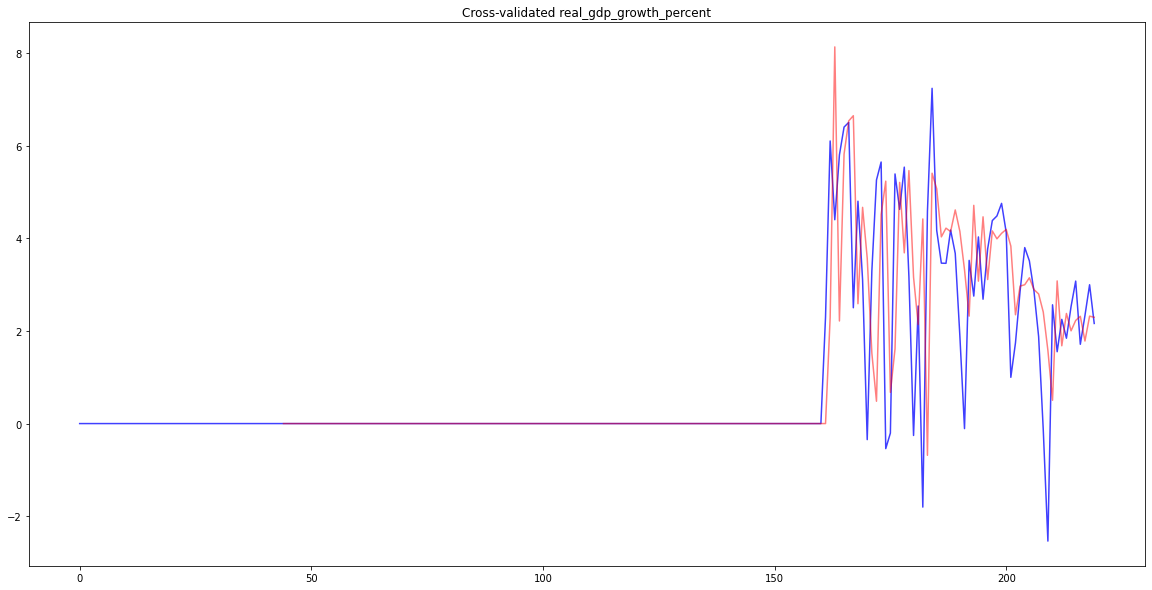

model-usa-co2_emission_per_capita.pkl COMPLETED
PLOTTING co2_emission_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


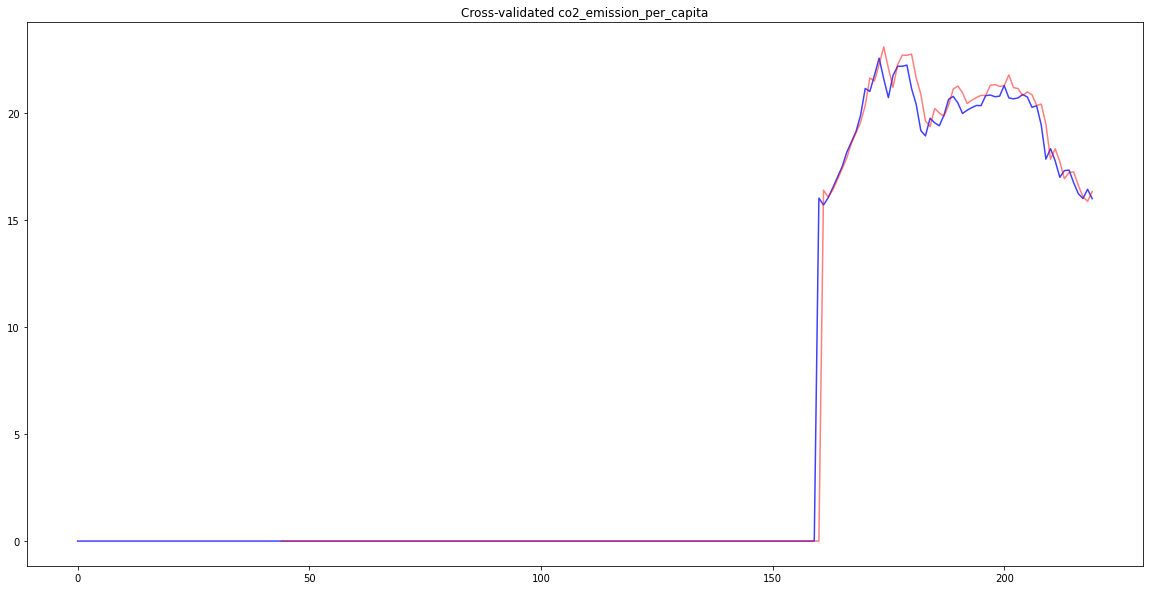

model-usa-constant_gdp_per_capita.pkl COMPLETED
PLOTTING constant_gdp_per_capita
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


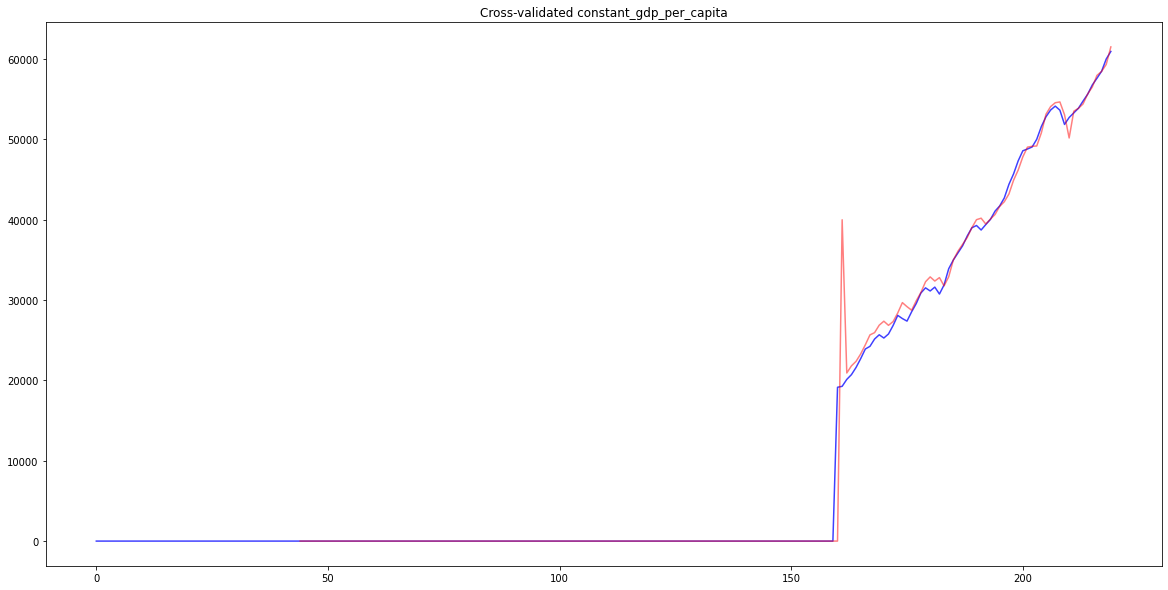

model-usa-co2_emission_per_constant_gdp.pkl COMPLETED
PLOTTING co2_emission_per_constant_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


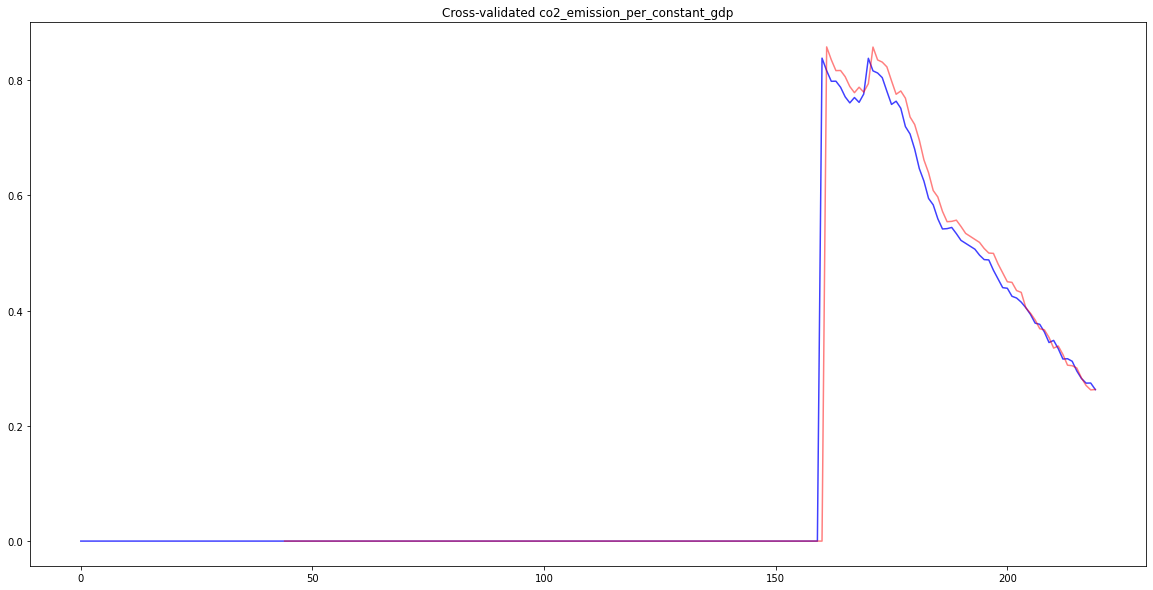

model-usa-co2_country_share_percent.pkl COMPLETED
PLOTTING co2_country_share_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


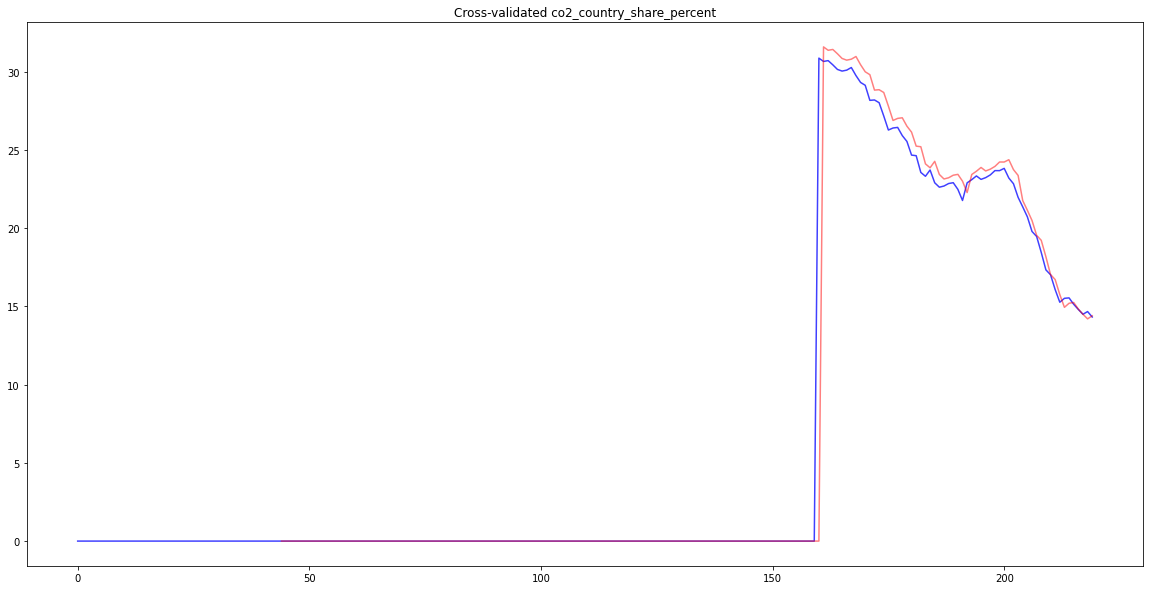

model-usa-manufacturing_country_share_percent.pkl COMPLETED
PLOTTING manufacturing_country_share_percent
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


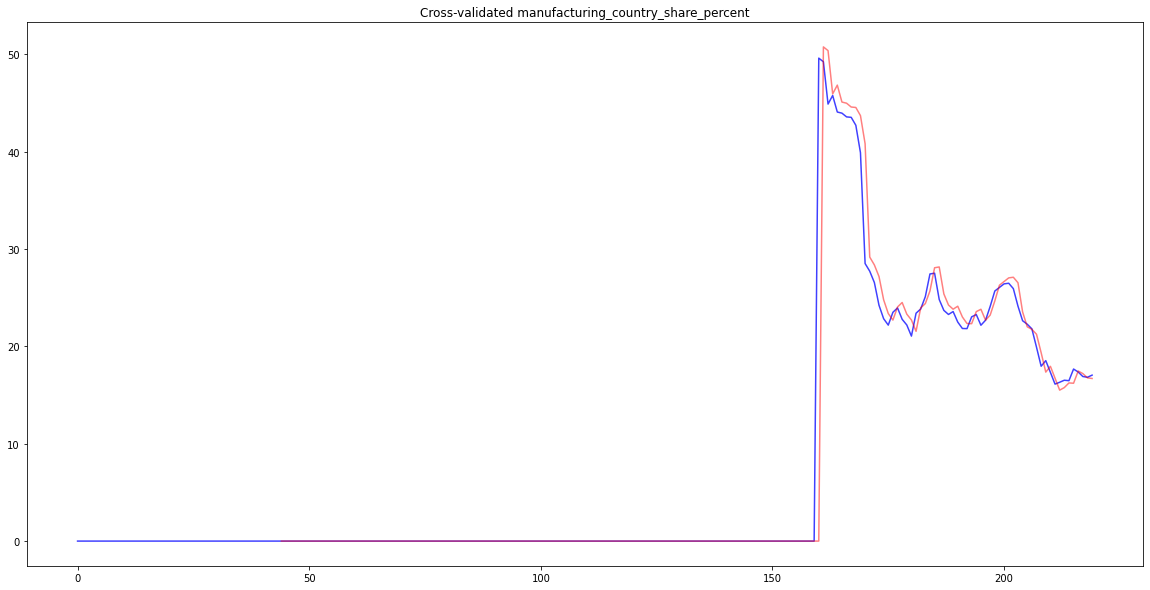

model-china-co2.pkl COMPLETED
PLOTTING co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


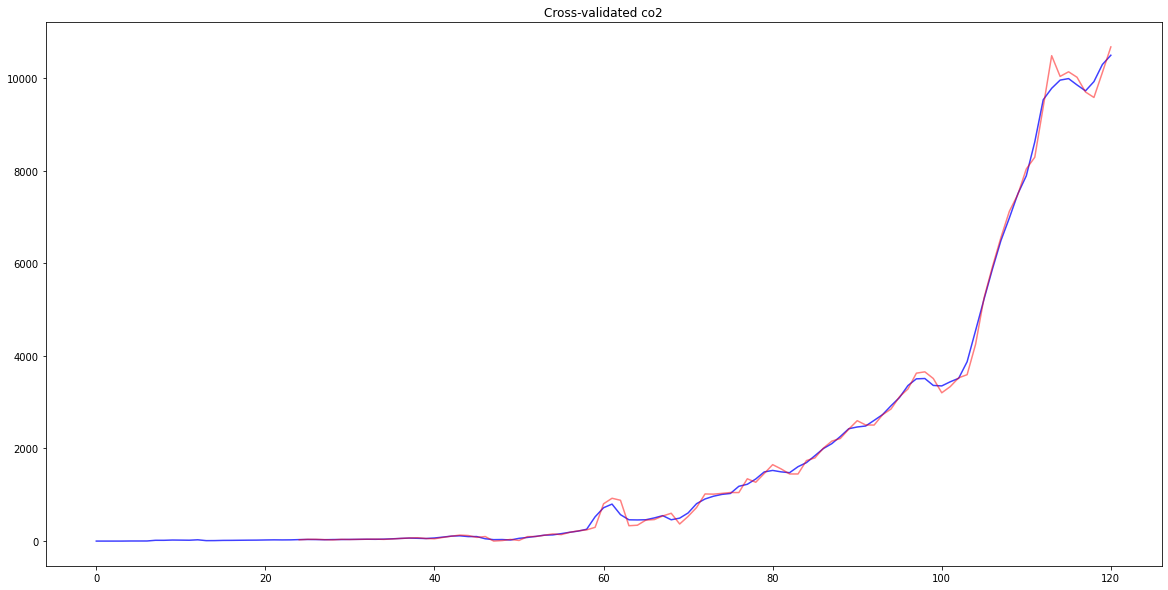

model-china-consumption_co2.pkl COMPLETED
PLOTTING consumption_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


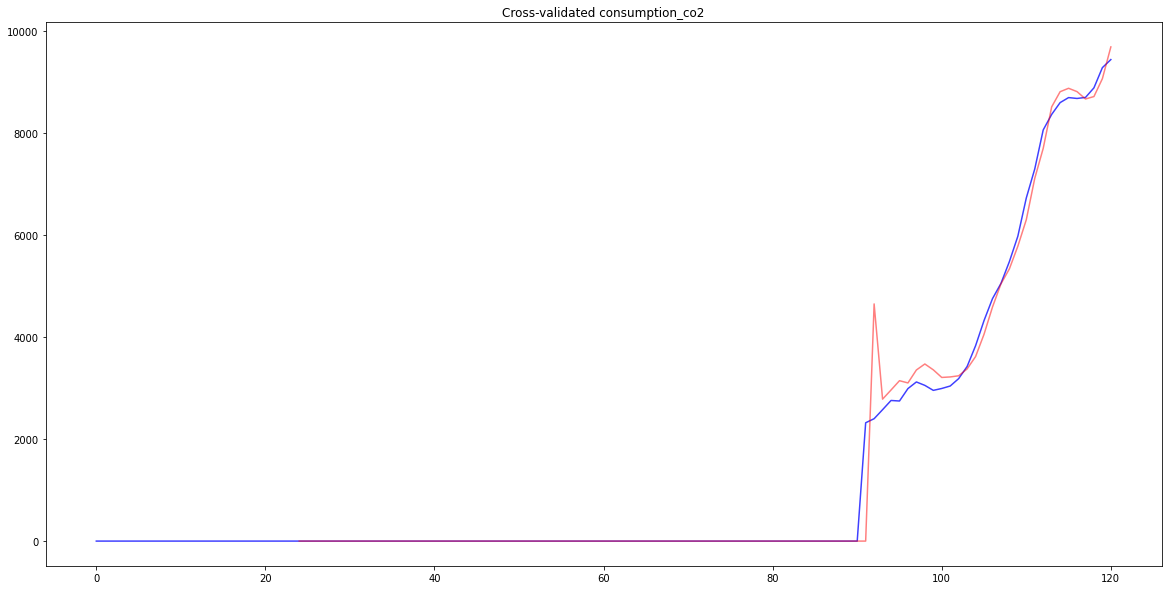

model-china-trade_co2.pkl COMPLETED
PLOTTING trade_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


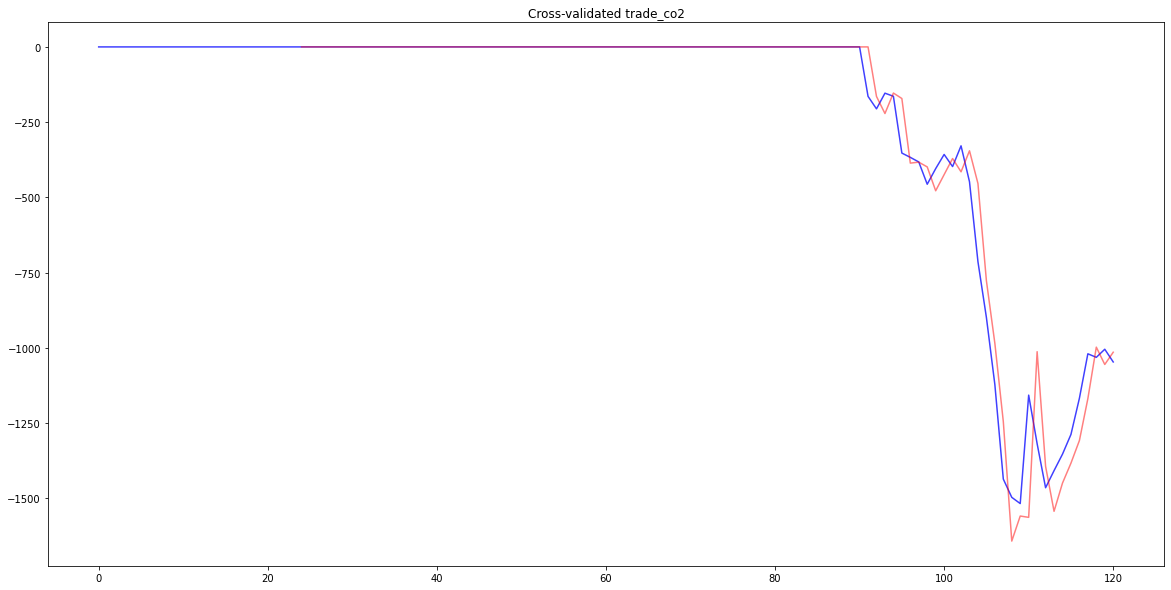

model-china-co2_per_unit_energy.pkl COMPLETED
PLOTTING co2_per_unit_energy
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


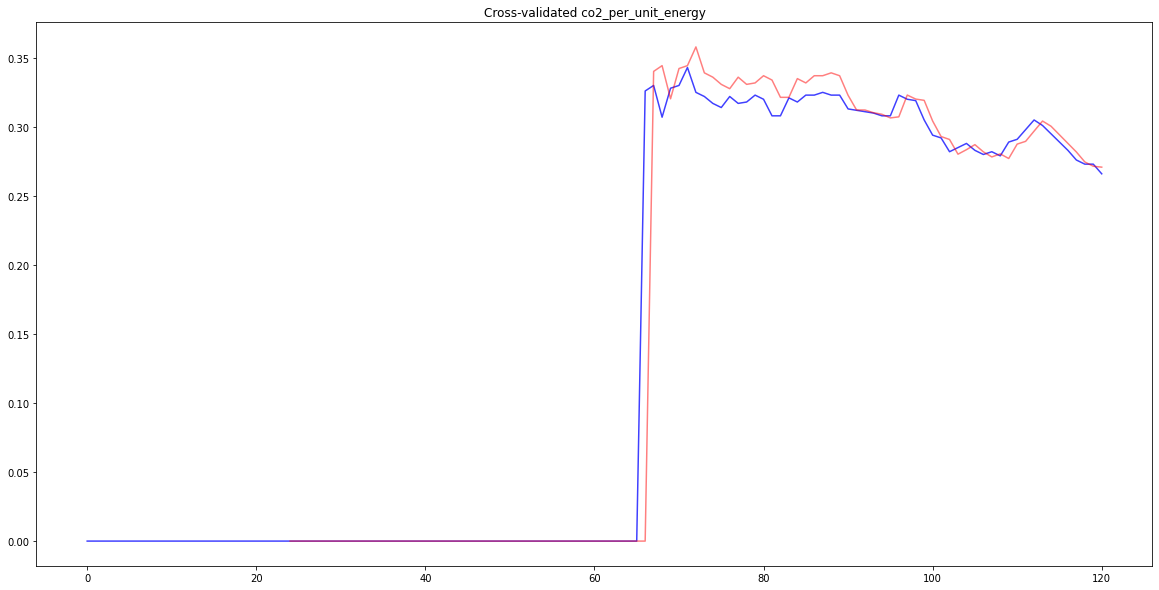

model-china-coal_co2.pkl COMPLETED
PLOTTING coal_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


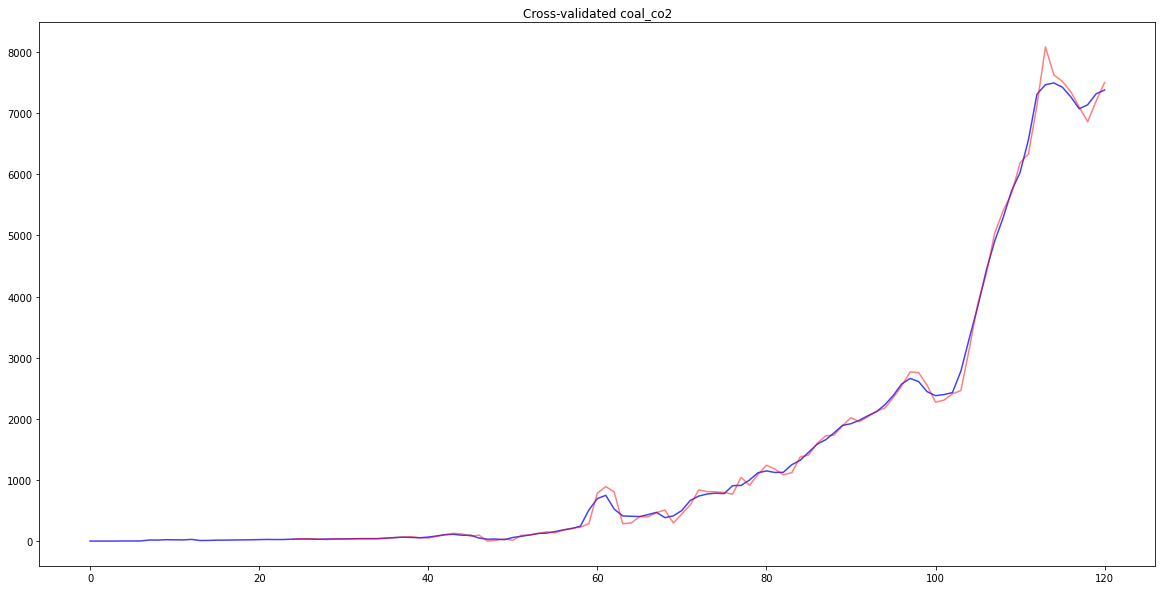

model-china-cement_co2.pkl COMPLETED
PLOTTING cement_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


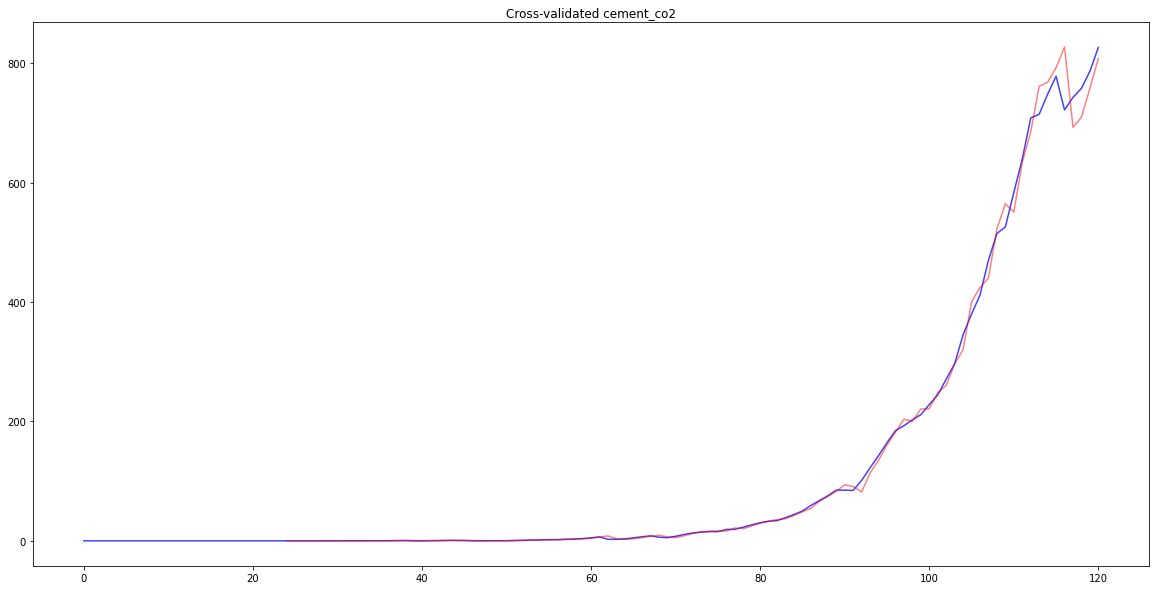

model-china-flaring_co2.pkl COMPLETED
PLOTTING flaring_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


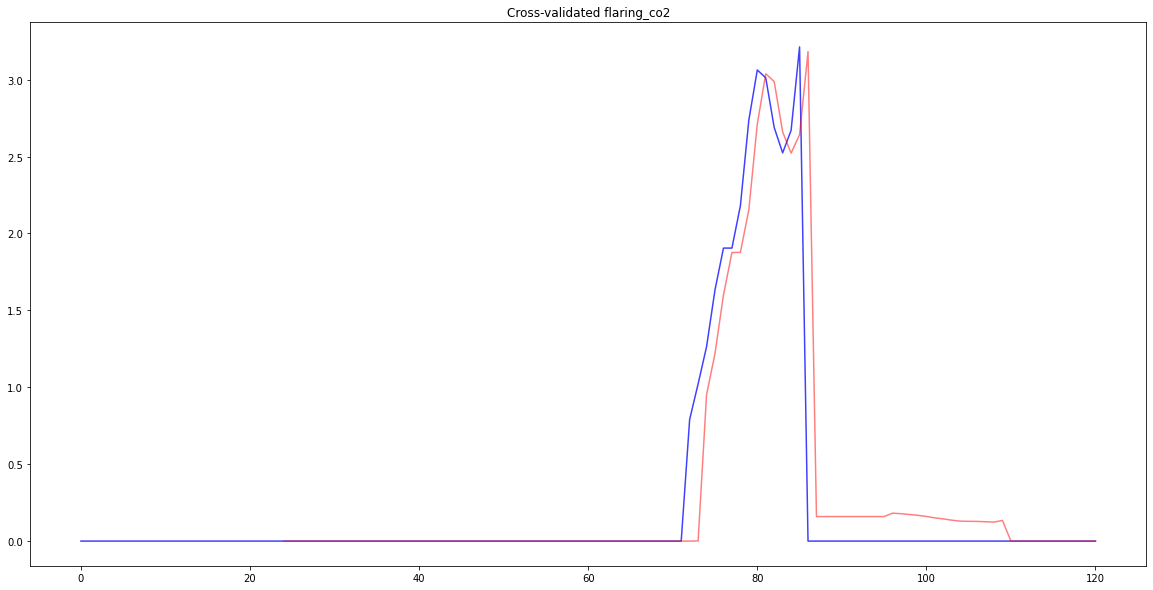

model-china-gas_co2.pkl COMPLETED
PLOTTING gas_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


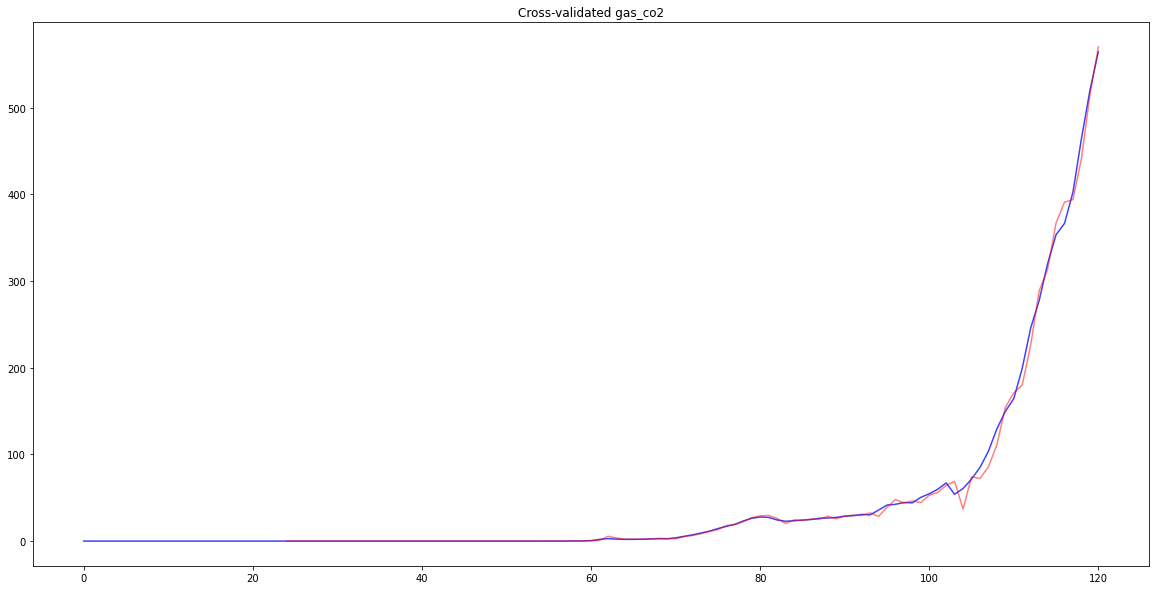

model-china-oil_co2.pkl COMPLETED
PLOTTING oil_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


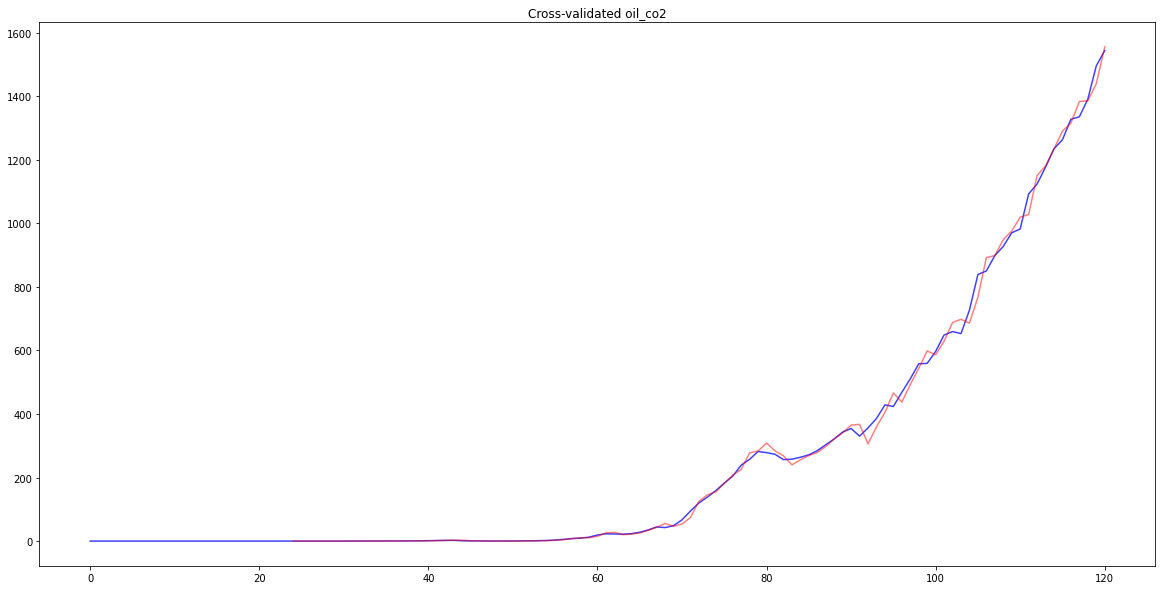

model-china-other_industry_co2.pkl COMPLETED
PLOTTING other_industry_co2
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


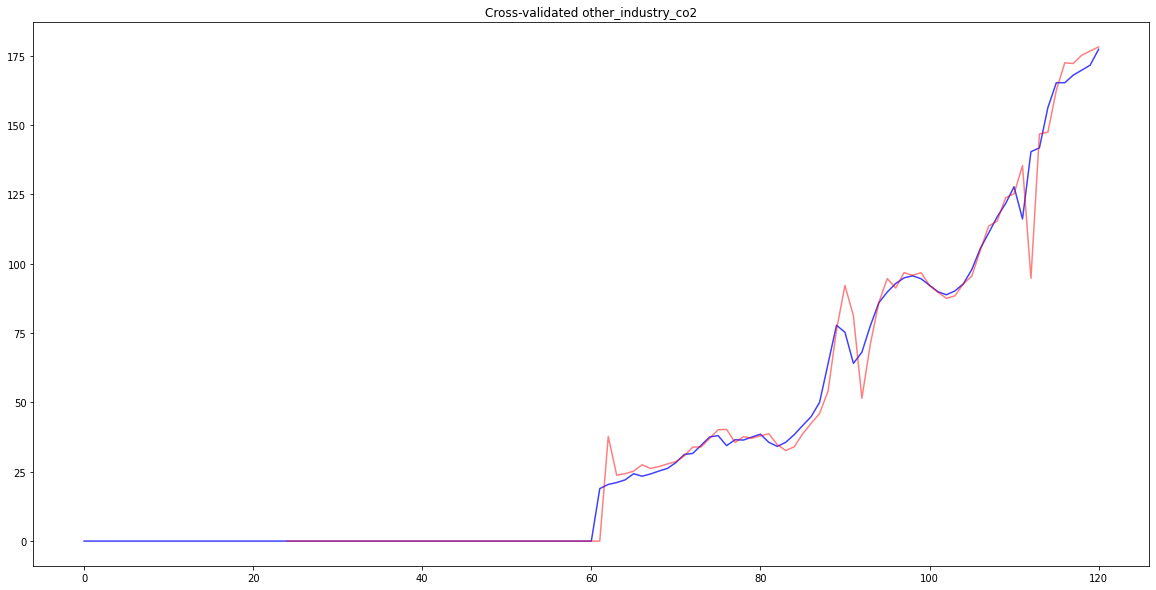

model-china-total_ghg.pkl COMPLETED
PLOTTING total_ghg
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


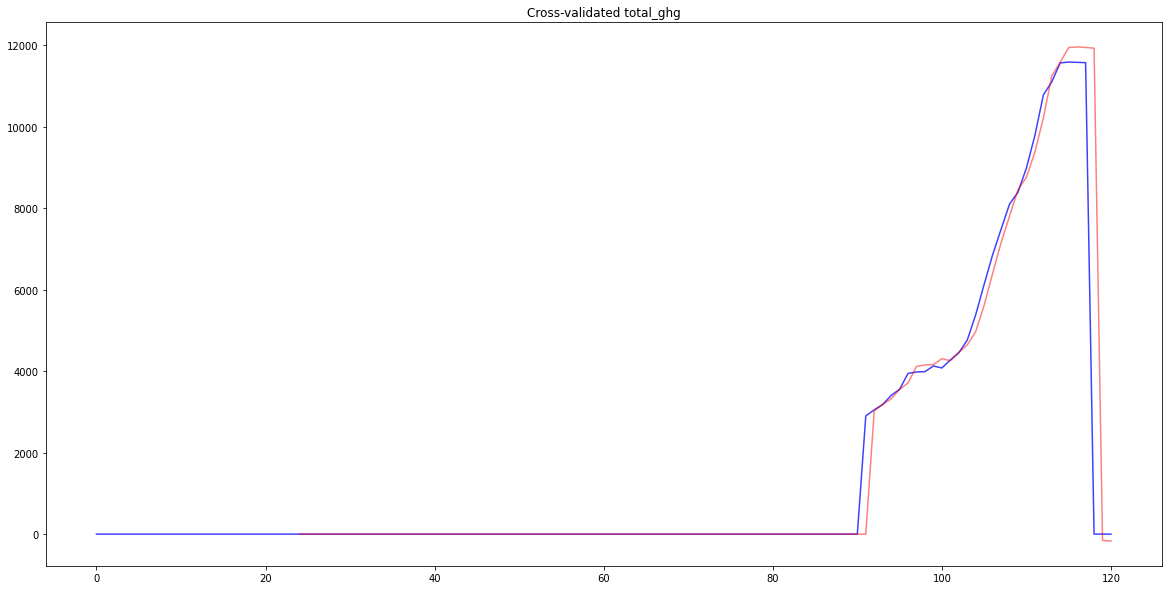

model-china-methane.pkl COMPLETED
PLOTTING methane
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


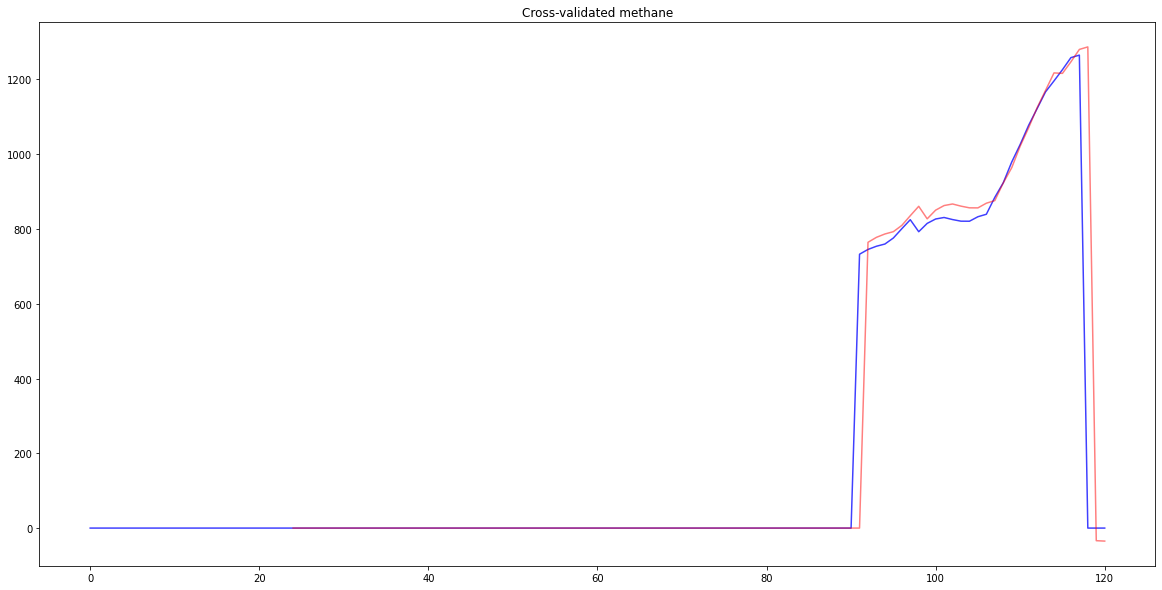

model-china-nitrous_oxide.pkl COMPLETED
PLOTTING nitrous_oxide
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


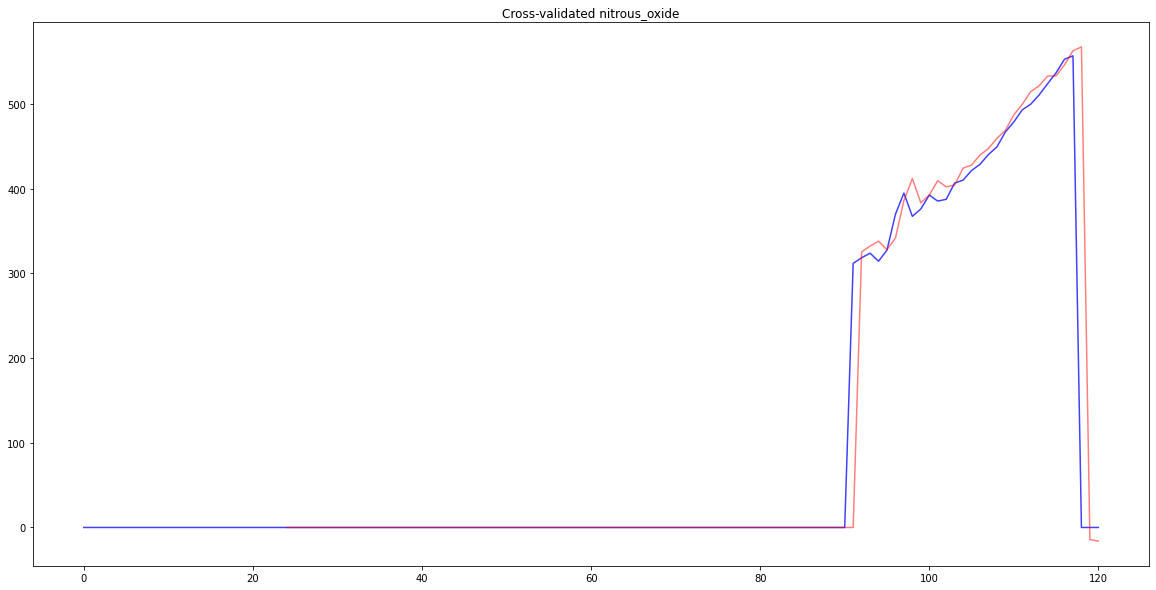

model-china-population.pkl COMPLETED
NOT ploting population
model-china-gdp.pkl COMPLETED
PLOTTING gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


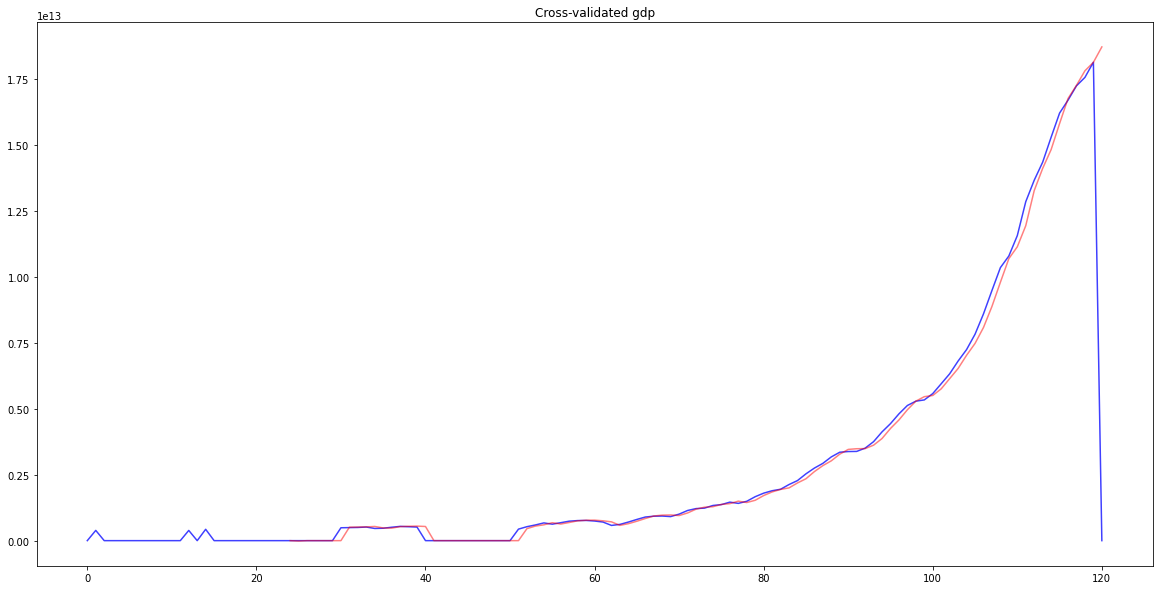

model-china-primary_energy_consumption.pkl COMPLETED
PLOTTING primary_energy_consumption
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


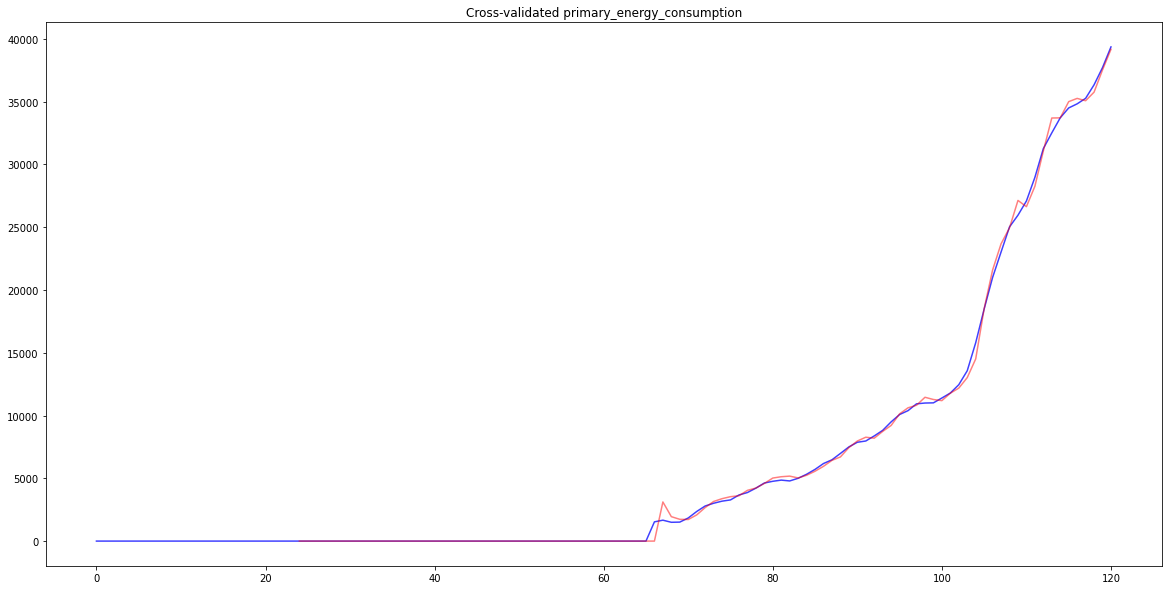

model-china-un_population.pkl COMPLETED
PLOTTING un_population
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


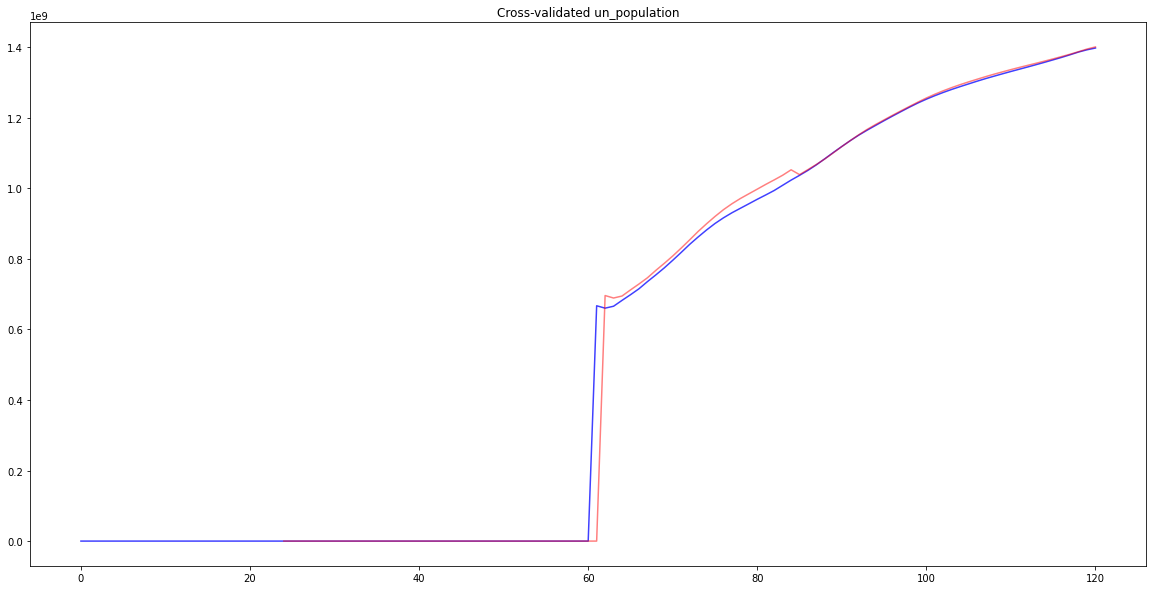

model-china-current_gdp.pkl COMPLETED
PLOTTING current_gdp
Automatically created module for IPython interactive environment
pmdarima version: 1.8.4


LinAlgError: LU decomposition error.

In [4]:
def get_optimal_param(timeseries):
    return pm.auto_arima(timeseries,
                         max_p= max_p, max_d= max_d, max_q= max_q,
                         seasonal=False, error_action='ignore', suppress_warnings=True,
                         trace =  False,
                         out_of_sample_size = out_of_sample_size,
                         stepwise=True)  # set to stepwise

regions = core.regions
world = core.world

do_not_plot = ['population']

for region in core.list_of_regions:
    if core.regions.get(region) == [world]:
        # Regional grouping is the world, then take the entire dataset
        regional_df = dataset[dataset.iso_code.eq(world)].copy()
    else:
        # Take the countries specified in the dictionary
        regional_df = dataset[dataset['iso_code'].isin(regions.get(region))].copy()

    regional_df = regional_df.groupby('year').sum().reset_index(drop = False)

    result = dict()
    # Create optimised model for each feature
    # Note that the first two features are ISO_CODE and Year - these are not features for the time series
    for feature in selected_features[2:]:
        series = regional_df[feature].to_numpy()
        optimal = get_optimal_param(series)
        model_name = r'model-'+region+'-'+feature+r'.pkl'

        if save_models:
            full_path = model_dir/model_name
            full_path = full_path.as_posix()
            with open(full_path, 'wb') as pkl:
                pickle.dump(optimal, pkl)

        print(model_name, 'COMPLETED')
        if score:
            print('SCORE')
            print(optimal.get_params().get('order'))
            print(optimal.scoring)
            print(optimal.predict(out_of_sample_size))
        elif plot:
            if feature in do_not_plot:
                print(f'NOT ploting {feature}')
            else:
                print(f'PLOTTING {feature}')
                plot_ts(regional_df, optimal.get_params().get('order'), feature)
print("Timeseries models creation COMPLETED")

